In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
import glob

In [2]:
files = ['indego-trips-2021-q1.csv', 'indego-trips-2021-q2.csv', 'indego-trips-2021-q3.csv', 'indego-trips-2021-q4.csv',
        'indego-trips-2022-q1.csv', 'indego-trips-2022-q2.csv', 'indego-trips-2022-q3.csv', 'indego-trips-2022-q4.csv']
df = pd.DataFrame()
for file in files:
    data = pd.read_csv(file)
    df = pd.concat([df, data], axis=0)
df.to_csv('merged_files.csv', index=False)

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
Phil = pd.read_csv("merged_files.csv")

Phil.count()

trip_id                1864918
duration               1864918
start_time             1864918
end_time               1864918
start_station          1864918
start_lat              1864849
start_lon              1864849
end_station            1864918
end_lat                1835665
end_lon                1835665
bike_id                1864918
plan_duration          1864918
trip_route_category    1864918
passholder_type        1864874
bike_type              1864918
dtype: int64

In [4]:
Phil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864918 entries, 0 to 1864917
Data columns (total 15 columns):
 #   Column               Dtype  
---  ------               -----  
 0   trip_id              int64  
 1   duration             int64  
 2   start_time           object 
 3   end_time             object 
 4   start_station        int64  
 5   start_lat            float64
 6   start_lon            float64
 7   end_station          int64  
 8   end_lat              float64
 9   end_lon              float64
 10  bike_id              object 
 11  plan_duration        int64  
 12  trip_route_category  object 
 13  passholder_type      object 
 14  bike_type            object 
dtypes: float64(4), int64(5), object(6)
memory usage: 213.4+ MB


In [5]:
###check unique values
Phil.nunique()

trip_id                1757653
duration                  1283
start_time              653114
end_time                652354
start_station              199
start_lat                  201
start_lon                  199
end_station                199
end_lat                    203
end_lon                    201
bike_id                   4301
plan_duration                6
trip_route_category          2
passholder_type              4
bike_type                    2
dtype: int64

In [6]:
Phil.head()

trip_id  duration     start_time       end_time  start_station  \
0  365184634        15  1/1/2021 0:05  1/1/2021 0:20           3125   
1  365184633        14  1/1/2021 0:06  1/1/2021 0:20           3022   
2  365184632        33  1/1/2021 0:07  1/1/2021 0:40           3066   
3  365184631         9  1/1/2021 0:13  1/1/2021 0:22           3045   
4  365184630        13  1/1/2021 0:37  1/1/2021 0:50           3052   

   start_lat  start_lon  end_station    end_lat    end_lon bike_id  \
0  39.943909 -75.167351         3157  39.925449 -75.159538   14542   
1  39.954720 -75.183228         3010  39.947109 -75.166183    5294   
2  39.945610 -75.173477         3201  39.955231 -75.166199   14586   
3  39.947922 -75.162369         3034  39.933151 -75.162483   14683   
4  39.947319 -75.156952         3040  39.962891 -75.166061    3330   

   plan_duration trip_route_category passholder_type bike_type  
0             30             One Way        Indego30  standard  
1             30             One Way        Indego30  standard  
2             30             One Way        Indego30  standard  
3             30             One Way        Indego30  standard  
4             30             One Way        Indego30  standard

In [7]:
# check if values are missing
Phil[Phil["start_time"].isnull()==True]
Phil[Phil["end_time"].isnull()==True]
Phil[Phil["start_station"].isnull()==True]
Phil[Phil["end_station"].isnull()==True]
Phil[Phil["start_lat"].isnull()==True]
Phil[Phil["start_lon"].isnull()==True]
Phil[Phil["end_lat"].isnull()==True]
Phil[Phil["end_lon"].isnull()==True]
Phil[Phil["bike_id"].isnull()==True]
Phil[Phil["plan_duration"].isnull()==True]
Phil[Phil["passholder_type"].isnull()==True]

trip_id  duration       start_time         end_time  start_station  \
36035    367443528        11  2/10/2021 12:43  2/10/2021 12:54           3000   
1360957  494975799        22   7/6/2022 12:59   7/6/2022 13:21           3078   
1365735  495355678        18   7/7/2022 19:37   7/7/2022 19:55           3078   
1371276  495739177        27   7/9/2022 16:16   7/9/2022 16:43           3078   
1371278  495738537        10   7/9/2022 16:16   7/9/2022 16:26           3078   
1371336  495739133        13   7/9/2022 16:30   7/9/2022 16:43           3182   
1381437  496783525         4  7/12/2022 17:05  7/12/2022 17:09           3161   
1385479  497172527         1  7/13/2022 18:50  7/13/2022 18:51           3061   
1398420  498661471        21  7/17/2022 16:01  7/17/2022 16:22           3078   
1402111  499047487        25  7/18/2022 19:11  7/18/2022 19:36           3078   
1405397  499495506        22  7/19/2022 19:39  7/19/2022 20:01           3156   
1407396  499686577        32  7/20/2022 14:35  7/20/2022 15:07           3078   
1409611  499932928         9   7/21/2022 6:50   7/21/2022 6:59           3078   
1412946  500310528         6   7/22/2022 6:55   7/22/2022 7:01           3078   
1415564  500585126         4  7/22/2022 21:53  7/22/2022 21:57           3161   
1418203  500936556         1  7/23/2022 21:27  7/23/2022 21:28           3078   
1418204  500936555         5  7/23/2022 21:28  7/23/2022 21:33           3078   
1418213  500936547        16  7/23/2022 21:34  7/23/2022 21:50           3201   
1419788  501113724         1  7/24/2022 15:53  7/24/2022 15:54           3101   
1419789  501123947        21  7/24/2022 15:53  7/24/2022 16:14           3101   
1423957  501647928         7   7/26/2022 6:51   7/26/2022 6:58           3078   
1437655  503115429         7   7/30/2022 9:25   7/30/2022 9:32           3078   
1448933  504237533         5   8/2/2022 18:53   8/2/2022 18:58           3161   
1478931  507425826         2   8/12/2022 7:57   8/12/2022 7:59           3061   
1488046  508328649        20  8/14/2022 19:03  8/14/2022 19:23           3078   
1488991  508530028         2   8/15/2022 7:55   8/15/2022 7:57           3061   
1497486  509336842         8  8/17/2022 12:46  8/17/2022 12:54           3061   
1497888  509378135         7  8/17/2022 14:59  8/17/2022 15:06           3029   
1500355  509658824         2   8/18/2022 7:57   8/18/2022 7:59           3061   
1517044  511533225         2   8/23/2022 8:37   8/23/2022 8:39           3061   
1522285  511975124         5  8/24/2022 16:34  8/24/2022 16:39           3156   
1522355  511976030         5  8/24/2022 16:51  8/24/2022 16:56           3116   
1528017  512631727         3   8/26/2022 7:57   8/26/2022 8:00           3061   
1541480  514367024         4   8/30/2022 8:39   8/30/2022 8:43           3061   
1551761  516102586         6   9/1/2022 22:04   9/1/2022 22:10           3161   
1578441  521380899        10   9/9/2022 19:26   9/9/2022 19:36           3025   
1578453  521380887         7   9/9/2022 19:29   9/9/2022 19:36           3025   
1581528  521984430         9  9/10/2022 17:06  9/10/2022 17:15           3156   
1584089  522798498         1  9/11/2022 20:33  9/11/2022 20:34           3207   
1584090  522798497         9  9/11/2022 20:34  9/11/2022 20:43           3029   
1584092  522798495         8  9/11/2022 20:35  9/11/2022 20:43           3029   
1589481  523775457        16  9/13/2022 14:11  9/13/2022 14:27           3029   
1591835  524080965         3   9/14/2022 0:45   9/14/2022 0:48           3161   
1596492  524952124         2   9/15/2022 7:57   9/15/2022 7:59           3061   

         start_lat  start_lon  end_station    end_lat    end_lon bike_id  \
36035          NaN        NaN         3000        NaN        NaN   19530   
1360957  39.953548 -75.171921         3078  39.953548 -75.171921    2604   
1365735  39.953548 -75.171921         3078  39.953548 -75.171921    5306   
1371276  39.953548 -75.171921         3050  39.953388 -75.154

In [8]:
Phil.dropna(how ='any', inplace=True)

In [9]:
# check if values are missing
Phil[Phil["start_time"].isnull()==True]
Phil[Phil["end_time"].isnull()==True]
Phil[Phil["start_station"].isnull()==True]
Phil[Phil["end_station"].isnull()==True]
Phil[Phil["start_lat"].isnull()==True]
Phil[Phil["start_lon"].isnull()==True]
Phil[Phil["end_lat"].isnull()==True]
Phil[Phil["end_lon"].isnull()==True]
Phil[Phil["bike_id"].isnull()==True]
Phil[Phil["plan_duration"].isnull()==True]
Phil[Phil["passholder_type"].isnull()==True]

Empty DataFrame
Columns: [trip_id, duration, start_time, end_time, start_station, start_lat, start_lon, end_station, end_lat, end_lon, bike_id, plan_duration, trip_route_category, passholder_type, bike_type]
Index: []

<H3>We would like to add a categorical value for the day of the week to be able to access it easier later on.</H3>

In [10]:
Phil["start_time"] = pd.to_datetime(Phil["start_time"])
Phil["end_time"] = pd.to_datetime(Phil["end_time"])

In [11]:
# Let's map time of day and day of week to our DF

def get_date (ts):
    return ts.date()

def get_weekday (ts):
    return ts.weekday()

def get_hour (ts):
    return ts.hour

In [12]:
#Phil.reset_index(inplace=True)
Phil["Date_s"] = Phil["start_time"].apply(lambda ts: get_date (ts))
Phil["Weekday_s"]=Phil["start_time"].apply(lambda x: get_weekday (x))
Phil["Hour_s"]=Phil["start_time"].apply(lambda x: get_hour (x))
Phil["Date_e"] = Phil["end_time"].apply(lambda ts: get_date (ts))
Phil["Weekday_e"]=Phil["end_time"].apply(lambda x: get_weekday (x))
Phil["Hour_e"]=Phil["end_time"].apply(lambda x: get_hour (x))

In [13]:
Phil

trip_id  duration          start_time            end_time  \
0        365184634        15 2021-01-01 00:05:00 2021-01-01 00:20:00   
1        365184633        14 2021-01-01 00:06:00 2021-01-01 00:20:00   
2        365184632        33 2021-01-01 00:07:00 2021-01-01 00:40:00   
3        365184631         9 2021-01-01 00:13:00 2021-01-01 00:22:00   
4        365184630        13 2021-01-01 00:37:00 2021-01-01 00:50:00   
...            ...       ...                 ...                 ...   
1864913  579499101        23 2022-12-31 23:44:00 2023-01-01 00:07:00   
1864914  579499099        17 2022-12-31 23:45:00 2023-01-01 00:02:00   
1864915  579499097         8 2022-12-31 23:51:00 2022-12-31 23:59:00   
1864916  579499095        23 2022-12-31 23:54:00 2023-01-01 00:16:00   
1864917  579499093        62 2022-12-31 23:54:00 2023-01-01 00:56:00   

         start_station  start_lat  start_lon  end_station    end_lat  \
0                 3125  39.943909 -75.167351         3157  39.925449   
1                 3022  39.954720 -75.183228         3010  39.947109   
2                 3066  39.945610 -75.173477         3201  39.955231   
3                 3045  39.947922 -75.162369         3034  39.933151   
4                 3052  39.947319 -75.156952         3040  39.962891   
...                ...        ...        ...          ...        ...   
1864913           3244  39.938648 -75.166740         3287  39.943668   
1864914           3295  39.950279 -75.160271         3054  39.962502   
1864915           3255  39.950951 -75.164383         3046  39.950119   
1864916           3255  39.950951 -75.164383         3113  39.974720   
1864917           3161  39.954861 -75.180908         3010  39.947109   

           end_lon  ... plan_duration  trip_route_category passholder_type  \
0       -75.159538  ...            30              One Way        Indego30   
1       -75.166183  ...            30              One Way        Indego30   
2       -75.166199  ...            30              One Way        Indego30   
3       -75.162483  ...            30              One Way        Indego30   
4       -75.166061  ...            30              One Way        Indego30   
...            ...  ...           ...                  ...             ...   
1864913 -75.216057  ...            30              One Way        Indego30   
1864914 -75.174202  ...            30              One Way        Indego30   
1864915 -75.144722  ...            30              One Way        Indego30   
1864916 -75.197807  ...            30              One Way        Indego30   
1864917 -75.166183  ...            30              One Way        Indego30   

        bike_type      Date_s Weekday_s  Hour_s      Date_e Weekday_e  Hour_e  
0        standard  2021-01-01         4       0  2021-01-01         4       0  
1        standard  2021-01-01         4       0  2021-01-01         4       0  
2        standard  2021-01-01         4       0  2021-01-01         4       0  
3        standard  2021-01-01         4       0  2021-01-01         4       0  
4        standard  2021-01-01         4       0  2021-01-01         4       0  
...           ...         ...       ...     ...         ...       ...     ...  
1864913  standard  2022-12-31         5      23  2023-01-01         6       0  
1864914  electric  2022-12-31         5      23  2023-01-01         6       0  
1864915  electric  2022-12-31         5      23  2022-12-31         5      23  
1864916  electric  2022-12-31         5      23  2023-01-01         6       0  
1864917  standard  2022-12-31         5      23  2023-01-01         6       0  

[1835611 rows x 21 columns]

<H4>Now we would like to check the range of the duration-values to clean our dataset of erroneous entries</H4>

In [14]:
minValueDurationMS = Phil.min()
minValueDurationMS

trip_id                          365184627
duration                                 1
start_time             2021-01-01 00:05:00
end_time               2021-01-01 00:20:00
start_station                         3004
start_lat                        39.889938
start_lon                       -75.229462
end_station                           3000
end_lat                          39.889938
end_lon                         -75.229462
plan_duration                            1
trip_route_category                One Way
passholder_type                   Day Pass
bike_type                         electric
Date_s                          2021-01-01
Weekday_s                                0
Hour_s                                   0
Date_e                          2021-01-01
Weekday_e                                0
Hour_e                                   0
dtype: object

In [15]:
maxValueDurationMS = Phil.max()
maxValueDurationMS

trip_id                          579859025
duration                              1440
start_time             2022-12-31 23:54:00
end_time               2023-01-02 10:42:00
start_station                         3300
start_lat                         40.01112
start_lon                       -75.121567
end_station                           3300
end_lat                           40.01112
end_lon                         -75.121567
plan_duration                          365
trip_route_category             Round Trip
passholder_type                    Walk-up
bike_type                         standard
Date_s                          2022-12-31
Weekday_s                                6
Hour_s                                  23
Date_e                          2023-01-02
Weekday_e                                6
Hour_e                                  23
dtype: object

<H4>We want to get rid of all data which shows a negative duration and the data with a longer duration than 24h because by Ride Indego Philadelphia policy a bike is marked as stolen and a fine is issued after the ride-time exceeds 24h. </H4>

In [16]:
durationMin = 1 #minutes
durationMax = 1440 #minutes equals 24h

Phil.drop(Phil[Phil["duration"]<durationMin].index, inplace = True)
Phil.drop(Phil[Phil["duration"]>durationMax].index, inplace = True)

Phil

trip_id  duration          start_time            end_time  \
0        365184634        15 2021-01-01 00:05:00 2021-01-01 00:20:00   
1        365184633        14 2021-01-01 00:06:00 2021-01-01 00:20:00   
2        365184632        33 2021-01-01 00:07:00 2021-01-01 00:40:00   
3        365184631         9 2021-01-01 00:13:00 2021-01-01 00:22:00   
4        365184630        13 2021-01-01 00:37:00 2021-01-01 00:50:00   
...            ...       ...                 ...                 ...   
1864913  579499101        23 2022-12-31 23:44:00 2023-01-01 00:07:00   
1864914  579499099        17 2022-12-31 23:45:00 2023-01-01 00:02:00   
1864915  579499097         8 2022-12-31 23:51:00 2022-12-31 23:59:00   
1864916  579499095        23 2022-12-31 23:54:00 2023-01-01 00:16:00   
1864917  579499093        62 2022-12-31 23:54:00 2023-01-01 00:56:00   

         start_station  start_lat  start_lon  end_station    end_lat  \
0                 3125  39.943909 -75.167351         3157  39.925449   
1                 3022  39.954720 -75.183228         3010  39.947109   
2                 3066  39.945610 -75.173477         3201  39.955231   
3                 3045  39.947922 -75.162369         3034  39.933151   
4                 3052  39.947319 -75.156952         3040  39.962891   
...                ...        ...        ...          ...        ...   
1864913           3244  39.938648 -75.166740         3287  39.943668   
1864914           3295  39.950279 -75.160271         3054  39.962502   
1864915           3255  39.950951 -75.164383         3046  39.950119   
1864916           3255  39.950951 -75.164383         3113  39.974720   
1864917           3161  39.954861 -75.180908         3010  39.947109   

           end_lon  ... plan_duration  trip_route_category passholder_type  \
0       -75.159538  ...            30              One Way        Indego30   
1       -75.166183  ...            30              One Way        Indego30   
2       -75.166199  ...            30              One Way        Indego30   
3       -75.162483  ...            30              One Way        Indego30   
4       -75.166061  ...            30              One Way        Indego30   
...            ...  ...           ...                  ...             ...   
1864913 -75.216057  ...            30              One Way        Indego30   
1864914 -75.174202  ...            30              One Way        Indego30   
1864915 -75.144722  ...            30              One Way        Indego30   
1864916 -75.197807  ...            30              One Way        Indego30   
1864917 -75.166183  ...            30              One Way        Indego30   

        bike_type      Date_s Weekday_s  Hour_s      Date_e Weekday_e  Hour_e  
0        standard  2021-01-01         4       0  2021-01-01         4       0  
1        standard  2021-01-01         4       0  2021-01-01         4       0  
2        standard  2021-01-01         4       0  2021-01-01         4       0  
3        standard  2021-01-01         4       0  2021-01-01         4       0  
4        standard  2021-01-01         4       0  2021-01-01         4       0  
...           ...         ...       ...     ...         ...       ...     ...  
1864913  standard  2022-12-31         5      23  2023-01-01         6       0  
1864914  electric  2022-12-31         5      23  2023-01-01         6       0  
1864915  electric  2022-12-31         5      23  2022-12-31         5      23  
1864916  electric  2022-12-31         5      23  2023-01-01         6       0  
1864917  standard  2022-12-31         5      23  2023-01-01         6       0  

[1835611 rows x 21 columns]

<H4>Now we would like to delete all rows with a duration of less than 3 minutes where the start and end station are the same (no real ride).</H4>

In [17]:
Phil_limited = Phil[(Phil["start_station"]==Phil["end_station"]) & (Phil["duration"] <= 3)]
Phil_limited.count()

trip_id                54090
duration               54090
start_time             54090
end_time               54090
start_station          54090
start_lat              54090
start_lon              54090
end_station            54090
end_lat                54090
end_lon                54090
bike_id                54090
plan_duration          54090
trip_route_category    54090
passholder_type        54090
bike_type              54090
Date_s                 54090
Weekday_s              54090
Hour_s                 54090
Date_e                 54090
Weekday_e              54090
Hour_e                 54090
dtype: int64

Now we want to delete all of these 54090rows!

In [18]:
Phil.drop(Phil[((Phil["start_station"])==(Phil["end_station"])) & (Phil["duration"] <= 3)].index, inplace=True)
Phil

trip_id  duration          start_time            end_time  \
0        365184634        15 2021-01-01 00:05:00 2021-01-01 00:20:00   
1        365184633        14 2021-01-01 00:06:00 2021-01-01 00:20:00   
2        365184632        33 2021-01-01 00:07:00 2021-01-01 00:40:00   
3        365184631         9 2021-01-01 00:13:00 2021-01-01 00:22:00   
4        365184630        13 2021-01-01 00:37:00 2021-01-01 00:50:00   
...            ...       ...                 ...                 ...   
1864913  579499101        23 2022-12-31 23:44:00 2023-01-01 00:07:00   
1864914  579499099        17 2022-12-31 23:45:00 2023-01-01 00:02:00   
1864915  579499097         8 2022-12-31 23:51:00 2022-12-31 23:59:00   
1864916  579499095        23 2022-12-31 23:54:00 2023-01-01 00:16:00   
1864917  579499093        62 2022-12-31 23:54:00 2023-01-01 00:56:00   

         start_station  start_lat  start_lon  end_station    end_lat  \
0                 3125  39.943909 -75.167351         3157  39.925449   
1                 3022  39.954720 -75.183228         3010  39.947109   
2                 3066  39.945610 -75.173477         3201  39.955231   
3                 3045  39.947922 -75.162369         3034  39.933151   
4                 3052  39.947319 -75.156952         3040  39.962891   
...                ...        ...        ...          ...        ...   
1864913           3244  39.938648 -75.166740         3287  39.943668   
1864914           3295  39.950279 -75.160271         3054  39.962502   
1864915           3255  39.950951 -75.164383         3046  39.950119   
1864916           3255  39.950951 -75.164383         3113  39.974720   
1864917           3161  39.954861 -75.180908         3010  39.947109   

           end_lon  ... plan_duration  trip_route_category passholder_type  \
0       -75.159538  ...            30              One Way        Indego30   
1       -75.166183  ...            30              One Way        Indego30   
2       -75.166199  ...            30              One Way        Indego30   
3       -75.162483  ...            30              One Way        Indego30   
4       -75.166061  ...            30              One Way        Indego30   
...            ...  ...           ...                  ...             ...   
1864913 -75.216057  ...            30              One Way        Indego30   
1864914 -75.174202  ...            30              One Way        Indego30   
1864915 -75.144722  ...            30              One Way        Indego30   
1864916 -75.197807  ...            30              One Way        Indego30   
1864917 -75.166183  ...            30              One Way        Indego30   

        bike_type      Date_s Weekday_s  Hour_s      Date_e Weekday_e  Hour_e  
0        standard  2021-01-01         4       0  2021-01-01         4       0  
1        standard  2021-01-01         4       0  2021-01-01         4       0  
2        standard  2021-01-01         4       0  2021-01-01         4       0  
3        standard  2021-01-01         4       0  2021-01-01         4       0  
4        standard  2021-01-01         4       0  2021-01-01         4       0  
...           ...         ...       ...     ...         ...       ...     ...  
1864913  standard  2022-12-31         5      23  2023-01-01         6       0  
1864914  electric  2022-12-31         5      23  2023-01-01         6       0  
1864915  electric  2022-12-31         5      23  2022-12-31         5      23  
1864916  electric  2022-12-31         5      23  2023-01-01         6       0  
1864917  standard  2022-12-31         5      23  2023-01-01         6       0  

[1781521 rows x 21 columns]

In [19]:
###check unique values
Phil.nunique()

trip_id                1679197
duration                  1255
start_time              642441
end_time                640604
start_station              198
start_lat                  201
start_lon                  199
end_station                199
end_lat                    203
end_lon                    201
bike_id                   4284
plan_duration                5
trip_route_category          2
passholder_type              4
bike_type                    2
Date_s                     730
Weekday_s                    7
Hour_s                      24
Date_e                     732
Weekday_e                    7
Hour_e                      24
dtype: int64

<H4>We noticed that the number of stations and their coordinates differs.</H4>

In [20]:
Phil.groupby("start_station").agg({"start_lat": "unique", "start_lon": "unique"})

start_lat  \
start_station                                      
3004                                 [39.953781]   
3005                                  [39.94733]   
3006                                 [39.952202]   
3007                                 [39.945171]   
3008           [39.980782, 39.979439, 39.980808]   
...                                          ...   
3295                                 [39.950279]   
3296                                  [39.95134]   
3298                                  [39.94717]   
3299                                 [39.943321]   
3300                                 [39.955109]   

                                          start_lon  
start_station                                        
3004                                   [-75.163742]  
3005                                   [-75.144028]  
3006                                    [-75.20311]  
3007                                   [-75.159927]  
3008           [-75.150551, -75.151138, -75.150673]  
...                                             ...  
3295                                   [-75.160271]  
3296                                    [-75.16758]  
3298                                   [-75.206909]  
3299                                   [-75.156982]  
3300                                   [-75.162872]  

[198 rows x 2 columns]

In [21]:
Phil.loc[Phil.start_station.isin([3008, 3039, 3047, 3124, 3166, 3212]), "start_lon"].iloc[0]

-75.159698

In [22]:
for station in [3008, 3039, 3047, 3124, 3166, 3212]:
    new_lon = Phil.loc[Phil.start_station == station, "start_lon"].iloc[0]
    new_lat = Phil.loc[Phil.start_station == station, "start_lat"].iloc[0]
    Phil.loc[Phil.start_station == station, "start_lon"] = new_lon
    Phil.loc[Phil.start_station == station, "start_lat"] = new_lat

In [23]:
x = Phil.groupby("start_station").agg({"start_lat": "unique", "start_lon": "unique"})

In [24]:
np.unique(x.start_lon, return_counts = True)

(array([array([-75.229462]), array([-75.226372]), array([-75.224243]),
        array([-75.223991]), array([-75.223007]), array([-75.220482]),
        array([-75.218246]), array([-75.216202]), array([-75.216057]),
        array([-75.215141]), array([-75.213623]), array([-75.213226]),
        array([-75.212784]), array([-75.211853]), array([-75.209869]),
        array([-75.209084]), array([-75.208099]), array([-75.207993]),
        array([-75.206909]), array([-75.20311]), array([-75.202858]),
        array([-75.19973]), array([-75.199623]), array([-75.198837]),
        array([-75.198624]), array([-75.197807]), array([-75.196999]),
        array([-75.196487]), array([-75.196327]), array([-75.195511]),
        array([-75.194794]), array([-75.194191]), array([-75.194092]),
        array([-75.193237]), array([-75.193192]), array([-75.192871]),
        array([-75.192093]), array([-75.192001]), array([-75.191963]),
        array([-75.190788]), array([-75.190071]), array([-75.189957]),
        

In [25]:
###check unique values
Phil.nunique()

trip_id                1679197
duration                  1255
start_time              642441
end_time                640604
start_station              198
start_lat                  194
start_lon                  194
end_station                199
end_lat                    203
end_lon                    201
bike_id                   4284
plan_duration                5
trip_route_category          2
passholder_type              4
bike_type                    2
Date_s                     730
Weekday_s                    7
Hour_s                      24
Date_e                     732
Weekday_e                    7
Hour_e                      24
dtype: int64

As we cleaned the start stations, we now noticed that there are 4 stations, that have the same coordinates as some other stations. This could be because they were possibly renamed at some point.

Next, the same procedure for the end stations.

In [26]:
Phil.groupby("end_station").agg({"end_lat": "unique", "end_lon": "unique"})


end_lat                  end_lon
end_station                                                 
3000         [39.949421, 39.915909]  [-75.16613, -75.183701]
3004                    [39.953781]             [-75.163742]
3005                     [39.94733]             [-75.144028]
3006                    [39.952202]              [-75.20311]
3007                    [39.945171]             [-75.159927]
...                             ...                      ...
3295                    [39.950279]             [-75.160271]
3296                     [39.95134]              [-75.16758]
3298                     [39.94717]             [-75.206909]
3299                    [39.943321]             [-75.156982]
3300                    [39.955109]             [-75.162872]

[199 rows x 2 columns]

In [27]:
Phil.loc[Phil.end_station.isin([3000, 3008, 3039, 3047, 3124, 3166, 3212]), "end_lon"].iloc[0]

-75.159698

In [28]:
for station in [3000, 3008, 3039, 3047, 3124, 3166, 3212]:
    new_lon_e = Phil.loc[Phil.end_station == station, "end_lon"].iloc[0]
    new_lat_e = Phil.loc[Phil.end_station == station, "end_lat"].iloc[0]
    Phil.loc[Phil.end_station == station, "end_lon"] = new_lon_e
    Phil.loc[Phil.end_station == station, "end_lat"] = new_lat_e

In [29]:
x = Phil.groupby("end_station").agg({"end_lat": "unique", "end_lon": "unique"})

In [30]:
np.unique(x.end_lon, return_counts = True)

(array([array([-75.229462]), array([-75.226372]), array([-75.224243]),
        array([-75.223991]), array([-75.223007]), array([-75.220482]),
        array([-75.218246]), array([-75.216202]), array([-75.216057]),
        array([-75.215141]), array([-75.213623]), array([-75.213226]),
        array([-75.212784]), array([-75.211853]), array([-75.209869]),
        array([-75.209084]), array([-75.208099]), array([-75.207993]),
        array([-75.206909]), array([-75.20311]), array([-75.202858]),
        array([-75.19973]), array([-75.199623]), array([-75.198837]),
        array([-75.198624]), array([-75.197807]), array([-75.196999]),
        array([-75.196487]), array([-75.196327]), array([-75.195511]),
        array([-75.194794]), array([-75.194191]), array([-75.194092]),
        array([-75.193237]), array([-75.193192]), array([-75.192871]),
        array([-75.192093]), array([-75.192001]), array([-75.191963]),
        array([-75.190788]), array([-75.190071]), array([-75.189957]),
        

In [31]:
###check unique values
Phil.nunique()

trip_id                1679197
duration                  1255
start_time              642441
end_time                640604
start_station              198
start_lat                  194
start_lon                  194
end_station                199
end_lat                    195
end_lon                    195
bike_id                   4284
plan_duration                5
trip_route_category          2
passholder_type              4
bike_type                    2
Date_s                     730
Weekday_s                    7
Hour_s                      24
Date_e                     732
Weekday_e                    7
Hour_e                      24
dtype: int64

Now there is one end station, that is not a start station. We want to find it.

In [32]:
# Find the value that appears in end_station but not in start_station
end_station_unique = set(Phil["end_station"]).difference(set(Phil["start_station"]))

# Print the unique value
print(end_station_unique)

{3000}


We decided to drop this station, as it could be a technical location, where the bikes are checked, or maybe a main facility location. In any case, bikes can't be rented from there and trips can't start from there, so they are not so relevant for us.

In [33]:
Phil.drop(Phil.loc[Phil['end_station']==3000].index, inplace=True)
Phil

trip_id  duration          start_time            end_time  \
0        365184634        15 2021-01-01 00:05:00 2021-01-01 00:20:00   
1        365184633        14 2021-01-01 00:06:00 2021-01-01 00:20:00   
2        365184632        33 2021-01-01 00:07:00 2021-01-01 00:40:00   
3        365184631         9 2021-01-01 00:13:00 2021-01-01 00:22:00   
4        365184630        13 2021-01-01 00:37:00 2021-01-01 00:50:00   
...            ...       ...                 ...                 ...   
1864913  579499101        23 2022-12-31 23:44:00 2023-01-01 00:07:00   
1864914  579499099        17 2022-12-31 23:45:00 2023-01-01 00:02:00   
1864915  579499097         8 2022-12-31 23:51:00 2022-12-31 23:59:00   
1864916  579499095        23 2022-12-31 23:54:00 2023-01-01 00:16:00   
1864917  579499093        62 2022-12-31 23:54:00 2023-01-01 00:56:00   

         start_station  start_lat  start_lon  end_station    end_lat  \
0                 3125  39.943909 -75.167351         3157  39.925449   
1                 3022  39.954720 -75.183228         3010  39.947109   
2                 3066  39.945610 -75.173477         3201  39.955231   
3                 3045  39.947922 -75.162369         3034  39.933151   
4                 3052  39.947319 -75.156952         3040  39.962891   
...                ...        ...        ...          ...        ...   
1864913           3244  39.938648 -75.166740         3287  39.943668   
1864914           3295  39.950279 -75.160271         3054  39.962502   
1864915           3255  39.950951 -75.164383         3046  39.950119   
1864916           3255  39.950951 -75.164383         3113  39.974720   
1864917           3161  39.954861 -75.180908         3010  39.947109   

           end_lon  ... plan_duration  trip_route_category passholder_type  \
0       -75.159538  ...            30              One Way        Indego30   
1       -75.166183  ...            30              One Way        Indego30   
2       -75.166199  ...            30              One Way        Indego30   
3       -75.162483  ...            30              One Way        Indego30   
4       -75.166061  ...            30              One Way        Indego30   
...            ...  ...           ...                  ...             ...   
1864913 -75.216057  ...            30              One Way        Indego30   
1864914 -75.174202  ...            30              One Way        Indego30   
1864915 -75.144722  ...            30              One Way        Indego30   
1864916 -75.197807  ...            30              One Way        Indego30   
1864917 -75.166183  ...            30              One Way        Indego30   

        bike_type      Date_s Weekday_s  Hour_s      Date_e Weekday_e  Hour_e  
0        standard  2021-01-01         4       0  2021-01-01         4       0  
1        standard  2021-01-01         4       0  2021-01-01         4       0  
2        standard  2021-01-01         4       0  2021-01-01         4       0  
3        standard  2021-01-01         4       0  2021-01-01         4       0  
4        standard  2021-01-01         4       0  2021-01-01         4       0  
...           ...         ...       ...     ...         ...       ...     ...  
1864913  standard  2022-12-31         5      23  2023-01-01         6       0  
1864914  electric  2022-12-31         5      23  2023-01-01         6       0  
1864915  electric  2022-12-31         5      23  2022-12-31         5      23  
1864916  electric  2022-12-31         5      23  2023-01-01         6       0  
1864917  standard  2022-12-31         5      23  2023-01-01         6       0  

[1781474 rows x 21 columns]

In [37]:
Phil['start_lat'] = Phil['start_lat'].astype(str)
Phil['start_lon'] = Phil['start_lon'].astype(str)
Phil['end_lat'] = Phil['end_lat'].astype(str)
Phil['end_lon'] = Phil['end_lon'].astype(str)

In [38]:
Phil['start_coordinates'] = Phil[['start_lat', 'start_lon']].agg(','.join, axis=1)
Phil['end_coordinates'] = Phil[['end_lat', 'end_lon']].agg(','.join, axis=1)

In [39]:
Phil.head()

trip_id  duration          start_time            end_time  start_station  \
0  365184634        15 2021-01-01 00:05:00 2021-01-01 00:20:00           3125   
1  365184633        14 2021-01-01 00:06:00 2021-01-01 00:20:00           3022   
2  365184632        33 2021-01-01 00:07:00 2021-01-01 00:40:00           3066   
3  365184631         9 2021-01-01 00:13:00 2021-01-01 00:22:00           3045   
4  365184630        13 2021-01-01 00:37:00 2021-01-01 00:50:00           3052   

   start_lat   start_lon  end_station    end_lat     end_lon  ...  \
0  39.943909  -75.167351         3157  39.925449  -75.159538  ...   
1   39.95472  -75.183228         3010  39.947109  -75.166183  ...   
2   39.94561  -75.173477         3201  39.955231  -75.166199  ...   
3  39.947922  -75.162369         3034  39.933151  -75.162483  ...   
4  39.947319  -75.156952         3040  39.962891  -75.166061  ...   

  passholder_type  bike_type      Date_s Weekday_s Hour_s      Date_e  \
0        Indego30   standard  2021-01-01         4      0  2021-01-01   
1        Indego30   standard  2021-01-01         4      0  2021-01-01   
2        Indego30   standard  2021-01-01         4      0  2021-01-01   
3        Indego30   standard  2021-01-01         4      0  2021-01-01   
4        Indego30   standard  2021-01-01         4      0  2021-01-01   

   Weekday_e  Hour_e     start_coordinates       end_coordinates  
0          4       0  39.943909,-75.167351  39.925449,-75.159538  
1          4       0   39.95472,-75.183228  39.947109,-75.166183  
2          4       0   39.94561,-75.173477  39.955231,-75.166199  
3          4       0  39.947922,-75.162369  39.933151,-75.162483  
4          4       0  39.947319,-75.156952  39.962891,-75.166061  

[5 rows x 23 columns]

In [40]:
Phil = Phil.drop('start_lat' , axis=1)
Phil = Phil.drop('start_lon' , axis=1)
Phil = Phil.drop('end_lat' , axis=1)
Phil = Phil.drop('end_lon' , axis=1)

In [41]:
Phil.head()

trip_id  duration          start_time            end_time  start_station  \
0  365184634        15 2021-01-01 00:05:00 2021-01-01 00:20:00           3125   
1  365184633        14 2021-01-01 00:06:00 2021-01-01 00:20:00           3022   
2  365184632        33 2021-01-01 00:07:00 2021-01-01 00:40:00           3066   
3  365184631         9 2021-01-01 00:13:00 2021-01-01 00:22:00           3045   
4  365184630        13 2021-01-01 00:37:00 2021-01-01 00:50:00           3052   

   end_station bike_id  plan_duration trip_route_category passholder_type  \
0         3157   14542             30             One Way        Indego30   
1         3010    5294             30             One Way        Indego30   
2         3201   14586             30             One Way        Indego30   
3         3034   14683             30             One Way        Indego30   
4         3040    3330             30             One Way        Indego30   

  bike_type      Date_s  Weekday_s  Hour_s      Date_e  Weekday_e  Hour_e  \
0  standard  2021-01-01          4       0  2021-01-01          4       0   
1  standard  2021-01-01          4       0  2021-01-01          4       0   
2  standard  2021-01-01          4       0  2021-01-01          4       0   
3  standard  2021-01-01          4       0  2021-01-01          4       0   
4  standard  2021-01-01          4       0  2021-01-01          4       0   

      start_coordinates       end_coordinates  
0  39.943909,-75.167351  39.925449,-75.159538  
1   39.95472,-75.183228  39.947109,-75.166183  
2   39.94561,-75.173477  39.955231,-75.166199  
3  39.947922,-75.162369  39.933151,-75.162483  
4  39.947319,-75.156952  39.962891,-75.166061

In [42]:
###check unique values
Phil.nunique()

trip_id                1679150
duration                  1255
start_time              642434
end_time                640598
start_station              198
end_station                198
bike_id                   4284
plan_duration                5
trip_route_category          2
passholder_type              4
bike_type                    2
Date_s                     730
Weekday_s                    7
Hour_s                      24
Date_e                     732
Weekday_e                    7
Hour_e                      24
start_coordinates          196
end_coordinates            196
dtype: int64

In [43]:
Phil

trip_id  duration          start_time            end_time  \
0        365184634        15 2021-01-01 00:05:00 2021-01-01 00:20:00   
1        365184633        14 2021-01-01 00:06:00 2021-01-01 00:20:00   
2        365184632        33 2021-01-01 00:07:00 2021-01-01 00:40:00   
3        365184631         9 2021-01-01 00:13:00 2021-01-01 00:22:00   
4        365184630        13 2021-01-01 00:37:00 2021-01-01 00:50:00   
...            ...       ...                 ...                 ...   
1864913  579499101        23 2022-12-31 23:44:00 2023-01-01 00:07:00   
1864914  579499099        17 2022-12-31 23:45:00 2023-01-01 00:02:00   
1864915  579499097         8 2022-12-31 23:51:00 2022-12-31 23:59:00   
1864916  579499095        23 2022-12-31 23:54:00 2023-01-01 00:16:00   
1864917  579499093        62 2022-12-31 23:54:00 2023-01-01 00:56:00   

         start_station  end_station bike_id  plan_duration  \
0                 3125         3157   14542             30   
1                 3022         3010    5294             30   
2                 3066         3201   14586             30   
3                 3045         3034   14683             30   
4                 3052         3040    3330             30   
...                ...          ...     ...            ...   
1864913           3244         3287   14674             30   
1864914           3295         3054   23113             30   
1864915           3255         3046   16897             30   
1864916           3255         3113   22646             30   
1864917           3161         3010   13100             30   

        trip_route_category passholder_type bike_type      Date_s  Weekday_s  \
0                   One Way        Indego30  standard  2021-01-01          4   
1                   One Way        Indego30  standard  2021-01-01          4   
2                   One Way        Indego30  standard  2021-01-01          4   
3                   One Way        Indego30  standard  2021-01-01          4   
4                   One Way        Indego30  standard  2021-01-01          4   
...                     ...             ...       ...         ...        ...   
1864913             One Way        Indego30  standard  2022-12-31          5   
1864914             One Way        Indego30  electric  2022-12-31          5   
1864915             One Way        Indego30  electric  2022-12-31          5   
1864916             One Way        Indego30  electric  2022-12-31          5   
1864917             One Way        Indego30  standard  2022-12-31          5   

         Hour_s      Date_e  Weekday_e  Hour_e     start_coordinates  \
0             0  2021-01-01          4       0  39.943909,-75.167351   
1             0  2021-01-01          4       0   39.95472,-75.183228   
2             0  2021-01-01          4       0   39.94561,-75.173477   
3             0  2021-01-01          4       0  39.947922,-75.162369   
4             0  2021-01-01          4       0  39.947319,-75.156952   
...         ...         ...        ...     ...                   ...   
1864913      23  2023-01-01          6       0   39.938648,-75.16674   
1864914      23  2023-01-01          6       0  39.950279,-75.160271   
1864915      23  2022-12-31          5      23  39.950951,-75.164383   
1864916      23  2023-01-01          6       0  39.950951,-75.164383   
1864917      23  2023-01-01          6       0  39.954861,-75.180908   

              end_coordinates  
0        39.925449,-75.159538  
1        39.947109,-75.166183  
2        39.955231,-75.166199  
3        39.933151,-75.162483  
4        39.962891,-75.166061  
...                       ...  
1864913  39.943668,-75.216057  
1864914  39.962502,-75.174202  
1864915  39.950119,-75.144722  
1864916   39.97472,-75.197807  
1864917  39.947109,-75.166183  

[1781474 rows x 19 columns]

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
import glob

In [2]:
Phil = pd.read_csv('cleaned_files.csv', low_memory=False)

**We noticed while visualizing that there are more bike trips than unique bike trip.**

In [3]:
Phil['trip_id'].nunique()

1679150

In [4]:
Phil['trip_id'].count()

1781474

In [5]:
# 1781474 - 1679150 = 102324 
# so there must be 102324 * 2 = 204648 duplicates
duplicates = Phil[Phil.duplicated(subset='trip_id', keep=False)]
duplicates

trip_id  duration           start_time             end_time  \
496588  418016541         9  2021-09-01 00:00:00  2021-09-01 00:09:00   
496589  418016540        10  2021-09-01 00:05:00  2021-09-01 00:15:00   
496590  418016539         3  2021-09-01 00:09:00  2021-09-01 00:12:00   
496591  418016538        12  2021-09-01 00:09:00  2021-09-01 00:21:00   
496592  418016537         9  2021-09-01 00:09:00  2021-09-01 00:18:00   
...           ...       ...                  ...                  ...   
701231  428365176        10  2021-09-30 23:57:00  2021-10-01 00:07:00   
701232  428365174         7  2021-09-30 23:57:00  2021-10-01 00:04:00   
701233  428365172         7  2021-09-30 23:58:00  2021-10-01 00:05:00   
701234  428365170         3  2021-09-30 23:58:00  2021-10-01 00:01:00   
701235  428365168        12  2021-09-30 23:59:00  2021-10-01 00:11:00   

        start_station  end_station bike_id  plan_duration trip_route_category  \
496588           3010         3248   18371             30             One Way   
496589           3158         3190   19503             30             One Way   
496590           3009         3022   14723             30             One Way   
496591           3062         3053    2480             30             One Way   
496592           3047         3040   16950             30             One Way   
...               ...          ...     ...            ...                 ...   
701231           3009         3035   18791             30             One Way   
701232           3047         3028    5263             30             One Way   
701233           3046         3050   18675             30             One Way   
701234           3115         3075   21618             30             One Way   
701235           3012         3112   18807             30             One Way   

       passholder_type bike_type      Date_s  Weekday_s  Hour_s      Date_e  \
496588        Indego30  electric  2021-09-01          2       0  2021-09-01   
496589        Indego30  electric  2021-09-01          2       0  2021-09-01   
496590        Indego30  standard  2021-09-01          2       0  2021-09-01   
496591        Indego30  standard  2021-09-01          2       0  2021-09-01   
496592        Indego30  electric  2021-09-01          2       0  2021-09-01   
...                ...       ...         ...        ...     ...         ...   
701231        Indego30  electric  2021-09-30          3      23  2021-10-01   
701232        Indego30  standard  2021-09-30          3      23  2021-10-01   
701233        Indego30  electric  2021-09-30          3      23  2021-10-01   
701234        Indego30  electric  2021-09-30          3      23  2021-10-01   
701235        Indego30  electric  2021-09-30          3      23  2021-10-01   

        Weekday_e  Hour_e     start_coordinates       end_coordinates  
496588          2       0  39.947109,-75.166183   39.942131,-75.18335  
496589          2       0  39.925522,-75.169037  39.948921,-75.169907  
496590          2       0  39.955761,-75.189819   39.95472,-75.183228  
496591          2       0  39.951969,-75.179428  39.932308,-75.181541  
496592          2       0   39.95071,-75.149208  39.962891,-75.166061  
...           ...     ...                   ...                   ...  
701231          4       0  39.955761,-75.189819  39.962711,-75.194191  
701232          4       0   39.95071,-75.149208  39.940609,-75.149582  
701233          4       0  39.950119,-75.144722  39.953388,-75.154259  
701234          4       0   39.97263,-75.167572  39.967178,-75.161247  
701235          4       0  39.942181,-75.177467  39.953732,-75.218246  

[204648 rows x 19 columns]

**Let's see if the duplicates are also always only two pairs**

In [6]:
subset_cols = ['trip_id', 'bike_id', 'start_time']

# Group the duplicates by the subset of columns and count the number of occurrences
duplicate_counts = duplicates.groupby(subset_cols).size().reset_index(name='duplicate_count')
duplicate_counts

trip_id bike_id           start_time  duplicate_count
0       418016501    2537  2021-09-01 01:48:00                2
1       418016502    2697  2021-09-01 01:39:00                2
2       418016503   14567  2021-09-01 01:34:00                2
3       418016504   19971  2021-09-01 01:30:00                2
4       418016505   16748  2021-09-01 01:30:00                2
...           ...     ...                  ...              ...
102319  428365209   14638  2021-09-30 23:42:00                2
102320  428365227   19091  2021-09-30 23:36:00                2
102321  428365230   18745  2021-09-30 23:35:00                2
102322  428365316   11887  2021-09-30 23:08:00                2
102323  428647877   19561  2021-09-26 17:45:00                2

[102324 rows x 4 columns]

In [7]:
duplicate_counts['duplicate_count'].unique()

array([2], dtype=int64)

**As we can see there are only two pairs**

In [8]:
trip_ids = [418016501, 418016503, 418016505, 428365209, 428365230, 428647877]
dupli = Phil[Phil['trip_id'].isin(trip_ids)]
dupli

trip_id  duration           start_time             end_time  \
496622  418016505        10  2021-09-01 01:30:00  2021-09-01 01:40:00   
496624  418016503        20  2021-09-01 01:34:00  2021-09-01 01:54:00   
496626  418016501         7  2021-09-01 01:48:00  2021-09-01 01:55:00   
583710  428647877      1440  2021-09-26 17:45:00  2021-10-01 04:04:00   
598885  428365230        29  2021-09-30 23:35:00  2021-10-01 00:04:00   
598894  428365209        19  2021-09-30 23:42:00  2021-10-01 00:01:00   
598946  418016505        10  2021-09-01 01:30:00  2021-09-01 01:40:00   
598948  418016503        20  2021-09-01 01:34:00  2021-09-01 01:54:00   
598950  418016501         7  2021-09-01 01:48:00  2021-09-01 01:55:00   
686034  428647877      1440  2021-09-26 17:45:00  2021-10-01 04:04:00   
701209  428365230        29  2021-09-30 23:35:00  2021-10-01 00:04:00   
701218  428365209        19  2021-09-30 23:42:00  2021-10-01 00:01:00   

        start_station  end_station bike_id  plan_duration trip_route_category  \
496622           3201         3104   16748             30             One Way   
496624           3168         3251   14567              1             One Way   
496626           3007         3154    2537             30             One Way   
583710           3058         3210   19561             30             One Way   
598885           3125         3009   18745              1             One Way   
598894           3202         3100   14638             30             One Way   
598946           3201         3104   16748             30             One Way   
598948           3168         3251   14567              1             One Way   
598950           3007         3154    2537             30             One Way   
686034           3058         3210   19561             30             One Way   
701209           3125         3009   18745              1             One Way   
701218           3202         3100   14638             30             One Way   

       passholder_type bike_type      Date_s  Weekday_s  Hour_s      Date_e  \
496622        Indego30  electric  2021-09-01          2       1  2021-09-01   
496624        Day Pass  standard  2021-09-01          2       1  2021-09-01   
496626        Indego30  standard  2021-09-01          2       1  2021-09-01   
583710        Indego30  electric  2021-09-26          6      17  2021-10-01   
598885        Day Pass  electric  2021-09-30          3      23  2021-10-01   
598894        Indego30  standard  2021-09-30          3      23  2021-10-01   
598946        Indego30  electric  2021-09-01          2       1  2021-09-01   
598948        Day Pass  standard  2021-09-01          2       1  2021-09-01   
598950        Indego30  standard  2021-09-01          2       1  2021-09-01   
686034        Indego30  electric  2021-09-26          6      17  2021-10-01   
701209        Day Pass  electric  2021-09-30          3      23  2021-10-01   
701218        Indego30  standard  2021-09-30          3      23  2021-10-01   

        Weekday_e  Hour_e     start_coordinates       end_coordinates  
496622          2       1  39.955231,-75.166199   39.96664,-75.192093  
496624          2       1   39.95134,-75.173943  39.933659,-75.193192  
496626          2       1  39.945171,-75.159927   39.95924,-75.158211  
583710          4       4  39.967159,-75.170013  39.984921,-75.156677  
598885          4       0  39.943909,-75.167351  39.955761,-75.189819  
598894          4       0    39.95134,-75.16758  39.927769,-75.151031  
598946          2       1  39.955231,-75.166199   39.96664,-75.192093  
598948          2       1   39.95134,-75.173943  39.933659,-75.193192  
598950          2       1  39.945171,-75.159927   39.95924,-75.158211  
686034          4       4  39.967159,-75.170013  39.984921,-75.156677  
701209          4       0  39.943909,-75.167351  39.955761,-75.189819  
701218          4       0    39.95134,-75.16758  39.927769,-75.151031

In [9]:
# trip_id = 428647877,  duration = 1440min and starttime and endtime disbalanced maybe there are more
# requires further investigation

In [10]:
duplii = Phil[Phil['trip_id'] == 428647877]
duplii

trip_id  duration           start_time             end_time  \
583710  428647877      1440  2021-09-26 17:45:00  2021-10-01 04:04:00   
686034  428647877      1440  2021-09-26 17:45:00  2021-10-01 04:04:00   

        start_station  end_station bike_id  plan_duration trip_route_category  \
583710           3058         3210   19561             30             One Way   
686034           3058         3210   19561             30             One Way   

       passholder_type bike_type      Date_s  Weekday_s  Hour_s      Date_e  \
583710        Indego30  electric  2021-09-26          6      17  2021-10-01   
686034        Indego30  electric  2021-09-26          6      17  2021-10-01   

        Weekday_e  Hour_e     start_coordinates       end_coordinates  
583710          4       4  39.967159,-75.170013  39.984921,-75.156677  
686034          4       4  39.967159,-75.170013  39.984921,-75.156677

In [11]:
Phil = Phil.drop_duplicates(subset='trip_id', keep='first')
Phil

trip_id  duration           start_time             end_time  \
0        365184634        15  2021-01-01 00:05:00  2021-01-01 00:20:00   
1        365184633        14  2021-01-01 00:06:00  2021-01-01 00:20:00   
2        365184632        33  2021-01-01 00:07:00  2021-01-01 00:40:00   
3        365184631         9  2021-01-01 00:13:00  2021-01-01 00:22:00   
4        365184630        13  2021-01-01 00:37:00  2021-01-01 00:50:00   
...            ...       ...                  ...                  ...   
1781469  579499101        23  2022-12-31 23:44:00  2023-01-01 00:07:00   
1781470  579499099        17  2022-12-31 23:45:00  2023-01-01 00:02:00   
1781471  579499097         8  2022-12-31 23:51:00  2022-12-31 23:59:00   
1781472  579499095        23  2022-12-31 23:54:00  2023-01-01 00:16:00   
1781473  579499093        62  2022-12-31 23:54:00  2023-01-01 00:56:00   

         start_station  end_station bike_id  plan_duration  \
0                 3125         3157   14542             30   
1                 3022         3010    5294             30   
2                 3066         3201   14586             30   
3                 3045         3034   14683             30   
4                 3052         3040    3330             30   
...                ...          ...     ...            ...   
1781469           3244         3287   14674             30   
1781470           3295         3054   23113             30   
1781471           3255         3046   16897             30   
1781472           3255         3113   22646             30   
1781473           3161         3010   13100             30   

        trip_route_category passholder_type bike_type      Date_s  Weekday_s  \
0                   One Way        Indego30  standard  2021-01-01          4   
1                   One Way        Indego30  standard  2021-01-01          4   
2                   One Way        Indego30  standard  2021-01-01          4   
3                   One Way        Indego30  standard  2021-01-01          4   
4                   One Way        Indego30  standard  2021-01-01          4   
...                     ...             ...       ...         ...        ...   
1781469             One Way        Indego30  standard  2022-12-31          5   
1781470             One Way        Indego30  electric  2022-12-31          5   
1781471             One Way        Indego30  electric  2022-12-31          5   
1781472             One Way        Indego30  electric  2022-12-31          5   
1781473             One Way        Indego30  standard  2022-12-31          5   

         Hour_s      Date_e  Weekday_e  Hour_e     start_coordinates  \
0             0  2021-01-01          4       0  39.943909,-75.167351   
1             0  2021-01-01          4       0   39.95472,-75.183228   
2             0  2021-01-01          4       0   39.94561,-75.173477   
3             0  2021-01-01          4       0  39.947922,-75.162369   
4             0  2021-01-01          4       0  39.947319,-75.156952   
...         ...         ...        ...     ...                   ...   
1781469      23  2023-01-01          6       0   39.938648,-75.16674   
1781470      23  2023-01-01          6       0  39.950279,-75.160271   
1781471      23  2022-12-31          5      23  39.950951,-75.164383   
1781472      23  2023-01-01          6       0  39.950951,-75.164383   
1781473      23  2023-01-01          6       0  39.954861,-75.180908   

              end_coordinates  
0        39.925449,-75.159538  
1        39.947109,-75.166183  
2        39.955231,-75.166199  
3        39.933151,-75.162483  
4        39.962891,-75.166061  
...                       ...  
1781469  39.943668,-75.216057  
1781470  39.962502,-75.174202  
1781471  39.950119,-75.144722  
1781472   39.97472,-75.197807  
1781473  39.947109,-75.166183  

[1679150 rows x 19 columns]

**Now we want to see if the endtime - starttime also results in the given duration. and also delete the 1440 min durations if they really correspond to the calculated endtime - starttime**

In [12]:
mask = Phil['duration'] == 1440
mask1440 = Phil[mask]
mask1440

trip_id  duration           start_time             end_time  \
3508     365545144      1440  2021-01-05 16:49:00  2021-01-07 00:08:00   
32056    367341249      1440  2021-02-06 21:38:00  2021-02-07 21:45:00   
34793    367725064      1440  2021-02-11 09:18:00  2021-02-15 08:57:00   
36738    367722628      1440  2021-02-14 15:45:00  2021-02-15 16:10:00   
37195    367828978      1440  2021-02-15 11:08:00  2021-02-17 08:49:00   
...            ...       ...                  ...                  ...   
1774669  578068516      1440  2022-12-23 22:49:00  2022-12-25 04:25:00   
1779800  579793526      1440  2022-12-30 14:19:00  2023-01-02 04:25:00   
1780277  579859025      1440  2022-12-30 17:26:00  2023-01-02 10:42:00   
1781193  579647620      1440  2022-12-31 15:15:00  2023-01-01 15:46:00   
1781194  579647619      1440  2022-12-31 15:15:00  2023-01-01 15:48:00   

         start_station  end_station bike_id  plan_duration  \
3508              3055         3041   19793             30   
32056             3021         3021    5303              1   
34793             3213         3213    3280            365   
36738             3154         3154    3612             30   
37195             3073         3073    3703             30   
...                ...          ...     ...            ...   
1774669           3210         3210   16962             30   
1779800           3212         3212   23229              1   
1780277           3071         3071   11765             30   
1781193           3004         3057   11948              1   
1781194           3004         3057   11741              1   

        trip_route_category passholder_type bike_type      Date_s  Weekday_s  \
3508                One Way        Indego30  electric  2021-01-05          1   
32056            Round Trip        Day Pass  standard  2021-02-06          5   
34793            Round Trip       Indego365  standard  2021-02-11          3   
36738            Round Trip        Indego30  standard  2021-02-14          6   
37195            Round Trip        Indego30  standard  2021-02-15          0   
...                     ...             ...       ...         ...        ...   
1774669          Round Trip        Indego30  electric  2022-12-23          4   
1779800          Round Trip        Day Pass  electric  2022-12-30          4   
1780277          Round Trip        Indego30  standard  2022-12-30          4   
1781193             One Way        Day Pass  standard  2022-12-31          5   
1781194             One Way        Day Pass  standard  2022-12-31          5   

         Hour_s      Date_e  Weekday_e  Hour_e     start_coordinates  \
3508         16  2021-01-07          3       0  39.951118,-75.154572   
32056        21  2021-02-07          6      21  39.953899,-75.169022   
34793         9  2021-02-15          0       8  39.938869,-75.166634   
36738        15  2021-02-15          0      16   39.95924,-75.158211   
37195        11  2021-02-17          2       8    39.96143,-75.15242   
...         ...         ...        ...     ...                   ...   
1774669      22  2022-12-25          6       4  39.984921,-75.156677   
1779800      14  2023-01-02          0       4   39.963791,-75.18158   
1780277      17  2023-01-02          0      10  39.961731,-75.187881   
1781193      15  2023-01-01          6      15  39.953781,-75.163742   
1781194      15  2023-01-01          6      15  39.953781,-75.163742   

              end_coordinates  
3508      39.968491,-75.13546  
32056    39.953899,-75.169022  
34793    39.938869,-75.166634  
36738     39.95924,-75.158211  
37195      39.96143,-75.15242  
...                       ...  
1774669  39.984921,-75.156677  
1779800   39.963791,-75.18158  
1780277  39.961731,-75.187881  
1781193   39.96439,-75.179871  
1781194   39.96439,-75.179871  

[299 rows x 19 columns]

In [13]:
Phil['start_time'] = pd.to_datetime(Phil['start_time'])
Phil['end_time'] = pd.to_datetime(Phil['end_time'])

# need to convert duration into the same format of calculated_duration
Phil['givenDuration'] = Phil['duration'].apply(lambda x: timedelta(minutes=x))
calculated_duration = Phil['end_time'] - Phil['start_time']
mask = calculated_duration == Phil['givenDuration']
mask_correctDuration = Phil[mask]
mask_correctDuration

# so these are correct ones

trip_id  duration          start_time            end_time  \
0        365184634        15 2021-01-01 00:05:00 2021-01-01 00:20:00   
1        365184633        14 2021-01-01 00:06:00 2021-01-01 00:20:00   
2        365184632        33 2021-01-01 00:07:00 2021-01-01 00:40:00   
3        365184631         9 2021-01-01 00:13:00 2021-01-01 00:22:00   
4        365184630        13 2021-01-01 00:37:00 2021-01-01 00:50:00   
...            ...       ...                 ...                 ...   
1781468  579499103         3 2022-12-31 23:39:00 2022-12-31 23:42:00   
1781469  579499101        23 2022-12-31 23:44:00 2023-01-01 00:07:00   
1781470  579499099        17 2022-12-31 23:45:00 2023-01-01 00:02:00   
1781471  579499097         8 2022-12-31 23:51:00 2022-12-31 23:59:00   
1781473  579499093        62 2022-12-31 23:54:00 2023-01-01 00:56:00   

         start_station  end_station bike_id  plan_duration  \
0                 3125         3157   14542             30   
1                 3022         3010    5294             30   
2                 3066         3201   14586             30   
3                 3045         3034   14683             30   
4                 3052         3040    3330             30   
...                ...          ...     ...            ...   
1781468           3039         3077    4813             30   
1781469           3244         3287   14674             30   
1781470           3295         3054   23113             30   
1781471           3255         3046   16897             30   
1781473           3161         3010   13100             30   

        trip_route_category passholder_type bike_type      Date_s  Weekday_s  \
0                   One Way        Indego30  standard  2021-01-01          4   
1                   One Way        Indego30  standard  2021-01-01          4   
2                   One Way        Indego30  standard  2021-01-01          4   
3                   One Way        Indego30  standard  2021-01-01          4   
4                   One Way        Indego30  standard  2021-01-01          4   
...                     ...             ...       ...         ...        ...   
1781468             One Way        Indego30  standard  2022-12-31          5   
1781469             One Way        Indego30  standard  2022-12-31          5   
1781470             One Way        Indego30  electric  2022-12-31          5   
1781471             One Way        Indego30  electric  2022-12-31          5   
1781473             One Way        Indego30  standard  2022-12-31          5   

         Hour_s      Date_e  Weekday_e  Hour_e     start_coordinates  \
0             0  2021-01-01          4       0  39.943909,-75.167351   
1             0  2021-01-01          4       0   39.95472,-75.183228   
2             0  2021-01-01          4       0   39.94561,-75.173477   
3             0  2021-01-01          4       0  39.947922,-75.162369   
4             0  2021-01-01          4       0  39.947319,-75.156952   
...         ...         ...        ...     ...                   ...   
1781468      23  2022-12-31          5      23   39.97121,-75.159698   
1781469      23  2023-01-01          6       0   39.938648,-75.16674   
1781470      23  2023-01-01          6       0  39.950279,-75.160271   
1781471      23  2022-12-31          5      23  39.950951,-75.164383   
1781473      23  2023-01-01          6       0  39.954861,-75.180908   

              end_coordinates   givenDuration  
0        39.925449,-75.159538 0 days 00:15:00  
1        39.947109,-75.166183 0 days 00:14:00  
2        39.955231,-75.166199 0 days 00:33:00  
3        39.933151,-75.162483 0 days 00:09:00  
4        39.962891,-75.166061 0 days 00:13:00  
...                       ...             ...  
1781468  39.972069,-75.163513 0 days 00:03:00  
1781469  39.943668,-75.216057 0 days 00:23:00  
1781470  39.962502,-75.174202 0 days 00:17:00  
1781471  39.950119,-75.144722 0 days 00:08:00  
1781473  39.947109,-75.166183 0 days 01:02:00  

In [14]:
reverse_mask = ~ mask

mask_incorrectDuration = Phil[reverse_mask]

mask_incorrectDuration

# these are the incorrect ones

trip_id  duration          start_time            end_time  \
171      365200960        59 2021-01-01 12:24:00 2021-01-01 13:22:00   
215      365201647        45 2021-01-01 13:15:00 2021-01-01 13:59:00   
222      365201631        26 2021-01-01 13:34:00 2021-01-01 13:59:00   
384      365247227         6 2021-01-02 06:18:00 2021-01-02 06:23:00   
415      365249927        11 2021-01-02 08:19:00 2021-01-02 08:29:00   
...            ...       ...                 ...                 ...   
1781343  579439049         8 2022-12-31 17:50:00 2022-12-31 17:59:00   
1781351  579447376         4 2022-12-31 18:02:00 2022-12-31 18:07:00   
1781367  579447359         8 2022-12-31 18:29:00 2022-12-31 18:36:00   
1781396  579482381         6 2022-12-31 19:13:00 2022-12-31 19:20:00   
1781472  579499095        23 2022-12-31 23:54:00 2023-01-01 00:16:00   

         start_station  end_station bike_id  plan_duration  \
171               3201         3101   14596             30   
215               3212         3212   14630             30   
222               3166         3182   14519            365   
384               3169         3033   17642            365   
415               3121         3037    5376            365   
...                ...          ...     ...            ...   
1781343           3010         3010   25102             30   
1781351           3236         3116   22415            365   
1781367           3101         3010   11004            365   
1781396           3100         3025   22704             30   
1781472           3255         3113   22646             30   

        trip_route_category passholder_type bike_type      Date_s  Weekday_s  \
171                 One Way        Indego30  standard  2021-01-01          4   
215              Round Trip        Indego30  standard  2021-01-01          4   
222                 One Way       Indego365  standard  2021-01-01          4   
384                 One Way       Indego365  electric  2021-01-02          5   
415                 One Way       Indego365  standard  2021-01-02          5   
...                     ...             ...       ...         ...        ...   
1781343          Round Trip        Indego30  electric  2022-12-31          5   
1781351             One Way       Indego365  electric  2022-12-31          5   
1781367             One Way       Indego365  standard  2022-12-31          5   
1781396             One Way        Indego30  electric  2022-12-31          5   
1781472             One Way        Indego30  electric  2022-12-31          5   

         Hour_s      Date_e  Weekday_e  Hour_e     start_coordinates  \
171          12  2021-01-01          4      13  39.955231,-75.166199   
215          13  2021-01-01          4      13   39.963791,-75.18158   
222          13  2021-01-01          4      13  39.972351,-75.134453   
384           6  2021-01-02          5       6  39.953819,-75.142632   
415           8  2021-01-02          5       8   39.97414,-75.180222   
...         ...         ...        ...     ...                   ...   
1781343      17  2022-12-31          5      17  39.947109,-75.166183   
1781351      18  2022-12-31          5      18    39.96566,-75.17765   
1781367      18  2022-12-31          5      18  39.942951,-75.159554   
1781396      19  2022-12-31          5      19  39.927769,-75.151031   
1781472      23  2023-01-01          6       0  39.950951,-75.164383   

              end_coordinates   givenDuration  
171      39.942951,-75.159554 0 days 00:59:00  
215       39.963791,-75.18158 0 days 00:45:00  
222      39.950809,-75.169533 0 days 00:26:00  
384       39.95005,-75.156723 0 days 00:06:00  
415      39.954239,-75.161377 0 days 00:11:00  
...                       ...             ...  
1781343  39.947109,-75.166183 0 days 00:08:00  
1781351   39.96006,-75.171982 0 days 00:04:00  
1781367  39.947109,-75.166183 0 days 00:08:00  
1781396  39.937241,-75.161201 0 days 00:06:00  
1781472   39.97472,-75.197807 0 days 00:23:00  

**Now let's see by how many minutes the durations are wrong**

In [15]:
mask = calculated_duration == Phil['givenDuration'] + pd.Timedelta(minutes=1)
mask_oneMinTooFew = Phil[mask]
mask_oneMinTooFew
# duration just 1 minute too few

trip_id  duration          start_time            end_time  \
4737     365518277        32 2021-01-06 19:39:00 2021-01-06 20:12:00   
7661     365653263        22 2021-01-09 18:15:00 2021-01-09 18:38:00   
11788    365873066        28 2021-01-13 18:18:00 2021-01-13 18:47:00   
14364    366013270        27 2021-01-15 21:06:00 2021-01-15 21:34:00   
33359    367386528         6 2021-02-09 11:38:00 2021-02-09 11:45:00   
...            ...       ...                 ...                 ...   
1781174  579419458        13 2022-12-31 15:02:00 2022-12-31 15:16:00   
1781328  579438751         8 2022-12-31 17:32:00 2022-12-31 17:41:00   
1781343  579439049         8 2022-12-31 17:50:00 2022-12-31 17:59:00   
1781351  579447376         4 2022-12-31 18:02:00 2022-12-31 18:07:00   
1781396  579482381         6 2022-12-31 19:13:00 2022-12-31 19:20:00   

         start_station  end_station bike_id  plan_duration  \
4737              3214         3214   14503             30   
7661              3100         3213   11027             30   
11788             3214         3214   11746             30   
14364             3052         3214   18263             30   
33359             3012         3213    5129             30   
...                ...          ...     ...            ...   
1781174           3063         3100   23359             30   
1781328           3190         3033   22385             30   
1781343           3010         3010   25102             30   
1781351           3236         3116   22415            365   
1781396           3100         3025   22704             30   

        trip_route_category passholder_type bike_type      Date_s  Weekday_s  \
4737             Round Trip        Indego30  standard  2021-01-06          2   
7661                One Way        Indego30  standard  2021-01-09          5   
11788            Round Trip        Indego30  standard  2021-01-13          2   
14364               One Way        Indego30  electric  2021-01-15          4   
33359               One Way        Indego30  standard  2021-02-09          1   
...                     ...             ...       ...         ...        ...   
1781174             One Way        Indego30  electric  2022-12-31          5   
1781328             One Way        Indego30  electric  2022-12-31          5   
1781343          Round Trip        Indego30  electric  2022-12-31          5   
1781351             One Way       Indego365  electric  2022-12-31          5   
1781396             One Way        Indego30  electric  2022-12-31          5   

         Hour_s      Date_e  Weekday_e  Hour_e     start_coordinates  \
4737         19  2021-01-06          2      20  39.978909,-75.157799   
7661         18  2021-01-09          5      18  39.927769,-75.151031   
11788        18  2021-01-13          2      18  39.978909,-75.157799   
14364        21  2021-01-15          4      21  39.947319,-75.156952   
33359        11  2021-02-09          1      11  39.942181,-75.177467   
...         ...         ...        ...     ...                   ...   
1781174      15  2022-12-31          5      15    39.946331,-75.1698   
1781328      17  2022-12-31          5      17  39.948921,-75.169907   
1781343      17  2022-12-31          5      17  39.947109,-75.166183   
1781351      18  2022-12-31          5      18    39.96566,-75.17765   
1781396      19  2022-12-31          5      19  39.927769,-75.151031   

              end_coordinates   givenDuration  
4737     39.978909,-75.157799 0 days 00:32:00  
7661     39.938869,-75.166634 0 days 00:22:00  
11788    39.978909,-75.157799 0 days 00:28:00  
14364    39.978909,-75.157799 0 days 00:27:00  
33359    39.938869,-75.166634 0 days 00:06:00  
...                       ...             ...  
1781174  39.927769,-75.151031 0 days 00:13:00  
1781328   39.95005,-75.156723 0 days 00:08:00  
1781343  39.947109,-75.166183 0 days 00:08:00  
1781351   39.96006,-75.171982 0 days 00:04:00  
1781396  39.937241,-75.161201 0 days 00:06:00  

In [16]:
mask = calculated_duration + pd.Timedelta(minutes=1) == Phil['givenDuration']
mask_oneMinTooMany = Phil[mask]
mask_oneMinTooMany
# duration just 1 minute too many

trip_id  duration          start_time            end_time  \
171      365200960        59 2021-01-01 12:24:00 2021-01-01 13:22:00   
215      365201647        45 2021-01-01 13:15:00 2021-01-01 13:59:00   
222      365201631        26 2021-01-01 13:34:00 2021-01-01 13:59:00   
384      365247227         6 2021-01-02 06:18:00 2021-01-02 06:23:00   
415      365249927        11 2021-01-02 08:19:00 2021-01-02 08:29:00   
...            ...       ...                 ...                 ...   
1780884  579374080        29 2022-12-31 10:26:00 2022-12-31 10:54:00   
1780897  579373857         9 2022-12-31 10:33:00 2022-12-31 10:41:00   
1780927  579382461        14 2022-12-31 11:02:00 2022-12-31 11:15:00   
1781367  579447359         8 2022-12-31 18:29:00 2022-12-31 18:36:00   
1781472  579499095        23 2022-12-31 23:54:00 2023-01-01 00:16:00   

         start_station  end_station bike_id  plan_duration  \
171               3201         3101   14596             30   
215               3212         3212   14630             30   
222               3166         3182   14519            365   
384               3169         3033   17642            365   
415               3121         3037    5376            365   
...                ...          ...     ...            ...   
1780884           3296         3005    5316              1   
1780897           3294         3101    5131             30   
1780927           3033         3032    5337             30   
1781367           3101         3010   11004            365   
1781472           3255         3113   22646             30   

        trip_route_category passholder_type bike_type      Date_s  Weekday_s  \
171                 One Way        Indego30  standard  2021-01-01          4   
215              Round Trip        Indego30  standard  2021-01-01          4   
222                 One Way       Indego365  standard  2021-01-01          4   
384                 One Way       Indego365  electric  2021-01-02          5   
415                 One Way       Indego365  standard  2021-01-02          5   
...                     ...             ...       ...         ...        ...   
1780884             One Way        Day Pass  standard  2022-12-31          5   
1780897             One Way        Indego30  standard  2022-12-31          5   
1780927             One Way        Indego30  standard  2022-12-31          5   
1781367             One Way       Indego365  standard  2022-12-31          5   
1781472             One Way        Indego30  electric  2022-12-31          5   

         Hour_s      Date_e  Weekday_e  Hour_e     start_coordinates  \
171          12  2021-01-01          4      13  39.955231,-75.166199   
215          13  2021-01-01          4      13   39.963791,-75.18158   
222          13  2021-01-01          4      13  39.972351,-75.134453   
384           6  2021-01-02          5       6  39.953819,-75.142632   
415           8  2021-01-02          5       8   39.97414,-75.180222   
...         ...         ...        ...     ...                   ...   
1780884      10  2022-12-31          5      10    39.95134,-75.16758   
1780897      10  2022-12-31          5      10   39.95174,-75.170631   
1780927      11  2022-12-31          5      11   39.95005,-75.156723   
1781367      18  2022-12-31          5      18  39.942951,-75.159554   
1781472      23  2023-01-01          6       0  39.950951,-75.164383   

              end_coordinates   givenDuration  
171      39.942951,-75.159554 0 days 00:59:00  
215       39.963791,-75.18158 0 days 00:45:00  
222      39.950809,-75.169533 0 days 00:26:00  
384       39.95005,-75.156723 0 days 00:06:00  
415      39.954239,-75.161377 0 days 00:11:00  
...                       ...             ...  
1780884   39.94733,-75.144028 0 days 00:29:00  
1780897  39.942951,-75.159554 0 days 00:09:00  
1780927   39.945271,-75.17971 0 days 00:14:00  
1781367  39.947109,-75.166183 0 days 00:08:00  
1781472   39.97472,-75.197807 0 days 00:23:00  

**Let's assume these are deviations due to rounding in the seconds.
  We now look at those where the duration is significantly violated**

In [17]:
mask = calculated_duration > Phil['givenDuration'] + pd.Timedelta(minutes=1)
mask_DurationUnder = Phil[mask]
mask_DurationUnder
# duration rudimentarily not correct, under the calculated

trip_id  duration          start_time            end_time  \
3508     365545144      1440 2021-01-05 16:49:00 2021-01-07 00:08:00   
32056    367341249      1440 2021-02-06 21:38:00 2021-02-07 21:45:00   
34793    367725064      1440 2021-02-11 09:18:00 2021-02-15 08:57:00   
36738    367722628      1440 2021-02-14 15:45:00 2021-02-15 16:10:00   
37195    367828978      1440 2021-02-15 11:08:00 2021-02-17 08:49:00   
...            ...       ...                 ...                 ...   
1774669  578068516      1440 2022-12-23 22:49:00 2022-12-25 04:25:00   
1779800  579793526      1440 2022-12-30 14:19:00 2023-01-02 04:25:00   
1780277  579859025      1440 2022-12-30 17:26:00 2023-01-02 10:42:00   
1781193  579647620      1440 2022-12-31 15:15:00 2023-01-01 15:46:00   
1781194  579647619      1440 2022-12-31 15:15:00 2023-01-01 15:48:00   

         start_station  end_station bike_id  plan_duration  \
3508              3055         3041   19793             30   
32056             3021         3021    5303              1   
34793             3213         3213    3280            365   
36738             3154         3154    3612             30   
37195             3073         3073    3703             30   
...                ...          ...     ...            ...   
1774669           3210         3210   16962             30   
1779800           3212         3212   23229              1   
1780277           3071         3071   11765             30   
1781193           3004         3057   11948              1   
1781194           3004         3057   11741              1   

        trip_route_category passholder_type bike_type      Date_s  Weekday_s  \
3508                One Way        Indego30  electric  2021-01-05          1   
32056            Round Trip        Day Pass  standard  2021-02-06          5   
34793            Round Trip       Indego365  standard  2021-02-11          3   
36738            Round Trip        Indego30  standard  2021-02-14          6   
37195            Round Trip        Indego30  standard  2021-02-15          0   
...                     ...             ...       ...         ...        ...   
1774669          Round Trip        Indego30  electric  2022-12-23          4   
1779800          Round Trip        Day Pass  electric  2022-12-30          4   
1780277          Round Trip        Indego30  standard  2022-12-30          4   
1781193             One Way        Day Pass  standard  2022-12-31          5   
1781194             One Way        Day Pass  standard  2022-12-31          5   

         Hour_s      Date_e  Weekday_e  Hour_e     start_coordinates  \
3508         16  2021-01-07          3       0  39.951118,-75.154572   
32056        21  2021-02-07          6      21  39.953899,-75.169022   
34793         9  2021-02-15          0       8  39.938869,-75.166634   
36738        15  2021-02-15          0      16   39.95924,-75.158211   
37195        11  2021-02-17          2       8    39.96143,-75.15242   
...         ...         ...        ...     ...                   ...   
1774669      22  2022-12-25          6       4  39.984921,-75.156677   
1779800      14  2023-01-02          0       4   39.963791,-75.18158   
1780277      17  2023-01-02          0      10  39.961731,-75.187881   
1781193      15  2023-01-01          6      15  39.953781,-75.163742   
1781194      15  2023-01-01          6      15  39.953781,-75.163742   

              end_coordinates givenDuration  
3508      39.968491,-75.13546        1 days  
32056    39.953899,-75.169022        1 days  
34793    39.938869,-75.166634        1 days  
36738     39.95924,-75.158211        1 days  
37195      39.96143,-75.15242        1 days  
...                       ...           ...  
1774669  39.984921,-75.156677        1 days  
1779800   39.963791,-75.18158        1 days  
1780277  39.961731,-75.187881        1 days  
1781193   39.96439,-75.179871        1 days  
1781194   39.96439,-75.179871        1 days  

[309 rows x 20 columns

In [18]:
mask = mask_DurationUnder['givenDuration'] >= '1 days'
mask_DurationOver1440 = mask_DurationUnder[mask]
mask_DurationOver1440

trip_id  duration          start_time            end_time  \
3508     365545144      1440 2021-01-05 16:49:00 2021-01-07 00:08:00   
32056    367341249      1440 2021-02-06 21:38:00 2021-02-07 21:45:00   
34793    367725064      1440 2021-02-11 09:18:00 2021-02-15 08:57:00   
36738    367722628      1440 2021-02-14 15:45:00 2021-02-15 16:10:00   
37195    367828978      1440 2021-02-15 11:08:00 2021-02-17 08:49:00   
...            ...       ...                 ...                 ...   
1774669  578068516      1440 2022-12-23 22:49:00 2022-12-25 04:25:00   
1779800  579793526      1440 2022-12-30 14:19:00 2023-01-02 04:25:00   
1780277  579859025      1440 2022-12-30 17:26:00 2023-01-02 10:42:00   
1781193  579647620      1440 2022-12-31 15:15:00 2023-01-01 15:46:00   
1781194  579647619      1440 2022-12-31 15:15:00 2023-01-01 15:48:00   

         start_station  end_station bike_id  plan_duration  \
3508              3055         3041   19793             30   
32056             3021         3021    5303              1   
34793             3213         3213    3280            365   
36738             3154         3154    3612             30   
37195             3073         3073    3703             30   
...                ...          ...     ...            ...   
1774669           3210         3210   16962             30   
1779800           3212         3212   23229              1   
1780277           3071         3071   11765             30   
1781193           3004         3057   11948              1   
1781194           3004         3057   11741              1   

        trip_route_category passholder_type bike_type      Date_s  Weekday_s  \
3508                One Way        Indego30  electric  2021-01-05          1   
32056            Round Trip        Day Pass  standard  2021-02-06          5   
34793            Round Trip       Indego365  standard  2021-02-11          3   
36738            Round Trip        Indego30  standard  2021-02-14          6   
37195            Round Trip        Indego30  standard  2021-02-15          0   
...                     ...             ...       ...         ...        ...   
1774669          Round Trip        Indego30  electric  2022-12-23          4   
1779800          Round Trip        Day Pass  electric  2022-12-30          4   
1780277          Round Trip        Indego30  standard  2022-12-30          4   
1781193             One Way        Day Pass  standard  2022-12-31          5   
1781194             One Way        Day Pass  standard  2022-12-31          5   

         Hour_s      Date_e  Weekday_e  Hour_e     start_coordinates  \
3508         16  2021-01-07          3       0  39.951118,-75.154572   
32056        21  2021-02-07          6      21  39.953899,-75.169022   
34793         9  2021-02-15          0       8  39.938869,-75.166634   
36738        15  2021-02-15          0      16   39.95924,-75.158211   
37195        11  2021-02-17          2       8    39.96143,-75.15242   
...         ...         ...        ...     ...                   ...   
1774669      22  2022-12-25          6       4  39.984921,-75.156677   
1779800      14  2023-01-02          0       4   39.963791,-75.18158   
1780277      17  2023-01-02          0      10  39.961731,-75.187881   
1781193      15  2023-01-01          6      15  39.953781,-75.163742   
1781194      15  2023-01-01          6      15  39.953781,-75.163742   

              end_coordinates givenDuration  
3508      39.968491,-75.13546        1 days  
32056    39.953899,-75.169022        1 days  
34793    39.938869,-75.166634        1 days  
36738     39.95924,-75.158211        1 days  
37195      39.96143,-75.15242        1 days  
...                       ...           ...  
1774669  39.984921,-75.156677        1 days  
1779800   39.963791,-75.18158        1 days  
1780277  39.961731,-75.187881        1 days  
1781193   39.96439,-75.179871        1 days  
1781194   39.96439,-75.179871        1 days  

[299 rows x 20 columns

**These are trips with over 1440min that can be deleted**

In [19]:
reversed_mask = ~ mask
mask_DurationUnderCalculated = mask_DurationUnder[reversed_mask]
mask_DurationUnderCalculated

# these are trips where the duration is incorrect. it should be bigger 

trip_id  duration          start_time            end_time  \
63111    370449593       728 2021-03-13 15:50:00 2021-03-14 04:58:00   
63271    370449410       670 2021-03-13 16:49:00 2021-03-14 04:59:00   
63707    370495976       675 2021-03-13 21:57:00 2021-03-14 10:12:00   
63798    370440738        60 2021-03-14 01:52:00 2021-03-14 03:52:00   
63799    370439929        19 2021-03-14 01:53:00 2021-03-14 03:12:00   
63800    370440029        23 2021-03-14 01:53:00 2021-03-14 03:16:00   
63801    370440735        57 2021-03-14 01:55:00 2021-03-14 03:52:00   
63802    370439928        19 2021-03-14 01:56:00 2021-03-14 03:15:00   
63803    370463647       198 2021-03-14 01:57:00 2021-03-14 06:15:00   
1002469  464622855       311 2022-03-12 22:46:00 2022-03-13 04:57:00   

         start_station  end_station bike_id  plan_duration  \
63111             3182         3182   11910              1   
63271             3016         3039    3275              1   
63707             3159         3159   18160              1   
63798             3005         3005    3559              1   
63799             3075         3050   17646             30   
63800             3150         3035   14650             30   
63801             3005         3005   11943              1   
63802             3055         3041   11870             30   
63803             3050         3037    5372              1   
1002469           3187         3059   18438             30   

        trip_route_category passholder_type bike_type      Date_s  Weekday_s  \
63111            Round Trip        Day Pass  standard  2021-03-13          5   
63271               One Way        Day Pass  standard  2021-03-13          5   
63707            Round Trip        Day Pass  electric  2021-03-13          5   
63798            Round Trip        Day Pass  standard  2021-03-14          6   
63799               One Way        Indego30  electric  2021-03-14          6   
63800               One Way        Indego30  standard  2021-03-14          6   
63801            Round Trip        Day Pass  standard  2021-03-14          6   
63802               One Way        Indego30  standard  2021-03-14          6   
63803               One Way        Day Pass  standard  2021-03-14          6   
1002469             One Way        Indego30  electric  2022-03-12          5   

         Hour_s      Date_e  Weekday_e  Hour_e     start_coordinates  \
63111        15  2021-03-14          6       4  39.950809,-75.169533   
63271        16  2021-03-14          6       4  39.968922,-75.154701   
63707        21  2021-03-14          6      10   39.95121,-75.199623   
63798         1  2021-03-14          6       3   39.94733,-75.144028   
63799         1  2021-03-14          6       3  39.967178,-75.161247   
63800         1  2021-03-14          6       3  39.928841,-75.170212   
63801         1  2021-03-14          6       3   39.94733,-75.144028   
63802         1  2021-03-14          6       3  39.951118,-75.154572   
63803         1  2021-03-14          6       6  39.953388,-75.154259   
1002469      22  2022-03-13          6       4  39.957249,-75.172318   

              end_coordinates   givenDuration  
63111    39.950809,-75.169533 0 days 12:08:00  
63271     39.97121,-75.159698 0 days 11:10:00  
63707     39.95121,-75.199623 0 days 11:15:00  
63798     39.94733,-75.144028 0 days 01:00:00  
63799    39.953388,-75.154259 0 days 00:19:00  
63800    39.962711,-75.194191 0 days 00:23:00  
63801     39.94733,-75.144028 0 days 00:57:00  
63802     39.968491,-75.13546 0 days 00:19:00  
63803    39.954239,-75.161377 0 days 03:18:00  
1002469   39.96244,-75.161209 0 days 05:11:00

**For these ten trips we have to correct the duration**

In [20]:
mask = calculated_duration + pd.Timedelta(minutes=1) < Phil['givenDuration']
mask_DurationOverCalculated = Phil[mask]
mask_DurationOverCalculated
# duration rudimentarily not correct, over the calculated


trip_id  duration          start_time            end_time  \
813678   441773921       735 2021-11-06 15:44:00 2021-11-07 02:59:00   
814488   441773055       433 2021-11-06 20:42:00 2021-11-07 02:55:00   
814519   441773024       411 2021-11-06 21:04:00 2021-11-07 02:55:00   
814679   441913222      1049 2021-11-06 23:20:00 2021-11-07 15:49:00   
814779   441772650       179 2021-11-07 00:56:00 2021-11-07 02:55:00   
814842   441761482        40 2021-11-07 01:48:00 2021-11-07 01:28:00   
814843   441760975        12 2021-11-07 01:49:00 2021-11-07 01:01:00   
1682797  558054442      1409 2022-11-05 14:01:00 2022-11-06 12:30:00   
1683260  557866179       829 2022-11-05 15:32:00 2022-11-06 04:21:00   
1683811  557865588       714 2022-11-05 17:27:00 2022-11-06 04:21:00   
1683843  557865552       705 2022-11-05 17:38:00 2022-11-06 04:23:00   
1684178  557865199       621 2022-11-05 19:03:00 2022-11-06 04:24:00   
1684225  557865148       605 2022-11-05 19:16:00 2022-11-06 04:21:00   
1684677  557786020       215 2022-11-05 22:58:00 2022-11-06 01:33:00   
1684696  557812231       277 2022-11-05 23:10:00 2022-11-06 02:47:00   
1684894  557784875        77 2022-11-06 01:03:00 2022-11-06 01:20:00   
1684900  557784871        72 2022-11-06 01:07:00 2022-11-06 01:19:00   
1684945  557784542        21 2022-11-06 01:42:00 2022-11-06 01:03:00   
1684948  557784541        22 2022-11-06 01:45:00 2022-11-06 01:07:00   
1684953  557784539        14 2022-11-06 01:51:00 2022-11-06 01:05:00   
1684954  557784538        11 2022-11-06 01:52:00 2022-11-06 01:03:00   
1684960  557784535        14 2022-11-06 01:58:00 2022-11-06 01:12:00   
1684961  557784534         9 2022-11-06 01:59:00 2022-11-06 01:08:00   
1684962  557784533        10 2022-11-06 01:59:00 2022-11-06 01:09:00   

         start_station  end_station bike_id  plan_duration  \
813678            3059         3041    3453              1   
814488            3202         3108   19257             30   
814519            3108         3108    3597             30   
814679            3255         3255    3320             30   
814779            3108         3108   11831             30   
814842            3098         3185   11938             30   
814843            3235         3245   11816             30   
1682797           3058         3051   19158              1   
1683260           3015         3015   11747              1   
1683811           3117         3041   23054             30   
1683843           3212         3051   23269              1   
1684178           3039         3204   22103            365   
1684225           3255         3098   23413              1   
1684677           3167         3167   14619             30   
1684696           3075         3185    2381             30   
1684894           3049         3049    2564              1   
1684900           3049         3049    3409              1   
1684945           3053         3077   23422             30   
1684948           3125         3158   11878             30   
1684953           3295         3250   16950             30   
1684954           3255         3204    5157             30   
1684960           3164         3253    3673             30   
1684961           3075         3196   21730             30   
1684962           3010         3026   11806            365   

        trip_route_category passholder_type bike_type      Date_s  Weekday_s  \
813678              One Way        Day Pass  standard  2021-11-06          5   
814488              One Way        Indego30  electric  2021-11-06          5   
814519           Round Trip        Indego30  standard  2021-11-06          5   
814679           Round Trip        Indego30  standard  2021-11-06          5   
814779           Round Trip        Indego30  standard  2021-11-07          6   
814842              One Way        Indego30  standard  2021-11-07          6   
814843              One Way        Indego30  standard  2021-11-07          6   
1682797            

**For these 15 trips we have to correct the duration**

**index --> 441761482, 441760975, 557784542, 557784541, 557784539, 557784538, 557784535, 557784534, 557784533**
**There are 9 trips where start_time is bigger then end_time. We can delete these rows**

In [21]:
Phil = Phil[Phil['start_time'] <= Phil['end_time']]
# now it includes only trips where start_time is smaller then end_time

**Here we see if the same data frame where 1440 minutes was given and the actual duration is over 1440 minutes is the same**

In [22]:
mask_DurationOver1440 = mask_DurationOver1440.drop('givenDuration', axis=1)
r = mask_DurationOver1440.shape == mask1440.shape and (mask_DurationOver1440 == mask1440).all().all()
r

True

In [23]:
Phil.drop(Phil[Phil["duration"]==1440].index, inplace = True)
Phil

C:\Users\r-cet\AppData\Local\Temp\ipykernel_6292\2986160019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Phil.drop(Phil[Phil["duration"]==1440].index, inplace = True)


trip_id  duration          start_time            end_time  \
0        365184634        15 2021-01-01 00:05:00 2021-01-01 00:20:00   
1        365184633        14 2021-01-01 00:06:00 2021-01-01 00:20:00   
2        365184632        33 2021-01-01 00:07:00 2021-01-01 00:40:00   
3        365184631         9 2021-01-01 00:13:00 2021-01-01 00:22:00   
4        365184630        13 2021-01-01 00:37:00 2021-01-01 00:50:00   
...            ...       ...                 ...                 ...   
1781469  579499101        23 2022-12-31 23:44:00 2023-01-01 00:07:00   
1781470  579499099        17 2022-12-31 23:45:00 2023-01-01 00:02:00   
1781471  579499097         8 2022-12-31 23:51:00 2022-12-31 23:59:00   
1781472  579499095        23 2022-12-31 23:54:00 2023-01-01 00:16:00   
1781473  579499093        62 2022-12-31 23:54:00 2023-01-01 00:56:00   

         start_station  end_station bike_id  plan_duration  \
0                 3125         3157   14542             30   
1                 3022         3010    5294             30   
2                 3066         3201   14586             30   
3                 3045         3034   14683             30   
4                 3052         3040    3330             30   
...                ...          ...     ...            ...   
1781469           3244         3287   14674             30   
1781470           3295         3054   23113             30   
1781471           3255         3046   16897             30   
1781472           3255         3113   22646             30   
1781473           3161         3010   13100             30   

        trip_route_category passholder_type bike_type      Date_s  Weekday_s  \
0                   One Way        Indego30  standard  2021-01-01          4   
1                   One Way        Indego30  standard  2021-01-01          4   
2                   One Way        Indego30  standard  2021-01-01          4   
3                   One Way        Indego30  standard  2021-01-01          4   
4                   One Way        Indego30  standard  2021-01-01          4   
...                     ...             ...       ...         ...        ...   
1781469             One Way        Indego30  standard  2022-12-31          5   
1781470             One Way        Indego30  electric  2022-12-31          5   
1781471             One Way        Indego30  electric  2022-12-31          5   
1781472             One Way        Indego30  electric  2022-12-31          5   
1781473             One Way        Indego30  standard  2022-12-31          5   

         Hour_s      Date_e  Weekday_e  Hour_e     start_coordinates  \
0             0  2021-01-01          4       0  39.943909,-75.167351   
1             0  2021-01-01          4       0   39.95472,-75.183228   
2             0  2021-01-01          4       0   39.94561,-75.173477   
3             0  2021-01-01          4       0  39.947922,-75.162369   
4             0  2021-01-01          4       0  39.947319,-75.156952   
...         ...         ...        ...     ...                   ...   
1781469      23  2023-01-01          6       0   39.938648,-75.16674   
1781470      23  2023-01-01          6       0  39.950279,-75.160271   
1781471      23  2022-12-31          5      23  39.950951,-75.164383   
1781472      23  2023-01-01          6       0  39.950951,-75.164383   
1781473      23  2023-01-01          6       0  39.954861,-75.180908   

              end_coordinates   givenDuration  
0        39.925449,-75.159538 0 days 00:15:00  
1        39.947109,-75.166183 0 days 00:14:00  
2        39.955231,-75.166199 0 days 00:33:00  
3        39.933151,-75.162483 0 days 00:09:00  
4        39.962891,-75.166061 0 days 00:13:00  
...                       ...             ...  
1781469  39.943668,-75.216057 0 days 00:23:00  
1781470  39.962502,-75.174202 0 days 00:17:00  
1781471  39.950119,-75.144722 0 days 00:08:00  
1781472   39.97472,-75.197807 0 days 00:23:00  
1781473  39.947109,-75.166183 0 days 01:02:00  

**Here we correct the duration for mask_DurationUnderCalculation and mask_DurationOverCalculated****

In [24]:
duration_minutes = (Phil['end_time'] - Phil['start_time']).dt.total_seconds() / 60

In [25]:
trip_ids = [370449593, 370449410, 370495976, 370440738, 370439929, 370440029, 370440735, 370439928, 370463647, 464622855]
mask1 = Phil['trip_id'].isin(trip_ids)
Phil.loc[mask1, 'duration'] = duration_minutes

In [26]:
trip_ids = [441773921, 441773055, 441773024, 441913222, 441772650, 558054442, 557866179, 557865588, 557865552, 557865199,
           557865148, 557786020, 557812231, 557784875, 557784871]
mask2 = Phil['trip_id'].isin(trip_ids)
Phil.loc[mask2, 'duration'] = duration_minutes

In [27]:
Phil = Phil.drop('givenDuration', axis=1)
Phil

trip_id  duration          start_time            end_time  \
0        365184634        15 2021-01-01 00:05:00 2021-01-01 00:20:00   
1        365184633        14 2021-01-01 00:06:00 2021-01-01 00:20:00   
2        365184632        33 2021-01-01 00:07:00 2021-01-01 00:40:00   
3        365184631         9 2021-01-01 00:13:00 2021-01-01 00:22:00   
4        365184630        13 2021-01-01 00:37:00 2021-01-01 00:50:00   
...            ...       ...                 ...                 ...   
1781469  579499101        23 2022-12-31 23:44:00 2023-01-01 00:07:00   
1781470  579499099        17 2022-12-31 23:45:00 2023-01-01 00:02:00   
1781471  579499097         8 2022-12-31 23:51:00 2022-12-31 23:59:00   
1781472  579499095        23 2022-12-31 23:54:00 2023-01-01 00:16:00   
1781473  579499093        62 2022-12-31 23:54:00 2023-01-01 00:56:00   

         start_station  end_station bike_id  plan_duration  \
0                 3125         3157   14542             30   
1                 3022         3010    5294             30   
2                 3066         3201   14586             30   
3                 3045         3034   14683             30   
4                 3052         3040    3330             30   
...                ...          ...     ...            ...   
1781469           3244         3287   14674             30   
1781470           3295         3054   23113             30   
1781471           3255         3046   16897             30   
1781472           3255         3113   22646             30   
1781473           3161         3010   13100             30   

        trip_route_category passholder_type bike_type      Date_s  Weekday_s  \
0                   One Way        Indego30  standard  2021-01-01          4   
1                   One Way        Indego30  standard  2021-01-01          4   
2                   One Way        Indego30  standard  2021-01-01          4   
3                   One Way        Indego30  standard  2021-01-01          4   
4                   One Way        Indego30  standard  2021-01-01          4   
...                     ...             ...       ...         ...        ...   
1781469             One Way        Indego30  standard  2022-12-31          5   
1781470             One Way        Indego30  electric  2022-12-31          5   
1781471             One Way        Indego30  electric  2022-12-31          5   
1781472             One Way        Indego30  electric  2022-12-31          5   
1781473             One Way        Indego30  standard  2022-12-31          5   

         Hour_s      Date_e  Weekday_e  Hour_e     start_coordinates  \
0             0  2021-01-01          4       0  39.943909,-75.167351   
1             0  2021-01-01          4       0   39.95472,-75.183228   
2             0  2021-01-01          4       0   39.94561,-75.173477   
3             0  2021-01-01          4       0  39.947922,-75.162369   
4             0  2021-01-01          4       0  39.947319,-75.156952   
...         ...         ...        ...     ...                   ...   
1781469      23  2023-01-01          6       0   39.938648,-75.16674   
1781470      23  2023-01-01          6       0  39.950279,-75.160271   
1781471      23  2022-12-31          5      23  39.950951,-75.164383   
1781472      23  2023-01-01          6       0  39.950951,-75.164383   
1781473      23  2023-01-01          6       0  39.954861,-75.180908   

              end_coordinates  
0        39.925449,-75.159538  
1        39.947109,-75.166183  
2        39.955231,-75.166199  
3        39.933151,-75.162483  
4        39.962891,-75.166061  
...                       ...  
1781469  39.943668,-75.216057  
1781470  39.962502,-75.174202  
1781471  39.950119,-75.144722  
1781472   39.97472,-75.197807  
1781473  39.947109,-75.166183  

[1678842 rows x 19 columns]

**Here we check if Date_s is bigger then Date_e**

In [28]:
Phil['Date_s'] = pd.to_datetime(Phil['Date_s'])
Phil['Date_e'] = pd.to_datetime(Phil['Date_e'])
mask = Phil['Date_e'] - Phil['Date_s'] > pd.Timedelta(days=1)
mask = Phil[mask]
mask

Empty DataFrame
Columns: [trip_id, duration, start_time, end_time, start_station, end_station, bike_id, plan_duration, trip_route_category, passholder_type, bike_type, Date_s, Weekday_s, Hour_s, Date_e, Weekday_e, Hour_e, start_coordinates, end_coordinates]
Index: []

In [29]:
Phil

trip_id  duration          start_time            end_time  \
0        365184634        15 2021-01-01 00:05:00 2021-01-01 00:20:00   
1        365184633        14 2021-01-01 00:06:00 2021-01-01 00:20:00   
2        365184632        33 2021-01-01 00:07:00 2021-01-01 00:40:00   
3        365184631         9 2021-01-01 00:13:00 2021-01-01 00:22:00   
4        365184630        13 2021-01-01 00:37:00 2021-01-01 00:50:00   
...            ...       ...                 ...                 ...   
1781469  579499101        23 2022-12-31 23:44:00 2023-01-01 00:07:00   
1781470  579499099        17 2022-12-31 23:45:00 2023-01-01 00:02:00   
1781471  579499097         8 2022-12-31 23:51:00 2022-12-31 23:59:00   
1781472  579499095        23 2022-12-31 23:54:00 2023-01-01 00:16:00   
1781473  579499093        62 2022-12-31 23:54:00 2023-01-01 00:56:00   

         start_station  end_station bike_id  plan_duration  \
0                 3125         3157   14542             30   
1                 3022         3010    5294             30   
2                 3066         3201   14586             30   
3                 3045         3034   14683             30   
4                 3052         3040    3330             30   
...                ...          ...     ...            ...   
1781469           3244         3287   14674             30   
1781470           3295         3054   23113             30   
1781471           3255         3046   16897             30   
1781472           3255         3113   22646             30   
1781473           3161         3010   13100             30   

        trip_route_category passholder_type bike_type     Date_s  Weekday_s  \
0                   One Way        Indego30  standard 2021-01-01          4   
1                   One Way        Indego30  standard 2021-01-01          4   
2                   One Way        Indego30  standard 2021-01-01          4   
3                   One Way        Indego30  standard 2021-01-01          4   
4                   One Way        Indego30  standard 2021-01-01          4   
...                     ...             ...       ...        ...        ...   
1781469             One Way        Indego30  standard 2022-12-31          5   
1781470             One Way        Indego30  electric 2022-12-31          5   
1781471             One Way        Indego30  electric 2022-12-31          5   
1781472             One Way        Indego30  electric 2022-12-31          5   
1781473             One Way        Indego30  standard 2022-12-31          5   

         Hour_s     Date_e  Weekday_e  Hour_e     start_coordinates  \
0             0 2021-01-01          4       0  39.943909,-75.167351   
1             0 2021-01-01          4       0   39.95472,-75.183228   
2             0 2021-01-01          4       0   39.94561,-75.173477   
3             0 2021-01-01          4       0  39.947922,-75.162369   
4             0 2021-01-01          4       0  39.947319,-75.156952   
...         ...        ...        ...     ...                   ...   
1781469      23 2023-01-01          6       0   39.938648,-75.16674   
1781470      23 2023-01-01          6       0  39.950279,-75.160271   
1781471      23 2022-12-31          5      23  39.950951,-75.164383   
1781472      23 2023-01-01          6       0  39.950951,-75.164383   
1781473      23 2023-01-01          6       0  39.954861,-75.180908   

              end_coordinates  
0        39.925449,-75.159538  
1        39.947109,-75.166183  
2        39.955231,-75.166199  
3        39.933151,-75.162483  
4        39.962891,-75.166061  
...                       ...  
1781469  39.943668,-75.216057  
1781470  39.962502,-75.174202  
1781471  39.950119,-75.144722  
1781472   39.97472,-75.197807  
1781473  39.947109,-75.166183  

[1678842 rows x 19 columns]

In [30]:
Phil.to_csv('cleaned_Phil.csv', index=False)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
import glob

In [2]:
Phil = pd.read_csv('cleaned_Phil.csv', low_memory=False)
Phil

trip_id  duration           start_time             end_time  \
0        365184634        15  2021-01-01 00:05:00  2021-01-01 00:20:00   
1        365184633        14  2021-01-01 00:06:00  2021-01-01 00:20:00   
2        365184632        33  2021-01-01 00:07:00  2021-01-01 00:40:00   
3        365184631         9  2021-01-01 00:13:00  2021-01-01 00:22:00   
4        365184630        13  2021-01-01 00:37:00  2021-01-01 00:50:00   
...            ...       ...                  ...                  ...   
1678837  579499101        23  2022-12-31 23:44:00  2023-01-01 00:07:00   
1678838  579499099        17  2022-12-31 23:45:00  2023-01-01 00:02:00   
1678839  579499097         8  2022-12-31 23:51:00  2022-12-31 23:59:00   
1678840  579499095        23  2022-12-31 23:54:00  2023-01-01 00:16:00   
1678841  579499093        62  2022-12-31 23:54:00  2023-01-01 00:56:00   

         start_station  end_station bike_id  plan_duration  \
0                 3125         3157   14542             30   
1                 3022         3010    5294             30   
2                 3066         3201   14586             30   
3                 3045         3034   14683             30   
4                 3052         3040    3330             30   
...                ...          ...     ...            ...   
1678837           3244         3287   14674             30   
1678838           3295         3054   23113             30   
1678839           3255         3046   16897             30   
1678840           3255         3113   22646             30   
1678841           3161         3010   13100             30   

        trip_route_category passholder_type bike_type      Date_s  Weekday_s  \
0                   One Way        Indego30  standard  2021-01-01          4   
1                   One Way        Indego30  standard  2021-01-01          4   
2                   One Way        Indego30  standard  2021-01-01          4   
3                   One Way        Indego30  standard  2021-01-01          4   
4                   One Way        Indego30  standard  2021-01-01          4   
...                     ...             ...       ...         ...        ...   
1678837             One Way        Indego30  standard  2022-12-31          5   
1678838             One Way        Indego30  electric  2022-12-31          5   
1678839             One Way        Indego30  electric  2022-12-31          5   
1678840             One Way        Indego30  electric  2022-12-31          5   
1678841             One Way        Indego30  standard  2022-12-31          5   

         Hour_s      Date_e  Weekday_e  Hour_e     start_coordinates  \
0             0  2021-01-01          4       0  39.943909,-75.167351   
1             0  2021-01-01          4       0   39.95472,-75.183228   
2             0  2021-01-01          4       0   39.94561,-75.173477   
3             0  2021-01-01          4       0  39.947922,-75.162369   
4             0  2021-01-01          4       0  39.947319,-75.156952   
...         ...         ...        ...     ...                   ...   
1678837      23  2023-01-01          6       0   39.938648,-75.16674   
1678838      23  2023-01-01          6       0  39.950279,-75.160271   
1678839      23  2022-12-31          5      23  39.950951,-75.164383   
1678840      23  2023-01-01          6       0  39.950951,-75.164383   
1678841      23  2023-01-01          6       0  39.954861,-75.180908   

              end_coordinates  
0        39.925449,-75.159538  
1        39.947109,-75.166183  
2        39.955231,-75.166199  
3        39.933151,-75.162483  
4        39.962891,-75.166061  
...                       ...  
1678837  39.943668,-75.216057  
1678838  39.962502,-75.174202  
1678839  39.950119,-75.144722  
1678840   39.97472,-75.197807  
1678841  39.947109,-75.166183  

[1678842 rows x 19 columns]

In [3]:
Phil['start_time'] = pd.to_datetime(Phil['start_time'])
Phil ['end_time'] = pd.to_datetime(Phil['end_time'])

In [4]:
Phil = Phil.sort_values(['bike_id', 'start_time'])
Phil = Phil.reset_index(drop=True)
Phil['idle_time'] = np.nan

**Idle time calculation for a bike after the trip**

In [5]:
trip_ids = set()
lastBikeID = 1678841

for i, row in Phil.iterrows():
    currentBikeID = row['bike_id']
    
    if lastBikeID == i or currentBikeID != Phil.at[i+1, 'bike_id']:
        trip_ids.add(row['trip_id'])
    else:
        Phil.at[i, 'idle_time'] = Phil.at[i+1, 'start_time'] - row['end_time']

In [6]:
Phil

trip_id  duration          start_time            end_time  \
0        365315729         5 2021-01-03 15:03:00 2021-01-03 15:08:00   
1        365351230         4 2021-01-03 22:31:00 2021-01-03 22:35:00   
2        365375491         7 2021-01-04 18:00:00 2021-01-04 18:07:00   
3        366822049        27 2021-01-30 15:18:00 2021-01-30 15:45:00   
4        367159233        17 2021-02-05 09:22:00 2021-02-05 09:39:00   
...            ...       ...                 ...                 ...   
1678837  519832246       105 2022-09-07 09:37:00 2022-09-07 11:22:00   
1678838  368796659       128 2021-03-02 14:16:00 2021-03-02 16:24:00   
1678839  391010723        48 2021-06-06 14:53:00 2021-06-06 15:41:00   
1678840  407706851         6 2021-07-31 16:14:00 2021-07-31 16:20:00   
1678841  433129426        52 2021-10-13 09:52:00 2021-10-13 10:44:00   

         start_station  end_station          bike_id  plan_duration  \
0                 3211         3054              102             30   
1                 3054         3014              102            365   
2                 3014         3163              102             30   
3                 3004         3057              102              1   
4                 3057         3111              102            365   
...                ...          ...              ...            ...   
1678837           3155         3168      WAND_DENISE            365   
1678838           3209         3010     WAND_ERIN_47             30   
1678839           3206         3211  WAND_LILRUSS_43              1   
1678840           3108         3101     WAND_PHIL_61              1   
1678841           3074         3032   WAND_RUSSEL_46             30   

        trip_route_category passholder_type bike_type      Date_s  Weekday_s  \
0                   One Way        Indego30  standard  2021-01-03          6   
1                   One Way       Indego365  standard  2021-01-03          6   
2                   One Way        Indego30  standard  2021-01-04          0   
3                   One Way        Day Pass  standard  2021-01-30          5   
4                   One Way       Indego365  standard  2021-02-05          4   
...                     ...             ...       ...         ...        ...   
1678837             One Way       Indego365  standard  2022-09-07          2   
1678838             One Way        Indego30  standard  2021-03-02          1   
1678839             One Way        Day Pass  standard  2021-06-06          6   
1678840             One Way        Day Pass  standard  2021-07-31          5   
1678841             One Way        Indego30  standard  2021-10-13          2   

         Hour_s      Date_e  Weekday_e  Hour_e     start_coordinates  \
0            15  2021-01-03          6      15  39.971722,-75.170601   
1            22  2021-01-03          6      22  39.962502,-75.174202   
2            18  2021-01-04          0      18  39.958858,-75.173691   
3            15  2021-01-30          5      15  39.953781,-75.163742   
4             9  2021-02-05          4       9   39.96439,-75.179871   
...         ...         ...        ...     ...                   ...   
1678837       9  2022-09-07          2      11  39.940182,-75.154419   
1678838      14  2021-03-02          1      16  39.949001,-75.212784   
1678839      14  2021-06-06          6      15   39.95174,-75.170631   
1678840      16  2021-07-31          5      16  39.953159,-75.165512   
1678841       9  2021-10-13          2      10  39.955109,-75.209869   

              end_coordinates         idle_time  
0        39.962502,-75.174202   0 days 07:23:00  
1        39.958858,-75.173691   0 days 19:25:00  
2        39.949741,-75.180969  25 days 21:11:00  
3         39.96439,-75.179871   5 days 17:37:00  
4        39.977791,-75.213226  20 days 06:17:00  
...                       ...               ...  
1678837   39.95134,-75.173943               NaN  
1678838  39.947109,-75.166183               NaN  
1678839  39.97172

In [8]:
Phil['idle_time'] = pd.to_timedelta(Phil['idle_time'])
mean_idle_times = Phil.groupby('bike_id')['idle_time'].mean().dt.round('S')

In [9]:
for trip_id in trip_ids:
    last_trip = Phil['trip_id'] == trip_id
    bike_id = Phil.loc[last_trip, 'bike_id'].iloc[0]
    if bike_id in mean_idle_times.index:
        mean_idle_time = mean_idle_times[bike_id]
        Phil.loc[last_trip, 'idle_time'] = mean_idle_time

In [10]:
len(trip_ids)

2373

In [11]:
mask = (Phil['trip_id'].isin(trip_ids))
filtered_data = Phil[mask]
filtered_data

trip_id  duration          start_time            end_time  \
71       392166834         3 2021-06-10 14:36:00 2021-06-10 14:39:00   
1196     579447359         8 2022-12-31 18:29:00 2022-12-31 18:36:00   
1370     388549130        47 2021-05-28 12:07:00 2021-05-28 12:54:00   
2588     575420118        12 2022-12-15 17:38:00 2022-12-15 17:50:00   
3542     498225462        20 2022-07-16 11:01:00 2022-07-16 11:21:00   
...            ...       ...                 ...                 ...   
1678837  519832246       105 2022-09-07 09:37:00 2022-09-07 11:22:00   
1678838  368796659       128 2021-03-02 14:16:00 2021-03-02 16:24:00   
1678839  391010723        48 2021-06-06 14:53:00 2021-06-06 15:41:00   
1678840  407706851         6 2021-07-31 16:14:00 2021-07-31 16:20:00   
1678841  433129426        52 2021-10-13 09:52:00 2021-10-13 10:44:00   

         start_station  end_station          bike_id  plan_duration  \
71                3025         3030              102             30   
1196              3101         3010            11004            365   
1370              3021         3206            11005             30   
2588              3158         3237            11006             30   
3542              3043         3261            11007             30   
...                ...          ...              ...            ...   
1678837           3155         3168      WAND_DENISE            365   
1678838           3209         3010     WAND_ERIN_47             30   
1678839           3206         3211  WAND_LILRUSS_43              1   
1678840           3108         3101     WAND_PHIL_61              1   
1678841           3074         3032   WAND_RUSSEL_46             30   

        trip_route_category passholder_type bike_type      Date_s  Weekday_s  \
71                  One Way        Indego30  standard  2021-06-10          3   
1196                One Way       Indego365  standard  2022-12-31          5   
1370                One Way        Indego30  standard  2021-05-28          4   
2588                One Way        Indego30  standard  2022-12-15          3   
3542                One Way        Indego30  standard  2022-07-16          5   
...                     ...             ...       ...         ...        ...   
1678837             One Way       Indego365  standard  2022-09-07          2   
1678838             One Way        Indego30  standard  2021-03-02          1   
1678839             One Way        Day Pass  standard  2021-06-06          6   
1678840             One Way        Day Pass  standard  2021-07-31          5   
1678841             One Way        Indego30  standard  2021-10-13          2   

         Hour_s      Date_e  Weekday_e  Hour_e     start_coordinates  \
71           14  2021-06-10          3      14  39.937241,-75.161201   
1196         18  2022-12-31          5      18  39.942951,-75.159554   
1370         12  2021-05-28          4      12  39.953899,-75.169022   
2588         17  2022-12-15          3      17  39.925522,-75.169037   
3542         11  2022-07-16          5      11   39.93082,-75.174744   
...         ...         ...        ...     ...                   ...   
1678837       9  2022-09-07          2      11  39.940182,-75.154419   
1678838      14  2021-03-02          1      16  39.949001,-75.212784   
1678839      14  2021-06-06          6      15   39.95174,-75.170631   
1678840      16  2021-07-31          5      16  39.953159,-75.165512   
1678841       9  2021-10-13          2      10  39.955109,-75.209869   

              end_coordinates       idle_time  
71        39.93935,-75.157158 2 days 05:00:13  
1196     39.947109,-75.166183 0 days 14:59:17  
1370      39.95174,-75.170631 0 days 19:45:52  
2588     39.917171,-75.170959 0 days 13:45:17  
3542     39.963039,-75.140991 0 days 13:45:10  
...                       ...             ...  
1678837   39.95134,-75.173943             NaT  
1678838  39.947109,-75.166183             NaT  
1678839  39.971722,-75.170601      

In [14]:
average_idle_time = Phil.groupby('bike_id')['idle_time'].mean().dt.round('S')
print(average_idle_time.to_string(float_format='%.2f'))

bike_id
102                2 days 05:00:13
11004              0 days 14:59:17
11005              0 days 19:45:52
11006              0 days 13:45:17
11007              0 days 13:45:10
11008              0 days 20:42:52
11009              0 days 13:23:52
11010              0 days 11:58:05
11011              0 days 11:10:30
11012              0 days 12:06:15
11013              0 days 15:57:35
11014              0 days 13:49:27
11015              0 days 12:19:08
11016              0 days 11:07:01
11017              0 days 12:47:22
11018              0 days 16:04:28
11019              0 days 14:32:03
11020              0 days 11:36:58
11023              0 days 10:19:56
11024              0 days 16:17:09
11025              0 days 16:49:47
11027              0 days 12:05:07
11028              0 days 14:55:14
11029              0 days 12:36:36
11030              0 days 12:36:47
11031              0 days 14:26:27
11033              0 days 12:00:54
11036              0 days 12:18:14
11037       

In [15]:
mask = (Phil['trip_id'].isin(trip_ids)) & (Phil['idle_time'].isna())
filtered_data = Phil[mask]
filtered_data

trip_id  duration          start_time            end_time  \
921145   365200132        11 2021-01-01 12:39:00 2021-01-01 12:50:00   
1049048  494116817        43 2022-06-29 23:49:00 2022-06-30 00:32:00   
1270238  365260787        55 2021-01-02 14:43:00 2021-01-02 15:38:00   
1678835  431246754       158 2021-10-08 08:36:00 2021-10-08 11:14:00   
1678836  556807927         5 2022-11-04 13:33:00 2022-11-04 13:39:00   
1678837  519832246       105 2022-09-07 09:37:00 2022-09-07 11:22:00   
1678838  368796659       128 2021-03-02 14:16:00 2021-03-02 16:24:00   
1678839  391010723        48 2021-06-06 14:53:00 2021-06-06 15:41:00   
1678840  407706851         6 2021-07-31 16:14:00 2021-07-31 16:20:00   
1678841  433129426        52 2021-10-13 09:52:00 2021-10-13 10:44:00   

         start_station  end_station          bike_id  plan_duration  \
921145            3040         3041            19621             30   
1049048           3187         3097            22275            365   
1270238           3102         3049             3309              1   
1678835           3203         3160     WAND_CARA_45             30   
1678836           3158         3158   WAND_CARNIESHA            365   
1678837           3155         3168      WAND_DENISE            365   
1678838           3209         3010     WAND_ERIN_47             30   
1678839           3206         3211  WAND_LILRUSS_43              1   
1678840           3108         3101     WAND_PHIL_61              1   
1678841           3074         3032   WAND_RUSSEL_46             30   

        trip_route_category passholder_type bike_type      Date_s  Weekday_s  \
921145              One Way        Indego30  electric  2021-01-01          4   
1049048             One Way       Indego365  electric  2022-06-29          2   
1270238             One Way        Day Pass  standard  2021-01-02          5   
1678835             One Way        Indego30  standard  2021-10-08          4   
1678836          Round Trip       Indego365  standard  2022-11-04          4   
1678837             One Way       Indego365  standard  2022-09-07          2   
1678838             One Way        Indego30  standard  2021-03-02          1   
1678839             One Way        Day Pass  standard  2021-06-06          6   
1678840             One Way        Day Pass  standard  2021-07-31          5   
1678841             One Way        Indego30  standard  2021-10-13          2   

         Hour_s      Date_e  Weekday_e  Hour_e     start_coordinates  \
921145       12  2021-01-01          4      12  39.962891,-75.166061   
1049048      23  2022-06-30          3       0  39.957249,-75.172318   
1270238      14  2021-01-02          5      15    39.96759,-75.17952   
1678835       8  2021-10-08          4      11  39.940769,-75.172272   
1678836      13  2022-11-04          4      13  39.925522,-75.169037   
1678837       9  2022-09-07          2      11  39.940182,-75.154419   
1678838      14  2021-03-02          1      16  39.949001,-75.212784   
1678839      14  2021-06-06          6      15   39.95174,-75.170631   
1678840      16  2021-07-31          5      16  39.953159,-75.165512   
1678841       9  2021-10-13          2      10  39.955109,-75.209869   

              end_coordinates idle_time  
921145    39.968491,-75.13546       NaT  
1049048  39.978882,-75.133392       NaT  
1270238  39.945091,-75.142502       NaT  
1678835  39.956619,-75.198624       NaT  
1678836  39.925522,-75.169037       NaT  
1678837   39.95134,-75.173943       NaT  
1678838  39.947109,-75.166183       NaT  
1678839  39.971722,-75.170601       NaT  
1678840  39.942951,-75.159554       NaT  
1678841   39.945271,-75.17971       NaT

In [16]:
Phil.to_csv('Phil_with_idle_time_bike.csv', index=False)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df_POI = pd.read_csv(r"C:\Users\Jonas\Desktop\New folder\DSML_Project\Pennsylvania_POIs.csv")

C:\Users\Jonas\AppData\Local\Temp\ipykernel_4344\1227523109.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,88,98) have mixed types. Specify dtype option on import or set low_memory=False.
  df_POI = pd.read_csv(r"C:\Users\Jonas\Desktop\New folder\DSML_Project\Pennsylvania_POIs.csv")


In [3]:
df_POI.head()

Unnamed: 0 version   timestamp changeset        id  \
0          0       6  1428537863         0  25479855   
1          1       4  1520657173         0  25538032   
2          2      12  1653016787         0  25603734   
3          3       9  1370095762         0  25603735   
4          4       9  1275202554         0  25612775   

                                                tags        lat       lon  \
0                                {"addr:state":"PA"}  40.231117 -76.95476   
1                                                NaN  40.245075 -76.89795   
2     {"brand":"Valero","brand:wikidata":"Q1283291"}  40.756462 -75.26402   
3  {"note":"Widow Brown's","old_name":"Widow Brow...  40.755157 -75.26238   
4                                                NaN   40.75601 -75.26321   

   addr:city addr:country  ... convenience cosmetics gas golf laundry lottery  \
0  Camp Hill          NaN  ...         NaN       NaN NaN  NaN     NaN     NaN   
1        NaN          NaN  ...         NaN       NaN NaN  NaN     NaN     NaN   
2        NaN          NaN  ...         NaN       NaN NaN  NaN     NaN     NaN   
3        NaN          NaN  ...         NaN       NaN NaN  NaN     NaN     NaN   
4        NaN          NaN  ...         NaN       NaN NaN  NaN     NaN     NaN   

  outdoor pet swimming_pool  zoo  
0     NaN NaN           NaN  NaN  
1     NaN NaN           NaN  NaN  
2     NaN NaN           NaN  NaN  
3     NaN NaN           NaN  NaN  
4     NaN NaN           NaN  NaN  

[5 rows x 99 columns]

In [3]:
len(df_POI)

159343

In [4]:
POItypes = df_POI.nunique()

df_types = pd.DataFrame(POItypes)

df_types

0
Unnamed: 0     159304
version            51
timestamp       43751
changeset           4
id              86025
...               ...
lottery             0
outdoor             0
pet                 0
swimming_pool       0
zoo                 2

[99 rows x 1 columns]

In [6]:
#Dropping all columns consisting of only NAs 
df_POI = df_POI.dropna(axis=1, how='all')

In [5]:
#Percentage of NAs for all columns
na_percentage = df_POI.isna().mean() * 100

df_percentage = pd.DataFrame(na_percentage) 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_percentage

0
Unnamed: 0            0.024476
version              46.012690
timestamp            46.013317
changeset            56.528997
id                   46.012690
tags                 66.855777
lat                  56.528997
lon                  56.529625
addr:city            87.083210
addr:country         99.240632
addr:full            99.966738
addr:housenumber     85.358629
addr:housename       99.802313
addr:postcode        86.869834
addr:place           99.993097
addr:street          85.286458
email                99.585172
name                 63.987750
opening_hours        96.594140
operator             97.818542
phone                95.891253
ref                  99.111979
url                  99.961718
website              95.952128
amenity              61.434139
atm                  99.690605
bicycle_parking      99.574503
bicycle_rental       99.994979
bar                  99.957952
bbq                  99.999372
building             95.673484
building:levels      99.765286
car_wash             99.999372
drinking_water       99.964856
fast_food            99.997490
fountain             99.990586
fuel                 99.962345
gambling             99.999372
ice_cream            99.998117
internet_access      99.615923
landuse              99.907746
office               99.988704
parking              97.344722
restaurant           99.995607
school               99.995607
social_facility      99.721983
source               97.586966
start_date           99.899588
theatre              99.999372
wikipedia            99.769679
agrarian             99.996235
alcohol              99.998117
bicycle              99.990586
books                99.996235
car                  99.999372
clothes              99.777210
coffee               99.999372
collector            99.998745
craft                99.967366
fireplace            99.996862
furniture            99.997490
games                99.999372
hairdresser          99.999372
massage              99.999372
motorcycle           99.998745
music                99.998745
musical_instrument   99.998745
organic              99.984938
religion             96.144795
second_hand          99.889546
shop                 87.577741
tobacco              99.998745
trade                99.989331
vacant               99.999372
water                99.997490
wholesale            99.994979
attraction           99.933477
camp_site            99.999372
guest_house          99.989331
information          99.436436
museum               99.976152
tourism              96.865881
geometry             46.015200
osm_type             46.015200
kindergarten        100.000000
library             100.000000
police              100.000000
anime               100.000000
caravan              99.993097
convenience         100.000000
cosmetics           100.000000
gas                 100.000000
golf                100.000000
laundry             100.000000
lottery             100.000000
outdoor             100.000000
pet                 100.000000
swimming_pool       100.000000
zoo                  99.998745

In [7]:
#Feature selection 

DeletedFeatures = ['email', 'url','name','music','water','zoo','wikipedia','caravan','changeset','tags','addr:country','museum','vacant','tobacco','shop','religion','musical_instrument','games','hairdresser','craft','collector','books','bicycle','theatre', 'source','restaurant','gambling','fuel','fast_food','car_wash','building:levels','url','website','version','geometry','id','clothes','ice_cream','ref'
,'addr:housenumber','addr:housename','addr:place','landuse','bicycle_rental','building','office','social_facility','school','information','guest_house','camp_site','attraction','wholesale','trade','second_hand','organic','music','motorcycle','massage','furniture','fireplace','coffee','car','alcohol','agrarian','start_date','parking','internet_access','fountain','drinking_water','bbq','bar','bicycle_parking','phone', 'addr:city','timestamp','addr:postcode', 'addr:full','addr:street','opening_hours','osm_type']
LocationFeatures = ['id','lat', 'lon','geometry','lon2','lat2']
SelectedFeatures = ['tourism','amenity','atm','operator']

#NAfeature = df_POI[''].dropna(axis=0, how='any')

#print(NAfeature)
#NAfeature.head()
#len(NAfeature)

In [8]:
#Deleting observations that do not make sense
nonsense = [12583,64047,50964,54376,17533,19640,24302,27865,43300,44181]
for i in nonsense:
    df_POI = df_POI.drop(df_POI[df_POI['Unnamed: 0'] == i].index)


In [9]:
len(df_POI)

159333

In [10]:
#Deleting observations without any of our selected features
masks= [] #Empty list

for i in SelectedFeatures:
    masks.append(df_POI[i].isna())  #Adding features to the list
    
masksall = masks[0]  #Start with first in the list

for i in masks[1:]:  #Iterate over list excluding first mask
    masksall = masksall & i  #Combine masks
    
df_POI['masks'] = masksall
    
df_POI['masks'].value_counts()

#We keep 68864 bservations since only those are part of our selected features, the remaining 68864 features we can discard

True     92454
False    66879
Name: masks, dtype: int64

In [11]:
#Check if geometrey is overlapping with lat or lon

df_POI['geo_test'] = df_POI['lat'].isna() & df_POI['lon'].isna() & df_POI['geometry'].notna()

df_POI['geo_test'].head()

df_POI['geo_test'].value_counts()

#Geometry and lat/lon overlap in parts, might not discard geometry just yet

False    142577
True      16756
Name: geo_test, dtype: int64

In [12]:
#Now we can delete the geo_test feature again
del df_POI['geo_test']

In [13]:
# Extract longitude
df_POI['lon2'] = df_POI['geometry'].str.split(' ', expand=True)[1]
df_POI['lon2'] = df_POI['lon2'].str.strip('()')

# Extract latitude
df_POI['lat2'] = df_POI['geometry'].str.split(' ', expand=True)[2]
df_POI['lat2'] = df_POI['lat2'].str.strip(')')

# Removing the 'POINT' and '()' from the original column
#df_POI['coordinates'] = df_POI['coordinates'].str.replace('POINT ', '').str.strip('()')


In [14]:
# Transform str to float for lat and lon

df_POI['lon'] = pd.to_numeric(df_POI['lon'], errors='coerce')
df_POI['lon2'] = pd.to_numeric(df_POI['lon2'], errors='coerce')

df_POI['lat'] = pd.to_numeric(df_POI['lat'], errors='coerce')
df_POI['lat2'] = pd.to_numeric(df_POI['lat2'], errors='coerce')


In [15]:
df_POI = df_POI[~df_POI['masks']] #Drop all obersvations that are 'True' for masks

del df_POI['masks']

len(df_POI)

66879

In [16]:
#Now we delete the features in the vector DeletedFeatures

for i in DeletedFeatures:
    try:
        df_POI.drop(i, axis=1, inplace=True)

    except KeyError:
        print(f"already deleted {i}")

already deleted url
already deleted music


In [ ]:
# Let's now discard any data that is not in the Phildadelphia (docking stations)

In [ ]:
#Check where our docking stations are in Philadelphia

In [17]:
# Locate the coordinate range in which all our docking stations are
selected_columns = ['end_lon', 'end_lat']
df_merged = pd.read_csv(r"C:\Users\Jonas\Desktop\New folder\DSML_Project\merged_files.csv", usecols=selected_columns)

In [18]:
coordinate_range = (df_merged['end_lon'].min(), df_merged['end_lon'].max(),df_merged['end_lat'].min(),df_merged['end_lat'].max())
print(coordinate_range)

(-75.229462, -75.121567, 39.889938, 40.01112)


In [ ]:
#Only select POIs that are near our docking stations 

In [20]:
#First increase/decrease the 3. decimal point of our coordinates by 1 (= 111 meters) to not leave out our max/min coordinates of docking stations

coordinate_range1 = (-75.229462 - 0.001, -75.121567 + 0.001, 39.889938 -0.001, 40.01112 + 0.001)
print(coordinate_range1)

#Now we only keep observations in our dateframe that are within those coordinates

df_POI = df_POI[((df_POI['lon'] > -75.230462) & (df_POI['lon'] < -75.120567) & (df_POI['lat'] > 39.888938) & (df_POI['lat'] < 40.012119999999996)) | ((df_POI['lon2'] > -75.230462) & (df_POI['lon2'] < -75.120567) & (df_POI['lat2'] > 39.888938) & (df_POI['lat2'] < 40.012119999999996))]

(-75.230462, -75.120567, 39.888938, 40.012119999999996)


In [21]:
#Our final dataframe has 4222 observations and 4 categories of our points of interest
len(df_POI)

4222

In [22]:
#Delete lon2 and lat2

del df_POI['lon2']
del df_POI['lat2']

In [24]:
df_POI.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [26]:
df_POI.head()

id        lat       lon  operator      amenity  atm tourism
222  222  39.959347 -75.19492       NaN    fast_food  NaN     NaN
223  223  39.957653 -75.19126  Citibank          atm  NaN     NaN
224  224  39.953014 -75.19229       NaN         cafe  NaN     NaN
283  283  39.963936 -75.16694       NaN  car_sharing  NaN     NaN
284  284  39.963978 -75.17041       NaN  car_sharing  NaN     NaN

In [27]:
df_POI.to_csv('POI_PA_Cleaned.csv', index=False)

In [9]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
from math import radians, sin, cos, sqrt, atan2
import random
import glob

In [2]:
Phil = pd.read_csv('cleaned_Phil.csv', low_memory=False)
POI = pd.read_csv('POI_PA_Cleaned.csv', low_memory=False)

In [5]:
POI.head()
POI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222 entries, 0 to 4221
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        4222 non-null   int64  
 1   lat       4222 non-null   float64
 2   lon       4222 non-null   float64
 3   operator  412 non-null    object 
 4   amenity   3882 non-null   object 
 5   atm       53 non-null     object 
 6   tourism   310 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 231.0+ KB


In [3]:
# unique start station coordinations; start stations = end stations
unique_coordinates = Phil[["start_coordinates", "start_station"]].drop_duplicates().values.tolist()

In [35]:
#Haversine formula for distance between two points on a sphere 

def haversine_formula(lat1, lon1, lat2, lon2):
    R = 6371.0 # earth radius
    
    lat1 = radians(lat1)  #degree into radians
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    
    phi_lat = lat2 - lat1
    phi_lon = lon2 - lon1
    
    a = sin(phi_lat/2)**2 + cos(lat1) * cos(lat2) * sin(phi_lon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    
    radius = R * c
    
    return radius

In [36]:
#counter for POI for each station

def count_POI(station, POI_data):
    
    lat1, lon1 = [float(x) for x in station[0].split(",")]
    poi_count = 0
    
    for index, row in POI_data.iterrows():
        lat2, lon2 = row['lat'], row['lon']
        distance = haversine_formula(lat1, lon1, lat2, lon2)
        if distance <= 0.2:  # radius of 200 meter 
            poi_count += 1
    return poi_count

In [37]:
POI_counts = []

for station in unique_coordinates:
    count = count_POI(station, POI)
    POI_counts.append({'Station': station[1], 'POI_Count': count})



In [38]:
sorted_POI_counts = sorted(POI_counts, key=lambda x: x["Station"])
sorted_POI_counts

[{'Station': 3004, 'POI_Count': 43},
 {'Station': 3005, 'POI_Count': 48},
 {'Station': 3006, 'POI_Count': 23},
 {'Station': 3007, 'POI_Count': 9},
 {'Station': 3008, 'POI_Count': 9},
 {'Station': 3009, 'POI_Count': 22},
 {'Station': 3010, 'POI_Count': 31},
 {'Station': 3011, 'POI_Count': 5},
 {'Station': 3012, 'POI_Count': 20},
 {'Station': 3013, 'POI_Count': 4},
 {'Station': 3014, 'POI_Count': 10},
 {'Station': 3015, 'POI_Count': 17},
 {'Station': 3016, 'POI_Count': 1},
 {'Station': 3017, 'POI_Count': 0},
 {'Station': 3018, 'POI_Count': 64},
 {'Station': 3019, 'POI_Count': 7},
 {'Station': 3020, 'POI_Count': 7},
 {'Station': 3021, 'POI_Count': 53},
 {'Station': 3022, 'POI_Count': 35},
 {'Station': 3024, 'POI_Count': 43},
 {'Station': 3025, 'POI_Count': 8},
 {'Station': 3026, 'POI_Count': 16},
 {'Station': 3028, 'POI_Count': 26},
 {'Station': 3029, 'POI_Count': 44},
 {'Station': 3030, 'POI_Count': 15},
 {'Station': 3031, 'POI_Count': 37},
 {'Station': 3032, 'POI_Count': 31},
 {'Station

In [42]:
Counted_POI = pd.DataFrame(sorted_POI_counts)
Counted_POI.to_csv("Counted_POI.csv", index = False)

# Merge cleaned Philadelphia data and Weather Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

In [3]:
phil = pd.read_csv("cleaned_Phil.csv")
phil.count()

/Users/daiwei/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


trip_id                1678842
duration               1678842
start_time             1678842
end_time               1678842
start_station          1678842
end_station            1678842
bike_id                1678842
plan_duration          1678842
trip_route_category    1678842
passholder_type        1678842
bike_type              1678842
Date_s                 1678842
Weekday_s              1678842
Hour_s                 1678842
Date_e                 1678842
Weekday_e              1678842
Hour_e                 1678842
start_coordinates      1678842
end_coordinates        1678842
dtype: int64

In [14]:
phil

trip_id  duration           start_time             end_time  \
0        365184634        15  2021-01-01 00:05:00  2021-01-01 00:20:00   
1        365184633        14  2021-01-01 00:06:00  2021-01-01 00:20:00   
2        365184632        33  2021-01-01 00:07:00  2021-01-01 00:40:00   
3        365184631         9  2021-01-01 00:13:00  2021-01-01 00:22:00   
4        365184630        13  2021-01-01 00:37:00  2021-01-01 00:50:00   
...            ...       ...                  ...                  ...   
1678837  579499101        23  2022-12-31 23:44:00  2023-01-01 00:07:00   
1678838  579499099        17  2022-12-31 23:45:00  2023-01-01 00:02:00   
1678839  579499097         8  2022-12-31 23:51:00  2022-12-31 23:59:00   
1678840  579499095        23  2022-12-31 23:54:00  2023-01-01 00:16:00   
1678841  579499093        62  2022-12-31 23:54:00  2023-01-01 00:56:00   

         start_station  end_station bike_id  plan_duration  \
0                 3125         3157   14542             30   
1                 3022         3010    5294             30   
2                 3066         3201   14586             30   
3                 3045         3034   14683             30   
4                 3052         3040    3330             30   
...                ...          ...     ...            ...   
1678837           3244         3287   14674             30   
1678838           3295         3054   23113             30   
1678839           3255         3046   16897             30   
1678840           3255         3113   22646             30   
1678841           3161         3010   13100             30   

        trip_route_category passholder_type bike_type      Date_s  Weekday_s  \
0                   One Way        Indego30  standard  2021-01-01          4   
1                   One Way        Indego30  standard  2021-01-01          4   
2                   One Way        Indego30  standard  2021-01-01          4   
3                   One Way        Indego30  standard  2021-01-01          4   
4                   One Way        Indego30  standard  2021-01-01          4   
...                     ...             ...       ...         ...        ...   
1678837             One Way        Indego30  standard  2022-12-31          5   
1678838             One Way        Indego30  electric  2022-12-31          5   
1678839             One Way        Indego30  electric  2022-12-31          5   
1678840             One Way        Indego30  electric  2022-12-31          5   
1678841             One Way        Indego30  standard  2022-12-31          5   

         Hour_s      Date_e  Weekday_e  Hour_e     start_coordinates  \
0             0  2021-01-01          4       0  39.943909,-75.167351   
1             0  2021-01-01          4       0   39.95472,-75.183228   
2             0  2021-01-01          4       0   39.94561,-75.173477   
3             0  2021-01-01          4       0  39.947922,-75.162369   
4             0  2021-01-01          4       0  39.947319,-75.156952   
...         ...         ...        ...     ...                   ...   
1678837      23  2023-01-01          6       0   39.938648,-75.16674   
1678838      23  2023-01-01          6       0  39.950279,-75.160271   
1678839      23  2022-12-31          5      23  39.950951,-75.164383   
1678840      23  2023-01-01          6       0  39.950951,-75.164383   
1678841      23  2023-01-01          6       0  39.954861,-75.180908   

              end_coordinates  
0        39.925449,-75.159538  
1        39.947109,-75.166183  
2        39.955231,-75.166199  
3        39.933151,-75.162483  
4        39.962891,-75.166061  
...                       ...  
1678837  39.943668,-75.216057  
1678838  39.962502,-75.174202  
1678839  39.950119,-75.144722  
1678840   39.97472,-75.197807  
1678841  39.947109,-75.166183  

[1678842 rows x 19 columns]

In [12]:
# read the weather data from another csv
weather = pd.read_csv("weather_data_clean.csv")
weather

city            timestamp  temperature  cloud_cover  \
0      Philadelphia  2020-12-31 00:54:00          5.0         27.0   
1      Philadelphia  2020-12-31 01:54:00          4.0         27.0   
2      Philadelphia  2020-12-31 02:54:00          6.0         26.0   
3      Philadelphia  2020-12-31 03:54:00          7.0         26.0   
4      Philadelphia  2020-12-31 04:54:00          7.0         26.0   
...             ...                  ...          ...          ...   
14748  Philadelphia  2022-09-09 19:54:00         29.0         30.0   
14749  Philadelphia  2022-09-09 20:54:00         28.0         34.0   
14750  Philadelphia  2022-09-09 21:54:00         28.0         34.0   
14751  Philadelphia  2022-09-09 22:54:00         26.0         34.0   
14752  Philadelphia  2022-09-09 23:54:00         23.0         33.0   

      cloud_cover_description  pressure  windspeed  precipitation  \
0               Mostly Cloudy   1021.09       19.0            0.0   
1               Mostly Cloudy   1020.42       13.0            0.0   
2                      Cloudy   1019.40       15.0            0.0   
3                      Cloudy   1018.72       20.0            0.0   
4                      Cloudy   1018.05       24.0            0.0   
...                       ...       ...        ...            ...   
14748           Partly Cloudy   1017.37       11.0            0.0   
14749                    Fair   1017.71        9.0            0.0   
14750                    Fair   1017.71       13.0            0.0   
14751                    Fair   1018.72        9.0            0.0   
14752                    Fair   1019.40       15.0            0.0   

       felt_temperature        Date  Weekday      time  minute  
0                   1.0  2020-12-31        3  00:54:00      54  
1                   1.0  2020-12-31        3  01:54:00      54  
2                   2.0  2020-12-31        3  02:54:00      54  
3                   3.0  2020-12-31        3  03:54:00      54  
4                   3.0  2020-12-31        3  04:54:00      54  
...                 ...         ...      ...       ...     ...  
14748              28.0  2022-09-09        4  19:54:00      54  
14749              27.0  2022-09-09        4  20:54:00      54  
14750              27.0  2022-09-09        4  21:54:00      54  
14751              26.0  2022-09-09        4  22:54:00      54  
14752              23.0  2022-09-09        4  23:54:00      54  

[14753 rows x 13 columns]

## - clean the Data and extracting the columns we need -

In [13]:
# drop comumns we do not need
weather.drop([ "city","Date","Weekday","time","minute"], axis =1, inplace = True)
weather

timestamp  temperature  cloud_cover cloud_cover_description  \
0      2020-12-31 00:54:00          5.0         27.0           Mostly Cloudy   
1      2020-12-31 01:54:00          4.0         27.0           Mostly Cloudy   
2      2020-12-31 02:54:00          6.0         26.0                  Cloudy   
3      2020-12-31 03:54:00          7.0         26.0                  Cloudy   
4      2020-12-31 04:54:00          7.0         26.0                  Cloudy   
...                    ...          ...          ...                     ...   
14748  2022-09-09 19:54:00         29.0         30.0           Partly Cloudy   
14749  2022-09-09 20:54:00         28.0         34.0                    Fair   
14750  2022-09-09 21:54:00         28.0         34.0                    Fair   
14751  2022-09-09 22:54:00         26.0         34.0                    Fair   
14752  2022-09-09 23:54:00         23.0         33.0                    Fair   

       pressure  windspeed  precipitation  felt_temperature  
0       1021.09       19.0            0.0               1.0  
1       1020.42       13.0            0.0               1.0  
2       1019.40       15.0            0.0               2.0  
3       1018.72       20.0            0.0               3.0  
4       1018.05       24.0            0.0               3.0  
...         ...        ...            ...               ...  
14748   1017.37       11.0            0.0              28.0  
14749   1017.71        9.0            0.0              27.0  
14750   1017.71       13.0            0.0              27.0  
14751   1018.72        9.0            0.0              26.0  
14752   1019.40       15.0            0.0              23.0  

[14753 rows x 8 columns]

In [16]:
# reorder the column and rename the column of Datetime
weather.rename(columns ={"timestamp":"start_time"}, inplace = True)
weather

start_time  temperature  cloud_cover cloud_cover_description  \
0      2020-12-31 00:54:00          5.0         27.0           Mostly Cloudy   
1      2020-12-31 01:54:00          4.0         27.0           Mostly Cloudy   
2      2020-12-31 02:54:00          6.0         26.0                  Cloudy   
3      2020-12-31 03:54:00          7.0         26.0                  Cloudy   
4      2020-12-31 04:54:00          7.0         26.0                  Cloudy   
...                    ...          ...          ...                     ...   
14748  2022-09-09 19:54:00         29.0         30.0           Partly Cloudy   
14749  2022-09-09 20:54:00         28.0         34.0                    Fair   
14750  2022-09-09 21:54:00         28.0         34.0                    Fair   
14751  2022-09-09 22:54:00         26.0         34.0                    Fair   
14752  2022-09-09 23:54:00         23.0         33.0                    Fair   

       pressure  windspeed  precipitation  felt_temperature  
0       1021.09       19.0            0.0               1.0  
1       1020.42       13.0            0.0               1.0  
2       1019.40       15.0            0.0               2.0  
3       1018.72       20.0            0.0               3.0  
4       1018.05       24.0            0.0               3.0  
...         ...        ...            ...               ...  
14748   1017.37       11.0            0.0              28.0  
14749   1017.71        9.0            0.0              27.0  
14750   1017.71       13.0            0.0              27.0  
14751   1018.72        9.0            0.0              26.0  
14752   1019.40       15.0            0.0              23.0  

[14753 rows x 8 columns]

In [19]:
# change the starttime_weather to datetime datatype
weather["start_time"] = pd.to_datetime(weather["start_time"])
weather

start_time  temperature  cloud_cover cloud_cover_description  \
0     2020-12-31 00:54:00          5.0         27.0           Mostly Cloudy   
1     2020-12-31 01:54:00          4.0         27.0           Mostly Cloudy   
2     2020-12-31 02:54:00          6.0         26.0                  Cloudy   
3     2020-12-31 03:54:00          7.0         26.0                  Cloudy   
4     2020-12-31 04:54:00          7.0         26.0                  Cloudy   
...                   ...          ...          ...                     ...   
14748 2022-09-09 19:54:00         29.0         30.0           Partly Cloudy   
14749 2022-09-09 20:54:00         28.0         34.0                    Fair   
14750 2022-09-09 21:54:00         28.0         34.0                    Fair   
14751 2022-09-09 22:54:00         26.0         34.0                    Fair   
14752 2022-09-09 23:54:00         23.0         33.0                    Fair   

       pressure  windspeed  precipitation  felt_temperature  
0       1021.09       19.0            0.0               1.0  
1       1020.42       13.0            0.0               1.0  
2       1019.40       15.0            0.0               2.0  
3       1018.72       20.0            0.0               3.0  
4       1018.05       24.0            0.0               3.0  
...         ...        ...            ...               ...  
14748   1017.37       11.0            0.0              28.0  
14749   1017.71        9.0            0.0              27.0  
14750   1017.71       13.0            0.0              27.0  
14751   1018.72        9.0            0.0              26.0  
14752   1019.40       15.0            0.0              23.0  

[14753 rows x 8 columns]

In [21]:
# filter the data we need in year 2021 - 1st January until 31 of december 2022
weather = weather[(weather.start_time>='2021-01-01')]
weather = weather[(weather.start_time<='2022-12-31')]
weather

start_time  temperature  cloud_cover cloud_cover_description  \
24    2021-01-01 00:54:00          5.0         26.0                  Cloudy   
25    2021-01-01 01:54:00          4.0         26.0                  Cloudy   
26    2021-01-01 02:54:00          3.0         29.0           Partly Cloudy   
27    2021-01-01 03:54:00          2.0         27.0           Mostly Cloudy   
28    2021-01-01 04:54:00          2.0         33.0                    Fair   
...                   ...          ...          ...                     ...   
14748 2022-09-09 19:54:00         29.0         30.0           Partly Cloudy   
14749 2022-09-09 20:54:00         28.0         34.0                    Fair   
14750 2022-09-09 21:54:00         28.0         34.0                    Fair   
14751 2022-09-09 22:54:00         26.0         34.0                    Fair   
14752 2022-09-09 23:54:00         23.0         33.0                    Fair   

       pressure  windspeed  precipitation  felt_temperature  
24      1027.19       11.0            0.0               2.0  
25      1028.20       19.0            0.0               0.0  
26      1028.88       20.0            0.0              -2.0  
27      1029.90       17.0            0.0              -2.0  
28      1029.90       13.0            0.0              -2.0  
...         ...        ...            ...               ...  
14748   1017.37       11.0            0.0              28.0  
14749   1017.71        9.0            0.0              27.0  
14750   1017.71       13.0            0.0              27.0  
14751   1018.72        9.0            0.0              26.0  
14752   1019.40       15.0            0.0              23.0  

[14729 rows x 8 columns]

In [23]:
# change the start_timeto datetime datatype
phil["start_time"] = pd.to_datetime(phil["start_time"])
phil

trip_id  duration          start_time             end_time  \
0        365184634        15 2021-01-01 00:05:00  2021-01-01 00:20:00   
1        365184633        14 2021-01-01 00:06:00  2021-01-01 00:20:00   
2        365184632        33 2021-01-01 00:07:00  2021-01-01 00:40:00   
3        365184631         9 2021-01-01 00:13:00  2021-01-01 00:22:00   
4        365184630        13 2021-01-01 00:37:00  2021-01-01 00:50:00   
...            ...       ...                 ...                  ...   
1678837  579499101        23 2022-12-31 23:44:00  2023-01-01 00:07:00   
1678838  579499099        17 2022-12-31 23:45:00  2023-01-01 00:02:00   
1678839  579499097         8 2022-12-31 23:51:00  2022-12-31 23:59:00   
1678840  579499095        23 2022-12-31 23:54:00  2023-01-01 00:16:00   
1678841  579499093        62 2022-12-31 23:54:00  2023-01-01 00:56:00   

         start_station  end_station bike_id  plan_duration  \
0                 3125         3157   14542             30   
1                 3022         3010    5294             30   
2                 3066         3201   14586             30   
3                 3045         3034   14683             30   
4                 3052         3040    3330             30   
...                ...          ...     ...            ...   
1678837           3244         3287   14674             30   
1678838           3295         3054   23113             30   
1678839           3255         3046   16897             30   
1678840           3255         3113   22646             30   
1678841           3161         3010   13100             30   

        trip_route_category passholder_type bike_type      Date_s  Weekday_s  \
0                   One Way        Indego30  standard  2021-01-01          4   
1                   One Way        Indego30  standard  2021-01-01          4   
2                   One Way        Indego30  standard  2021-01-01          4   
3                   One Way        Indego30  standard  2021-01-01          4   
4                   One Way        Indego30  standard  2021-01-01          4   
...                     ...             ...       ...         ...        ...   
1678837             One Way        Indego30  standard  2022-12-31          5   
1678838             One Way        Indego30  electric  2022-12-31          5   
1678839             One Way        Indego30  electric  2022-12-31          5   
1678840             One Way        Indego30  electric  2022-12-31          5   
1678841             One Way        Indego30  standard  2022-12-31          5   

         Hour_s      Date_e  Weekday_e  Hour_e     start_coordinates  \
0             0  2021-01-01          4       0  39.943909,-75.167351   
1             0  2021-01-01          4       0   39.95472,-75.183228   
2             0  2021-01-01          4       0   39.94561,-75.173477   
3             0  2021-01-01          4       0  39.947922,-75.162369   
4             0  2021-01-01          4       0  39.947319,-75.156952   
...         ...         ...        ...     ...                   ...   
1678837      23  2023-01-01          6       0   39.938648,-75.16674   
1678838      23  2023-01-01          6       0  39.950279,-75.160271   
1678839      23  2022-12-31          5      23  39.950951,-75.164383   
1678840      23  2023-01-01          6       0  39.950951,-75.164383   
1678841      23  2023-01-01          6       0  39.954861,-75.180908   

              end_coordinates  
0        39.925449,-75.159538  
1        39.947109,-75.166183  
2        39.955231,-75.166199  
3        39.933151,-75.162483  
4        39.962891,-75.166061  
...                       ...  
1678837  39.943668,-75.216057  
1678838  39.962502,-75.174202  
1678839  39.950119,-75.144722  
1678840   39.97472,-75.197807  
1678841  39.947109,-75.166183  

[1678842 rows x 19 columns]

In [27]:
# extract the "Hour" from the datetime
phil.start_time.dt.hour

0           0
1           0
2           0
3           0
4           0
           ..
1678837    23
1678838    23
1678839    23
1678840    23
1678841    23
Name: start_time, Length: 1678842, dtype: int64

In [26]:
weather.start_time.dt.hour

24        0
25        1
26        2
27        3
28        4
         ..
14748    19
14749    20
14750    21
14751    22
14752    23
Name: start_time, Length: 14729, dtype: int64

In [28]:
# check the result of weather-dataframe  
weather

start_time  temperature  cloud_cover cloud_cover_description  \
24    2021-01-01 00:54:00          5.0         26.0                  Cloudy   
25    2021-01-01 01:54:00          4.0         26.0                  Cloudy   
26    2021-01-01 02:54:00          3.0         29.0           Partly Cloudy   
27    2021-01-01 03:54:00          2.0         27.0           Mostly Cloudy   
28    2021-01-01 04:54:00          2.0         33.0                    Fair   
...                   ...          ...          ...                     ...   
14748 2022-09-09 19:54:00         29.0         30.0           Partly Cloudy   
14749 2022-09-09 20:54:00         28.0         34.0                    Fair   
14750 2022-09-09 21:54:00         28.0         34.0                    Fair   
14751 2022-09-09 22:54:00         26.0         34.0                    Fair   
14752 2022-09-09 23:54:00         23.0         33.0                    Fair   

       pressure  windspeed  precipitation  felt_temperature  
24      1027.19       11.0            0.0               2.0  
25      1028.20       19.0            0.0               0.0  
26      1028.88       20.0            0.0              -2.0  
27      1029.90       17.0            0.0              -2.0  
28      1029.90       13.0            0.0              -2.0  
...         ...        ...            ...               ...  
14748   1017.37       11.0            0.0              28.0  
14749   1017.71        9.0            0.0              27.0  
14750   1017.71       13.0            0.0              27.0  
14751   1018.72        9.0            0.0              26.0  
14752   1019.40       15.0            0.0              23.0  

[14729 rows x 8 columns]

In [29]:
# check the result of phil dataframe
phil

trip_id  duration          start_time             end_time  \
0        365184634        15 2021-01-01 00:05:00  2021-01-01 00:20:00   
1        365184633        14 2021-01-01 00:06:00  2021-01-01 00:20:00   
2        365184632        33 2021-01-01 00:07:00  2021-01-01 00:40:00   
3        365184631         9 2021-01-01 00:13:00  2021-01-01 00:22:00   
4        365184630        13 2021-01-01 00:37:00  2021-01-01 00:50:00   
...            ...       ...                 ...                  ...   
1678837  579499101        23 2022-12-31 23:44:00  2023-01-01 00:07:00   
1678838  579499099        17 2022-12-31 23:45:00  2023-01-01 00:02:00   
1678839  579499097         8 2022-12-31 23:51:00  2022-12-31 23:59:00   
1678840  579499095        23 2022-12-31 23:54:00  2023-01-01 00:16:00   
1678841  579499093        62 2022-12-31 23:54:00  2023-01-01 00:56:00   

         start_station  end_station bike_id  plan_duration  \
0                 3125         3157   14542             30   
1                 3022         3010    5294             30   
2                 3066         3201   14586             30   
3                 3045         3034   14683             30   
4                 3052         3040    3330             30   
...                ...          ...     ...            ...   
1678837           3244         3287   14674             30   
1678838           3295         3054   23113             30   
1678839           3255         3046   16897             30   
1678840           3255         3113   22646             30   
1678841           3161         3010   13100             30   

        trip_route_category passholder_type bike_type      Date_s  Weekday_s  \
0                   One Way        Indego30  standard  2021-01-01          4   
1                   One Way        Indego30  standard  2021-01-01          4   
2                   One Way        Indego30  standard  2021-01-01          4   
3                   One Way        Indego30  standard  2021-01-01          4   
4                   One Way        Indego30  standard  2021-01-01          4   
...                     ...             ...       ...         ...        ...   
1678837             One Way        Indego30  standard  2022-12-31          5   
1678838             One Way        Indego30  electric  2022-12-31          5   
1678839             One Way        Indego30  electric  2022-12-31          5   
1678840             One Way        Indego30  electric  2022-12-31          5   
1678841             One Way        Indego30  standard  2022-12-31          5   

         Hour_s      Date_e  Weekday_e  Hour_e     start_coordinates  \
0             0  2021-01-01          4       0  39.943909,-75.167351   
1             0  2021-01-01          4       0   39.95472,-75.183228   
2             0  2021-01-01          4       0   39.94561,-75.173477   
3             0  2021-01-01          4       0  39.947922,-75.162369   
4             0  2021-01-01          4       0  39.947319,-75.156952   
...         ...         ...        ...     ...                   ...   
1678837      23  2023-01-01          6       0   39.938648,-75.16674   
1678838      23  2023-01-01          6       0  39.950279,-75.160271   
1678839      23  2022-12-31          5      23  39.950951,-75.164383   
1678840      23  2023-01-01          6       0  39.950951,-75.164383   
1678841      23  2023-01-01          6       0  39.954861,-75.180908   

              end_coordinates  
0        39.925449,-75.159538  
1        39.947109,-75.166183  
2        39.955231,-75.166199  
3        39.933151,-75.162483  
4        39.962891,-75.166061  
...                       ...  
1678837  39.943668,-75.216057  
1678838  39.962502,-75.174202  
1678839  39.950119,-75.144722  
1678840   39.97472,-75.197807  
1678841  39.947109,-75.166183  

[1678842 rows x 19 columns]

KeyError: "['Unnamed: 0'] not found in axis"

In [39]:
# reorder the column and rename the column of Datetime
weather.rename(columns ={"start_time":"starttime_weather"}, inplace = True)
weather

start_time_weather  temperature  cloud_cover cloud_cover_description  \
24    2021-01-01 00:54:00          5.0         26.0                  Cloudy   
25    2021-01-01 01:54:00          4.0         26.0                  Cloudy   
26    2021-01-01 02:54:00          3.0         29.0           Partly Cloudy   
27    2021-01-01 03:54:00          2.0         27.0           Mostly Cloudy   
28    2021-01-01 04:54:00          2.0         33.0                    Fair   
...                   ...          ...          ...                     ...   
14748 2022-09-09 19:54:00         29.0         30.0           Partly Cloudy   
14749 2022-09-09 20:54:00         28.0         34.0                    Fair   
14750 2022-09-09 21:54:00         28.0         34.0                    Fair   
14751 2022-09-09 22:54:00         26.0         34.0                    Fair   
14752 2022-09-09 23:54:00         23.0         33.0                    Fair   

       pressure  windspeed  precipitation  felt_temperature  
24      1027.19       11.0            0.0               2.0  
25      1028.20       19.0            0.0               0.0  
26      1028.88       20.0            0.0              -2.0  
27      1029.90       17.0            0.0              -2.0  
28      1029.90       13.0            0.0              -2.0  
...         ...        ...            ...               ...  
14748   1017.37       11.0            0.0              28.0  
14749   1017.71        9.0            0.0              27.0  
14750   1017.71       13.0            0.0              27.0  
14751   1018.72        9.0            0.0              26.0  
14752   1019.40       15.0            0.0              23.0  

[14729 rows x 8 columns]

## - merge the temparature data from "weather" to "phil"-

In [32]:
import datetime

In [33]:
# use datetime function to add the column for the exact same time from "weather"
# example: shortDate = datetime.today().strftime('%Y-%m-%d %H')

In [36]:
# add a new column for the new time set
# give the whole column a value for the later operation
phil.insert(0,'starttime_weather', "00")
phil

starttime_weather    trip_id  duration          start_time  \
0                      00  365184634        15 2021-01-01 00:05:00   
1                      00  365184633        14 2021-01-01 00:06:00   
2                      00  365184632        33 2021-01-01 00:07:00   
3                      00  365184631         9 2021-01-01 00:13:00   
4                      00  365184630        13 2021-01-01 00:37:00   
...                   ...        ...       ...                 ...   
1678837                00  579499101        23 2022-12-31 23:44:00   
1678838                00  579499099        17 2022-12-31 23:45:00   
1678839                00  579499097         8 2022-12-31 23:51:00   
1678840                00  579499095        23 2022-12-31 23:54:00   
1678841                00  579499093        62 2022-12-31 23:54:00   

                    end_time  start_station  end_station bike_id  \
0        2021-01-01 00:20:00           3125         3157   14542   
1        2021-01-01 00:20:00           3022         3010    5294   
2        2021-01-01 00:40:00           3066         3201   14586   
3        2021-01-01 00:22:00           3045         3034   14683   
4        2021-01-01 00:50:00           3052         3040    3330   
...                      ...            ...          ...     ...   
1678837  2023-01-01 00:07:00           3244         3287   14674   
1678838  2023-01-01 00:02:00           3295         3054   23113   
1678839  2022-12-31 23:59:00           3255         3046   16897   
1678840  2023-01-01 00:16:00           3255         3113   22646   
1678841  2023-01-01 00:56:00           3161         3010   13100   

         plan_duration trip_route_category passholder_type bike_type  \
0                   30             One Way        Indego30  standard   
1                   30             One Way        Indego30  standard   
2                   30             One Way        Indego30  standard   
3                   30             One Way        Indego30  standard   
4                   30             One Way        Indego30  standard   
...                ...                 ...             ...       ...   
1678837             30             One Way        Indego30  standard   
1678838             30             One Way        Indego30  electric   
1678839             30             One Way        Indego30  electric   
1678840             30             One Way        Indego30  electric   
1678841             30             One Way        Indego30  standard   

             Date_s  Weekday_s  Hour_s      Date_e  Weekday_e  Hour_e  \
0        2021-01-01          4       0  2021-01-01          4       0   
1        2021-01-01          4       0  2021-01-01          4       0   
2        2021-01-01          4       0  2021-01-01          4       0   
3        2021-01-01          4       0  2021-01-01          4       0   
4        2021-01-01          4       0  2021-01-01          4       0   
...             ...        ...     ...         ...        ...     ...   
1678837  2022-12-31          5      23  2023-01-01          6       0   
1678838  2022-12-31          5      23  2023-01-01          6       0   
1678839  2022-12-31          5      23  2022-12-31          5      23   
1678840  2022-12-31          5      23  2023-01-01          6       0   
1678841  2022-12-31          5      23  2023-01-01          6       0   

            start_coordinates       end_coordinates  
0        39.943909,-75.167351  39.925449,-75.159538  
1         39.95472,-75.183228  39.947109,-75.166183  
2         39.94561,-75.173477  39.955231,-75.166199  
3        39.947922,-75.162369  39.933151,-75.162483  
4        39.947319,-75.156952  39.962891,-75.166061  
...                       ...                   ...  
1678837   39.938648,-75.16674  39.943668,-75.216057  
1678838  39.950279,-75.160271  39.962502,-75.174202  
1678839  39.950951,-75.164383  39.950119,-75.144722  
1678840  39.950951,-75.164383   39.97472,-75.197807  
1678841  39.95

In [42]:
# add a new column for the new time set
# give the whole column a value for the later operation
weather.insert(0,'starttime_weather', "00")
weather

starttime_weather  start_time_weather  temperature  cloud_cover  \
24                   00 2021-01-01 00:54:00          5.0         26.0   
25                   00 2021-01-01 01:54:00          4.0         26.0   
26                   00 2021-01-01 02:54:00          3.0         29.0   
27                   00 2021-01-01 03:54:00          2.0         27.0   
28                   00 2021-01-01 04:54:00          2.0         33.0   
...                 ...                 ...          ...          ...   
14748                00 2022-09-09 19:54:00         29.0         30.0   
14749                00 2022-09-09 20:54:00         28.0         34.0   
14750                00 2022-09-09 21:54:00         28.0         34.0   
14751                00 2022-09-09 22:54:00         26.0         34.0   
14752                00 2022-09-09 23:54:00         23.0         33.0   

      cloud_cover_description  pressure  windspeed  precipitation  \
24                     Cloudy   1027.19       11.0            0.0   
25                     Cloudy   1028.20       19.0            0.0   
26              Partly Cloudy   1028.88       20.0            0.0   
27              Mostly Cloudy   1029.90       17.0            0.0   
28                       Fair   1029.90       13.0            0.0   
...                       ...       ...        ...            ...   
14748           Partly Cloudy   1017.37       11.0            0.0   
14749                    Fair   1017.71        9.0            0.0   
14750                    Fair   1017.71       13.0            0.0   
14751                    Fair   1018.72        9.0            0.0   
14752                    Fair   1019.40       15.0            0.0   

       felt_temperature  
24                  2.0  
25                  0.0  
26                 -2.0  
27                 -2.0  
28                 -2.0  
...                 ...  
14748              28.0  
14749              27.0  
14750              27.0  
14751              26.0  
14752              23.0  

[14729 rows x 9 columns]

In [44]:
# extract the timeset from phil, but extract only till HOUR
# example: df["Date"] = pd.to_datetime(df["Date"]).dt.strftime('%Y-%m-%d')
phil["starttime_weather"] = pd.to_datetime(phil["start_time"]).dt.strftime('%Y-%m-%d %H')
weather["starttime_weather"] = pd.to_datetime(weather["start_time_weather"]).dt.strftime('%Y-%m-%d %H')

In [45]:
phil

starttime_weather    trip_id  duration          start_time  \
0           2021-01-01 00  365184634        15 2021-01-01 00:05:00   
1           2021-01-01 00  365184633        14 2021-01-01 00:06:00   
2           2021-01-01 00  365184632        33 2021-01-01 00:07:00   
3           2021-01-01 00  365184631         9 2021-01-01 00:13:00   
4           2021-01-01 00  365184630        13 2021-01-01 00:37:00   
...                   ...        ...       ...                 ...   
1678837     2022-12-31 23  579499101        23 2022-12-31 23:44:00   
1678838     2022-12-31 23  579499099        17 2022-12-31 23:45:00   
1678839     2022-12-31 23  579499097         8 2022-12-31 23:51:00   
1678840     2022-12-31 23  579499095        23 2022-12-31 23:54:00   
1678841     2022-12-31 23  579499093        62 2022-12-31 23:54:00   

                    end_time  start_station  end_station bike_id  \
0        2021-01-01 00:20:00           3125         3157   14542   
1        2021-01-01 00:20:00           3022         3010    5294   
2        2021-01-01 00:40:00           3066         3201   14586   
3        2021-01-01 00:22:00           3045         3034   14683   
4        2021-01-01 00:50:00           3052         3040    3330   
...                      ...            ...          ...     ...   
1678837  2023-01-01 00:07:00           3244         3287   14674   
1678838  2023-01-01 00:02:00           3295         3054   23113   
1678839  2022-12-31 23:59:00           3255         3046   16897   
1678840  2023-01-01 00:16:00           3255         3113   22646   
1678841  2023-01-01 00:56:00           3161         3010   13100   

         plan_duration trip_route_category passholder_type bike_type  \
0                   30             One Way        Indego30  standard   
1                   30             One Way        Indego30  standard   
2                   30             One Way        Indego30  standard   
3                   30             One Way        Indego30  standard   
4                   30             One Way        Indego30  standard   
...                ...                 ...             ...       ...   
1678837             30             One Way        Indego30  standard   
1678838             30             One Way        Indego30  electric   
1678839             30             One Way        Indego30  electric   
1678840             30             One Way        Indego30  electric   
1678841             30             One Way        Indego30  standard   

             Date_s  Weekday_s  Hour_s      Date_e  Weekday_e  Hour_e  \
0        2021-01-01          4       0  2021-01-01          4       0   
1        2021-01-01          4       0  2021-01-01          4       0   
2        2021-01-01          4       0  2021-01-01          4       0   
3        2021-01-01          4       0  2021-01-01          4       0   
4        2021-01-01          4       0  2021-01-01          4       0   
...             ...        ...     ...         ...        ...     ...   
1678837  2022-12-31          5      23  2023-01-01          6       0   
1678838  2022-12-31          5      23  2023-01-01          6       0   
1678839  2022-12-31          5      23  2022-12-31          5      23   
1678840  2022-12-31          5      23  2023-01-01          6       0   
1678841  2022-12-31          5      23  2023-01-01          6       0   

            start_coordinates       end_coordinates  
0        39.943909,-75.167351  39.925449,-75.159538  
1         39.95472,-75.183228  39.947109,-75.166183  
2         39.94561,-75.173477  39.955231,-75.166199  
3        39.947922,-75.162369  39.933151,-75.162483  
4        39.947319,-75.156952  39.962891,-75.166061  
...                       ...                   ...  
1678837   39.938648,-75.16674  39.943668,-75.216057  
1678838  39.950279,-75.160271  39.962502,-75.174202  
1678839  39.950951,-75.164383  39.950119,-75.144722  
1678840  39.950951,-75.164383   39.97472,-75.197807  
1678841  39.95

In [46]:
weather

starttime_weather  start_time_weather  temperature  cloud_cover  \
24        2021-01-01 00 2021-01-01 00:54:00          5.0         26.0   
25        2021-01-01 01 2021-01-01 01:54:00          4.0         26.0   
26        2021-01-01 02 2021-01-01 02:54:00          3.0         29.0   
27        2021-01-01 03 2021-01-01 03:54:00          2.0         27.0   
28        2021-01-01 04 2021-01-01 04:54:00          2.0         33.0   
...                 ...                 ...          ...          ...   
14748     2022-09-09 19 2022-09-09 19:54:00         29.0         30.0   
14749     2022-09-09 20 2022-09-09 20:54:00         28.0         34.0   
14750     2022-09-09 21 2022-09-09 21:54:00         28.0         34.0   
14751     2022-09-09 22 2022-09-09 22:54:00         26.0         34.0   
14752     2022-09-09 23 2022-09-09 23:54:00         23.0         33.0   

      cloud_cover_description  pressure  windspeed  precipitation  \
24                     Cloudy   1027.19       11.0            0.0   
25                     Cloudy   1028.20       19.0            0.0   
26              Partly Cloudy   1028.88       20.0            0.0   
27              Mostly Cloudy   1029.90       17.0            0.0   
28                       Fair   1029.90       13.0            0.0   
...                       ...       ...        ...            ...   
14748           Partly Cloudy   1017.37       11.0            0.0   
14749                    Fair   1017.71        9.0            0.0   
14750                    Fair   1017.71       13.0            0.0   
14751                    Fair   1018.72        9.0            0.0   
14752                    Fair   1019.40       15.0            0.0   

       felt_temperature  
24                  2.0  
25                  0.0  
26                 -2.0  
27                 -2.0  
28                 -2.0  
...                 ...  
14748              28.0  
14749              27.0  
14750              27.0  
14751              26.0  
14752              23.0  

[14729 rows x 9 columns]

In [51]:
# now the new column for the timeset is clean and we can add the Minute and Second with Zero
phil["starttime_weather"] = pd.to_datetime(phil["starttime_weather"]).dt.strftime('%Y-%m-%d %H:%M:%S')
phil

starttime_weather    trip_id  duration          start_time  \
0        2021-01-01 00:00:00  365184634        15 2021-01-01 00:05:00   
1        2021-01-01 00:00:00  365184633        14 2021-01-01 00:06:00   
2        2021-01-01 00:00:00  365184632        33 2021-01-01 00:07:00   
3        2021-01-01 00:00:00  365184631         9 2021-01-01 00:13:00   
4        2021-01-01 00:00:00  365184630        13 2021-01-01 00:37:00   
...                      ...        ...       ...                 ...   
1678837  2022-12-31 23:00:00  579499101        23 2022-12-31 23:44:00   
1678838  2022-12-31 23:00:00  579499099        17 2022-12-31 23:45:00   
1678839  2022-12-31 23:00:00  579499097         8 2022-12-31 23:51:00   
1678840  2022-12-31 23:00:00  579499095        23 2022-12-31 23:54:00   
1678841  2022-12-31 23:00:00  579499093        62 2022-12-31 23:54:00   

                    end_time  start_station  end_station bike_id  \
0        2021-01-01 00:20:00           3125         3157   14542   
1        2021-01-01 00:20:00           3022         3010    5294   
2        2021-01-01 00:40:00           3066         3201   14586   
3        2021-01-01 00:22:00           3045         3034   14683   
4        2021-01-01 00:50:00           3052         3040    3330   
...                      ...            ...          ...     ...   
1678837  2023-01-01 00:07:00           3244         3287   14674   
1678838  2023-01-01 00:02:00           3295         3054   23113   
1678839  2022-12-31 23:59:00           3255         3046   16897   
1678840  2023-01-01 00:16:00           3255         3113   22646   
1678841  2023-01-01 00:56:00           3161         3010   13100   

         plan_duration trip_route_category passholder_type bike_type  \
0                   30             One Way        Indego30  standard   
1                   30             One Way        Indego30  standard   
2                   30             One Way        Indego30  standard   
3                   30             One Way        Indego30  standard   
4                   30             One Way        Indego30  standard   
...                ...                 ...             ...       ...   
1678837             30             One Way        Indego30  standard   
1678838             30             One Way        Indego30  electric   
1678839             30             One Way        Indego30  electric   
1678840             30             One Way        Indego30  electric   
1678841             30             One Way        Indego30  standard   

             Date_s  Weekday_s  Hour_s      Date_e  Weekday_e  Hour_e  \
0        2021-01-01          4       0  2021-01-01          4       0   
1        2021-01-01          4       0  2021-01-01          4       0   
2        2021-01-01          4       0  2021-01-01          4       0   
3        2021-01-01          4       0  2021-01-01          4       0   
4        2021-01-01          4       0  2021-01-01          4       0   
...             ...        ...     ...         ...        ...     ...   
1678837  2022-12-31          5      23  2023-01-01          6       0   
1678838  2022-12-31          5      23  2023-01-01          6       0   
1678839  2022-12-31          5      23  2022-12-31          5      23   
1678840  2022-12-31          5      23  2023-01-01          6       0   
1678841  2022-12-31          5      23  2023-01-01          6       0   

            start_coordinates       end_coordinates  
0        39.943909,-75.167351  39.925449,-75.159538  
1         39.95472,-75.183228  39.947109,-75.166183  
2         39.94561,-75.173477  39.955231,-75.166199  
3        39.947922,-75.162369  39.933151,-75.162483  
4        39.947319,-75.156952  39.962891,-75.166061  
...                       ...                   ...  
1678837   39.938648,-75.16674  39.943668,-75.216057  
1678838  39.950279,-75.160271  39.962502,-75.174202  
1678839  39.950951,-75.164383  39.950119,-75.144722  
1678840  39.950951,-75.164383   39.

In [52]:
# now the new column for the timeset is clean and we can add the Minute and Second with Zero
weather["starttime_weather"] = pd.to_datetime(weather["starttime_weather"]).dt.strftime('%Y-%m-%d %H:%M:%S')
weather

starttime_weather  start_time_weather  temperature  cloud_cover  \
24     2021-01-01 02:00:00 2021-01-01 00:54:00          5.0         26.0   
25     2021-01-01 02:00:00 2021-01-01 01:54:00          4.0         26.0   
26     2021-01-01 02:00:00 2021-01-01 02:54:00          3.0         29.0   
27     2021-01-01 02:00:00 2021-01-01 03:54:00          2.0         27.0   
28     2021-01-01 02:00:00 2021-01-01 04:54:00          2.0         33.0   
...                    ...                 ...          ...          ...   
14748  2021-01-16 13:00:00 2022-09-09 19:54:00         29.0         30.0   
14749  2021-01-16 13:00:00 2022-09-09 20:54:00         28.0         34.0   
14750  2021-01-16 13:00:00 2022-09-09 21:54:00         28.0         34.0   
14751  2021-01-16 13:00:00 2022-09-09 22:54:00         26.0         34.0   
14752  2021-01-16 13:00:00 2022-09-09 23:54:00         23.0         33.0   

      cloud_cover_description  pressure  windspeed  precipitation  \
24                     Cloudy   1027.19       11.0            0.0   
25                     Cloudy   1028.20       19.0            0.0   
26              Partly Cloudy   1028.88       20.0            0.0   
27              Mostly Cloudy   1029.90       17.0            0.0   
28                       Fair   1029.90       13.0            0.0   
...                       ...       ...        ...            ...   
14748           Partly Cloudy   1017.37       11.0            0.0   
14749                    Fair   1017.71        9.0            0.0   
14750                    Fair   1017.71       13.0            0.0   
14751                    Fair   1018.72        9.0            0.0   
14752                    Fair   1019.40       15.0            0.0   

       felt_temperature  
24                  2.0  
25                  0.0  
26                 -2.0  
27                 -2.0  
28                 -2.0  
...                 ...  
14748              28.0  
14749              27.0  
14750              27.0  
14751              26.0  
14752              23.0  

[14729 rows x 9 columns]

In [53]:
# check the datatype
phil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678842 entries, 0 to 1678841
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   starttime_weather    1678842 non-null  object        
 1   trip_id              1678842 non-null  int64         
 2   duration             1678842 non-null  int64         
 3   start_time           1678842 non-null  datetime64[ns]
 4   end_time             1678842 non-null  object        
 5   start_station        1678842 non-null  int64         
 6   end_station          1678842 non-null  int64         
 7   bike_id              1678842 non-null  object        
 8   plan_duration        1678842 non-null  int64         
 9   trip_route_category  1678842 non-null  object        
 10  passholder_type      1678842 non-null  object        
 11  bike_type            1678842 non-null  object        
 12  Date_s               1678842 non-null  object        
 1

In [54]:
# check the datatype
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14729 entries, 24 to 14752
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   starttime_weather        14729 non-null  object        
 1   start_time_weather       14729 non-null  datetime64[ns]
 2   temperature              14729 non-null  float64       
 3   cloud_cover              14729 non-null  float64       
 4   cloud_cover_description  14729 non-null  object        
 5   pressure                 14729 non-null  float64       
 6   windspeed                14729 non-null  float64       
 7   precipitation            14729 non-null  float64       
 8   felt_temperature         14729 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 1.6+ MB


In [56]:
# change the type of "starttiime_weather" from object to datetime64 for later merging
phil["starttime_weather"] = pd.to_datetime(phil["starttime_weather"])
weather["starttime_weather"] = pd.to_datetime(weather["starttime_weather"])

# Merged table

In [57]:
# now the "starttime_weather" is exact the same in both table
# we can merge it based on "starttime_weather"
# and we want to let the merge search till the end of the table
# so we just let the way of merge blank (standard: left join) it will searth the whole dataset based on all keys
weathermerged = pd.merge(phil, weather, on='starttime_weather')
weathermerged

starttime_weather    trip_id  duration          start_time  \
0       2021-01-01 02:00:00  365186730        11 2021-01-01 02:20:00   
1       2021-01-01 02:00:00  365186730        11 2021-01-01 02:20:00   
2       2021-01-01 02:00:00  365186730        11 2021-01-01 02:20:00   
3       2021-01-01 02:00:00  365186730        11 2021-01-01 02:20:00   
4       2021-01-01 02:00:00  365186730        11 2021-01-01 02:20:00   
...                     ...        ...       ...                 ...   
1010728 2021-01-16 13:00:00  366031436        14 2021-01-16 13:59:00   
1010729 2021-01-16 13:00:00  366031436        14 2021-01-16 13:59:00   
1010730 2021-01-16 13:00:00  366031436        14 2021-01-16 13:59:00   
1010731 2021-01-16 13:00:00  366031436        14 2021-01-16 13:59:00   
1010732 2021-01-16 13:00:00  366031436        14 2021-01-16 13:59:00   

                    end_time  start_station  end_station bike_id  \
0        2021-01-01 02:31:00           3124         3069    3640   
1        2021-01-01 02:31:00           3124         3069    3640   
2        2021-01-01 02:31:00           3124         3069    3640   
3        2021-01-01 02:31:00           3124         3069    3640   
4        2021-01-01 02:31:00           3124         3069    3640   
...                      ...            ...          ...     ...   
1010728  2021-01-16 14:13:00           3066         3046   11833   
1010729  2021-01-16 14:13:00           3066         3046   11833   
1010730  2021-01-16 14:13:00           3066         3046   11833   
1010731  2021-01-16 14:13:00           3066         3046   11833   
1010732  2021-01-16 14:13:00           3066         3046   11833   

         plan_duration trip_route_category  ...    start_coordinates  \
0                   30             One Way  ...  39.953651,-75.14045   
1                   30             One Way  ...  39.953651,-75.14045   
2                   30             One Way  ...  39.953651,-75.14045   
3                   30             One Way  ...  39.953651,-75.14045   
4                   30             One Way  ...  39.953651,-75.14045   
...                ...                 ...  ...                  ...   
1010728            365             One Way  ...  39.94561,-75.173477   
1010729            365             One Way  ...  39.94561,-75.173477   
1010730            365             One Way  ...  39.94561,-75.173477   
1010731            365             One Way  ...  39.94561,-75.173477   
1010732            365             One Way  ...  39.94561,-75.173477   

              end_coordinates  start_time_weather  temperature  cloud_cover  \
0        39.937038,-75.150383 2021-01-01 00:54:00          5.0         26.0   
1        39.937038,-75.150383 2021-01-01 01:54:00          4.0         26.0   
2        39.937038,-75.150383 2021-01-01 02:54:00          3.0         29.0   
3        39.937038,-75.150383 2021-01-01 03:54:00          2.0         27.0   
4        39.937038,-75.150383 2021-01-01 04:54:00          2.0         33.0   
...                       ...                 ...          ...          ...   
1010728  39.950119,-75.144722 2022-09-09 19:54:00         29.0         30.0   
1010729  39.950119,-75.144722 2022-09-09 20:54:00         28.0         34.0   
1010730  39.950119,-75.144722 2022-09-09 21:54:00         28.0         34.0   
1010731  39.950119,-75.144722 2022-09-09 22:54:00         26.0         34.0   
1010732  39.950119,-75.144722 2022-09-09 23:54:00         23.0         33.0   

        cloud_cover_description  pressure  windspeed precipitation  \
0                        Cloudy   1027.19       11.0           0.0   
1                        Cloudy   1028.20       19.0           0.0   
2                 Partly Cloudy   1028.88       20.0           0.0   
3                 Mostly Cloudy   1029.90       17.0           0.0   
4                          Fair   1029.90       13.0           0.0   
...                         ...       ...        ...           ...   
1010728           Partly

In [59]:
weathermerged.to_csv('phil_weathermerged.csv')

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
import glob

In [2]:
Phil = pd.read_csv('Phil_with_idle_time_bike.csv', low_memory=False)
Weather = pd.read_csv('Philadelphia', low_memory=False)
Weather

city            timestamp  temperature  cloud_cover  \
0      Philadelphia  2015-01-01 05:54:00         -2.0         33.0   
1      Philadelphia  2015-01-01 06:54:00         -2.0         33.0   
2      Philadelphia  2015-01-01 07:54:00         -2.0         33.0   
3      Philadelphia  2015-01-01 08:54:00         -1.0         33.0   
4      Philadelphia  2015-01-01 09:54:00         -1.0         33.0   
...             ...                  ...          ...          ...   
90876  Philadelphia  2023-01-01 04:00:00         11.0         26.0   
90877  Philadelphia  2023-01-01 04:30:00         11.0         26.0   
90878  Philadelphia  2023-01-01 04:37:00         11.0         20.0   
90879  Philadelphia  2023-01-01 04:48:00         11.0         20.0   
90880  Philadelphia  2023-01-01 04:54:00         12.0         20.0   

      cloud_cover_description  pressure  windspeed  precipitation  \
0                        Fair   1022.88       24.0            0.0   
1                        Fair   1022.20       24.0            0.0   
2                        Fair   1022.20       19.0            0.0   
3                        Fair   1021.87       22.0            0.0   
4                        Fair   1021.87       26.0            0.0   
...                       ...       ...        ...            ...   
90876                  Cloudy   1007.55        9.0            0.0   
90877                  Cloudy   1009.24       15.0            0.0   
90878                     Fog   1008.90       20.0            0.0   
90879                     Fog   1008.57       11.0            0.0   
90880                     Fog   1008.57        9.0            0.0   

       felt_temperature  
0                  -8.0  
1                  -8.0  
2                  -7.0  
3                  -7.0  
4                  -8.0  
...                 ...  
90876              11.0  
90877              11.0  
90878              11.0  
90879              11.0  
90880              12.0  

[90881 rows x 9 columns]

In [3]:
Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90881 entries, 0 to 90880
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     90881 non-null  object 
 1   timestamp                90881 non-null  object 
 2   temperature              90872 non-null  float64
 3   cloud_cover              90878 non-null  float64
 4   cloud_cover_description  90878 non-null  object 
 5   pressure                 90867 non-null  float64
 6   windspeed                90829 non-null  float64
 7   precipitation            90881 non-null  float64
 8   felt_temperature         90861 non-null  float64
dtypes: float64(6), object(3)
memory usage: 6.2+ MB


In [4]:
Weather['timestamp'] = pd.to_datetime(Weather['timestamp'])

start_date = pd.to_datetime('2020-12-31 23:54:00')
end_date = pd.to_datetime('2023-01-01 00:54:00')
m = (Weather['timestamp'] >= start_date) & (Weather['timestamp'] <= end_date) & (Weather['timestamp'].dt.minute == 54)
Weather.drop(Weather.loc[~m].index, inplace=True)
Weather

city           timestamp  temperature  cloud_cover  \
69161  Philadelphia 2020-12-31 23:54:00          5.0         26.0   
69162  Philadelphia 2021-01-01 00:54:00          5.0         26.0   
69163  Philadelphia 2021-01-01 01:54:00          4.0         26.0   
69164  Philadelphia 2021-01-01 02:54:00          3.0         29.0   
69165  Philadelphia 2021-01-01 03:54:00          2.0         27.0   
...             ...                 ...          ...          ...   
90852  Philadelphia 2022-12-31 20:54:00         12.0         20.0   
90856  Philadelphia 2022-12-31 21:54:00         11.0         20.0   
90859  Philadelphia 2022-12-31 22:54:00         12.0         11.0   
90863  Philadelphia 2022-12-31 23:54:00         11.0         12.0   
90866  Philadelphia 2023-01-01 00:54:00         11.0         11.0   

      cloud_cover_description  pressure  windspeed  precipitation  \
69161                  Cloudy   1026.85       19.0           0.00   
69162                  Cloudy   1027.19       11.0           0.00   
69163                  Cloudy   1028.20       19.0           0.00   
69164           Partly Cloudy   1028.88       20.0           0.00   
69165           Mostly Cloudy   1029.90       17.0           0.00   
...                       ...       ...        ...            ...   
90852                     Fog   1011.95        0.0           0.00   
90856                     Fog   1011.61        0.0           0.00   
90859              Light Rain   1010.94        6.0           0.25   
90863                    Rain   1010.94       11.0           1.27   
90866              Light Rain   1009.92        7.0           1.78   

       felt_temperature  
69161               1.0  
69162               2.0  
69163               0.0  
69164              -2.0  
69165              -2.0  
...                 ...  
90852              12.0  
90856              11.0  
90859              12.0  
90863              11.0  
90866              11.0  

[17460 rows x 9 columns]

In [5]:
Weather[Weather["city"].isnull()==True]
Weather[Weather["timestamp"].isnull()==True]
Weather[Weather["temperature"].isnull()==True]
Weather[Weather["cloud_cover"].isnull()==True]
Weather[Weather["cloud_cover_description"].isnull()==True]
Weather[Weather["pressure"].isnull()==True]
Weather[Weather["windspeed"].isnull()==True]
Weather[Weather["precipitation"].isnull()==True]
Weather[Weather["felt_temperature"].isnull()==True]

city           timestamp  temperature  cloud_cover  \
80747  Philadelphia 2022-01-28 04:54:00         -1.0         26.0   
80814  Philadelphia 2022-01-29 15:54:00         -7.0         14.0   
80837  Philadelphia 2022-01-30 09:54:00          NaN         33.0   
80873  Philadelphia 2022-01-31 20:54:00          2.0         30.0   
81649  Philadelphia 2022-02-25 14:54:00          3.0         11.0   
83028  Philadelphia 2022-04-10 21:54:00          NaN         28.0   

      cloud_cover_description  pressure  windspeed  precipitation  \
80747                  Cloudy   1023.80        NaN           0.00   
80814              Light Snow   1008.57        NaN           0.00   
80837                    Fair   1016.01       15.0           0.00   
80873           Partly Cloudy   1026.85        NaN           0.00   
81649              Light Rain   1016.35        NaN           2.54   
83028           Mostly Cloudy   1011.95        NaN           0.00   

       felt_temperature  
80747               NaN  
80814               NaN  
80837               NaN  
80873               NaN  
81649               NaN  
83028               NaN

In [6]:
Weather['temperature'] = Weather['temperature'].interpolate(method='linear')
Weather['cloud_cover'] = Weather['cloud_cover'].interpolate(method='linear')
Weather['cloud_cover_description'] = Weather['cloud_cover_description'].interpolate(method='linear')
Weather['pressure'] = Weather['pressure'].interpolate(method='linear')
Weather['windspeed'] = Weather['windspeed'].interpolate(method='linear')
Weather['felt_temperature'] = Weather['felt_temperature'].interpolate(method='linear')

In [7]:
Weather[Weather["city"].isnull()==True]
Weather[Weather["timestamp"].isnull()==True]
Weather[Weather["temperature"].isnull()==True]
Weather[Weather["cloud_cover"].isnull()==True]
Weather[Weather["cloud_cover_description"].isnull()==True]
Weather[Weather["pressure"].isnull()==True]
Weather[Weather["windspeed"].isnull()==True]
Weather[Weather["precipitation"].isnull()==True]
Weather[Weather["felt_temperature"].isnull()==True]

Empty DataFrame
Columns: [city, timestamp, temperature, cloud_cover, cloud_cover_description, pressure, windspeed, precipitation, felt_temperature]
Index: []

In [8]:
Weather.drop('city', axis=1, inplace=True)
Weather.reset_index(drop=True, inplace=True)
Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17460 entries, 0 to 17459
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                17460 non-null  datetime64[ns]
 1   temperature              17460 non-null  float64       
 2   cloud_cover              17460 non-null  float64       
 3   cloud_cover_description  17459 non-null  object        
 4   pressure                 17460 non-null  float64       
 5   windspeed                17460 non-null  float64       
 6   precipitation            17460 non-null  float64       
 7   felt_temperature         17460 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.1+ MB


In [9]:
Weather[Weather["cloud_cover_description"].isnull()==True]

timestamp  temperature  cloud_cover cloud_cover_description  \
3844 2021-06-11 03:54:00         20.0         26.0                     NaN   

      pressure  windspeed  precipitation  felt_temperature  
3844   1016.69       17.0            0.0              20.0

In [10]:
hoursBefore = pd.to_datetime('2022-06-11 01:54:00')
hourBefore = pd.to_datetime('2022-06-11 02:54:00')
hourAfter = pd.to_datetime('2022-06-11 04:54:00')
hoursAfter = pd.to_datetime('2022-06-11 05:54:00')
m = (Weather['timestamp'] == hoursBefore) | (Weather['timestamp'] == hourBefore) | (Weather['timestamp'] == hourAfter) | (Weather['timestamp'] == hoursAfter)
f = Weather[m]
f

timestamp  temperature  cloud_cover cloud_cover_description  \
12571 2022-06-11 01:54:00         26.0         27.0           Mostly Cloudy   
12572 2022-06-11 02:54:00         23.0         27.0           Mostly Cloudy   
12574 2022-06-11 04:54:00         22.0         27.0           Mostly Cloudy   
12575 2022-06-11 05:54:00         22.0         27.0           Mostly Cloudy   

       pressure  windspeed  precipitation  felt_temperature  
12571   1012.29        6.0            0.0              26.0  
12572   1012.97       13.0            0.0              23.0  
12574   1012.63        7.0            0.0              22.0  
12575   1012.63        9.0            0.0              22.0

In [11]:
Weather['cloud_cover_description'].fillna(method='ffill', inplace=True)
Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17460 entries, 0 to 17459
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                17460 non-null  datetime64[ns]
 1   temperature              17460 non-null  float64       
 2   cloud_cover              17460 non-null  float64       
 3   cloud_cover_description  17460 non-null  object        
 4   pressure                 17460 non-null  float64       
 5   windspeed                17460 non-null  float64       
 6   precipitation            17460 non-null  float64       
 7   felt_temperature         17460 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.1+ MB


In [12]:
Weather.to_csv('cleaned_Weather.csv', index=False)

In [13]:
Phil['start_time'] = pd.to_datetime(Phil['start_time'])
Phil.sort_values('start_time', inplace=True)
Weather.sort_values('timestamp', inplace=True)

In [14]:
df_merged = pd.merge_asof(Phil, Weather, left_on='start_time', right_on='timestamp', direction='nearest')
df_merged.drop('timestamp', axis=1, inplace=True)

In [15]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678842 entries, 0 to 1678841
Data columns (total 27 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   trip_id                  1678842 non-null  int64         
 1   duration                 1678842 non-null  int64         
 2   start_time               1678842 non-null  datetime64[ns]
 3   end_time                 1678842 non-null  object        
 4   start_station            1678842 non-null  int64         
 5   end_station              1678842 non-null  int64         
 6   bike_id                  1678842 non-null  object        
 7   plan_duration            1678842 non-null  int64         
 8   trip_route_category      1678842 non-null  object        
 9   passholder_type          1678842 non-null  object        
 10  bike_type                1678842 non-null  object        
 11  Date_s                   1678842 non-null  object        
 12  

In [16]:
df_merged['idle_time'] = pd.to_timedelta(df_merged['idle_time'])
df_merged['idle_time_minutes'] = df_merged['idle_time'].dt.total_seconds() / 60

In [17]:
df_merged

trip_id  duration          start_time             end_time  \
0        365184634        15 2021-01-01 00:05:00  2021-01-01 00:20:00   
1        365184633        14 2021-01-01 00:06:00  2021-01-01 00:20:00   
2        365184632        33 2021-01-01 00:07:00  2021-01-01 00:40:00   
3        365184631         9 2021-01-01 00:13:00  2021-01-01 00:22:00   
4        365184630        13 2021-01-01 00:37:00  2021-01-01 00:50:00   
...            ...       ...                 ...                  ...   
1678837  579499101        23 2022-12-31 23:44:00  2023-01-01 00:07:00   
1678838  579499099        17 2022-12-31 23:45:00  2023-01-01 00:02:00   
1678839  579499097         8 2022-12-31 23:51:00  2022-12-31 23:59:00   
1678840  579499095        23 2022-12-31 23:54:00  2023-01-01 00:16:00   
1678841  579499093        62 2022-12-31 23:54:00  2023-01-01 00:56:00   

         start_station  end_station bike_id  plan_duration  \
0                 3125         3157   14542             30   
1                 3022         3010    5294             30   
2                 3066         3201   14586             30   
3                 3045         3034   14683             30   
4                 3052         3040    3330             30   
...                ...          ...     ...            ...   
1678837           3244         3287   14674             30   
1678838           3295         3054   23113             30   
1678839           3255         3046   16897             30   
1678840           3255         3113   22646             30   
1678841           3161         3010   13100             30   

        trip_route_category passholder_type  ...       end_coordinates  \
0                   One Way        Indego30  ...  39.925449,-75.159538   
1                   One Way        Indego30  ...  39.947109,-75.166183   
2                   One Way        Indego30  ...  39.955231,-75.166199   
3                   One Way        Indego30  ...  39.933151,-75.162483   
4                   One Way        Indego30  ...  39.962891,-75.166061   
...                     ...             ...  ...                   ...   
1678837             One Way        Indego30  ...  39.943668,-75.216057   
1678838             One Way        Indego30  ...  39.962502,-75.174202   
1678839             One Way        Indego30  ...  39.950119,-75.144722   
1678840             One Way        Indego30  ...   39.97472,-75.197807   
1678841             One Way        Indego30  ...  39.947109,-75.166183   

              idle_time  temperature  cloud_cover cloud_cover_description  \
0       1 days 17:43:00          5.0         26.0                  Cloudy   
1       0 days 06:33:00          5.0         26.0                  Cloudy   
2       0 days 00:01:00          5.0         26.0                  Cloudy   
3       3 days 08:03:00          5.0         26.0                  Cloudy   
4       1 days 12:06:00          5.0         26.0                  Cloudy   
...                 ...          ...          ...                     ...   
1678837 0 days 10:59:22         11.0         12.0                    Rain   
1678838 0 days 16:01:45         11.0         12.0                    Rain   
1678839 0 days 09:42:07         11.0         12.0                    Rain   
1678840 0 days 09:50:10         11.0         12.0                    Rain   
1678841 0 days 10:17:26         11.0         12.0                    Rain   

         pressure  windspeed precipitation felt_temperature idle_time_minutes  
0         1026.85       19.0          0.00              1.0       2503.000000  
1         1026.85       19.0          0.00              1.0        393.000000  
2         1026.85       19.0          0.00              1.0          1.000000  
3         1026.85       19.0          0.00              1.0       4803.000000  
4         1027.19       11.0          0.00              2.0       2166.000000  
...           ...        ...           ...              ...               ...  
1678837   1010.

**Correlation between the weather features**

<Axes: >

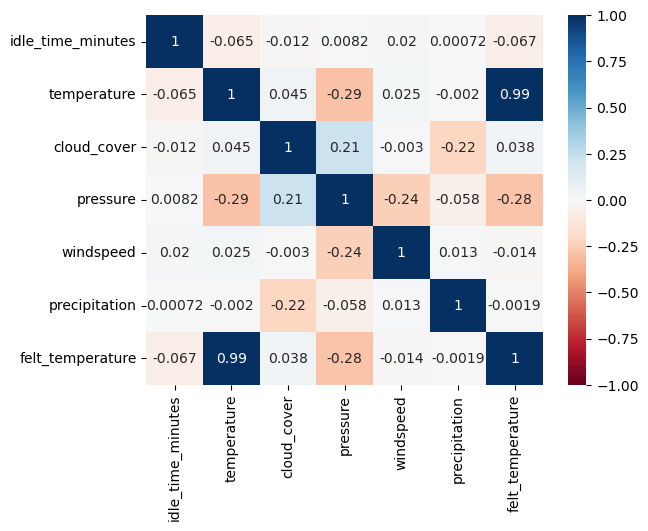

In [18]:
features = df_merged[['idle_time_minutes','temperature', 'cloud_cover', 'pressure', 'windspeed', 'precipitation','felt_temperature']]
corr = features.corr()
# Create the heatmap
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

**Idle time and weather**

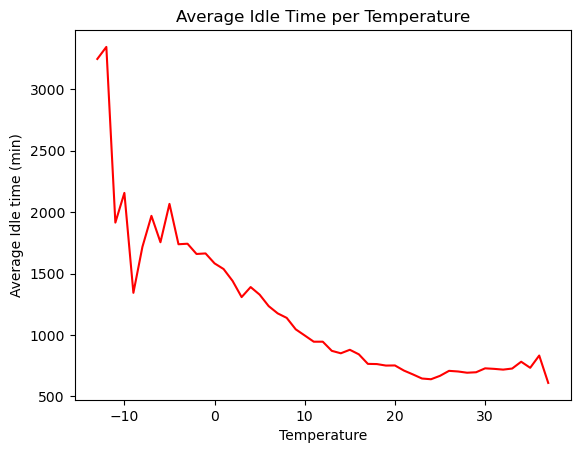

<Figure size 1600x900 with 0 Axes>

In [19]:
avg_perTemp = df_merged.groupby(df_merged['temperature'])['idle_time_minutes'].mean()

plt.xlabel("Temperature")
plt.ylabel("Average Idle time (min)")
plt.title("Average Idle Time per Temperature")
plt.plot(avg_perTemp.index,avg_perTemp.values, color = "red") 
plt.figure(figsize = (16,9))
plt.show()

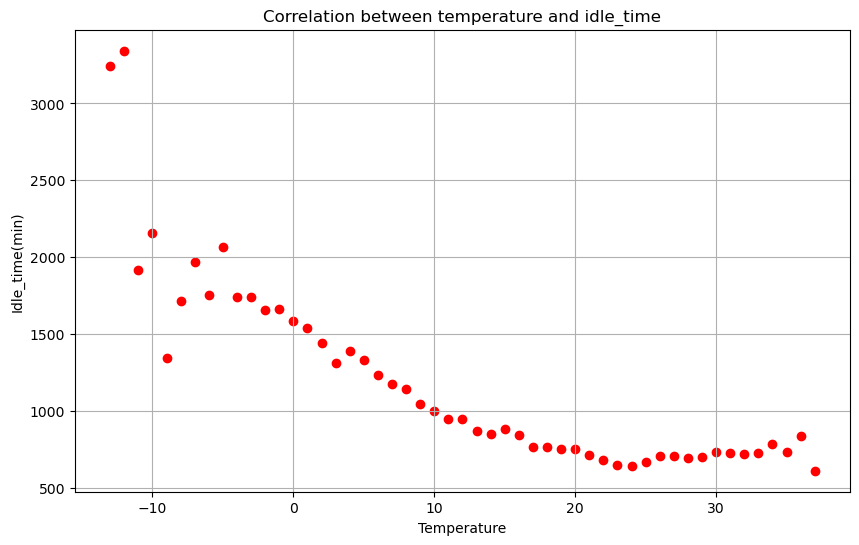

In [20]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
ax.scatter(avg_perTemp.index,avg_perTemp.values,color='red', marker='o')
ax.set_xlabel("Temperature")
ax.set_ylabel("Idle_time(min)")
ax.set_title("Correlation between temperature and idle_time")
plt.grid(True)
plt.show()

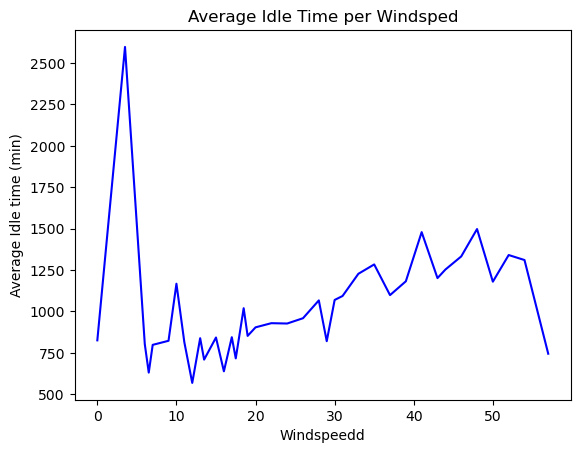

<Figure size 1600x900 with 0 Axes>

In [21]:
avg_perWindspeed = df_merged.groupby(df_merged['windspeed'])['idle_time_minutes'].mean()

plt.xlabel("Windspeedd")
plt.ylabel("Average Idle time (min)")
plt.title("Average Idle Time per Windsped")
plt.plot(avg_perWindspeed.index,avg_perWindspeed.values, color = "blue") 
plt.figure(figsize = (16,9))
plt.show()

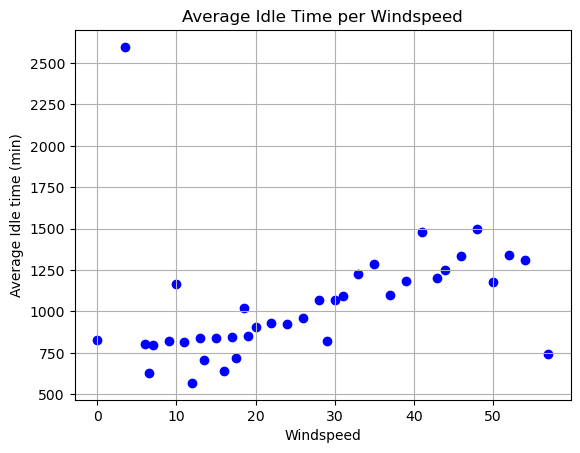

In [22]:
plt.xlabel("Windspeed")
plt.ylabel("Average Idle time (min)")
plt.title("Average Idle Time per Windspeed")

plt.scatter(avg_perWindspeed.index, avg_perWindspeed.values, color='blue', marker='o')
plt.grid()
plt.show()

In [23]:
cloud_cover_description = df_merged['cloud_cover_description'].unique()
print(cloud_cover_description)

['Cloudy' 'Partly Cloudy' 'Mostly Cloudy' 'Fair' 'Light Rain' 'Rain' 'Fog'
 'Mostly Cloudy / Windy' 'Light Drizzle' 'Haze' 'Cloudy / Windy'
 'Partly Cloudy / Windy' 'Light Snow' 'Fair / Windy' 'Wintry Mix / Windy'
 'Wintry Mix' 'Light Freezing Rain / Windy' 'Light Snow and Sleet / Windy'
 'Light Snow / Windy' 'Light Freezing Rain' 'Light Freezing Drizzle'
 'Snow' 'Light Snow and Sleet' 'Light Rain / Windy' 'Heavy Rain' 'Thunder'
 'T-Storm' 'Light Rain with Thunder' 'Heavy T-Storm' 'Rain / Windy'
 'Thunder in the Vicinity' 'Light Drizzle / Windy' 'Mist' 'Snow / Windy'
 'Drizzle' 'Heavy T-Storm / Windy' 'Heavy Rain / Windy' 'Patches of Fog']


In [24]:
bad_values = ['Light Rain', 'Rain', 'Light Drizzle', 'Haze', 'Light Snow', 
              'Light Freezing Rain / Windy', 'Light Snow and Sleet / Windy',
             'Light Snow / Windy', 'Light Freezing Rain', 'Light Freezing Drizzle',
             'Snow', 'Light Snow and Sleet', 'Light Rain / Windy', 'Heavy Rain', 'Thunder',
             'T-Storm', 'Light Rain with Thunder', 'Heavy T-Storm', 'Rain / Windy',
             'Thunder in the Vicinity', 'Light Drizzle / Windy', 'Mist', 'Snow / Windy',
             'Drizzle', 'Heavy T-Storm / Windy', 'Heavy Rain / Windy', 'Patches of Fog']
df_merged['bad_weather'] = (df_merged['cloud_cover_description'].isin(bad_values)).astype(int)

In [25]:
df_merged[df_merged['bad_weather'] == 1]['idle_time'].mean()

Timedelta('0 days 16:45:09.762992436')

In [26]:
df_merged[df_merged['bad_weather'] == 0]['idle_time'].mean()

Timedelta('0 days 14:16:49.257410393')

In [27]:
df_merged[(df_merged['temperature']>20) & (df_merged['bad_weather'] == 0)]['idle_time'].mean()

Timedelta('0 days 11:29:23.451601132')

In [28]:
df_merged[(df_merged['temperature']<20) & (df_merged['bad_weather'] == 1)]['idle_time'].mean()

Timedelta('0 days 19:19:36.957459959')

In [29]:
df_merged[ (df_merged['windspeed'] > 0) & (df_merged['bad_weather'] == 1) ]

trip_id  duration          start_time             end_time  \
320      365207231         3 2021-01-01 18:25:00  2021-01-01 18:28:00   
321      365207230        28 2021-01-01 18:27:00  2021-01-01 18:55:00   
322      365239948        77 2021-01-01 18:29:00  2021-01-01 19:46:00   
323      365239949        48 2021-01-01 18:29:00  2021-01-01 19:17:00   
324      365239947        46 2021-01-01 18:35:00  2021-01-01 19:21:00   
...            ...       ...                 ...                  ...   
1678837  579499101        23 2022-12-31 23:44:00  2023-01-01 00:07:00   
1678838  579499099        17 2022-12-31 23:45:00  2023-01-01 00:02:00   
1678839  579499097         8 2022-12-31 23:51:00  2022-12-31 23:59:00   
1678840  579499095        23 2022-12-31 23:54:00  2023-01-01 00:16:00   
1678841  579499093        62 2022-12-31 23:54:00  2023-01-01 00:56:00   

         start_station  end_station bike_id  plan_duration  \
320               3054         3014   14552             30   
321               3108         3066   14504             30   
322               3168         3078   11784            365   
323               3058         3007   11712             30   
324               3200         3200   17081             30   
...                ...          ...     ...            ...   
1678837           3244         3287   14674             30   
1678838           3295         3054   23113             30   
1678839           3255         3046   16897             30   
1678840           3255         3113   22646             30   
1678841           3161         3010   13100             30   

        trip_route_category passholder_type  ...       idle_time temperature  \
320                 One Way        Indego30  ... 0 days 16:54:00         3.0   
321                 One Way        Indego30  ... 0 days 19:34:00         3.0   
322                 One Way       Indego365  ... 0 days 00:04:00         3.0   
323                 One Way        Indego30  ... 0 days 17:56:00         3.0   
324              Round Trip        Indego30  ... 1 days 19:28:00         3.0   
...                     ...             ...  ...             ...         ...   
1678837             One Way        Indego30  ... 0 days 10:59:22        11.0   
1678838             One Way        Indego30  ... 0 days 16:01:45        11.0   
1678839             One Way        Indego30  ... 0 days 09:42:07        11.0   
1678840             One Way        Indego30  ... 0 days 09:50:10        11.0   
1678841             One Way        Indego30  ... 0 days 10:17:26        11.0   

         cloud_cover  cloud_cover_description pressure  windspeed  \
320             11.0               Light Rain  1028.20       15.0   
321             11.0               Light Rain  1028.20       15.0   
322             11.0               Light Rain  1028.20       15.0   
323             11.0               Light Rain  1028.20       15.0   
324             11.0               Light Rain  1028.20       15.0   
...              ...                      ...      ...        ...   
1678837         12.0                     Rain  1010.94       11.0   
1678838         12.0                     Rain  1010.94       11.0   
1678839         12.0                     Rain  1010.94       11.0   
1678840         12.0                     Rain  1010.94       11.0   
1678841         12.0                     Rain  1010.94       11.0   

         precipitation felt_temperature idle_time_minutes bad_weather  
320               1.02             -1.0       1014.000000           1  
321               1.02             -1.0       1174.000000           1  
322               1.02             -1.0          4.000000           1  
323               1.02             -1.0       1076.000000           1  
324               1.02             -1.0       2608.000000           1  
...                ...              ...               ...         ...  
1678837           1.27             11.0        659.366667           1  
1678838           1.27 

In [30]:
df_merged[df_merged['bad_weather'] == 1].count()

trip_id                    86204
duration                   86204
start_time                 86204
end_time                   86204
start_station              86204
end_station                86204
bike_id                    86204
plan_duration              86204
trip_route_category        86204
passholder_type            86204
bike_type                  86204
Date_s                     86204
Weekday_s                  86204
Hour_s                     86204
Date_e                     86204
Weekday_e                  86204
Hour_e                     86204
start_coordinates          86204
end_coordinates            86204
idle_time                  86204
temperature                86204
cloud_cover                86204
cloud_cover_description    86204
pressure                   86204
windspeed                  86204
precipitation              86204
felt_temperature           86204
idle_time_minutes          86204
bad_weather                86204
dtype: int64

In [31]:
df_merged.groupby("bad_weather")["idle_time_minutes"].mean()

bad_weather
0     856.820957
1    1005.162717
Name: idle_time_minutes, dtype: float64

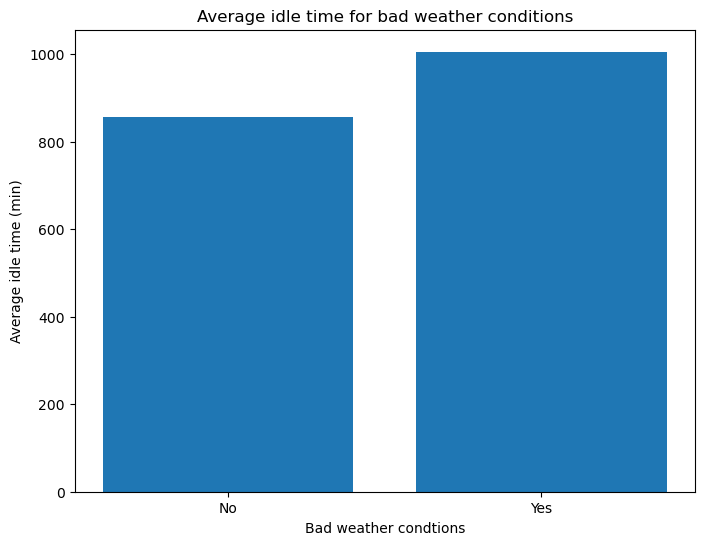

In [32]:
average_idle_time = df_merged.groupby("bad_weather")["idle_time_minutes"].mean()

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(average_idle_time.index, average_idle_time)

ax.set_xticks([0,1])
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel("Bad weather condtions")
ax.set_ylabel("Average idle time (min)")
ax.set_title("Average idle time for bad weather conditions")

plt.show()

In [33]:
df_merged.groupby([(df_merged['bad_weather'] == 1) & (df_merged['temperature'] < 20)])['idle_time_minutes'].mean()

False     854.438809
True     1159.615958
Name: idle_time_minutes, dtype: float64

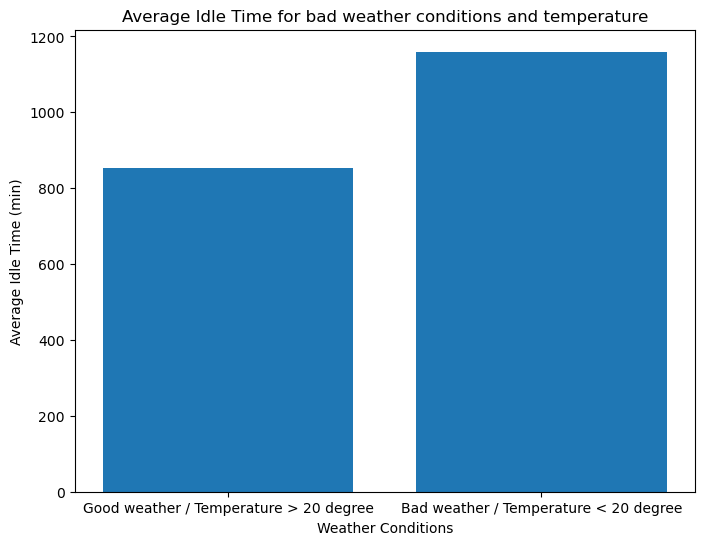

In [34]:
average_idle_time = df_merged.groupby([(df_merged['bad_weather'] == 1) & (df_merged['temperature'] < 20)])['idle_time_minutes'].mean()

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(average_idle_time.index, average_idle_time)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Good weather / Temperature > 20 degree', 'Bad weather / Temperature < 20 degree'])
ax.set_xlabel("Weather Conditions")
ax.set_ylabel("Average Idle Time (min)")
ax.set_title("Average Idle Time for bad weather conditions and temperature")

plt.show()

In [35]:
df_merged.groupby([(df_merged['windspeed'] > 0) & df_merged['bad_weather'] == 1])['idle_time_minutes'].mean()

False    857.870572
True     994.775791
Name: idle_time_minutes, dtype: float64

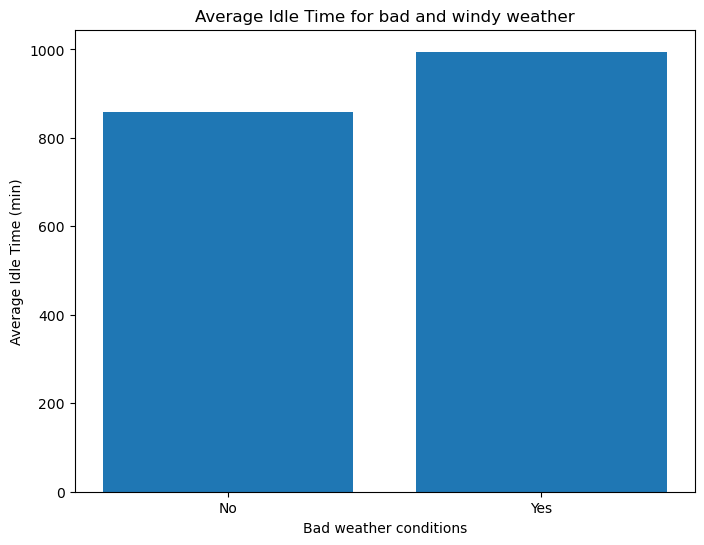

In [36]:
average_idle_time = df_merged.groupby([(df_merged['windspeed'] > 0) & df_merged['bad_weather'] == 1])['idle_time_minutes'].mean()

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(average_idle_time.index, average_idle_time)

ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel("Bad weather conditions")
ax.set_ylabel("Average Idle Time (min)")
ax.set_title("Average Idle Time for bad and windy weather")

plt.show()

In [37]:
dropCol = ['cloud_cover', 'cloud_cover_description', 'pressure', 'precipitation', 'felt_temperature']
df_merged.drop(dropCol, axis=1, inplace=True)
df_merged

trip_id  duration          start_time             end_time  \
0        365184634        15 2021-01-01 00:05:00  2021-01-01 00:20:00   
1        365184633        14 2021-01-01 00:06:00  2021-01-01 00:20:00   
2        365184632        33 2021-01-01 00:07:00  2021-01-01 00:40:00   
3        365184631         9 2021-01-01 00:13:00  2021-01-01 00:22:00   
4        365184630        13 2021-01-01 00:37:00  2021-01-01 00:50:00   
...            ...       ...                 ...                  ...   
1678837  579499101        23 2022-12-31 23:44:00  2023-01-01 00:07:00   
1678838  579499099        17 2022-12-31 23:45:00  2023-01-01 00:02:00   
1678839  579499097         8 2022-12-31 23:51:00  2022-12-31 23:59:00   
1678840  579499095        23 2022-12-31 23:54:00  2023-01-01 00:16:00   
1678841  579499093        62 2022-12-31 23:54:00  2023-01-01 00:56:00   

         start_station  end_station bike_id  plan_duration  \
0                 3125         3157   14542             30   
1                 3022         3010    5294             30   
2                 3066         3201   14586             30   
3                 3045         3034   14683             30   
4                 3052         3040    3330             30   
...                ...          ...     ...            ...   
1678837           3244         3287   14674             30   
1678838           3295         3054   23113             30   
1678839           3255         3046   16897             30   
1678840           3255         3113   22646             30   
1678841           3161         3010   13100             30   

        trip_route_category passholder_type  ...      Date_e Weekday_e  \
0                   One Way        Indego30  ...  2021-01-01         4   
1                   One Way        Indego30  ...  2021-01-01         4   
2                   One Way        Indego30  ...  2021-01-01         4   
3                   One Way        Indego30  ...  2021-01-01         4   
4                   One Way        Indego30  ...  2021-01-01         4   
...                     ...             ...  ...         ...       ...   
1678837             One Way        Indego30  ...  2023-01-01         6   
1678838             One Way        Indego30  ...  2023-01-01         6   
1678839             One Way        Indego30  ...  2022-12-31         5   
1678840             One Way        Indego30  ...  2023-01-01         6   
1678841             One Way        Indego30  ...  2023-01-01         6   

         Hour_e     start_coordinates       end_coordinates       idle_time  \
0             0  39.943909,-75.167351  39.925449,-75.159538 1 days 17:43:00   
1             0   39.95472,-75.183228  39.947109,-75.166183 0 days 06:33:00   
2             0   39.94561,-75.173477  39.955231,-75.166199 0 days 00:01:00   
3             0  39.947922,-75.162369  39.933151,-75.162483 3 days 08:03:00   
4             0  39.947319,-75.156952  39.962891,-75.166061 1 days 12:06:00   
...         ...                   ...                   ...             ...   
1678837       0   39.938648,-75.16674  39.943668,-75.216057 0 days 10:59:22   
1678838       0  39.950279,-75.160271  39.962502,-75.174202 0 days 16:01:45   
1678839      23  39.950951,-75.164383  39.950119,-75.144722 0 days 09:42:07   
1678840       0  39.950951,-75.164383   39.97472,-75.197807 0 days 09:50:10   
1678841       0  39.954861,-75.180908  39.947109,-75.166183 0 days 10:17:26   

         temperature windspeed idle_time_minutes bad_weather  
0                5.0      19.0       2503.000000           0  
1                5.0      19.0        393.000000           0  
2                5.0      19.0          1.000000           0  
3                5.0      19.0       4803.000000           0  
4                5.0      11.0       2166.000000           0  
...              ...       ...               ...         ...  
1678837         11.0      11.0        659.366667           1  
1678838         11.0      11.0        961.75000

In [38]:
df_merged.to_csv('merged_PhilWeather.csv', index=False)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
import glob

In [2]:
Phil = pd.read_csv('cleaned_Phil.csv', low_memory=False)

In [3]:
Phil['Date_s'] = pd.to_datetime(Phil['Date_s'])

**Overall performance of the bike sharing system**

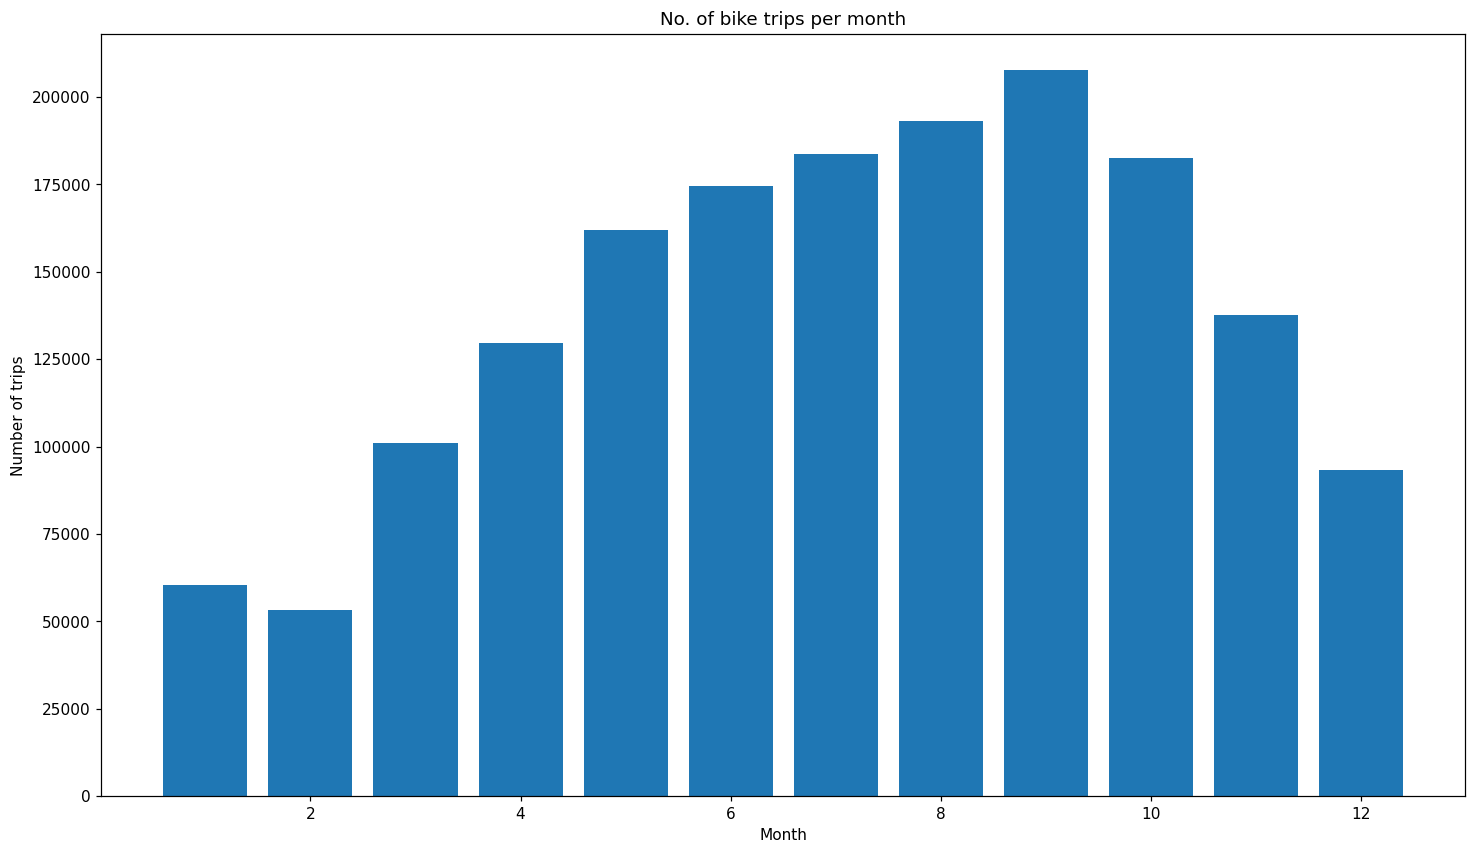

In [4]:
# usage per month
month = Phil.groupby(Phil['Date_s'].dt.month)['trip_id'].nunique()
fig, ax = plt.subplots(figsize=(16,9), dpi = 110)
ax.bar(month.index, month)
plt.title("No. of bike trips per month")
plt.xlabel("Month")
plt.ylabel("Number of trips")
fig.savefig("No_of_bike_trips_per_month.jpg")
plt.show()

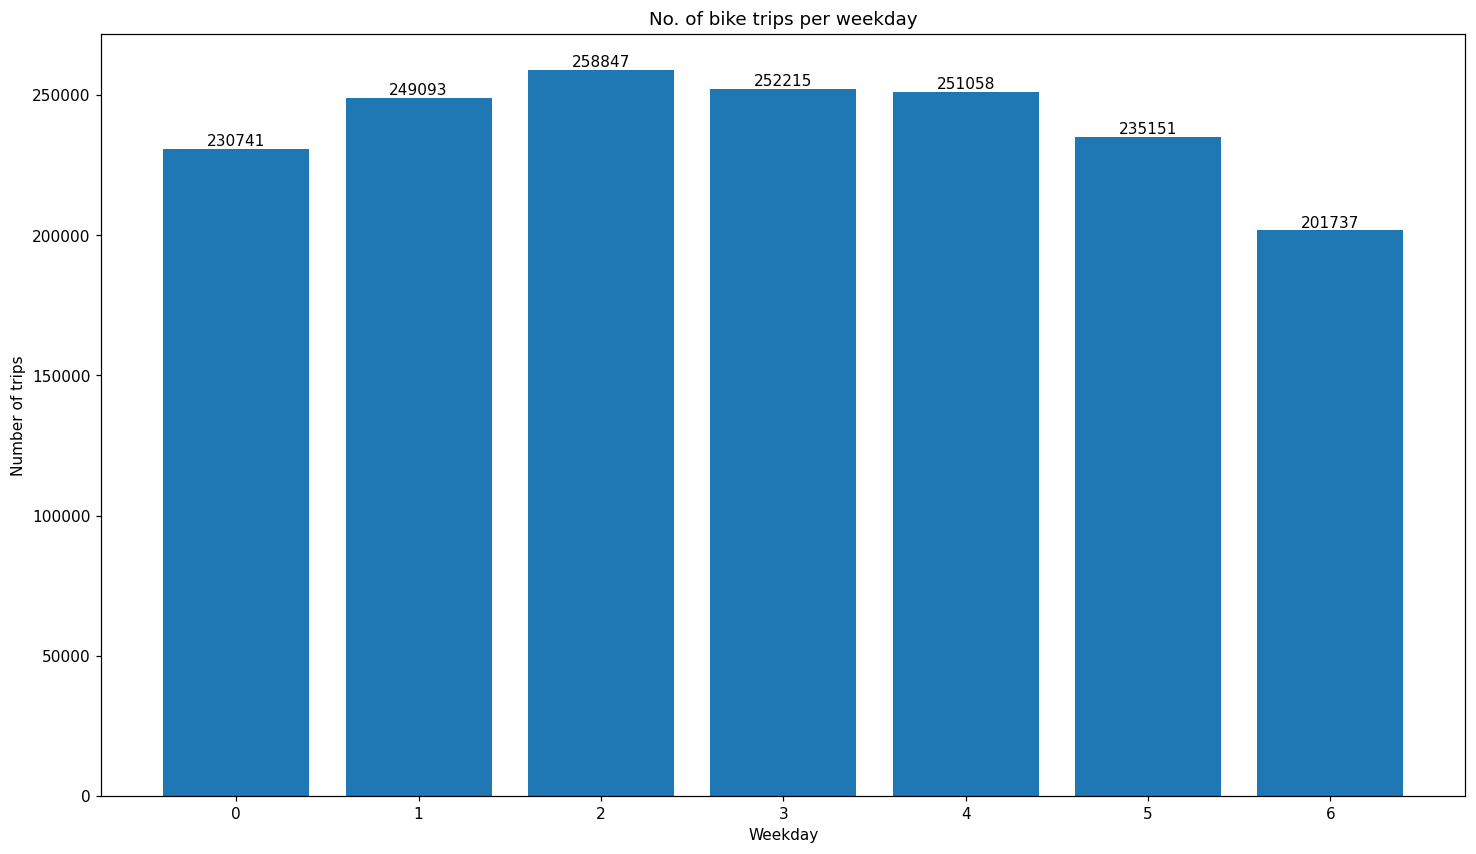

In [5]:
# usage per weekday
weekday = Phil.groupby(['Weekday_s'])['trip_id'].nunique()
fig, ax = plt.subplots(figsize=(16,9), dpi = 110)
ax.bar(weekday.index, weekday)
# Add labels to the bars
for i, v in enumerate(weekday):    
    ax.text(i, v + 50, str(v), ha='center', va='bottom') 
plt.title("No. of bike trips per weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of trips")
fig.savefig("No_of_bike_trips_per_weekday.jpg")
plt.show()

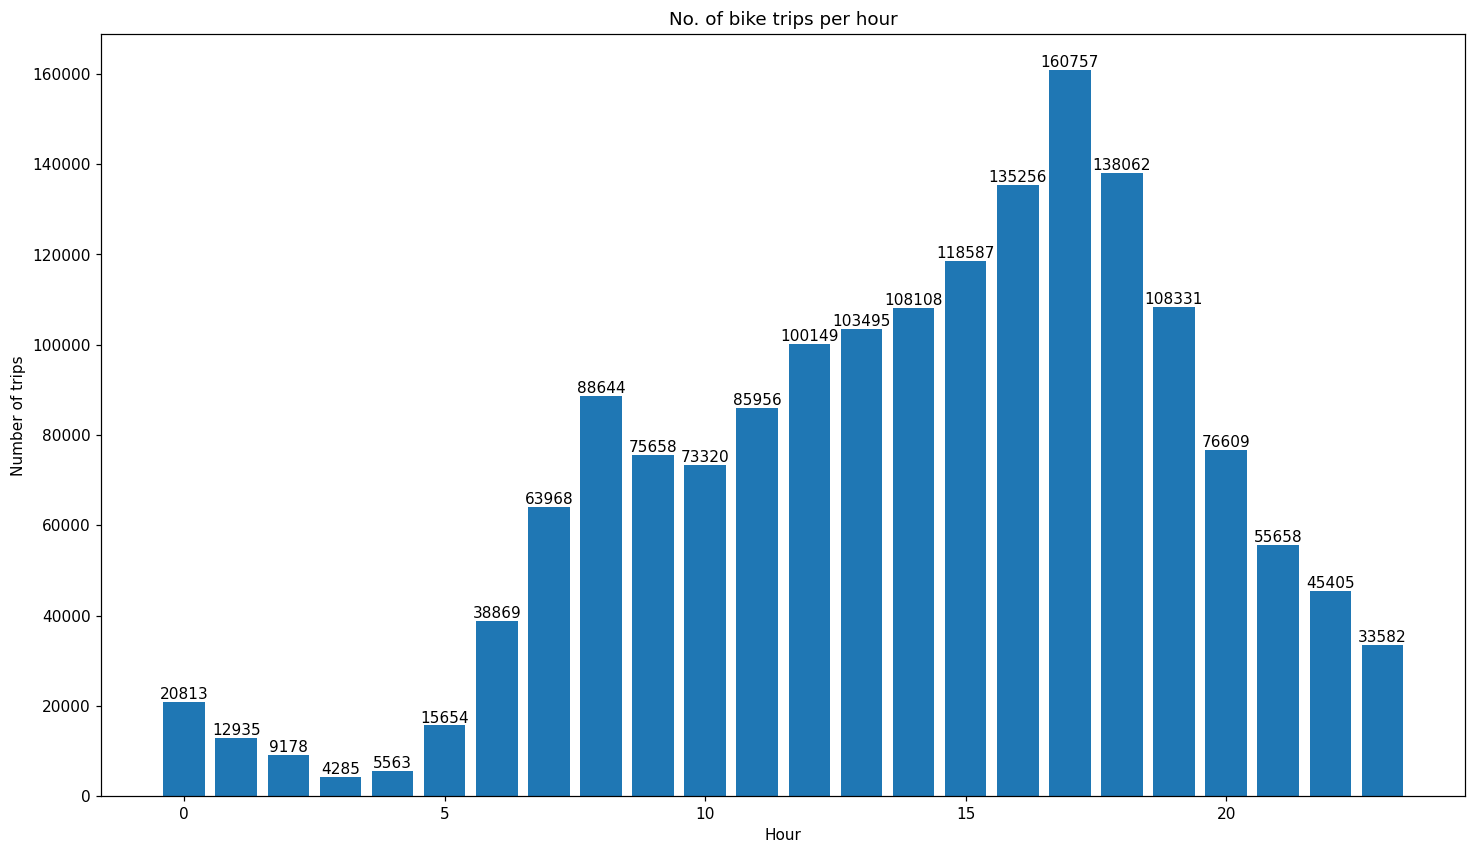

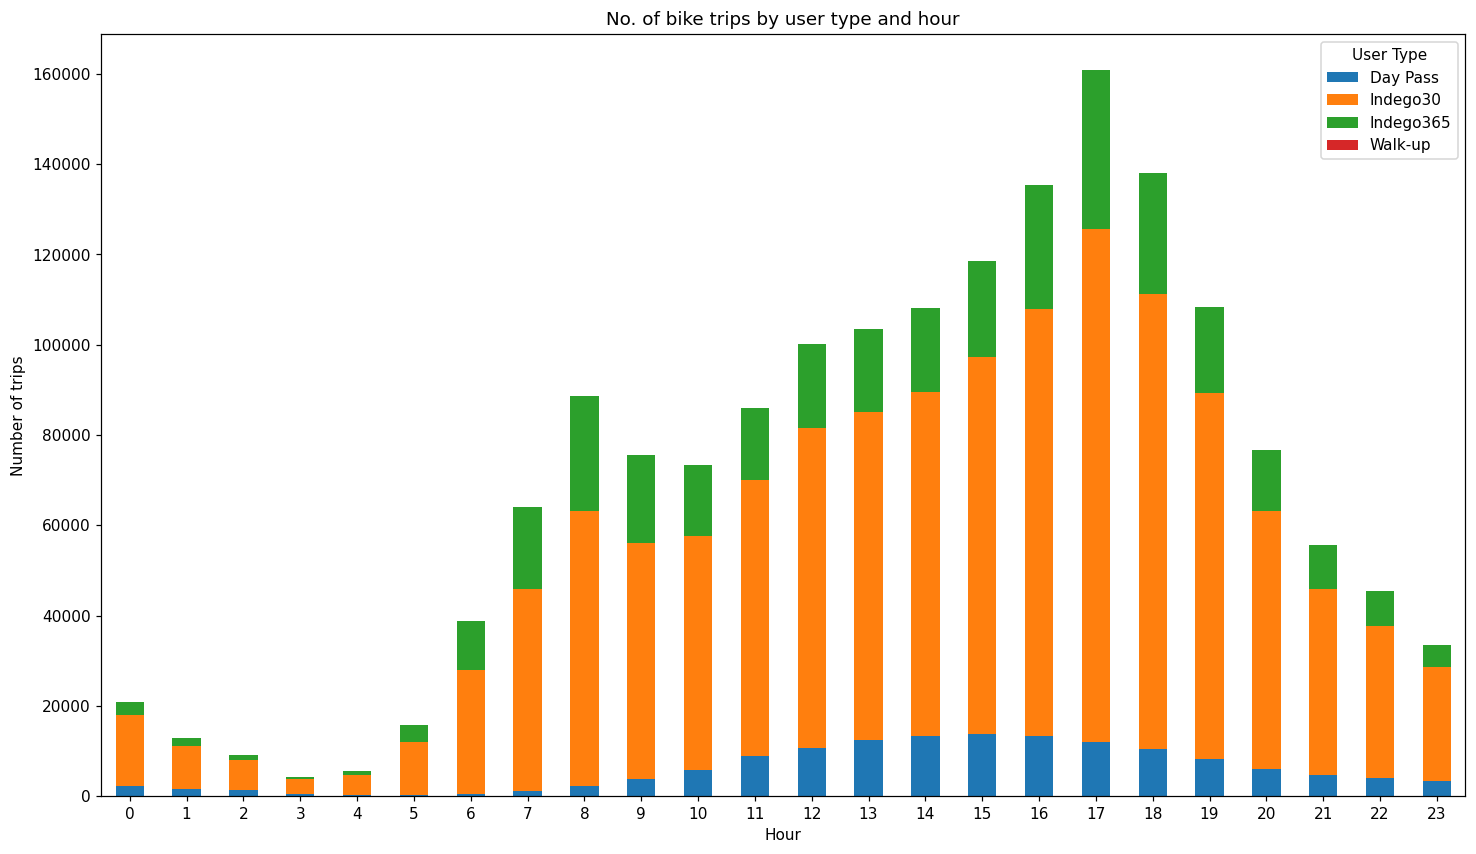

In [6]:
# Usage per hour
hour = Phil.groupby(['Hour_s'])['trip_id'].nunique()
fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
ax.bar(hour.index, hour)
plt.title("No. of bike trips per hour")
plt.xlabel("Hour")
plt.ylabel("Number of trips")

# Add labels to the bars
for i, v in enumerate(hour):    
    ax.text(i, v + 50, str(v), ha='center', va='bottom') 
# i: index of hour,  v: value of trip_id,  ha: horizintal alignment,  va: vertical alignment
fig.savefig("No_of_bike_trips_per_hour.jpg")
plt.show()

# stacked bar chart
grouped = Phil.groupby(['Hour_s', 'passholder_type'])['trip_id'].nunique().unstack()
fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
grouped.plot(kind='bar', stacked=True, ax=ax)
plt.xticks(rotation = 0)
plt.title("No. of bike trips by user type and hour")
plt.xlabel("Hour")
plt.ylabel("Number of trips")
plt.legend(title='User Type')
fig.savefig("No_of_bike_trips_by_user_type_and_hour.jpg")
plt.show()

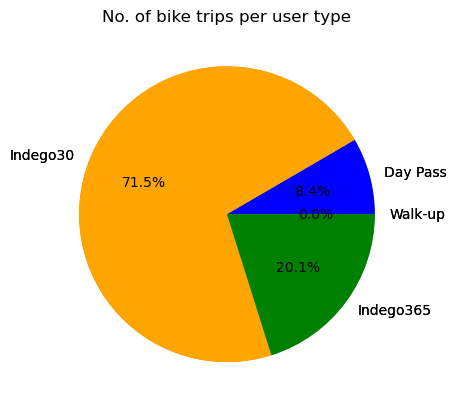

In [7]:
user = Phil.groupby(['passholder_type'])['trip_id'].nunique()

colors = ['blue', 'orange', 'green', 'red']
fig, ax = plt.subplots()
ax.pie(user, labels=user.index)
ax.pie(user, labels=user.index, autopct='%1.1f%%', colors=colors)
plt.title("No. of bike trips per user type")
fig.savefig("No_of_bike_trips_per_user_type.jpg")
plt.show()

In [8]:
# Distribution of passholder type and bike type
pivot_table = Phil.pivot_table(index='passholder_type', columns='bike_type', aggfunc='size')
pivot_table

bike_type        electric  standard
passholder_type                    
Day Pass            56850     84059
Indego30           458129    741779
Indego365          109365    228648
Walk-up                 5         7

for later: dividing in Day Pass/Walk-up and Indego30/Indego365
           -> presumption that group 1 are tourists

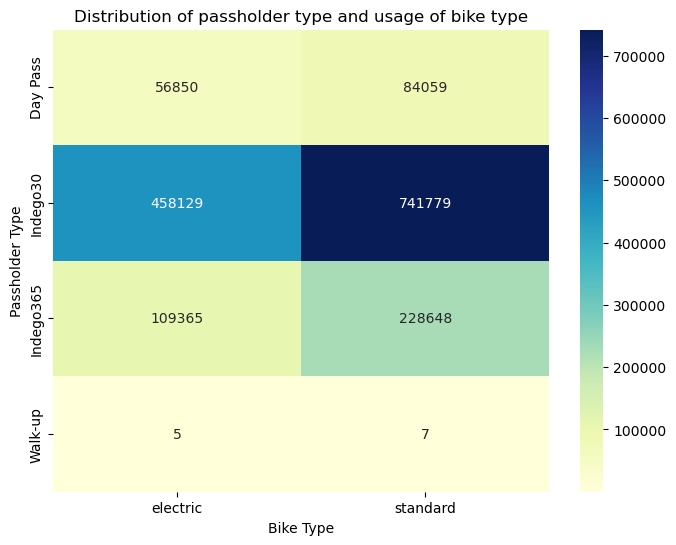

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.0f') #from yellow for low values, through green, to dark blue for high values.
plt.title('Distribution of passholder type and usage of bike type')
plt.xlabel('Bike Type')
plt.ylabel('Passholder Type')
plt.savefig("Distribution_of_passholder_type_and_usage_of_bike_type.jpg")
plt.show()

In [10]:
Phil['duration'].mean()
Phil.groupby(['passholder_type', 'bike_type'])['duration'].mean()
Phil.groupby(['bike_type', 'passholder_type'])['duration'].mean().unstack()

passholder_type   Day Pass   Indego30  Indego365    Walk-up
bike_type                                                  
electric         37.516799  16.526044  12.879989  86.800000
standard         36.290237  17.674206  12.959680  41.428571

In [11]:
# how many eclecttric and standard bikes
Phil['bike_id'].nunique()
Phil.groupby(['bike_type'])['bike_id'].nunique()

bike_type
electric    1204
standard    1169
Name: bike_id, dtype: int64

In [12]:
# rides with the different bikes, maybe important for maintenance and idle time
Phil.groupby(['bike_type'])['bike_id'].count()
Phil.groupby(['bike_type'])['trip_id'].count()

bike_type
electric     624349
standard    1054493
Name: trip_id, dtype: int64

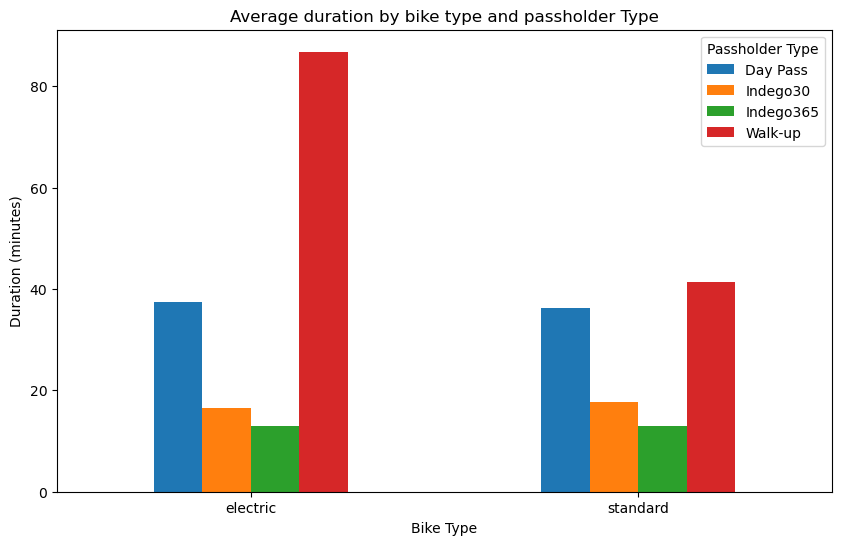

In [13]:
dura = Phil.groupby(['bike_type', 'passholder_type'])['duration'].mean().unstack()

# average durtion by biky type and passholder type
ax = dura.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Duration (minutes)')
ax.set_xlabel('Bike Type')
ax.set_title('Average duration by bike type and passholder Type')
ax.legend(title='Passholder Type')

plt.xticks(rotation=0)
plt.savefig("Average_duration_by_bike_type_and_passholder_type.jpg")
plt.show()

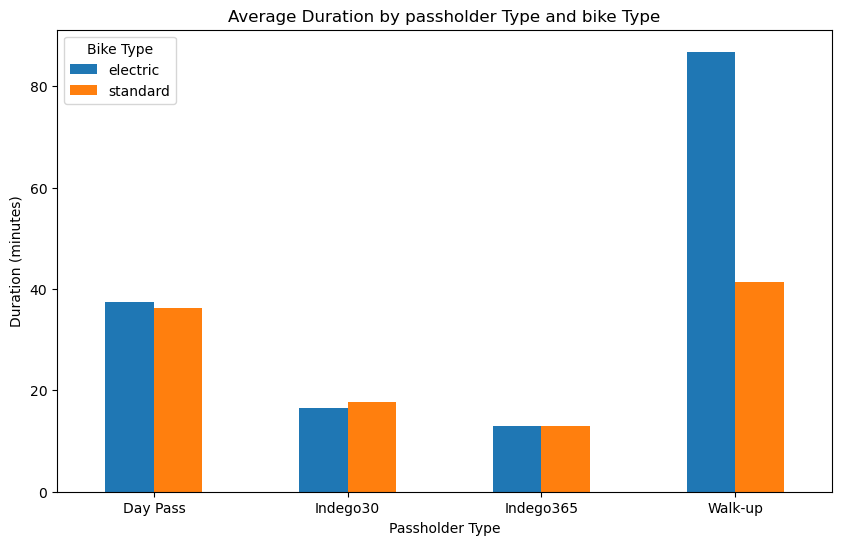

In [14]:
ura = Phil.groupby(['passholder_type', 'bike_type'])['duration'].mean().unstack()

# average durtion by biky type and passholder type
ax = ura.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Duration (minutes)')
ax.set_xlabel('Passholder Type')
ax.set_title('Average Duration by passholder Type and bike Type')
ax.legend(title='Bike Type')
plt.xticks(rotation=0)
plt.savefig("Average_duration_by_passholder_type_and_bike_type.jpg")
plt.show()

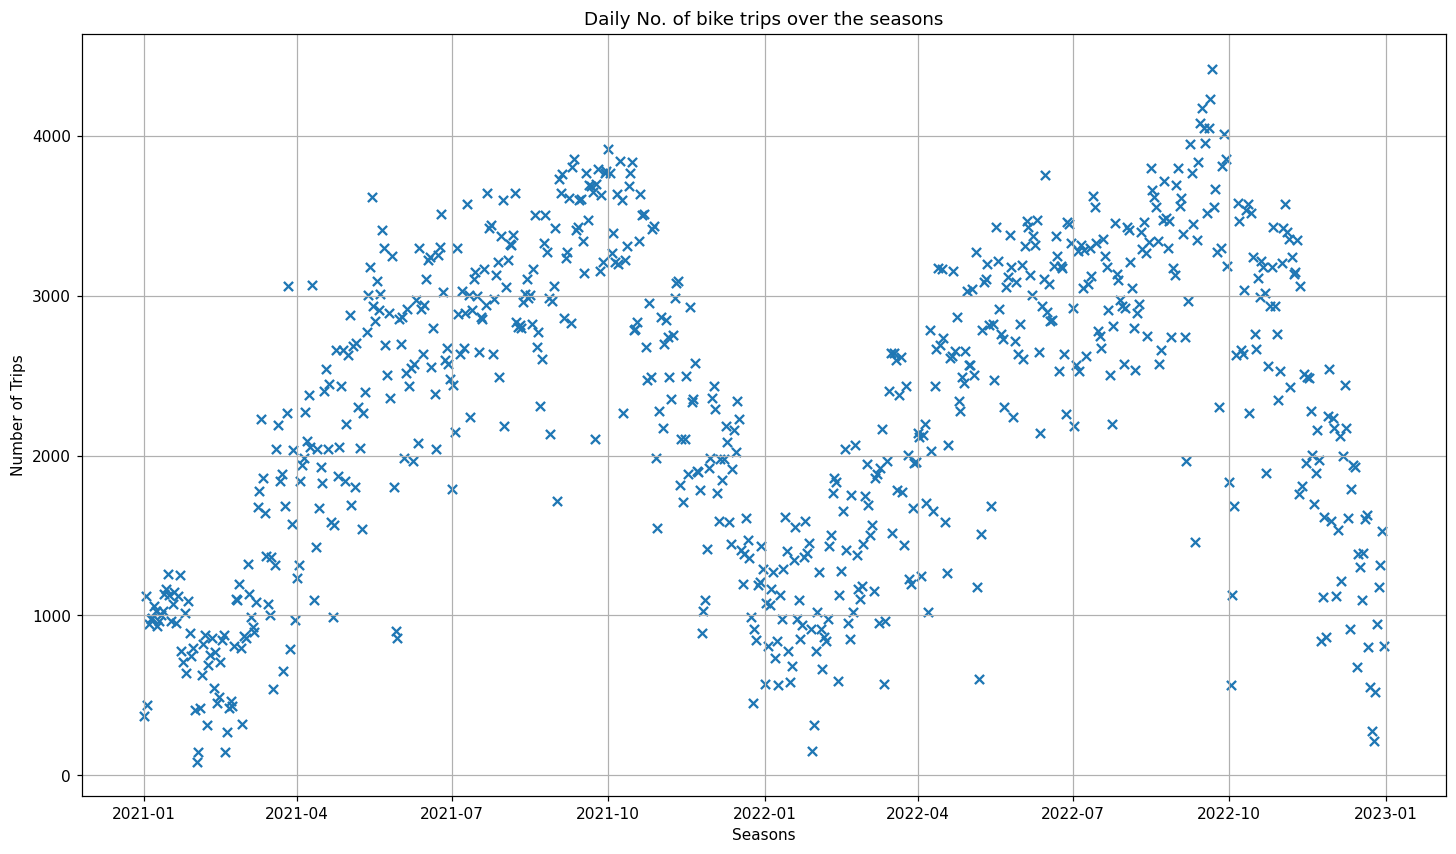

In [15]:
daily_trips = Phil.groupby('Date_s')['trip_id'].count()

### daily No. of bike trips over the year as scatter
fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
ax.scatter(daily_trips.index, daily_trips.values, marker="x")
plt.grid()
plt.title("Daily No. of bike trips over the seasons")
plt.xlabel("Seasons")
plt.ylabel("Number of Trips")
fig.savefig("Daily_No_of_bike_trips_over_the_seasons.jpg")
plt.show()

In [16]:
Weather = pd.read_csv('cleaned_Weather.csv', low_memory=False)

In [17]:
Weather['timestamp'].dtype

dtype('O')

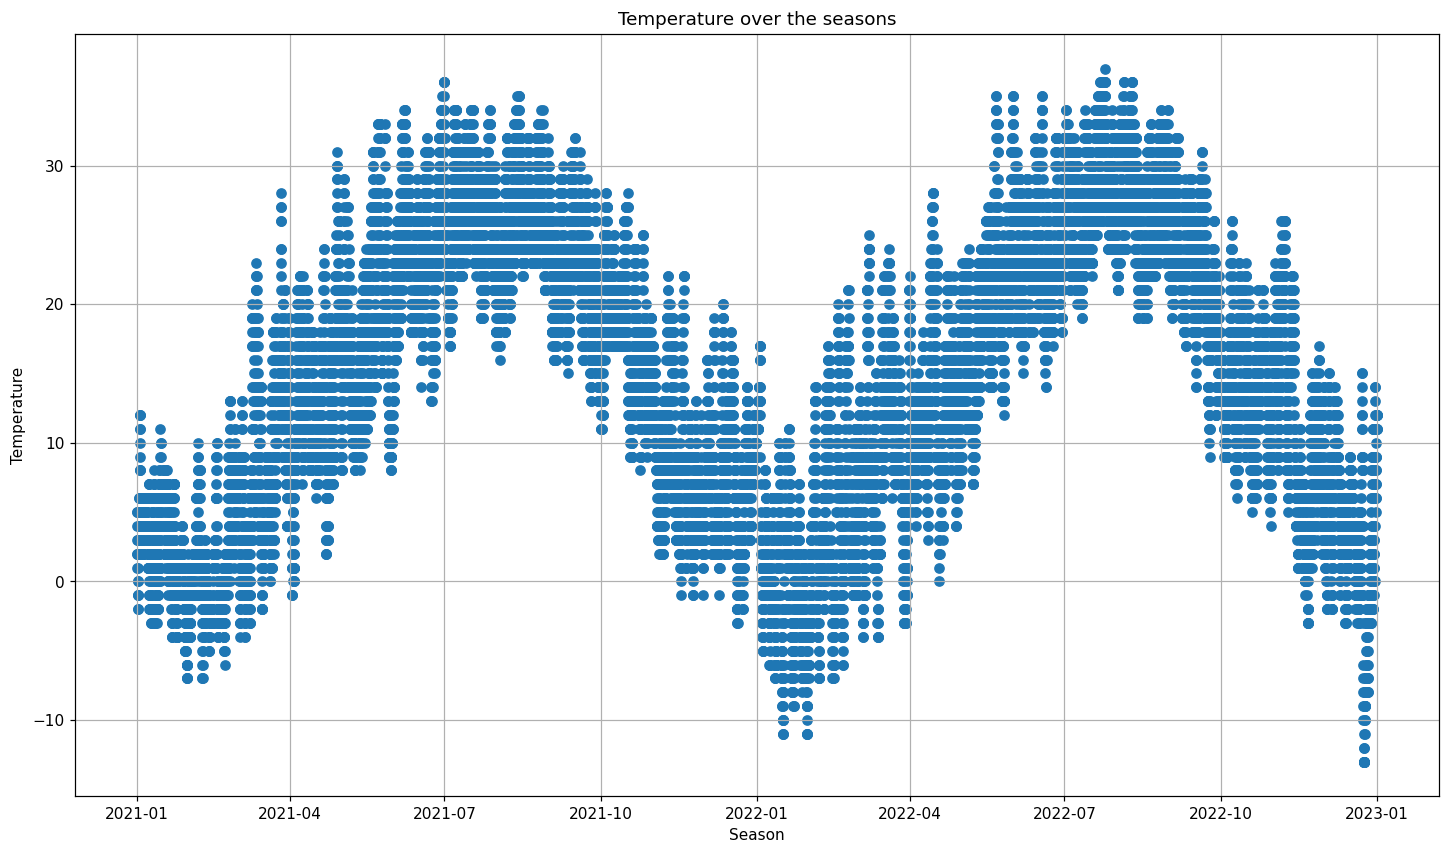

In [18]:
Weather['timestamp']=pd.to_datetime(Weather['timestamp'])
daily_weather = Weather.groupby(['timestamp'])['temperature'].mean()
fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
ax.scatter(daily_weather.index, daily_weather, marker = "o")
plt.title('Temperature over the seasons')
plt.xlabel('Season')
plt.ylabel('Temperature')
plt.grid()
fig.savefig("Temperature_over_the_seasons.jpg")
plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
from collections import Counter
import folium #map
import matplotlib.pyplot as plt #color and graph
import matplotlib.cm as cm #color
import math
import random
import glob

In [3]:
Phil = pd.read_csv('cleaned_files.csv', low_memory=False)
Phil2 = pd.read_csv('merged_files.csv', low_memory=False) #uncleaned file for stolen bikes

In [5]:
columns = Phil.columns
print(columns)
#print (Phil["start_coordinates"])
Phil.info()

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'end_station', 'bike_id', 'plan_duration', 'trip_route_category',
       'passholder_type', 'bike_type', 'Date_s', 'Weekday_s', 'Hour_s',
       'Date_e', 'Weekday_e', 'Hour_e', 'start_coordinates',
       'end_coordinates'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781474 entries, 0 to 1781473
Data columns (total 19 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   trip_id              int64 
 1   duration             int64 
 2   start_time           object
 3   end_time             object
 4   start_station        int64 
 5   end_station          int64 
 6   bike_id              object
 7   plan_duration        int64 
 8   trip_route_category  object
 9   passholder_type      object
 10  bike_type            object
 11  Date_s               object
 12  Weekday_s            int64 
 13  Hour_s               int64 
 14  Date_e               objec

In [6]:
# unique start station coordinations
unique_coordinates = Phil[["start_coordinates", "start_station"]].drop_duplicates().values.tolist()
print (unique_coordinates)
amount = len(unique_coordinates)
print (amount)


[['39.943909,-75.167351', 3125], ['39.95472,-75.183228', 3022], ['39.94561,-75.173477', 3066], ['39.947922,-75.162369', 3045], ['39.947319,-75.156952', 3052], ['39.955231,-75.166199', 3201], ['39.97121,-75.159698', 3039], ['39.953651,-75.14045', 3124], ['39.942181,-75.177467', 3012], ['39.96439,-75.179871', 3057], ['39.947109,-75.166183', 3010], ['39.964371,-75.165817', 3204], ['39.963791,-75.18158', 3212], ['39.93549,-75.167107', 3068], ['39.95425,-75.177612', 3061], ['39.948219,-75.209084', 3024], ['39.980049,-75.15522', 3031], ['39.940609,-75.149582', 3028], ['39.928139,-75.165154', 3164], ['39.953548,-75.171921', 3078], ['39.984921,-75.156677', 3210], ['39.962502,-75.174202', 3054], ['39.955109,-75.209869', 3074], ['39.928841,-75.170212', 3150], ['39.934311,-75.160423', 3098], ['39.942951,-75.159554', 3101], ['39.940769,-75.172272', 3203], ['39.953812,-75.174072', 3156], ['39.96664,-75.192093', 3104], ['39.940182,-75.154419', 3155], ['39.964111,-75.19973', 3067], ['39.96244,-75.161

In [7]:
#unique end station coordinations
unique_coordinates_end = Phil[['end_coordinates', "end_station"]].drop_duplicates().values.tolist()
print (unique_coordinates_end)
int2 = len(unique_coordinates_end)
print (int2)

[['39.925449,-75.159538', 3157], ['39.947109,-75.166183', 3010], ['39.955231,-75.166199', 3201], ['39.933151,-75.162483', 3034], ['39.962891,-75.166061', 3040], ['39.97121,-75.159698', 3039], ['39.940609,-75.149582', 3028], ['39.967442,-75.175072', 3051], ['39.934448,-75.145409', 3072], ['39.928841,-75.170212', 3150], ['39.955761,-75.189819', 3009], ['39.961731,-75.187881', 3071], ['39.980049,-75.15522', 3031], ['39.984921,-75.156677', 3210], ['39.92083,-75.170326', 3197], ['39.940189,-75.166908', 3086], ['39.955109,-75.209869', 3074], ['39.98003,-75.143707', 3017], ['39.937038,-75.150383', 3069], ['39.96759,-75.17952', 3102], ['39.93082,-75.174744', 3043], ['39.940182,-75.154419', 3155], ['39.953819,-75.142632', 3169], ['39.954861,-75.180908', 3161], ['39.94735,-75.148857', 3015], ['39.964371,-75.165817', 3204], ['39.95134,-75.173943', 3168], ['39.93549,-75.167107', 3068], ['39.963169,-75.147919', 3013], ['39.943909,-75.167351', 3125], ['39.937752,-75.180122', 3114], ['39.967178,-75.1

In [8]:
#coordinates
min_max = (Phil['start_coordinates'].min(), Phil['start_coordinates'].max())
print (min_max)

lat = (Phil2['start_lat'].min() + Phil2['start_lat'].max()) /2
print (lat)
lon = (Phil2['start_lon'].min() + Phil2['start_lon'].max()) / 2
print (lon)

('39.889938,-75.176788', '40.01112,-75.192871')
39.950529
-75.17551449999999


In [9]:
start_dict = dict(Phil)

In [10]:
map = folium.Map(location=[39.9505, -75.1755], zoom_start = 12)
map

In [11]:
# map with all stations
map = folium.Map(location=[39.95, -75.14], zoom_start = 12)

for start_coordinates, start_station in unique_coordinates:
    
    
    lat, lon = start_coordinates.split(",")
    lat = float(lat)
    lon = float(lon)
    
 
    
    if np.isnan(lat) or np.isnan(lon):
        continue 
        
    folium.Marker(location = [lat, lon],
                  popup= f"{start_station}"
                   ).add_to(map)
map

In [12]:
# counter how many starts at station 
map2 = folium.Map(location=[39.95, -75.14], zoom_start = 12)


start_counter  = Counter(Phil['start_station'])
start_counter_list = list(start_counter.items())
start_counter_list.sort(key=lambda x: x[1], reverse=True)

for station, count in start_counter_list:
    print(f"Station {station}: {count}")

station_dict_start = dict(Phil.start_station.value_counts().sort_index())
#print(station_dict_start)


color_palette = ['darkred', 'red', 'lightred', 'white', 'lightblue', 'blue', 'darkblue']


for start_coordinates, start_station in unique_coordinates:
    
    
    lat, lon = start_coordinates.split(",")
    lat = float(lat)
    lon = float(lon)

        
    if np.isnan(lat) or np.isnan(lon):
        continue 
        
    count = start_counter[start_station]
    popup_message = f"Station: {start_station}<br>Frequency: {count}"
    
    color_index = min(int(count / 4000), len(color_palette) - 1)
    marker_color = color_palette[color_index]

    
    
    folium.Marker(location = [lat, lon],
                  popup= popup_message,
                  icon=folium.Icon(color=marker_color)
                   ).add_to(map2)
    
map2

Station 3010: 31318
Station 3190: 29064
Station 3032: 28215
Station 3202: 27807
Station 3007: 27155
Station 3208: 26628
Station 3168: 26107
Station 3167: 25500
Station 3045: 25457
Station 3052: 25415
Station 3054: 25316
Station 3212: 24495
Station 3101: 22805
Station 3066: 22598
Station 3028: 22224
Station 3046: 21513
Station 3102: 21251
Station 3185: 20683
Station 3022: 20473
Station 3057: 20268
Station 3012: 19888
Station 3154: 19341
Station 3063: 17961
Station 3020: 16960
Station 3207: 16890
Station 3021: 16889
Station 3029: 16772
Station 3009: 16739
Station 3018: 16329
Station 3061: 16125
Station 3203: 15989
Station 3206: 15964
Station 3037: 15864
Station 3078: 15743
Station 3125: 15647
Station 3033: 15641
Station 3163: 15354
Station 3058: 15276
Station 3006: 14904
Station 3114: 14626
Station 3030: 14620
Station 3238: 14549
Station 3100: 14272
Station 3040: 14150
Station 3244: 14111
Station 3182: 13998
Station 3160: 13943
Station 3055: 13890
Station 3034: 13838
Station 3064: 13774


In [13]:
# counter how many ends at station - scale dark red to dark blue 
map3 = folium.Map(location=[39.95, -75.14], zoom_start = 12)


end_counter  = Counter(Phil['end_station'])
end_counter_list = list(end_counter.items())
end_counter_list.sort(key=lambda x: x[1], reverse=True)

#for station, count in end_counter_list:
#    print(f"Station {station}: {count}")

station_dict_end = dict(Phil.end_station.value_counts().sort_index())
#print(station_dict_end)


color_palette = ['darkred', 'red', 'lightred', 'white', 'lightblue', 'blue', 'darkblue']


for end_coordinates, end_station in unique_coordinates_end:
    
    
    lat, lon = end_coordinates.split(",")
    lat = float(lat)
    lon = float(lon)

        
    if np.isnan(lat) or np.isnan(lon):
        continue 
        
    count = end_counter[end_station]
    popup_message = f"Station: {end_station}<br>Frequency: {count}"
    
    color_index = min(int(count / 4000), len(color_palette) - 1)
    marker_color = color_palette[color_index]

    
    
    folium.Marker(location = [lat, lon],
                  popup= popup_message,
                  icon=folium.Icon(color=marker_color)
                   ).add_to(map3)
    

map3

In [14]:
# # bikes
unique_bikes = Phil["bike_id"].drop_duplicates().values.tolist()

amount_bikes = len(unique_bikes)
print (amount_bikes)

bike_counter  = Counter(Phil["bike_id"])
bike_counter_list = list(bike_counter.items())
bike_counter_list.sort(key=lambda x: x[1], reverse=False)


# shows how often each bike was rented 

print(bike_counter_list[1186])



#for bike_id, count in bike_counter_list:      #2373 lines so not printed
#    print(f"bike_id: {bike_id} : {count}")

2373
('3289', 719)


In [236]:
# Top 10 trips
popular_trips_group = Phil.groupby(["start_station", "end_station"]).size()
popular_trips = pd.DataFrame(popular_trips_group[popular_trips_group > 1000], columns=["count"])
popular_trips.reset_index(inplace=True)
popular_trips_sorted = popular_trips.sort_values(by= "count", ascending=False)
popular_trips_sorted.reset_index(drop=True, inplace=True)
popular_trips_sorted.head(20)

start_station  end_station  count
0            3212         3212   7275
1            3202         3202   5116
2            3057         3057   3242
3            3208         3032   2409
4            3035         3009   2308
5            3020         3032   2079
6            3057         3212   1927
7            3009         3035   1856
8            3186         3186   1650
9            3054         3102   1622
10           3102         3102   1608
11           3049         3049   1596
12           3163         3163   1582
13           3035         3249   1542
14           3032         3208   1512
15           3154         3167   1447
16           3102         3054   1420
17           3006         3208   1328
18           3249         3035   1279
19           3163         3212   1269

In [237]:
#duration = 1440 uncleaned data
count_true = (Phil2["duration"] == 1440).sum()
print(count_true)

801


In [239]:
# merged_data bikes with 1440 duration
Phil_1440minutes = Phil2[Phil2["duration"] == 1440 ]
selected_columns = ['start_station','start_lat', 'start_lon', "bike_type"]


start_station_count = Phil_1440minutes["start_station"].value_counts()

#print("duration of 1440 minutes for column 'start_station':")
#print(start_station_count.to_string())



In [241]:
# map for duration == 1440 on uncleaned dataset
map4 = folium.Map(location=[39.9505, -75.1755], zoom_start = 12)

for start_coordinates, start_station in unique_coordinates:
    
    
    lat, lon = start_coordinates.split(",")
    lat = float(lat)
    lon = float(lon)
    
    if np.isnan(lat) or np.isnan(lon):
        continue 
        
    stations_more_10_stolen = [3057, 3097, 3185, 3202, 3046, 3056, 3049, 3210, 3110, 3212, 3190, 3004, 3108, 3037, 3158, 3018, 3160, 3124]
   
    
    if start_station in stations_more_10_stolen:
        folium.Marker(location = [lat, lon],
                  popup= f"{start_station}",
                  icon=folium.Icon(color="red")
                   ).add_to(map4)
    
    else:
        folium.Marker(location = [lat, lon],
                  popup= f"{start_station}",
                  icon=folium.Icon(color="green")
                   ).add_to(map4)

    
map4

In [242]:
# average duration from start station
Phil_avg_duration = Phil.groupby(["start_station"])["duration"].mean()

print(Phil_avg_duration)

start_station
3004    24.112788
3005    21.169108
3006    19.815217
3007    14.590131
3008    16.751515
3009    16.723341
3010    15.937320
3011    17.099308
3012    13.093976
3013    16.748751
3014    17.625294
3015    18.881664
3016    17.475516
3017    21.478941
3018    21.416253
3019    20.304702
3020    12.611675
3021    15.271242
3022    16.934353
3024    24.264880
3025    13.889436
3026    18.746129
3028    17.384089
3029    16.987956
3030    13.776881
3031    21.104337
3032    13.638845
3033    15.068985
3034    14.300766
3035    13.728510
3037    18.607728
3038    14.232616
3039    18.313466
3040    14.626007
3041    22.433333
3043    15.619473
3045    17.073339
3046    19.339237
3047    22.555872
3049    27.628320
3050    18.812410
3051    18.418761
3052    14.348338
3053    17.716600
3054    16.297954
3055    20.924838
3056    20.944457
3057    36.364367
3058    15.725910
3059    17.012354
3060    19.293828
3061    15.636403
3062    17.337345
3063    13.160626
3064    14.266

In [243]:
count_true = (Phil["duration"] < 4).sum()
print(count_true)

82649


In [114]:
# data saved as new .csv for each season 

Phil["season"] = ""

for index, row in Phil.iterrows():
    
    date = row["Date_s"]
    month = int (date.split("-")[1])
    
    if 3 <= month <= 5:
        Phil.at[index, "season"] = "spring"
    elif 6 <= month <= 8:
         Phil.at[index, "season"] = "summer"
    elif 9 <= month <= 11:
         Phil.at[index, "season"] = "autumn"
    else:
         Phil.at[index, "season"] = "winter"
    
# because of long computing time build new dataframe for each season
for season in Phil["season"].unique():
    season_Phil = Phil[Phil["season"] == season]
    season_Phil.to_csv(f"{season}.csv", index=False)


In [16]:
#read season csv
Phil_winter = pd.read_csv('winter.csv', low_memory=False)
Phil_spring = pd.read_csv('spring.csv', low_memory=False)
Phil_summer = pd.read_csv('summer.csv', low_memory=False)
Phil_autumn = pd.read_csv('autumn.csv', low_memory=False)

In [17]:
#unique data winter
Phil_winter.nunique()

trip_id                207215
duration                  613
start_time             114828
end_time               114604
start_station             198
end_station               198
bike_id                  2200
plan_duration               5
trip_route_category         2
passholder_type             4
bike_type                   2
Date_s                    180
Weekday_s                   7
Hour_s                     24
Date_e                    184
Weekday_e                   7
Hour_e                     24
start_coordinates         196
end_coordinates           196
season                      1
dtype: int64

In [18]:
#unique data spring
Phil_spring.nunique()

trip_id                392691
duration                  906
start_time             159129
end_time               158430
start_station             181
end_station               181
bike_id                  1700
plan_duration               4
trip_route_category         2
passholder_type             4
bike_type                   2
Date_s                    184
Weekday_s                   7
Hour_s                     24
Date_e                    187
Weekday_e                   7
Hour_e                     24
start_coordinates         181
end_coordinates           181
season                      1
dtype: int64

In [19]:
#unique data summer
Phil_summer.nunique()

trip_id                551450
duration                  987
start_time             189348
end_time               188675
start_station             187
end_station               187
bike_id                  1963
plan_duration               4
trip_route_category         2
passholder_type             4
bike_type                   2
Date_s                    184
Weekday_s                   7
Hour_s                     24
Date_e                    186
Weekday_e                   7
Hour_e                     24
start_coordinates         187
end_coordinates           187
season                      1
dtype: int64

In [20]:
#unique data autumn
Phil_autumn.nunique()

trip_id                527794
duration                  870
start_time             179129
end_time               178921
start_station             194
end_station               193
bike_id                  2120
plan_duration               4
trip_route_category         2
passholder_type             3
bike_type                   2
Date_s                    182
Weekday_s                   7
Hour_s                     24
Date_e                    184
Weekday_e                   7
Hour_e                     24
start_coordinates         192
end_coordinates           191
season                      1
dtype: int64

In [21]:
#trips on each season
trips_winter = Phil_winter["trip_id"].nunique()
trips_spring = Phil_spring["trip_id"].nunique()
trips_summer = Phil_summer["trip_id"].nunique()
trips_autumn = Phil_autumn["trip_id"].nunique()

print(f"Winter: {trips_winter}\nSpring: {trips_spring}\nSummer: {trips_summer}\nAutumn: {trips_autumn}")

Winter: 207215
Spring: 392691
Summer: 551450
Autumn: 527794


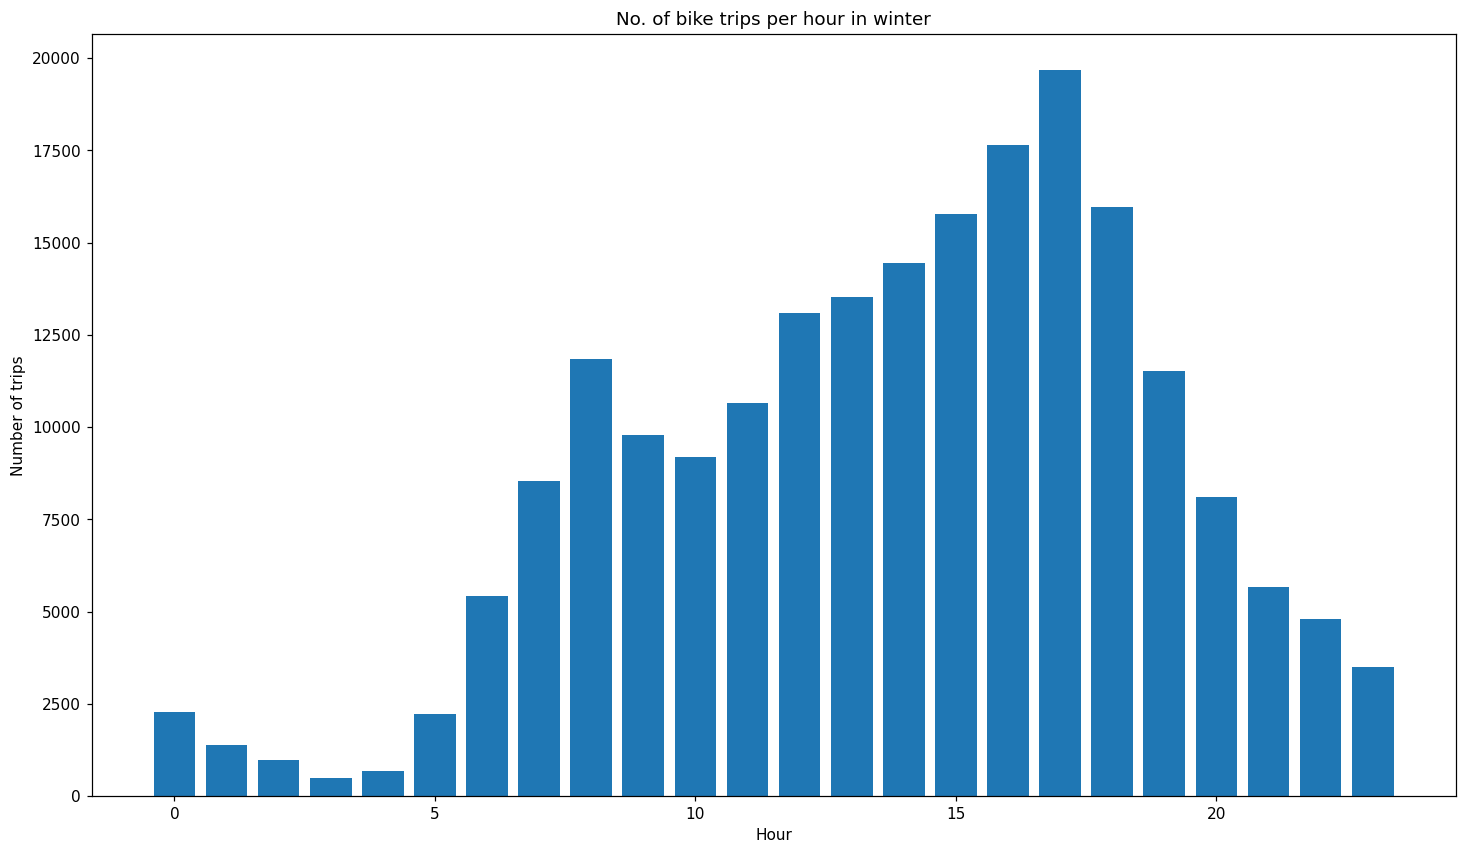

In [24]:
# Usage per hour winter
hour = Phil_winter.groupby(['Hour_s'])['trip_id'].nunique()
fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
ax.bar(hour.index, hour)
plt.title("No. of bike trips per hour in winter")
plt.xlabel("Hour")
plt.ylabel("Number of trips")

fig.savefig("bike_trips_per_hour_winter.jpg")
plt.show()

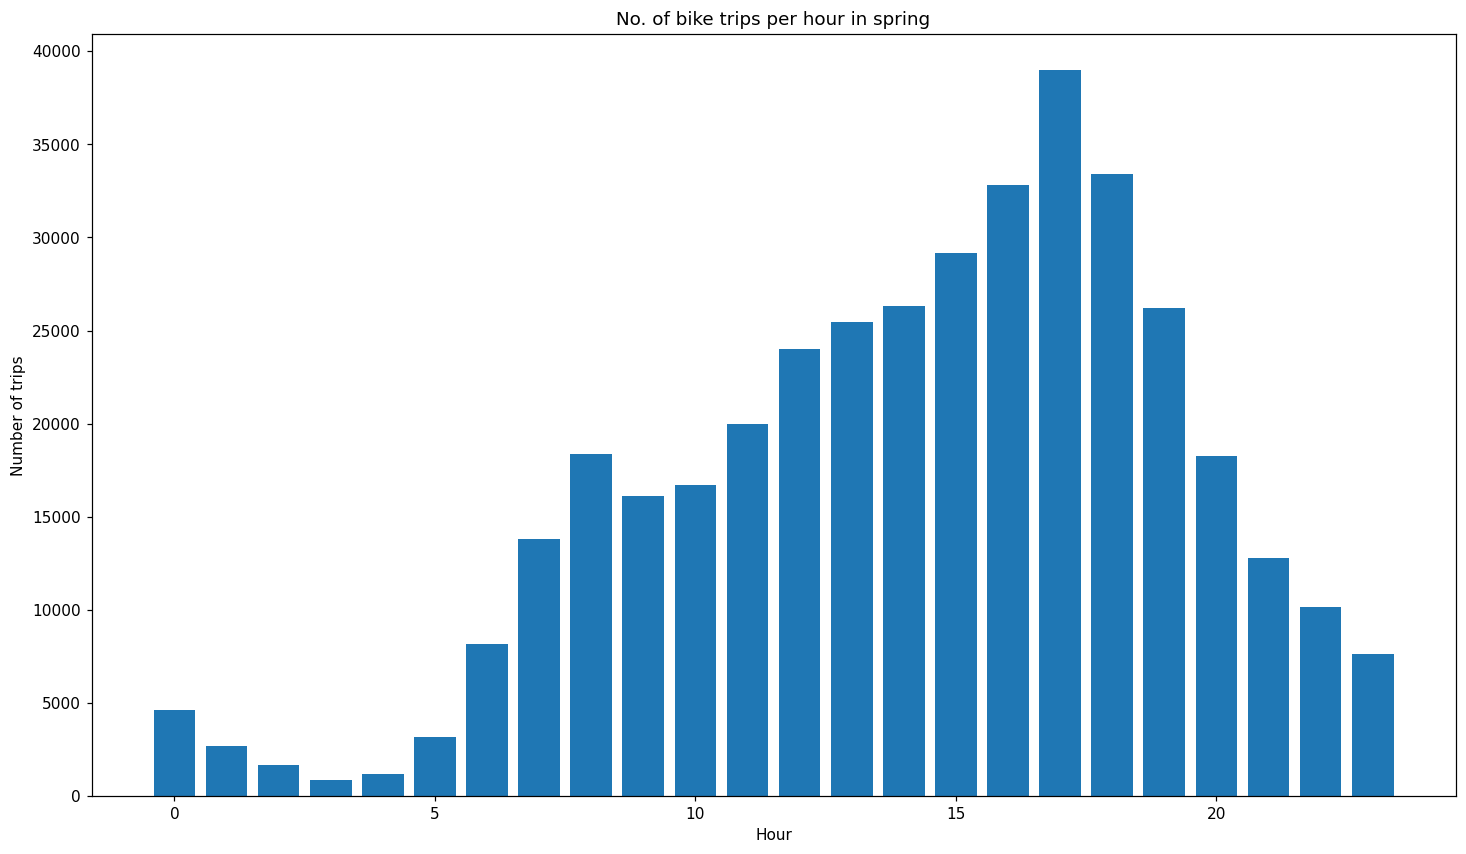

In [25]:
# Usage per hour spring
hour = Phil_spring.groupby(['Hour_s'])['trip_id'].nunique()
fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
ax.bar(hour.index, hour)
plt.title("No. of bike trips per hour in spring")
plt.xlabel("Hour")
plt.ylabel("Number of trips")

fig.savefig("bike_trips_per_hour_spring.jpg")
plt.show()

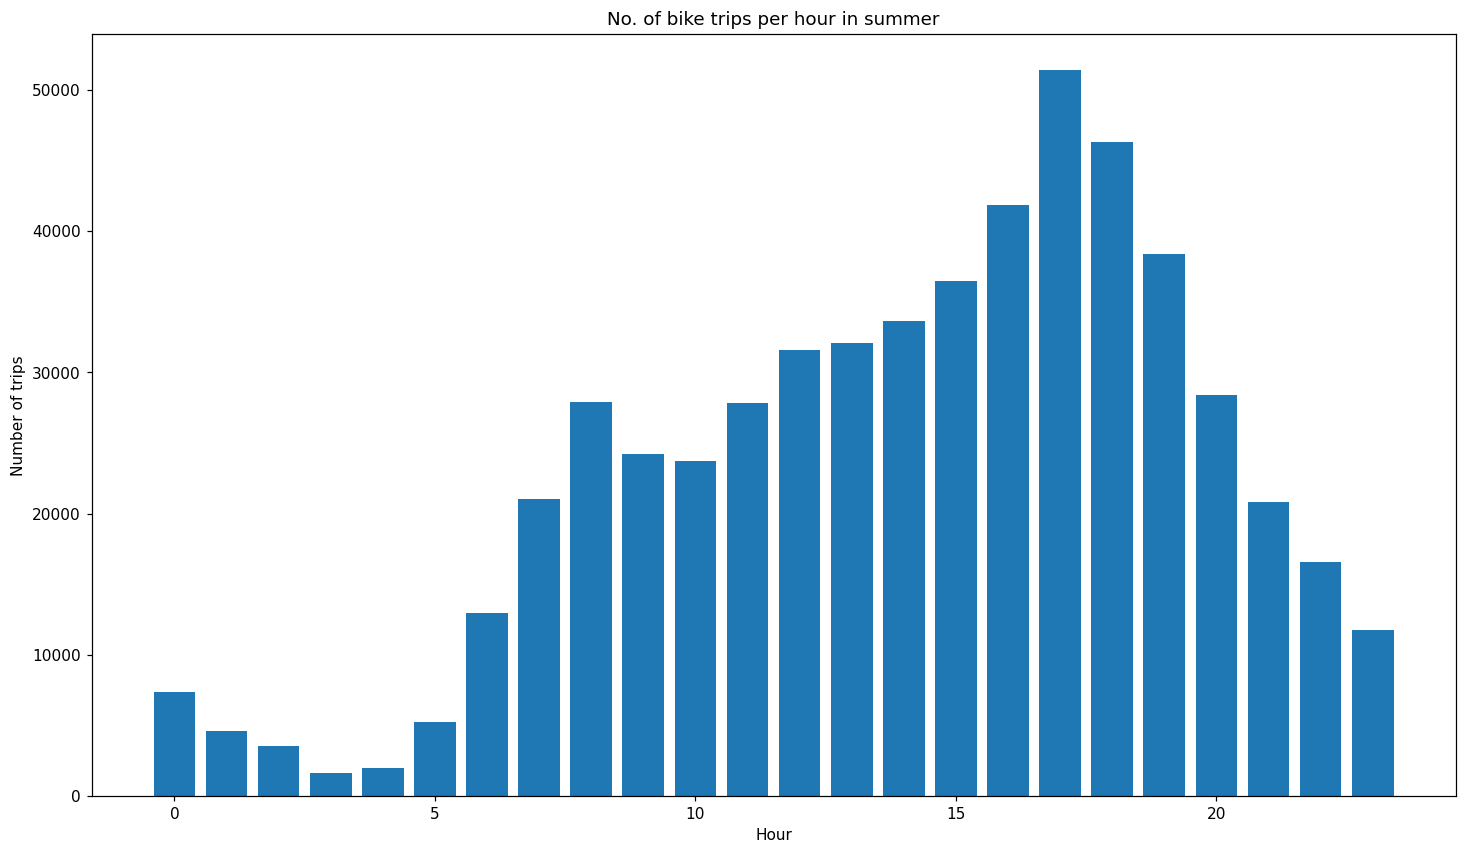

In [26]:
# Usage per hour summer
hour = Phil_summer.groupby(['Hour_s'])['trip_id'].nunique()
fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
ax.bar(hour.index, hour)
plt.title("No. of bike trips per hour in summer")
plt.xlabel("Hour")
plt.ylabel("Number of trips")

fig.savefig("bike_trips_per_hour_summer.jpg")
plt.show()

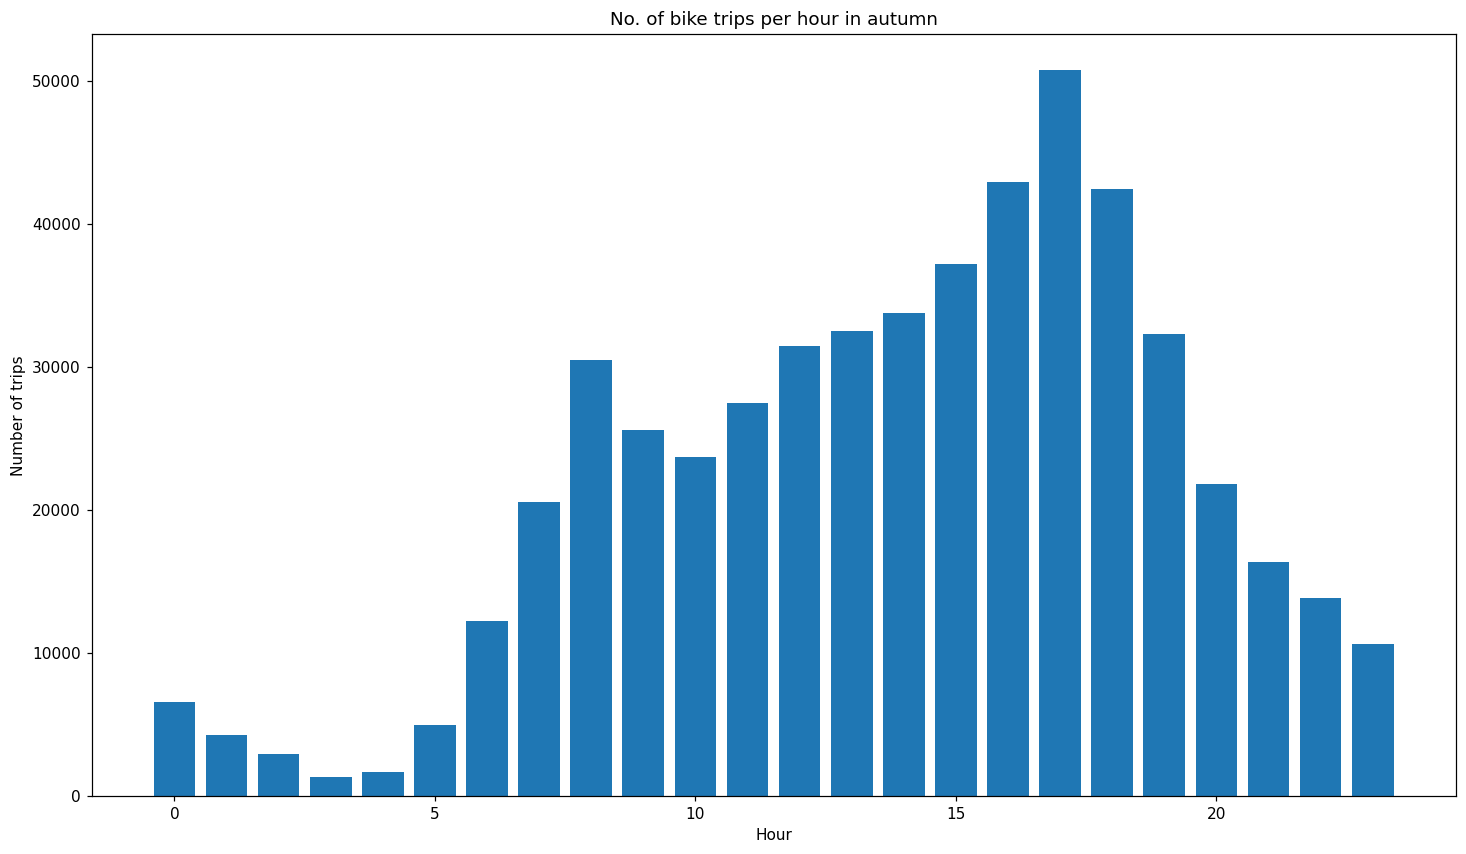

In [27]:
# Usage per hour autumn
hour = Phil_autumn.groupby(['Hour_s'])['trip_id'].nunique()
fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
ax.bar(hour.index, hour)
plt.title("No. of bike trips per hour in autumn")
plt.xlabel("Hour")
plt.ylabel("Number of trips")

fig.savefig("bike_trips_per_hour_autumn.jpg")
plt.show()

As we can see each season is uniformly distributed. 
In this case we should schedule maintenance to seasons winter and spring because in this two seasons we have 207215 trips for winter and 392691 trips for spring. In the months of summer there are 551450 trips and in autumn are 527794 trips.


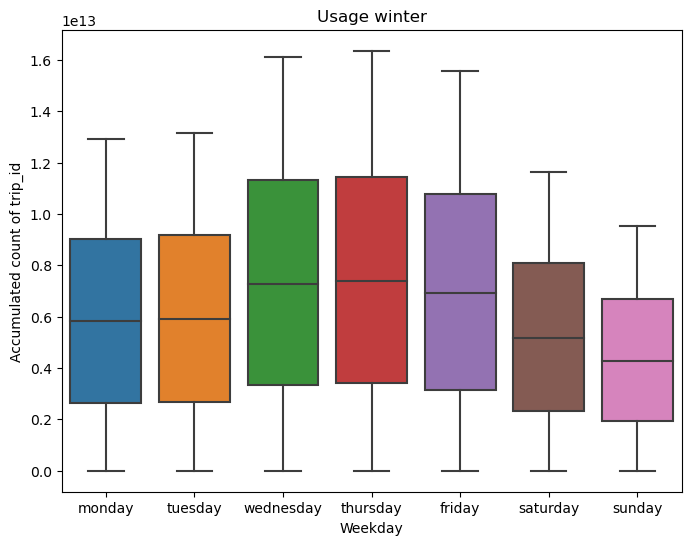

In [28]:
#boxplot of accumulated usage of bikes in winter
Phil_winter_bp = Phil_winter.groupby("Weekday_s")["trip_id"].cumsum()

plt.figure(figsize=(8, 6))
sns.boxplot(x=Phil_winter["Weekday_s"], y=Phil_winter_bp)
plt.xlabel("Weekday")
plt.ylabel("Accumulated count of trip_id")
plt.title("Usage winter")
plt.xticks(ticks=range(7), labels=["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"])

plt.savefig("accumulated_usage_winter_boxplot.jpg")
plt.show()

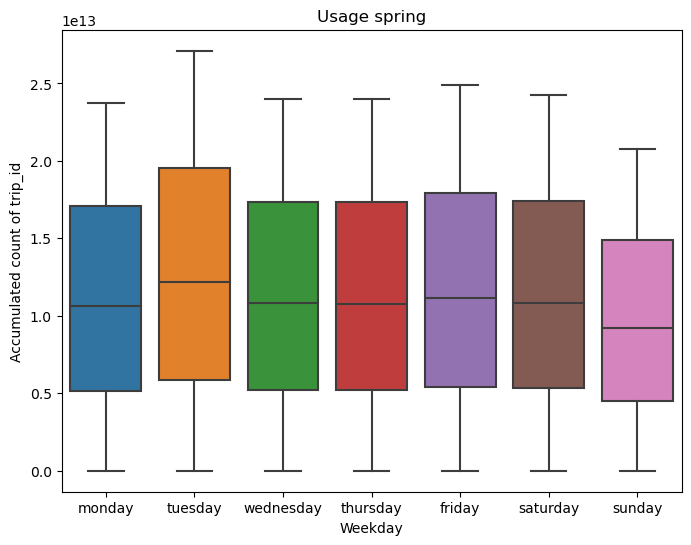

In [29]:
Phil_spring_bp = Phil_spring.groupby("Weekday_s")["trip_id"].cumsum()

plt.figure(figsize=(8, 6))
sns.boxplot(x=Phil_spring["Weekday_s"], y=Phil_spring_bp)
plt.xlabel("Weekday")
plt.ylabel("Accumulated count of trip_id")
plt.title("Usage spring")
plt.xticks(ticks=range(7), labels=["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"])

plt.savefig("accumulated_usage_spring_boxplot.jpg")
plt.show()

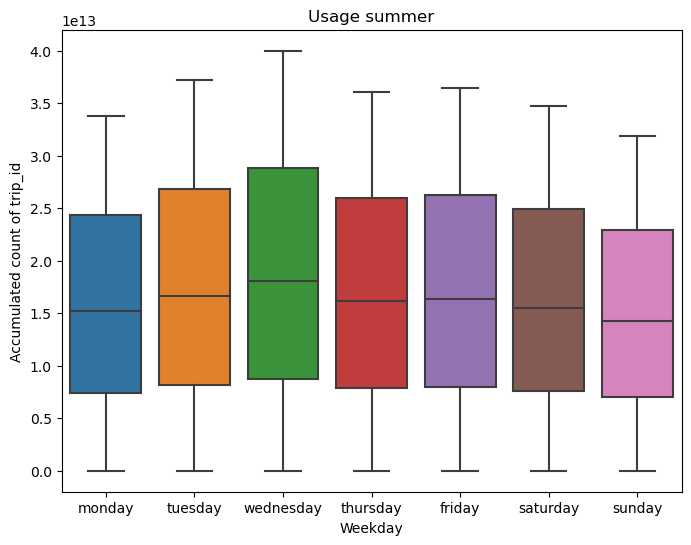

In [30]:
Phil_summer_bp = Phil_summer.groupby("Weekday_s")["trip_id"].cumsum()

plt.figure(figsize=(8, 6))
sns.boxplot(x=Phil_summer["Weekday_s"], y=Phil_summer_bp)
plt.xlabel("Weekday")
plt.ylabel("Accumulated count of trip_id")
plt.title("Usage summer")
plt.xticks(ticks=range(7), labels=["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"])

plt.savefig("accumulated_usage_summer_boxplot.jpg")
plt.show()

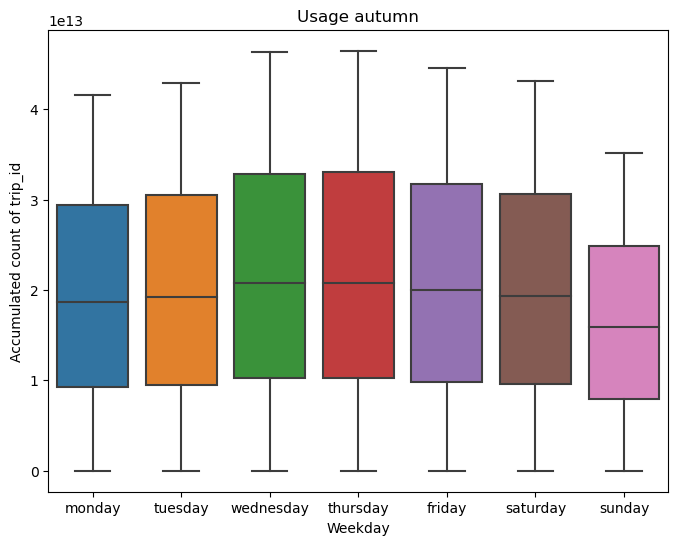

In [31]:
Phil_autumn_bp = Phil_autumn.groupby("Weekday_s")["trip_id"].cumsum()

plt.figure(figsize=(8, 6))
sns.boxplot(x=Phil_autumn["Weekday_s"], y=Phil_autumn_bp)
plt.xlabel("Weekday")
plt.ylabel("Accumulated count of trip_id")
plt.title("Usage autumn")
plt.xticks(ticks=range(7), labels=["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"])

plt.savefig("accumulated_usage_autumn_boxplot.jpg")
plt.show()

In [58]:
#first date for each start station
first_start_station_date = Phil.groupby('start_station')['Date_e'].first().reset_index()
first_start_station_list = first_start_station_date.values.tolist()
first_start_station_date = first_start_station_date.sort_values('Date_e')
first_start_station_date.reset_index(drop=True, inplace=True)

#pd.set_option('display.max_rows', len(first_start_station_date)) #show all rows

first_start_station_date.head() # len(first_start_station_date)

start_station      Date_e
0           3004  2021-01-01
1           3153  2021-01-01
2           3213  2021-01-01
3           3150  2021-01-01
4           3125  2021-01-01

In [68]:
#days of usage for each station
end_date = pd.to_datetime("2022-12-31")
first_start_station_date["days_of_usage"] = (end_date - pd.to_datetime(first_start_station_date['Date_e'])).dt.days

print(first_start_station_date)

     start_station      Date_e  days_of_usage
0             3004  2021-01-01            729
1             3153  2021-01-01            729
2             3213  2021-01-01            729
3             3150  2021-01-01            729
4             3125  2021-01-01            729
5             3124  2021-01-01            729
6             3121  2021-01-01            729
7             3120  2021-01-01            729
8             3119  2021-01-01            729
9             3118  2021-01-01            729
10            3117  2021-01-01            729
11            3116  2021-01-01            729
12            3115  2021-01-01            729
13            3114  2021-01-01            729
14            3112  2021-01-01            729
15            3108  2021-01-01            729
16            3107  2021-01-01            729
17            3106  2021-01-01            729
18            3104  2021-01-01            729
19            3102  2021-01-01            729
20            3101  2021-01-01    

In [70]:
# average usage per day for each station to the number of usage days

average_usage_per_day = {}
for start_station, count in start_counter.items():
    days_of_usage = first_start_station_date[first_start_station_date['start_station'] == start_station]['days_of_usage'].values[0]
    average_usage_per_day[start_station] = count / days_of_usage
    
sorted_average_usage_per_day = sorted(average_usage_per_day.items(), key=lambda x: x[1])

for start_station, average_usage in sorted_average_usage_per_day:
    print(f"start_station {start_station}: average daily usage {average_usage}")


start_station 3284: average daily usage 0.835820895522388
start_station 3282: average daily usage 0.8711656441717791
start_station 3298: average daily usage 0.9777777777777777
start_station 3096: average daily usage 1.151098901098901
start_station 3280: average daily usage 1.2339181286549707
start_station 3214: average daily usage 1.3813443072702332
start_station 3240: average daily usage 1.3953068592057762
start_station 3278: average daily usage 1.4702702702702704
start_station 3281: average daily usage 1.4871794871794872
start_station 3291: average daily usage 1.5172413793103448
start_station 3196: average daily usage 1.5349794238683128
start_station 3243: average daily usage 1.7190388170055453
start_station 3277: average daily usage 1.9047619047619047
start_station 3247: average daily usage 1.9220532319391634
start_station 3093: average daily usage 1.940934065934066
start_station 3181: average daily usage 1.967032967032967
start_station 3300: average daily usage 2.0
start_station 31

In [82]:
# map with average daily usage

average_usage_df = pd.DataFrame.from_dict(average_usage_per_day, orient="index", columns=["Average_daily_usage"])
average_usage_df.reset_index(inplace=True)
average_usage_df.rename(columns={"index": "start_station"}, inplace=True)

map5 = folium.Map(location=[39.95, -75.14], zoom_start=12)

color_palette = ['darkred', 'red', 'lightred', 'white', 'lightblue', 'blue', 'darkblue']

for start_coordinates, start_station in unique_coordinates:
    lat, lon = start_coordinates.split(",")
    lat = float(lat)
    lon = float(lon)
    
    average_usage = average_usage_df.loc[average_usage_df["start_station"] == start_station, "Average_daily_usage"].values[0]
    
    color_index = min(int(average_usage / 5), len(color_palette) - 1)
    marker_color = color_palette[color_index]
    
    popup_message = f"Station: {start_station}<br>Average Daily Usage: {average_usage}"
    
    folium.Marker(location=[lat, lon],
                  popup=popup_message,
                  icon=folium.Icon(color=marker_color)
                 ).add_to(map5)
map5

dark red lowest value to dark blue highest value 
dark red: 0 - 2.49
red 2.5 - 7.49
light red 7.5 - 12.49
white 12.5 - 17.49
lightblue 17.5 - 22.49
blue 22.5 - 27.49
darkblue 27.5+

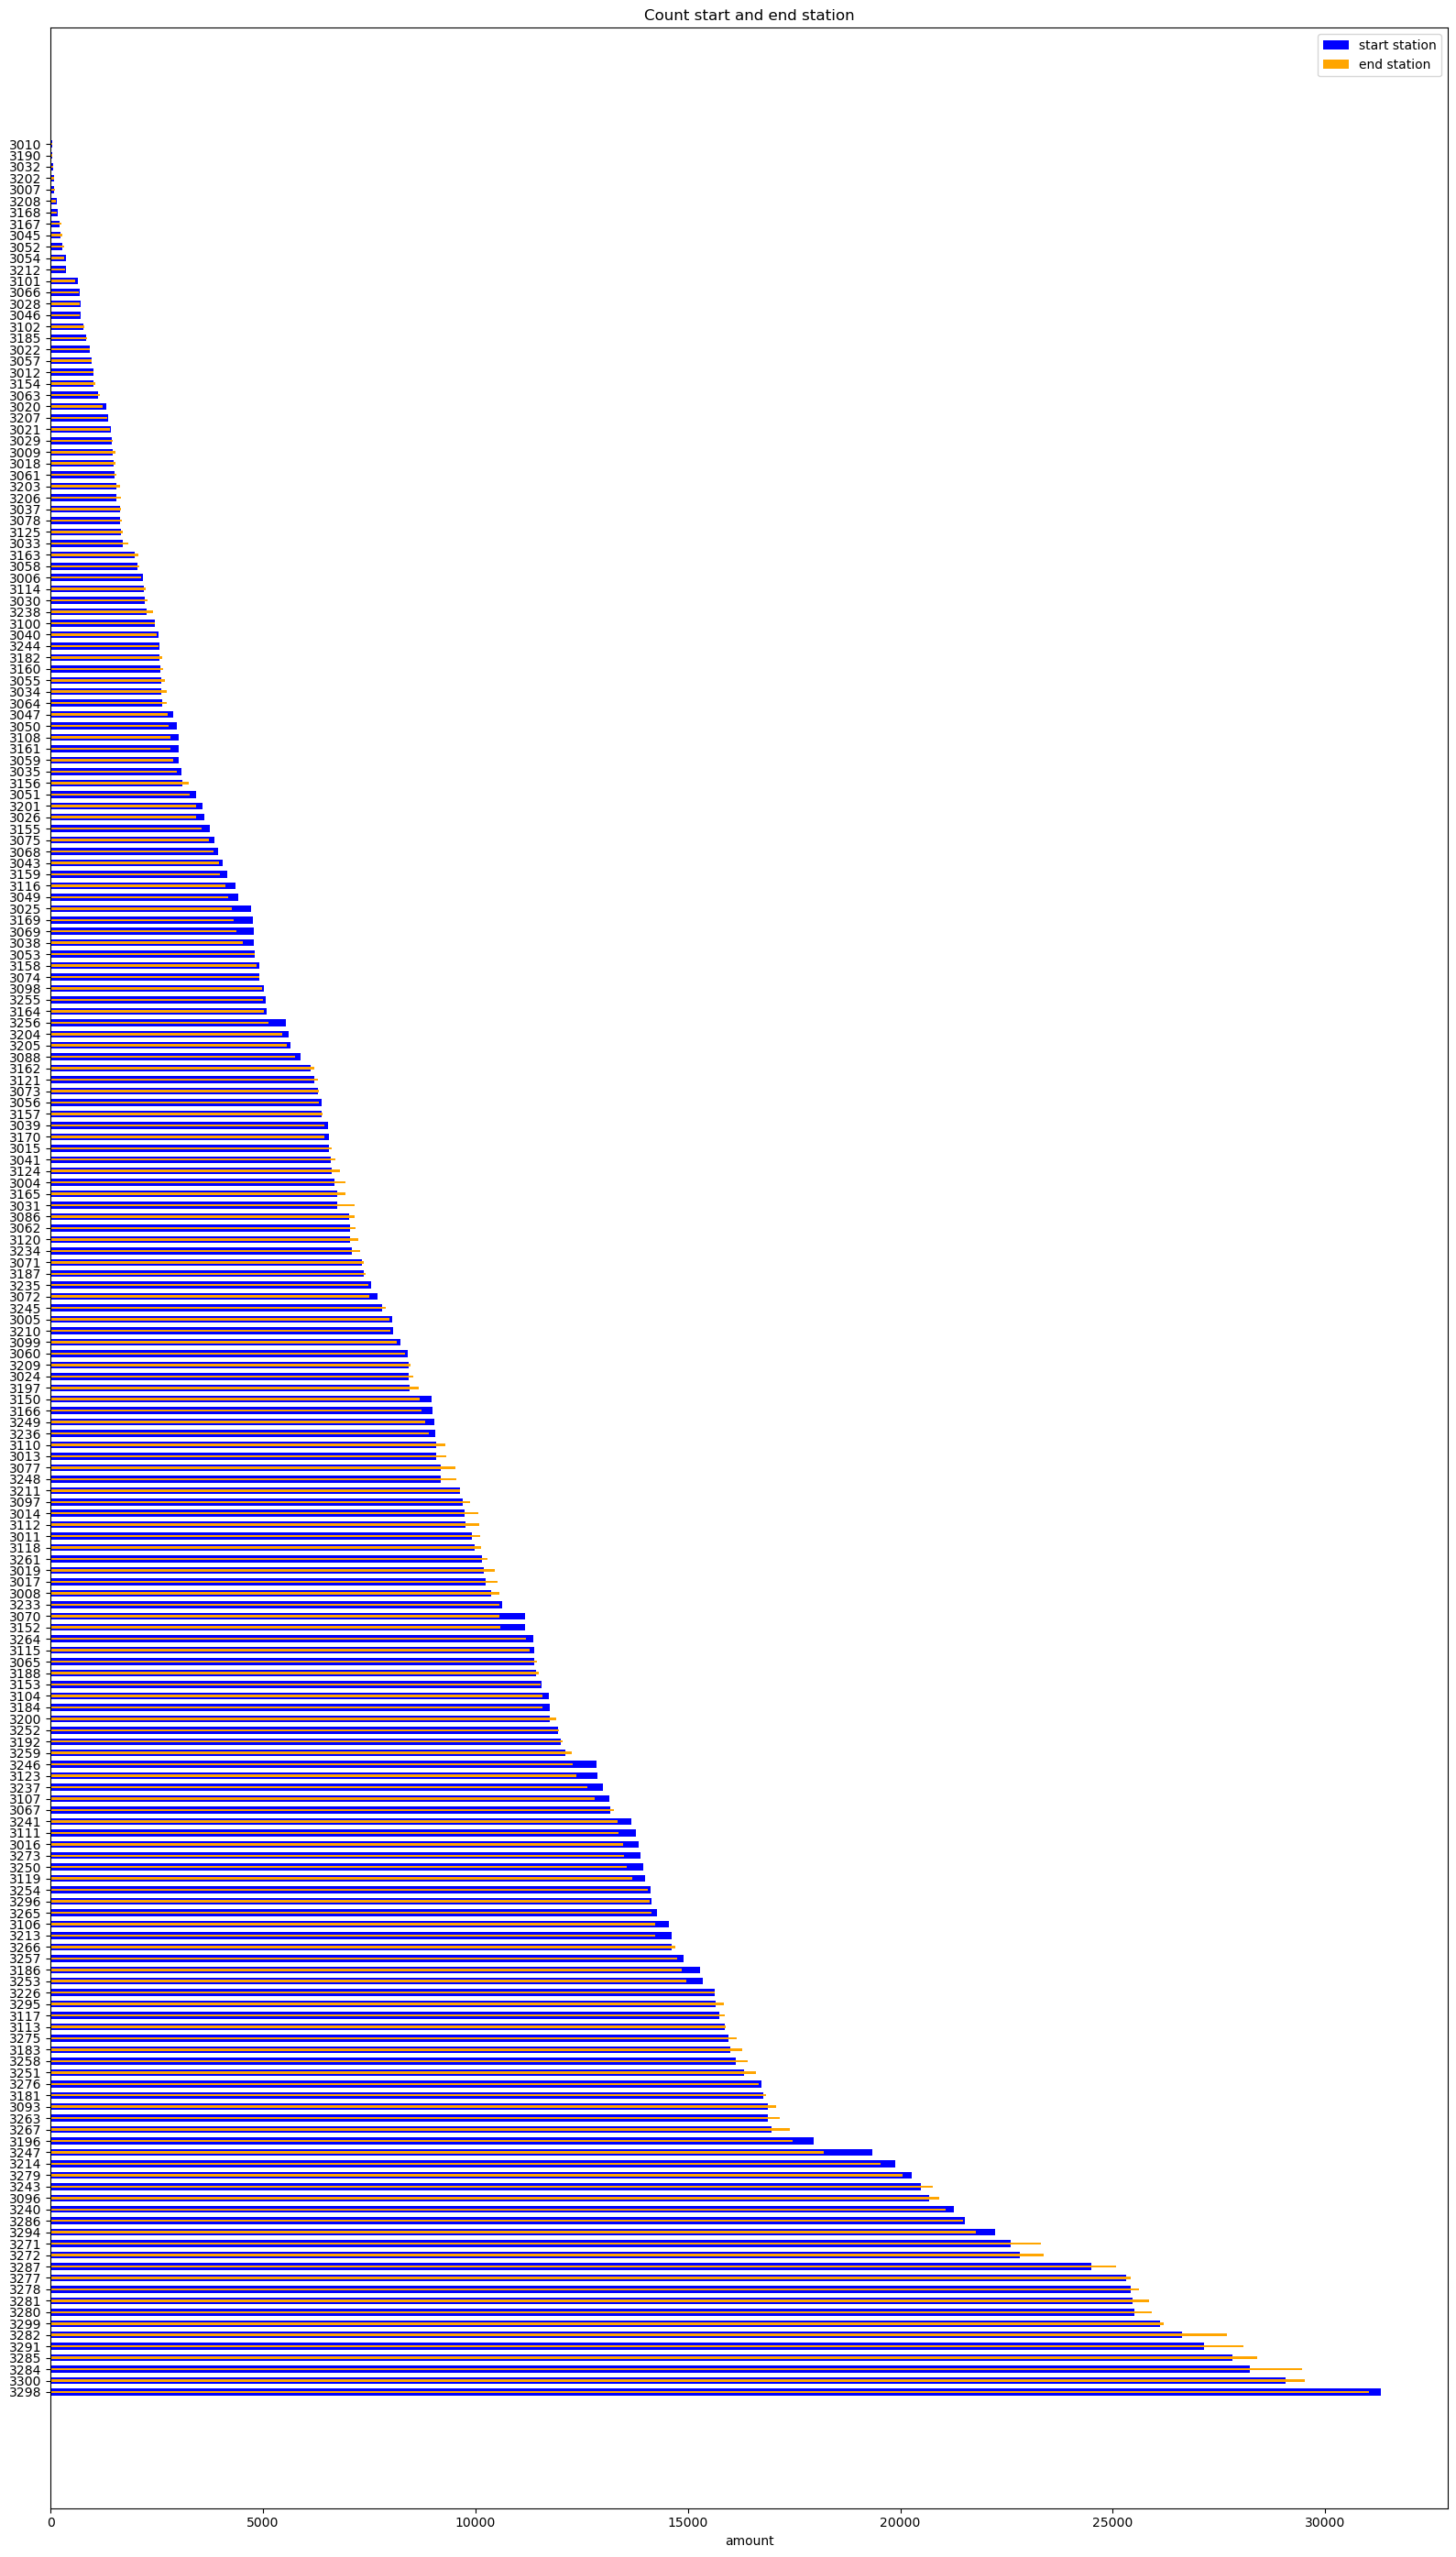

In [32]:


start_counter = Counter(Phil['start_station'])
start_counter_list = list(start_counter.items())
start_counter_list.sort(key=lambda x: x[1], reverse=True)

start_stations = [item[0] for item in start_counter_list]
start_counts = [item[1] for item in start_counter_list]

end_counter = Counter(Phil['end_station'])
end_counter_list = list(end_counter.items())
end_counter_list.sort(key=lambda x: x[1], reverse=True)

end_stations = [item[0] for item in end_counter_list]
end_counts = [item[1] for item in end_counter_list] 

fig, ax = plt.subplots(figsize=(16, 28))
bar_width = 0.6

start_bar = ax.barh(range(len(start_stations)), start_counts, bar_width, align='center', color='blue', label='start station')
end_bar = ax.barh(range(len(end_stations)), end_counts, bar_width/3, align='center', color='orange', label='end station')

ax.set_yticks(range(len(start_stations)))
ax.set_yticklabels(start_stations[::-1])  # Reverse the order of start stations for better readability

ax.axvline(x=0, color='black', linewidth=0.5)  # Add a vertical line at x=0

ax.set_xlabel('amount')
ax.set_title('Count start and end station')

ax.legend()

plt.tight_layout()
plt.show()


# Now we are going to see if there is a relationship between the weather and the demand...

Technological advances and environmental concerns have contributed to this development.However, with the growth of these systems, companies have the need to meet the increasing demand. Therefore, operating companies are always are always exploring the right tools for flow prediction.

In [2]:
import pandas as pd
df=pd.read_csv("phil_weathermerged.csv")
df
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns


from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
#import timeit

In [4]:
phil = pd.read_csv("phil_weathermerged.csv")
phil.count()
# we have merged in the same table phil and weather data 

Unnamed: 0                 1010733
starttime_weather          1010733
trip_id                    1010733
duration                   1010733
start_time                 1010733
end_time                   1010733
start_station              1010733
end_station                1010733
bike_id                    1010733
plan_duration              1010733
trip_route_category        1010733
passholder_type            1010733
bike_type                  1010733
Date_s                     1010733
Weekday_s                  1010733
Hour_s                     1010733
Date_e                     1010733
Weekday_e                  1010733
Hour_e                     1010733
start_coordinates          1010733
end_coordinates            1010733
start_time_weather         1010733
temperature                1010733
cloud_cover                1010733
cloud_cover_description    1010733
pressure                   1010733
windspeed                  1010733
precipitation              1010733
felt_temperature    

In [5]:
phil

Unnamed: 0    starttime_weather    trip_id  duration  \
0                 0  2021-01-01 02:00:00  365186730        11   
1                 1  2021-01-01 02:00:00  365186730        11   
2                 2  2021-01-01 02:00:00  365186730        11   
3                 3  2021-01-01 02:00:00  365186730        11   
4                 4  2021-01-01 02:00:00  365186730        11   
...             ...                  ...        ...       ...   
1010728     1010728  2021-01-16 13:00:00  366031436        14   
1010729     1010729  2021-01-16 13:00:00  366031436        14   
1010730     1010730  2021-01-16 13:00:00  366031436        14   
1010731     1010731  2021-01-16 13:00:00  366031436        14   
1010732     1010732  2021-01-16 13:00:00  366031436        14   

                  start_time             end_time  start_station  end_station  \
0        2021-01-01 02:20:00  2021-01-01 02:31:00           3124         3069   
1        2021-01-01 02:20:00  2021-01-01 02:31:00           3124         3069   
2        2021-01-01 02:20:00  2021-01-01 02:31:00           3124         3069   
3        2021-01-01 02:20:00  2021-01-01 02:31:00           3124         3069   
4        2021-01-01 02:20:00  2021-01-01 02:31:00           3124         3069   
...                      ...                  ...            ...          ...   
1010728  2021-01-16 13:59:00  2021-01-16 14:13:00           3066         3046   
1010729  2021-01-16 13:59:00  2021-01-16 14:13:00           3066         3046   
1010730  2021-01-16 13:59:00  2021-01-16 14:13:00           3066         3046   
1010731  2021-01-16 13:59:00  2021-01-16 14:13:00           3066         3046   
1010732  2021-01-16 13:59:00  2021-01-16 14:13:00           3066         3046   

         bike_id  plan_duration  ...    start_coordinates  \
0           3640             30  ...  39.953651,-75.14045   
1           3640             30  ...  39.953651,-75.14045   
2           3640             30  ...  39.953651,-75.14045   
3           3640             30  ...  39.953651,-75.14045   
4           3640             30  ...  39.953651,-75.14045   
...          ...            ...  ...                  ...   
1010728    11833            365  ...  39.94561,-75.173477   
1010729    11833            365  ...  39.94561,-75.173477   
1010730    11833            365  ...  39.94561,-75.173477   
1010731    11833            365  ...  39.94561,-75.173477   
1010732    11833            365  ...  39.94561,-75.173477   

              end_coordinates   start_time_weather temperature  cloud_cover  \
0        39.937038,-75.150383  2021-01-01 00:54:00         5.0         26.0   
1        39.937038,-75.150383  2021-01-01 01:54:00         4.0         26.0   
2        39.937038,-75.150383  2021-01-01 02:54:00         3.0         29.0   
3        39.937038,-75.150383  2021-01-01 03:54:00         2.0         27.0   
4        39.937038,-75.150383  2021-01-01 04:54:00         2.0         33.0   
...                       ...                  ...         ...          ...   
1010728  39.950119,-75.144722  2022-09-09 19:54:00        29.0         30.0   
1010729  39.950119,-75.144722  2022-09-09 20:54:00        28.0         34.0   
1010730  39.950119,-75.144722  2022-09-09 21:54:00        28.0         34.0   
1010731  39.950119,-75.144722  2022-09-09 22:54:00        26.0         34.0   
1010732  39.950119,-75.144722  2022-09-09 23:54:00        23.0         33.0   

         cloud_cover_description pressure  windspeed  precipitation  \
0                         Cloudy  1027.19       11.0            0.0   
1                         Cloudy  1028.20       19.0            0.0   
2                  Partly Cloudy  1028.88       20.0            0.0   
3                  Mostly Cloudy  1029.90       17.0            0.0   
4                           Fair  1029.90       13.0            0.0   
...                          ...      ...        ...            ...   
1010728            Partly Cloudy  1017.37       11.0            0.0   
10107

In [6]:
# drop the column we don't need
phil.drop('Unnamed: 0',axis=1, inplace=True)
phil

starttime_weather    trip_id  duration           start_time  \
0        2021-01-01 02:00:00  365186730        11  2021-01-01 02:20:00   
1        2021-01-01 02:00:00  365186730        11  2021-01-01 02:20:00   
2        2021-01-01 02:00:00  365186730        11  2021-01-01 02:20:00   
3        2021-01-01 02:00:00  365186730        11  2021-01-01 02:20:00   
4        2021-01-01 02:00:00  365186730        11  2021-01-01 02:20:00   
...                      ...        ...       ...                  ...   
1010728  2021-01-16 13:00:00  366031436        14  2021-01-16 13:59:00   
1010729  2021-01-16 13:00:00  366031436        14  2021-01-16 13:59:00   
1010730  2021-01-16 13:00:00  366031436        14  2021-01-16 13:59:00   
1010731  2021-01-16 13:00:00  366031436        14  2021-01-16 13:59:00   
1010732  2021-01-16 13:00:00  366031436        14  2021-01-16 13:59:00   

                    end_time  start_station  end_station  bike_id  \
0        2021-01-01 02:31:00           3124         3069     3640   
1        2021-01-01 02:31:00           3124         3069     3640   
2        2021-01-01 02:31:00           3124         3069     3640   
3        2021-01-01 02:31:00           3124         3069     3640   
4        2021-01-01 02:31:00           3124         3069     3640   
...                      ...            ...          ...      ...   
1010728  2021-01-16 14:13:00           3066         3046    11833   
1010729  2021-01-16 14:13:00           3066         3046    11833   
1010730  2021-01-16 14:13:00           3066         3046    11833   
1010731  2021-01-16 14:13:00           3066         3046    11833   
1010732  2021-01-16 14:13:00           3066         3046    11833   

         plan_duration trip_route_category  ...    start_coordinates  \
0                   30             One Way  ...  39.953651,-75.14045   
1                   30             One Way  ...  39.953651,-75.14045   
2                   30             One Way  ...  39.953651,-75.14045   
3                   30             One Way  ...  39.953651,-75.14045   
4                   30             One Way  ...  39.953651,-75.14045   
...                ...                 ...  ...                  ...   
1010728            365             One Way  ...  39.94561,-75.173477   
1010729            365             One Way  ...  39.94561,-75.173477   
1010730            365             One Way  ...  39.94561,-75.173477   
1010731            365             One Way  ...  39.94561,-75.173477   
1010732            365             One Way  ...  39.94561,-75.173477   

              end_coordinates   start_time_weather  temperature  cloud_cover  \
0        39.937038,-75.150383  2021-01-01 00:54:00          5.0         26.0   
1        39.937038,-75.150383  2021-01-01 01:54:00          4.0         26.0   
2        39.937038,-75.150383  2021-01-01 02:54:00          3.0         29.0   
3        39.937038,-75.150383  2021-01-01 03:54:00          2.0         27.0   
4        39.937038,-75.150383  2021-01-01 04:54:00          2.0         33.0   
...                       ...                  ...          ...          ...   
1010728  39.950119,-75.144722  2022-09-09 19:54:00         29.0         30.0   
1010729  39.950119,-75.144722  2022-09-09 20:54:00         28.0         34.0   
1010730  39.950119,-75.144722  2022-09-09 21:54:00         28.0         34.0   
1010731  39.950119,-75.144722  2022-09-09 22:54:00         26.0         34.0   
1010732  39.950119,-75.144722  2022-09-09 23:54:00         23.0         33.0   

        cloud_cover_description  pressure  windspeed precipitation  \
0                        Cloudy   1027.19       11.0           0.0   
1                        Cloudy   1028.20       19.0           0.0   
2                 Partly Cloudy   1028.88       20.0           0.0   
3                 Mostly Cloudy   1029.90       17.0           0.0   
4                          Fair   1029.90       13.0           0.0   
...                         ...       ...      

## Graphics showing the rides according to the temperature

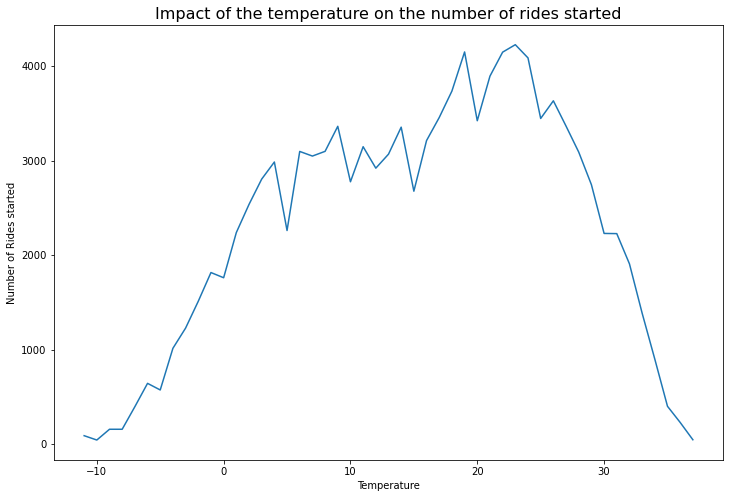

In [8]:
phil_Date_avail = phil.groupby("temperature")["start_time"].nunique() 

fig,ax = plt.subplots(figsize=(12,8)) 

ax.plot(phil_Date_avail)
ax.set_title("Impact of the temperature on the number of rides started",fontsize=16)
ax.set_xlabel("Temperature")
ax.set_ylabel("Number of Rides started")

plt.show()
fig.savefig("temperatureImpactOnRides.pdf")

# less rides in negative and low temperatures  and increase in 5 degrees to decrease again in 15 degrees and 
##when it begin to be too hot the rides decrease significantly

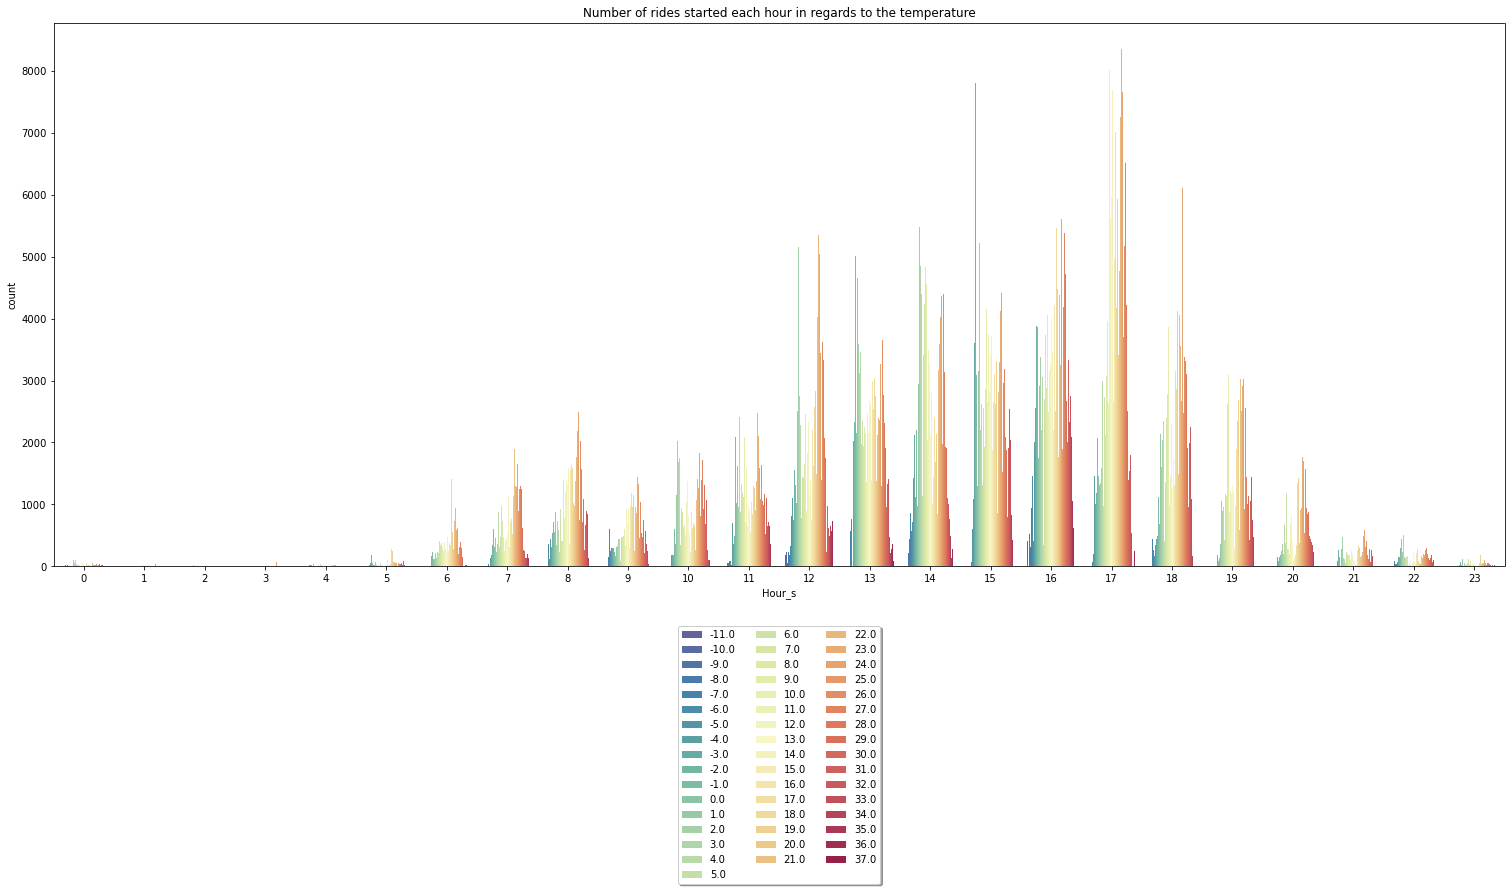

In [10]:
#more detailed graph of the use of the bike seeing the temperature in the day
fig = plt.figure(figsize=(26,10))

sns.countplot(x = 'Hour_s', hue = 'temperature', data = phil, palette = 'Spectral_r')
plt.title('Number of rides started each hour in regards to the temperature')

plt.legend(loc = 'upper center', bbox_to_anchor = (0.5,-0.1), ncol = 3, fancybox = True, shadow = True)
plt.show(block=True);
plt.show()

fig.savefig("UsageOfBikesWithTemperatures.pdf")

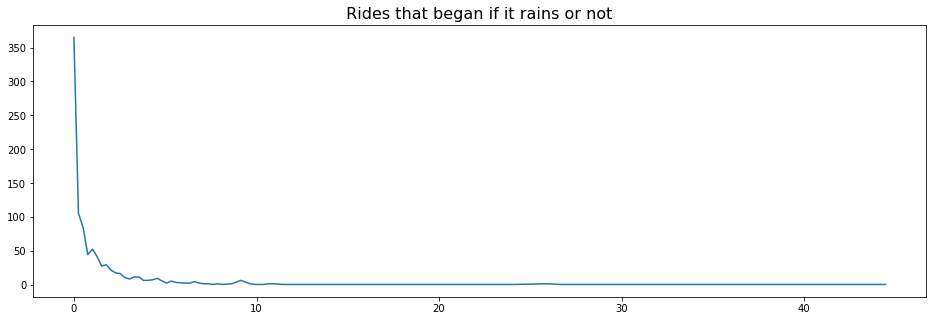

In [14]:
phil_Date_avail = phil.groupby("precipitation")["starttime_weather"].nunique() 

fig,ax = plt.subplots(figsize=(16,5)) 

ax.plot(phil_Date_avail)
ax.set_title(" Rides that began if it rains or not ",fontsize=16)

plt.show()

# less rides when it rains 

## Amount of rides depending on the temperature...

In [22]:
#demand: very low temperatures no much rides -higher temperature more rides
demand = phil.groupby(['temperature']).starttime_weather.count().reset_index(name = "Rides")
demand

temperature  Rides
0         -11.0    593
1         -10.0    236
2          -9.0    852
3          -8.0   1040
4          -7.0   3283
5          -6.0   4676
6          -5.0   3384
7          -4.0  10431
8          -3.0  14353
9          -2.0  21302
10         -1.0  23979
11          0.0  12582
12          1.0  25696
13          2.0  32201
14          3.0  24591
15          4.0  29469
16          5.0  10089
17          6.0  23986
18          7.0  24370
19          8.0  27314
20          9.0  34501
21         10.0  17158
22         11.0  31807
23         12.0  29260
24         13.0  27465
25         14.0  30608
26         15.0  13196
27         16.0  26859
28         17.0  30621
29         18.0  33413
30         19.0  36253
31         20.0  16343
32         21.0  37196
33         22.0  41463
34         23.0  45122
35         24.0  50062
36         25.0  20604
37         26.0  40025
38         27.0  37120
39         28.0  27349
40         29.0  22188
41         30.0  10289
42         31.0  17902
43         32.0  16408
44         33.0  11434
45         34.0   6327
46         35.0   2974
47         36.0   2267
48         37.0     92

At which temperature are the most rides registered?

In [23]:
print(demand[demand.Rides == demand.Rides.max()])

    temperature  Rides
35         24.0  50062


The peak demand seems to be at 24 degrees!

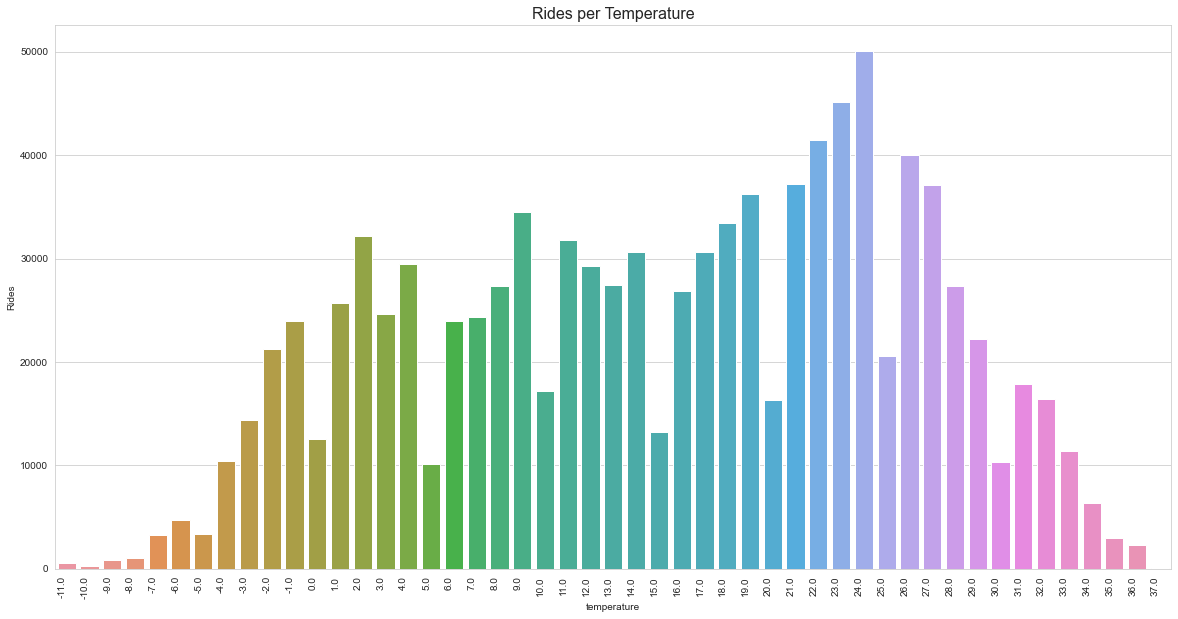

In [25]:
ig = plt.figure(figsize=(20,10))

sns.set_style("whitegrid")
plot = sns.barplot(data=demand, x = "temperature", y = "Rides" )

plot.set_title("Rides per Temperature",fontsize=16)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='right')

#plt.legend(loc = 'upper center', bbox_to_anchor = (0.5,-0.1), ncol = 3, fancybox = True, shadow = True)
plt.show(block=True);
fig.savefig("ridesPerTemperature.pdf")

## Amount of rides depending if it rains or no ...

In [27]:
#rides with the rain 
# precip =1 it rains 
# precip= 0 doesn't rain

demand2 = phil.groupby(['precipitation']).starttime_weather.count().reset_index(name = "Rides")
demand2

precipitation   Rides
0            0.00  948169
1            0.25   17178
2            0.51   11632
3            0.76    4911
4            1.02    4308
5            1.27    3489
6            1.52    2665
7            1.78    2949
8            2.03    1813
9            2.29    1141
10           2.54    1151
11           2.79    1034
12           3.05     775
13           3.30     922
14           3.56     691
15           3.81     610
16           4.06     566
17           4.32     594
18           4.57     769
19           4.83     311
20           5.08     134
21           5.33     451
22           5.59     352
23           6.10     370
24           6.35     209
25           6.60     330
26           6.86     258
27           7.11      92
28           7.37     133
29           7.62      65
30           7.87     119
31           8.13     102
32           8.64      64
33           9.14     602
34           9.65     130
35           9.91      72
36          10.41      57
37          10.67      68
38          10.92     111
39          11.43      40
40          12.45      90
41          12.95      52
42          17.27     108
43          17.53      57
44          18.80      48
45          21.08      65
46          21.84     115
47          23.37      70
48          24.13      24
49          25.91     141
50          26.67      91
51          27.43      74
52          29.72     115
53          30.99     128
54          42.42      65
55          44.45      53

# Demand patterns and seasonality

Seasonal demand is a certain time series with repetitive or predictable patterns of demand, due to re-occurring seasonal events. These patterns can re-occur over days, weeks, months ... and can make it harder for businesses to forecast future demand trends

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns


from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
#import timeit

In [2]:
phil = pd.read_csv("cleaned_Phil.csv")
phil.count()

/Users/daiwei/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


trip_id                1678842
duration               1678842
start_time             1678842
end_time               1678842
start_station          1678842
end_station            1678842
bike_id                1678842
plan_duration          1678842
trip_route_category    1678842
passholder_type        1678842
bike_type              1678842
Date_s                 1678842
Weekday_s              1678842
Hour_s                 1678842
Date_e                 1678842
Weekday_e              1678842
Hour_e                 1678842
start_coordinates      1678842
end_coordinates        1678842
dtype: int64

In [3]:
phil.sort_values(["trip_id","Date_s"], inplace=True)
phil.set_index(pd.DatetimeIndex(phil["Date_s"]),inplace=True)
phil.drop("Date_s", axis=1, inplace=True)

In [4]:
phil.head()

trip_id  duration           start_time             end_time  \
Date_s                                                                      
2021-01-01  365184627         6  2021-01-01 00:52:00  2021-01-01 00:58:00   
2021-01-01  365184628         6  2021-01-01 00:50:00  2021-01-01 00:56:00   
2021-01-01  365184629         6  2021-01-01 00:49:00  2021-01-01 00:55:00   
2021-01-01  365184630        13  2021-01-01 00:37:00  2021-01-01 00:50:00   
2021-01-01  365184631         9  2021-01-01 00:13:00  2021-01-01 00:22:00   

            start_station  end_station bike_id  plan_duration  \
Date_s                                                          
2021-01-01           3039         3051   18838             30   
2021-01-01           3125         3028    2712             30   
2021-01-01           3125         3028   16576             30   
2021-01-01           3052         3040    3330             30   
2021-01-01           3045         3034   14683             30   

           trip_route_category passholder_type bike_type  Weekday_s  Hour_s  \
Date_s                                                                        
2021-01-01             One Way        Indego30  electric          4       0   
2021-01-01             One Way        Indego30  standard          4       0   
2021-01-01             One Way        Indego30  electric          4       0   
2021-01-01             One Way        Indego30  standard          4       0   
2021-01-01             One Way        Indego30  standard          4       0   

                Date_e  Weekday_e  Hour_e     start_coordinates  \
Date_s                                                            
2021-01-01  2021-01-01          4       0   39.97121,-75.159698   
2021-01-01  2021-01-01          4       0  39.943909,-75.167351   
2021-01-01  2021-01-01          4       0  39.943909,-75.167351   
2021-01-01  2021-01-01          4       0  39.947319,-75.156952   
2021-01-01  2021-01-01          4       0  39.947922,-75.162369   

                 end_coordinates  
Date_s                            
2021-01-01  39.967442,-75.175072  
2021-01-01  39.940609,-75.149582  
2021-01-01  39.940609,-75.149582  
2021-01-01  39.962891,-75.166061  
2021-01-01  39.933151,-75.162483

In [6]:
# Let's explore fleet size

fleet_size = len(phil["trip_id"].unique())

print("The fleet consists of {} trips (for the observed time frame)".format(fleet_size))

The fleet consists of 1678842 trips (for the observed time frame)


## Availability over time: month,days and hours

Now we are going to explore fleet availability in the week and day by checking how many unique bikes are available for each day and hour of day.

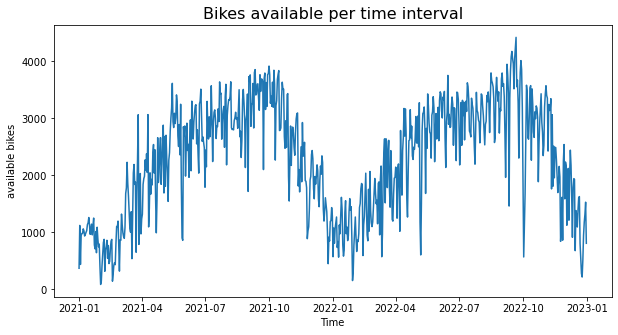

In [7]:
# Availability over months 

phil_Date_avail = phil.groupby("Date_s")["trip_id"].nunique() # this counts unique vehicles per 7-min time interval

fig,ax = plt.subplots(figsize=(10,5)) 

ax.plot(phil_Date_avail)
ax.set_title("Bikes available per time interval",fontsize=16)
ax.set_xlabel("Time")
ax.set_ylabel("available bikes")

fig.savefig("availableBikes.pdf")
plt.show()

In [8]:
# Availability by day of week (0 = Monday, 6 = Sunday)

phil_weekday_avail = phil.groupby(["Date_s","Weekday_s"])["trip_id"].nunique()
phil_weekday_avail = pd.DataFrame(phil_weekday_avail)

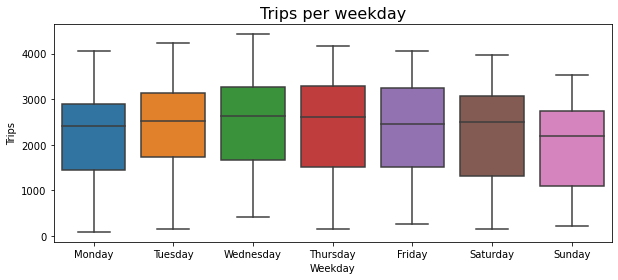

In [12]:
fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=phil_weekday_avail.index.get_level_values(1), y=phil_weekday_avail["trip_id"],ax=ax)

ax.set_title("Trips per weekday",fontsize=16)
ax.set_xlabel("Weekday")
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

ax.set_ylabel("Trips")

fig.savefig("TripsByWeekday.pdf")
plt.show()

In [14]:
# Availability by time of day 

phil_time_avail = phil.groupby(["Date_s","Hour_s"])["trip_id"].nunique()
phil_time_avail = pd.DataFrame(phil_time_avail)


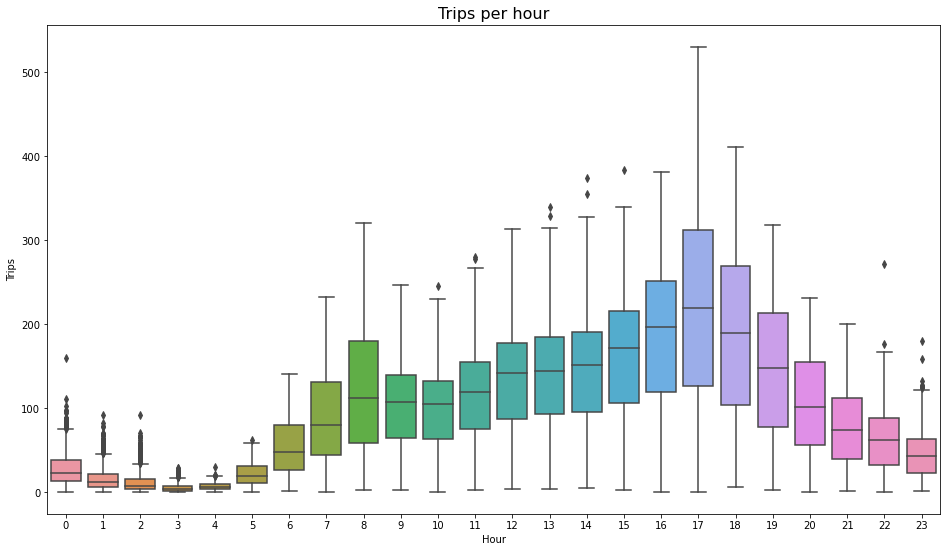

In [16]:
fig,ax = plt.subplots(figsize=(16,9)) 

sns.boxplot(x=phil_time_avail.index.get_level_values(1), y=phil_time_avail["trip_id"],ax=ax)

ax.set_title("Trips per hour",fontsize=16)
ax.set_xlabel("Hour")
ax.set_ylabel("Trips")

fig.savefig("TripsByHour.pdf")
plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
import glob

In [2]:
df_merged = pd.read_csv('merged_PhilWeather.csv', low_memory=False)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678842 entries, 0 to 1678841
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   trip_id              1678842 non-null  int64  
 1   duration             1678842 non-null  int64  
 2   start_time           1678842 non-null  object 
 3   end_time             1678842 non-null  object 
 4   start_station        1678842 non-null  int64  
 5   end_station          1678842 non-null  int64  
 6   bike_id              1678842 non-null  object 
 7   plan_duration        1678842 non-null  int64  
 8   trip_route_category  1678842 non-null  object 
 9   passholder_type      1678842 non-null  object 
 10  bike_type            1678842 non-null  object 
 11  Date_s               1678842 non-null  object 
 12  Weekday_s            1678842 non-null  int64  
 13  Hour_s               1678842 non-null  int64  
 14  Date_e               1678842 non-null  object 
 15

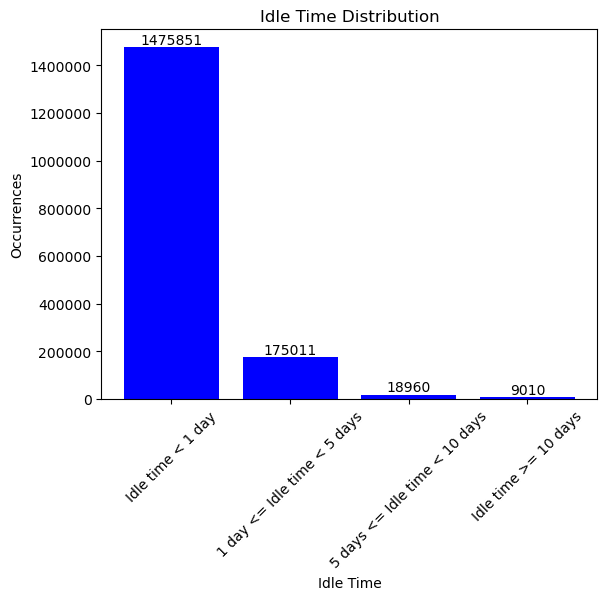

In [4]:
# Define the conditions for filtering
condition_1 = df_merged['idle_time_minutes'] < 1440
condition_2 = (df_merged['idle_time_minutes'] >= 1440) & (df_merged['idle_time_minutes'] < 7200)
condition_3 = (df_merged['idle_time_minutes'] >= 7200) & (df_merged['idle_time_minutes'] < 14400)
condition_4 = df_merged['idle_time_minutes'] >= 14400

# Apply the conditions and count the occurrences
count_1 = df_merged[condition_1].shape[0]
count_2 = df_merged[condition_2].shape[0]
count_3 = df_merged[condition_3].shape[0]
count_4 = df_merged[condition_4].shape[0]

categories = ['Idle time < 1 day', '1 day <= Idle time < 5 days', '5 days <= Idle time < 10 days', 'Idle time >= 10 days']
counts = [count_1, count_2, count_3, count_4]

plt.bar(categories, counts, color='b')
plt.xlabel('Idle Time')
plt.ylabel('Occurrences')
plt.title('Idle Time Distribution')
plt.xticks(rotation=45)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
for i, count in enumerate(counts):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')
plt.show()

In [6]:
merg['bike_id'].dtype

dtype('O')

In [10]:
merg[merg['bike_id'] == '3289']

trip_id  duration           start_time             end_time  \
127      365198537        11  2021-01-01 11:25:00  2021-01-01 11:36:00   
874      365258430         7  2021-01-02 14:25:00  2021-01-02 14:32:00   
1071     365261890        48  2021-01-02 15:49:00  2021-01-02 16:37:00   
2030     365361027         8  2021-01-04 08:15:00  2021-01-04 08:23:00   
2538     365373128         6  2021-01-04 16:37:00  2021-01-04 16:43:00   
...            ...       ...                  ...                  ...   
1668862  576921425        43  2022-12-20 19:49:00  2022-12-20 20:32:00   
1668929  576932650        40  2022-12-20 20:44:00  2022-12-20 21:24:00   
1668972  576932606        21  2022-12-20 21:25:00  2022-12-20 21:46:00   
1669261  577042144         7  2022-12-21 08:12:00  2022-12-21 08:19:00   
1674853  578797865        14  2022-12-28 17:25:00  2022-12-28 17:39:00   

         start_station  end_station bike_id  plan_duration  \
127               3116         3012    3289            365   
874               3012         3163    3289             30   
1071              3163         3163    3289              1   
2030              3163         3014    3289             30   
2538              3014         3182    3289             30   
...                ...          ...     ...            ...   
1668862           3245         3245    3289             30   
1668929           3245         3210    3289             30   
1668972           3210         3245    3289             30   
1669261           3245         3065    3289             30   
1674853           3065         3097    3289            365   

        trip_route_category passholder_type  ...       end_coordinates  \
127                 One Way       Indego365  ...  39.942181,-75.177467   
874                 One Way        Indego30  ...  39.949741,-75.180969   
1071             Round Trip        Day Pass  ...  39.949741,-75.180969   
2030                One Way        Indego30  ...  39.958858,-75.173691   
2538                One Way        Indego30  ...  39.950809,-75.169533   
...                     ...             ...  ...                   ...   
1668862          Round Trip        Indego30  ...   39.97887,-75.157768   
1668929             One Way        Indego30  ...  39.984921,-75.156677   
1668972             One Way        Indego30  ...   39.97887,-75.157768   
1669261             One Way        Indego30  ...  39.970699,-75.151711   
1674853             One Way       Indego365  ...  39.978882,-75.133392   

               idle_time  temperature  cloud_cover cloud_cover_description  \
127      1 days 02:49:00         -2.0         30.0           Partly Cloudy   
874      0 days 01:17:00          8.0         30.0           Partly Cloudy   
1071     1 days 15:38:00         12.0         28.0           Mostly Cloudy   
2030     0 days 08:14:00          2.0         26.0                  Cloudy   
2538     5 days 02:55:00          5.0         26.0                  Cloudy   
...                  ...          ...          ...                     ...   
1668862  0 days 00:12:00          5.0         34.0                    Fair   
1668929  0 days 00:01:00          4.0         34.0                    Fair   
1668972  0 days 10:26:00          4.0         29.0           Partly Cloudy   
1669261  7 days 09:06:00         -2.0         33.0                    Fair   
1674853  1 days 01:08:36          8.0         30.0           Partly Cloudy   

         pressure  windspeed precipitation felt_temperature idle_time_minutes  
127       1032.94        6.0           0.0             -2.0            1609.0  
874       1011.61       15.0           0.0              6.0              77.0  
1071      1012.29       28.0           0.0             12.0            2378.0  
2030      1014.32       11.0           0.0             -1.0             494.0  
2538      1015.34       17.0           0.0              1.0            7375.0  
...           ...        ...           ...              ...            

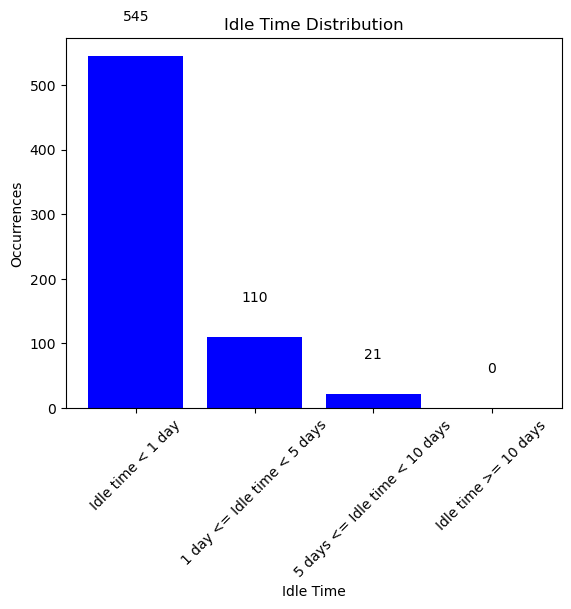

In [17]:
# Define the conditions for filtering
condition_1 = (merg['idle_time_minutes'] < 1440) & (merg['bike_id'] == '3289')
condition_2 = (merg['idle_time_minutes'] >= 1440) & (merg['idle_time_minutes'] < 7200) & (merg['bike_id'] == '3289')
condition_3 = (merg['idle_time_minutes'] >= 7200) & (merg['idle_time_minutes'] < 14400) & (merg['bike_id'] == '3289')
condition_4 = (merg['idle_time_minutes'] >= 14400*3) & (merg['bike_id'] == '3289')

# Apply the conditions and count the occurrences
count_1 = merg[condition_1].shape[0]
count_2 = merg[condition_2].shape[0]
count_3 = merg[condition_3].shape[0]
count_4 = merg[condition_4].shape[0]

categories = ['Idle time < 1 day', '1 day <= Idle time < 5 days', '5 days <= Idle time < 10 days', 'Idle time >= 10 days']
counts = [count_1, count_2, count_3, count_4]

plt.bar(categories, counts, color='b')
plt.xlabel('Idle Time')
plt.ylabel('Occurrences')
plt.title('Idle Time Distribution')
plt.xticks(rotation=45)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
for i, count in enumerate(counts):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')
plt.show()

In [8]:
df_merged['Date_s'] = pd.to_datetime(df_merged['Date_s'])

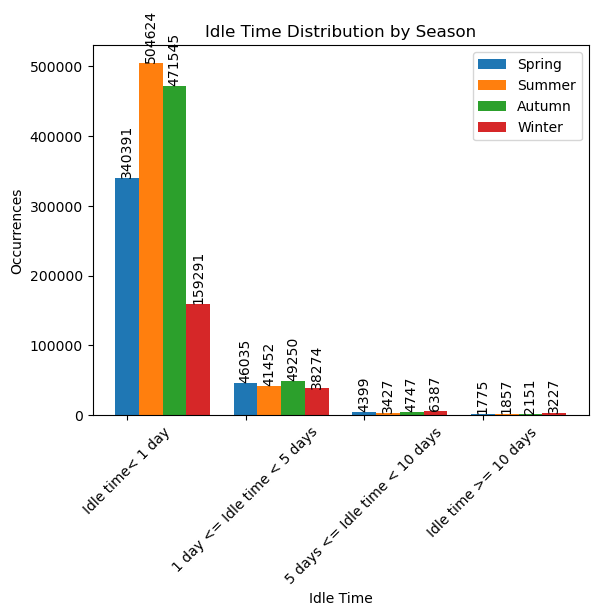

In [10]:
condition_labels = ['Idle time< 1 day', '1 day <= Idle time < 5 days', '5 days <= Idle time < 10 days', 'Idle time >= 10 days']
conditions = [condition_1, condition_2, condition_3, condition_4]

seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

df_merged['season'] = df_merged['Date_s'].dt.month.map(get_season)

# Create a list to store the counts for each combination of condition and season
counts_matrix = []

# Calculate the counts for each combination
for condition in conditions:
    counts_per_condition = []
    for season in seasons:
        count = df_merged[condition & (df_merged['season'] == season)].shape[0]
        counts_per_condition.append(count)
    counts_matrix.append(counts_per_condition)

# Convert the list of counts to a NumPy array for plotting
counts_matrix = np.array(counts_matrix)

# Create the grouped bar plot
bar_width = 0.2
x = list(range(len(seasons)))  # Convert the range object to a list

for i, season in enumerate(seasons):
    plt.bar([pos + i * bar_width for pos in x], counts_matrix[:, i], width=bar_width, label=season)
    for j, count in enumerate(counts_matrix[:, i]):
        plt.text(j + i * bar_width, count + 50, str(count), ha='center', va='bottom', rotation=90)

plt.xlabel('Idle Time')
plt.ylabel('Occurrences')
plt.title('Idle Time Distribution by Season')
plt.xticks(x, condition_labels, rotation=45)
plt.legend()

plt.show()

In [12]:
df_merged['passholder_indego'] = np.where((df_merged['passholder_type'] == 'Indego30') | (df_merged['passholder_type'] == 'Indego365'), 1, 0)

In [13]:
df_merged.groupby("passholder_indego")["idle_time_minutes"].mean()

passholder_indego
0    954.766782
1    856.161182
Name: idle_time_minutes, dtype: float64

<Axes: >

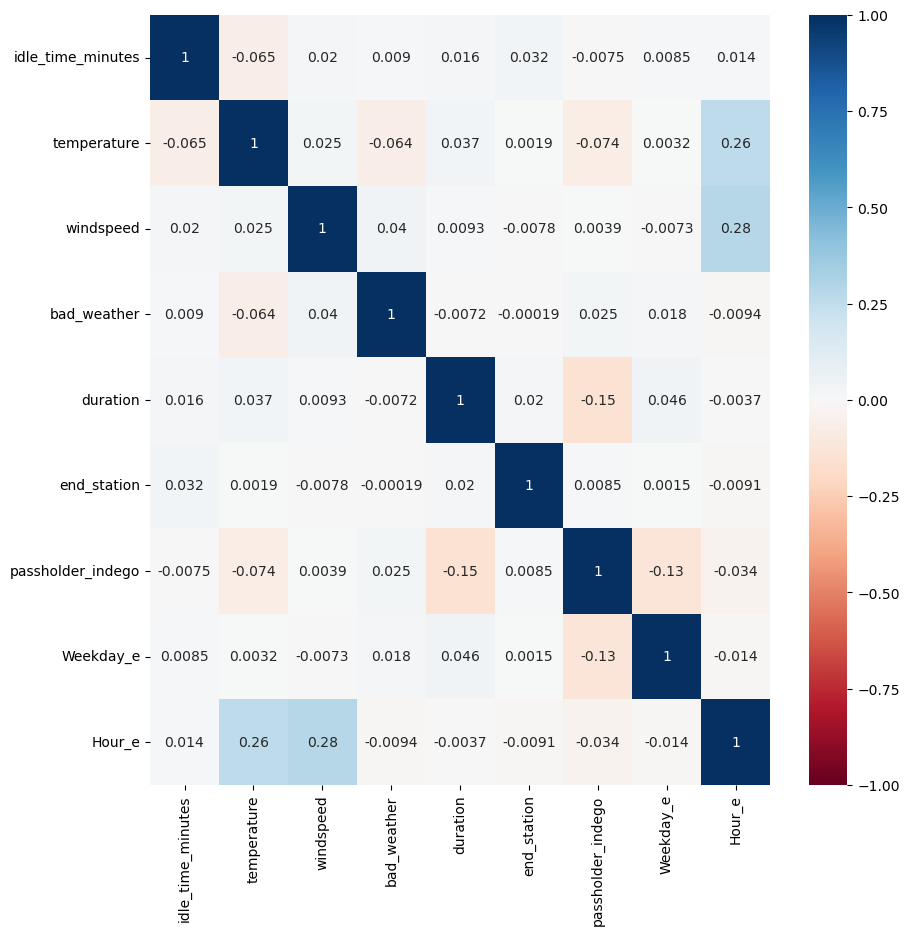

In [47]:
features = df_merged[['idle_time_minutes','temperature', 'windspeed', 'bad_weather', 'duration','end_station',
                'passholder_indego', 'Weekday_e','Hour_e']]
corr = features.corr()
# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [48]:
df_merged.dropna(subset=['idle_time_minutes'], inplace=True)

The null hypothesis (H0) for the t-test is that there is no difference in the mean idle time between 'Indego30'/'Indego365' passholders and other passholders. The alternative hypothesis (H1) is that there is a significant difference in the mean idle time.

If the p-value obtained from the t-test is less than the chosen significance level (alpha), we can reject the null hypothesis and conclude that there is a statistically significant difference in the mean idle time between 'Indego30'/'Indego365' passholders and other passholders. This suggests that 'passholder_type' is important in predicting idle time, and the 'Indego30'/'Indego365' passholders have significantly different idle time patterns compared to other passholders.

In [49]:
from scipy.stats import ttest_ind

# Perform independent samples t-test
indego_idle_time = df_merged[df_merged['passholder_indego'] == 1]['idle_time_minutes']
non_indego_idle_time = df_merged[df_merged['passholder_indego'] == 0]['idle_time_minutes']

t_stat, p_value = ttest_ind(indego_idle_time, non_indego_idle_time)

# Print the results
alpha = 0.05
print("Independent Samples t-test:")
print("t-statistic:", t_stat)
print("p-value:", p_value)
if p_value < alpha:
    print("H0 is rejected, which means that the idle time for Indego passholder statistically greater than that for Non-Indego passholder")
else:
    print("H0 can not be rejected")

Independent Samples t-test:
t-statistic: -9.779710350493227
p-value: 1.3779523967059914e-22
H0 is rejected, which means that the idle time for Indego passholder statistically greater than that for Non-Indego passholder


In [50]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678832 entries, 0 to 1678841
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   trip_id              1678832 non-null  int64         
 1   duration             1678832 non-null  int64         
 2   start_time           1678832 non-null  datetime64[ns]
 3   end_time             1678832 non-null  datetime64[ns]
 4   start_station        1678832 non-null  int64         
 5   end_station          1678832 non-null  int64         
 6   bike_id              1678832 non-null  object        
 7   plan_duration        1678832 non-null  int64         
 8   trip_route_category  1678832 non-null  object        
 9   passholder_type      1678832 non-null  object        
 10  bike_type            1678832 non-null  object        
 11  Date_s               1678832 non-null  datetime64[ns]
 12  Weekday_s            1678832 non-null  int64         
 1

In [51]:
df_merged['start_time'] = pd.to_datetime(df_merged['start_time'])
df_merged['end_time'] = pd.to_datetime(df_merged['end_time'])
df_merged['Date_e'] = pd.to_datetime(df_merged['Date_e'])

In [52]:

# duration ? how 
# end_station logisch // average usage, popularity

# bike availability at end station 


In [53]:
df_merged.groupby(df_merged['Weekday_s'] > 4)['idle_time_minutes'].mean()

Weekday_s
False    845.993811
True     916.869697
Name: idle_time_minutes, dtype: float64

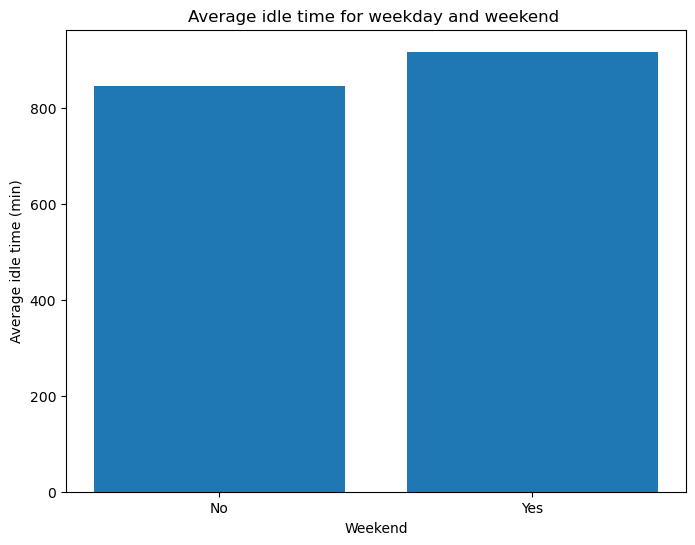

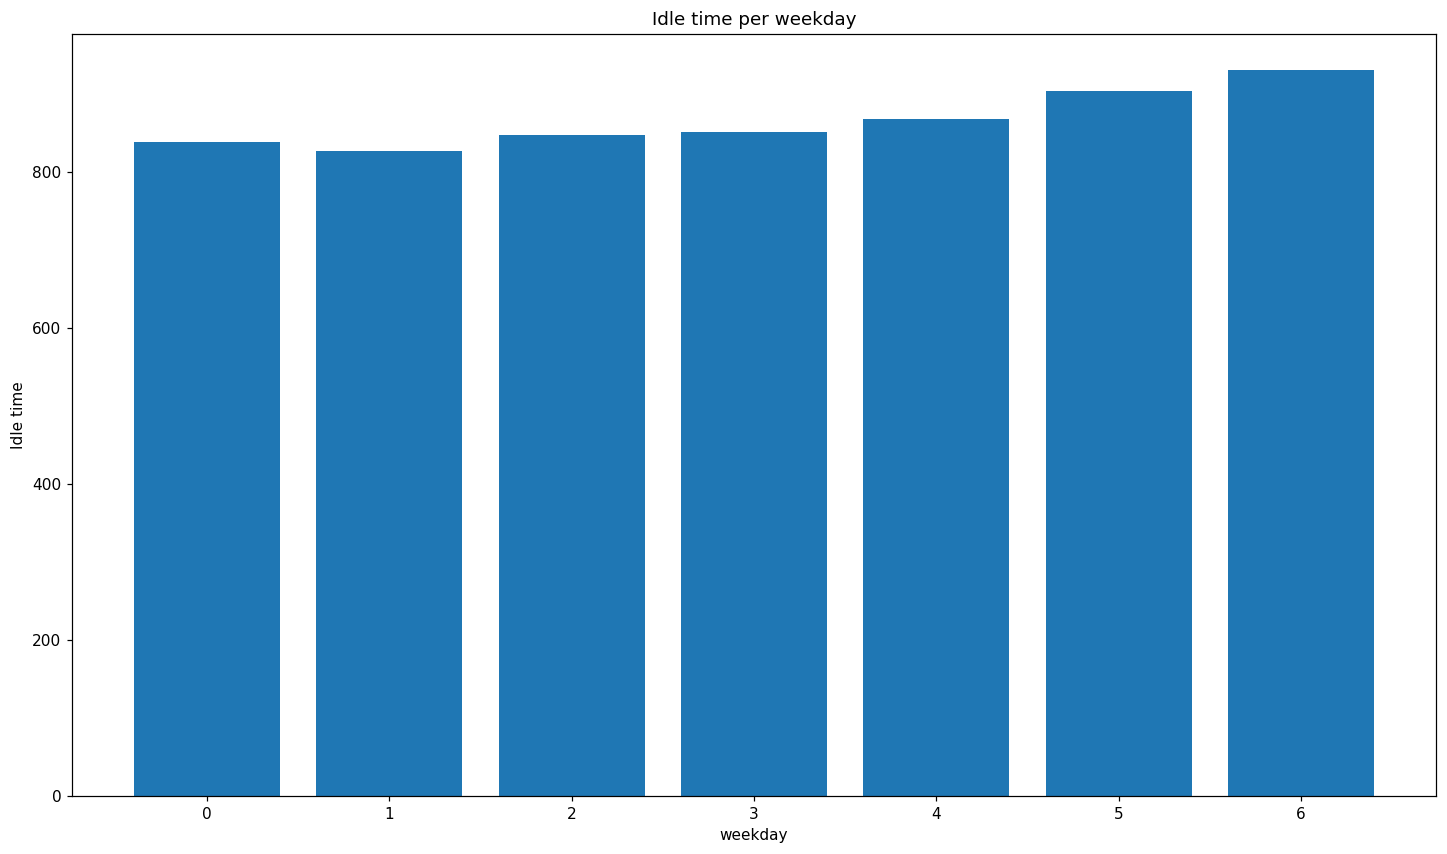

In [54]:
avg_idle_time = df_merged.groupby(df_merged['Weekday_s'] > 4)['idle_time_minutes'].mean()
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(avg_idle_time.index, avg_idle_time)

ax.set_xticks([0,1])
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel("Weekend")
ax.set_ylabel("Average idle time (min)")
ax.set_title("Average idle time for weekday and weekend ")

plt.show()

weekday = df_merged.groupby(df_merged['Weekday_e'])['idle_time_minutes'].mean()

fig, ax = plt.subplots(figsize=(16,9), dpi = 110)
ax.bar(weekday.index, weekday)
plt.title("Idle time per weekday")
plt.xlabel("weekday")
plt.ylabel("Idle time")

plt.show()

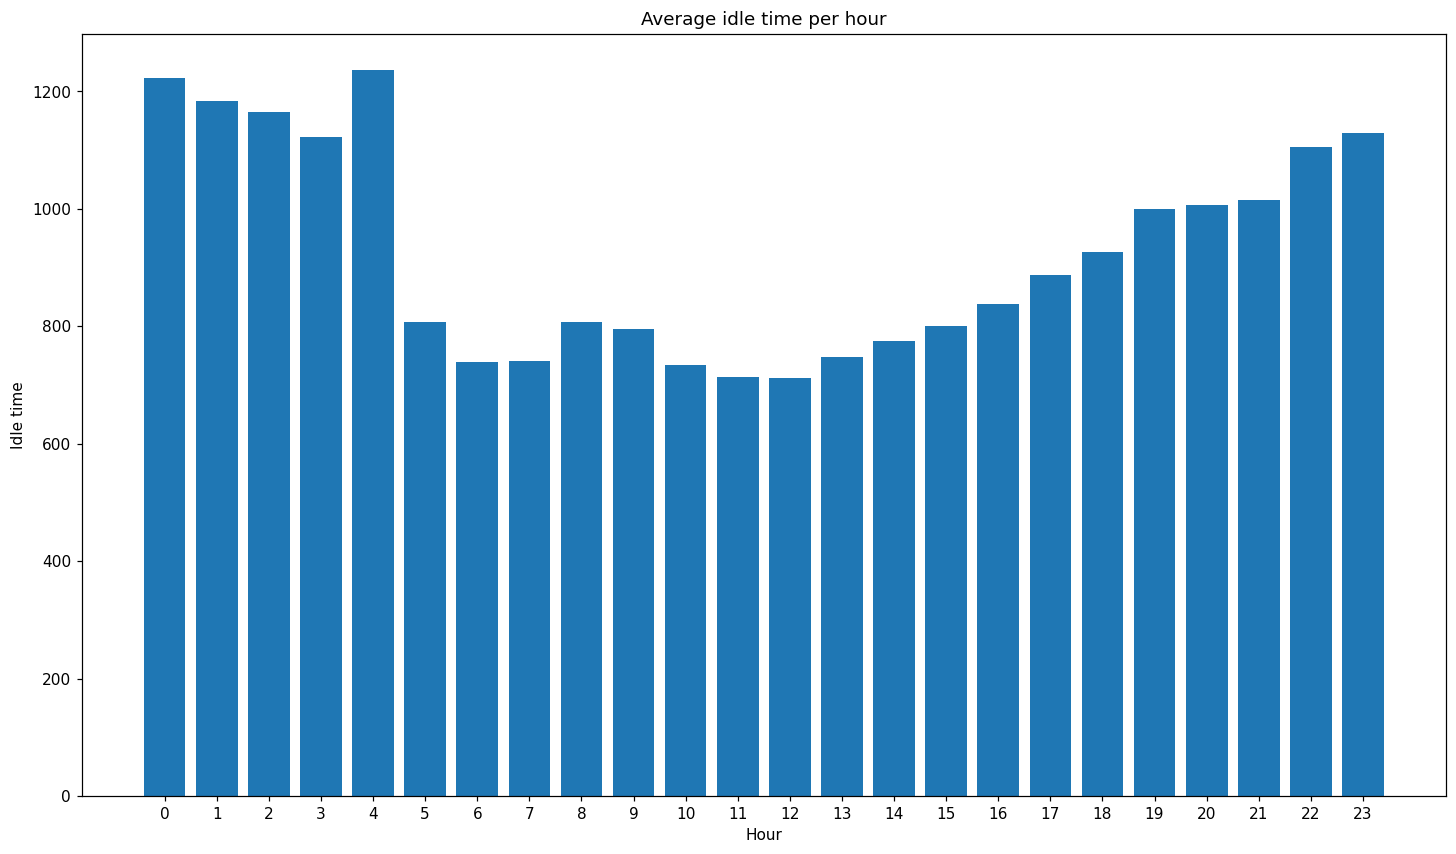

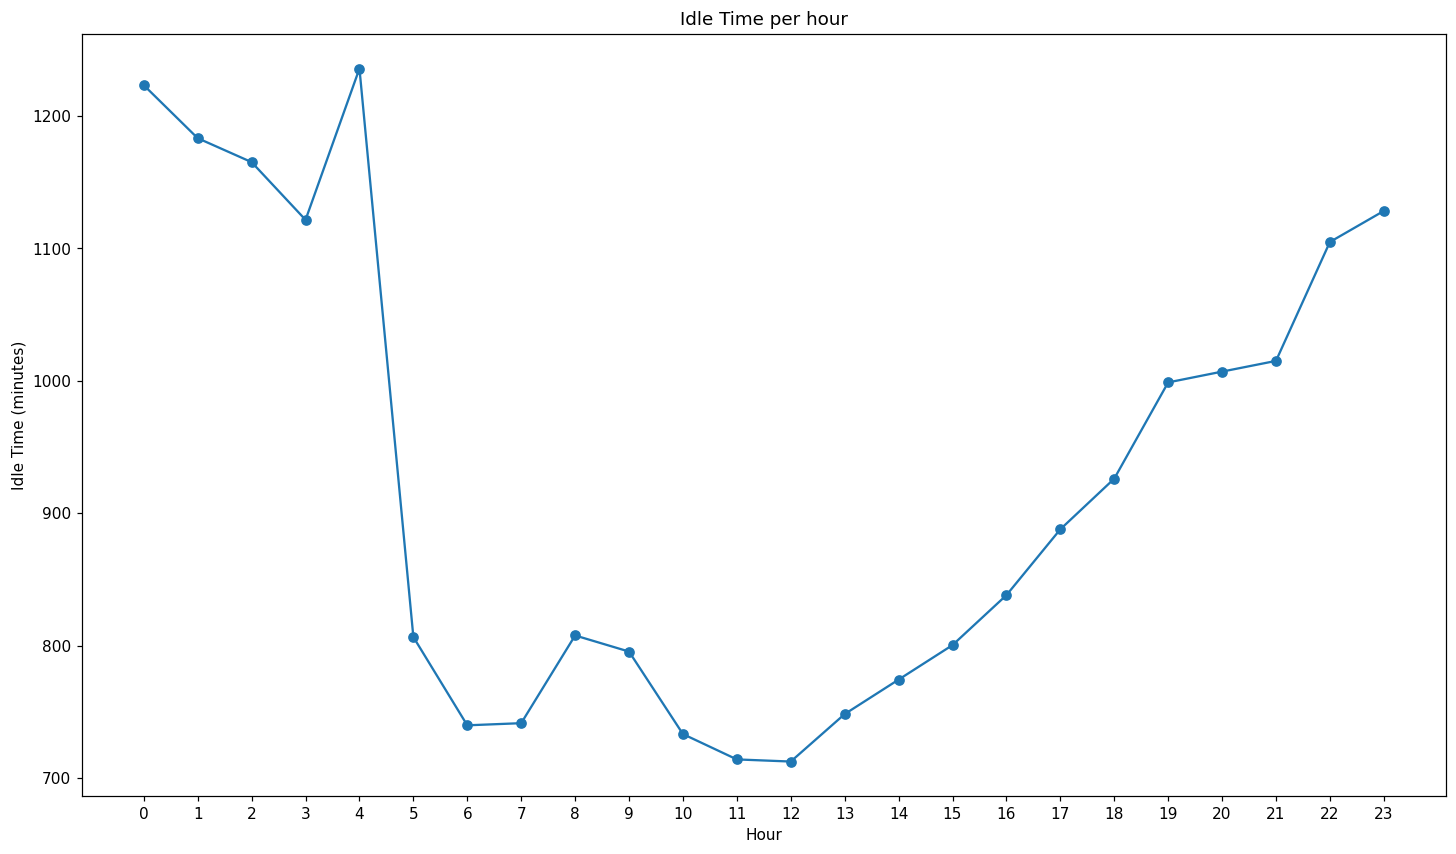

In [58]:
hour = df_merged.groupby(df_merged['Hour_e'])['idle_time_minutes'].mean()

fig, ax = plt.subplots(figsize=(16,9), dpi = 110)
ax.bar(hour.index, hour)
plt.title("Average idle time per hour")
plt.xlabel("Hour")
plt.xticks(range(0, 24, 1))
plt.ylabel("Idle time")

plt.show()

fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
ax.plot(hour.index, hour, marker='o', linestyle='-')
plt.title("Idle Time per hour")
plt.xlabel("Hour")
plt.xticks(range(0, 24, 1))
plt.ylabel("Idle Time (minutes)")

plt.show()

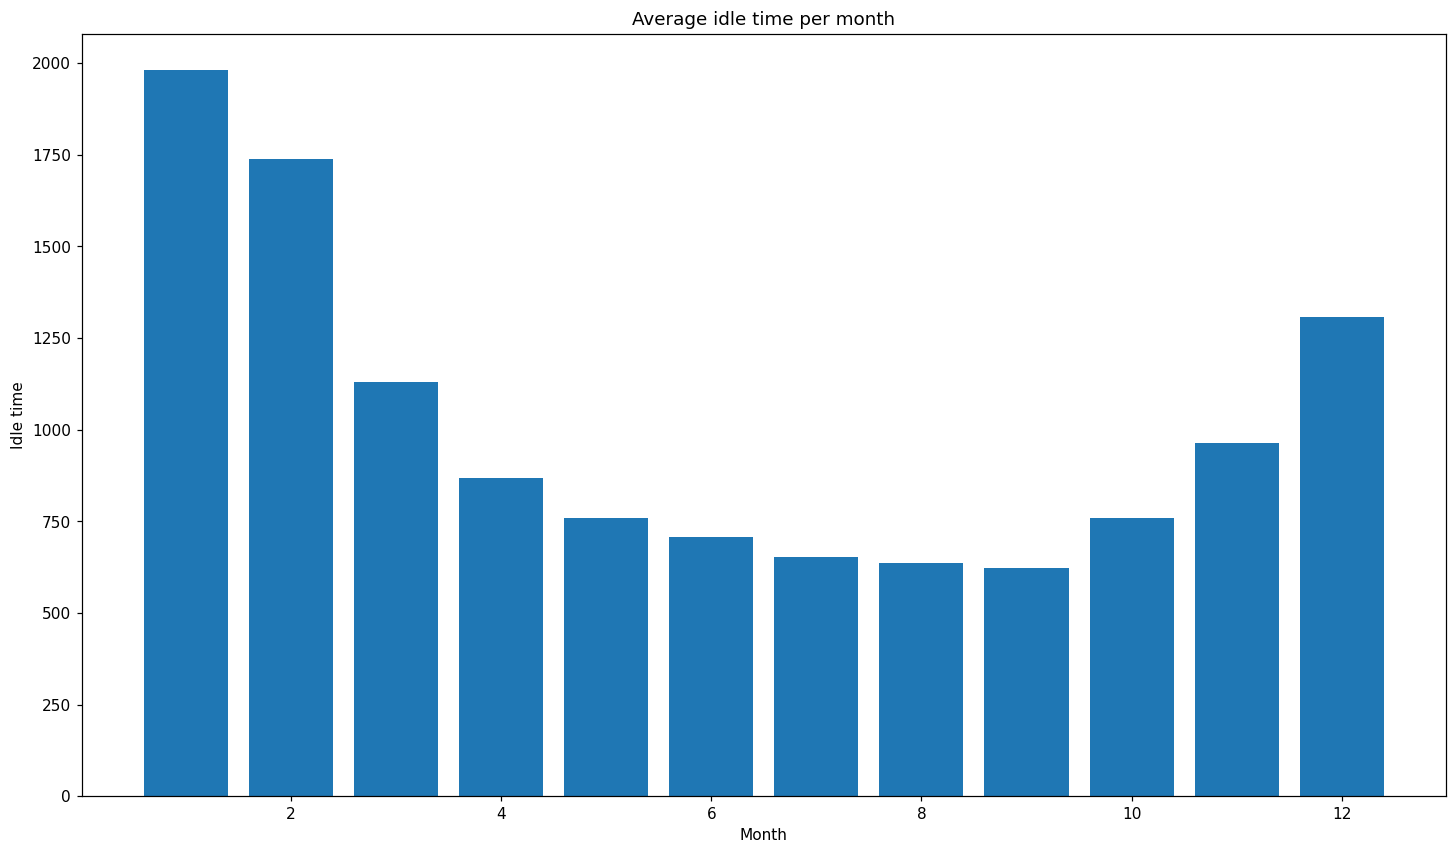

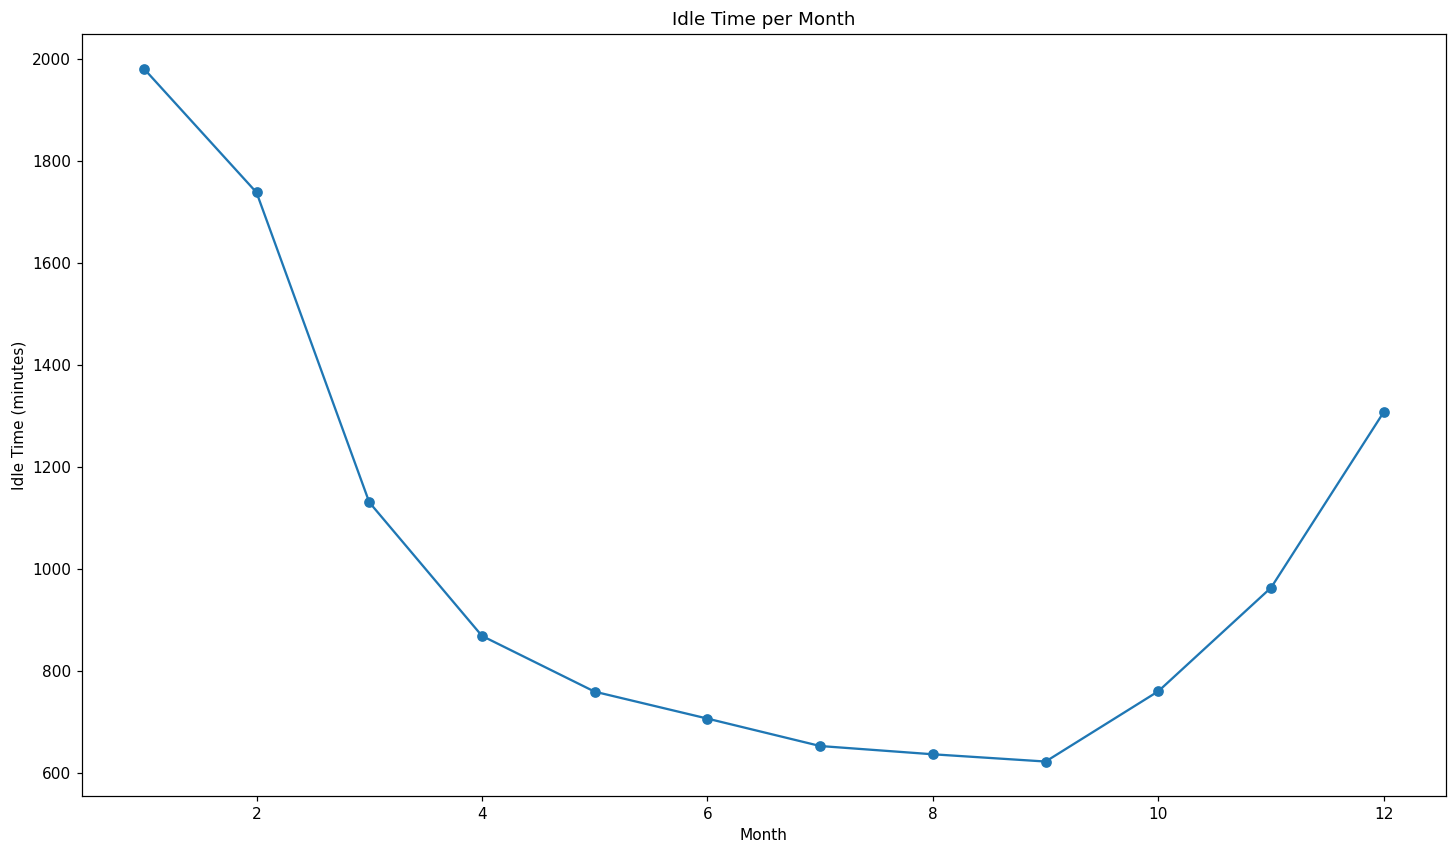

In [56]:
month = df_merged.groupby(df_merged['Date_s'].dt.month)['idle_time_minutes'].mean()
fig, ax = plt.subplots(figsize=(16,9), dpi = 110)
ax.bar(month.index, month)
plt.title("Average idle time per month")
plt.xlabel("Month")
plt.ylabel("Idle time")

plt.show()

fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
ax.plot(month.index, month, marker='o', linestyle='-')
plt.title("Idle Time per Month")
plt.xlabel("Month")
plt.ylabel("Idle Time (minutes)")

plt.show()

- we discard weekday as an independent variable
- we consider month and hour as a selectable independent variable

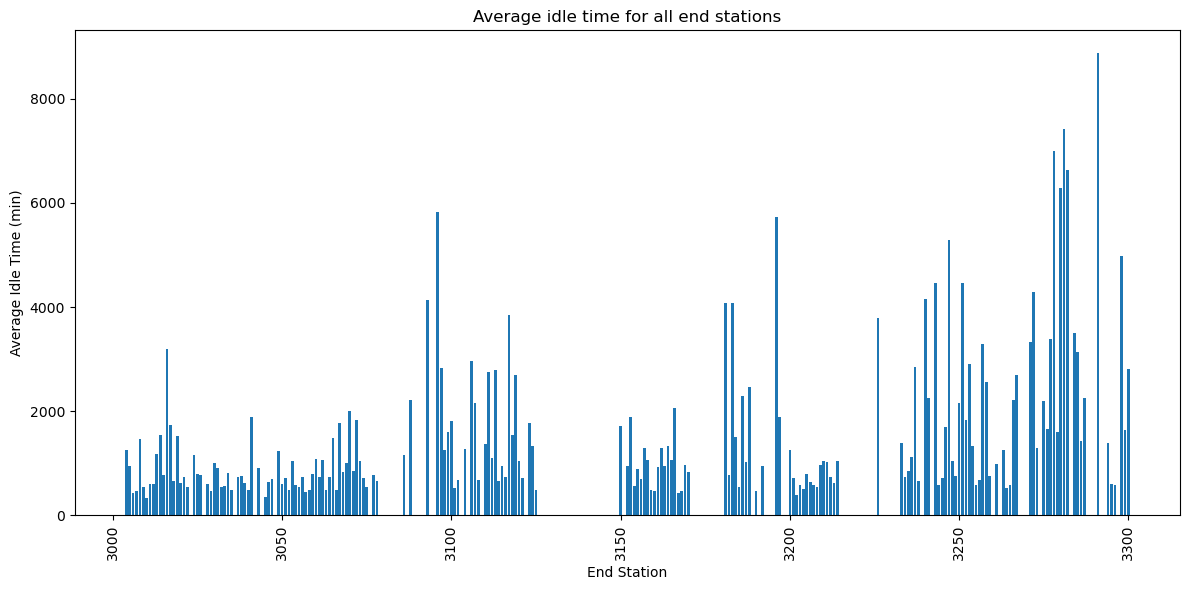

In [62]:
average_idle_time_by_station = df_merged.groupby("end_station")["idle_time_minutes"].mean()

plt.figure(figsize=(12, 6))
plt.bar(average_idle_time_by_station.index, average_idle_time_by_station)
plt.xlabel("End Station")
plt.ylabel("Average Idle Time (min)")
plt.title("Average idle time for all end stations")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [66]:
stations_under_1440 = average_idle_time_by_station[average_idle_time_by_station < 1440]

# Display the filtered stations
print(len(stations_under_1440))

132


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
import glob

In [2]:
predict_bike = pd.read_csv('bike_predict.csv', low_memory=False)

In [3]:
predict_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip_id              686 non-null    int64  
 1   duration_x           686 non-null    int64  
 2   end_station_x        686 non-null    int64  
 3   bike_id_x            686 non-null    int64  
 4   passholder_type_x    686 non-null    object 
 5   Date_e_x             686 non-null    object 
 6   Weekday_e_x          686 non-null    int64  
 7   Hour_e_x             686 non-null    int64  
 8   avg_trip_count       686 non-null    float64
 9   idle_time_minutes_x  686 non-null    float64
 10  idle_bikes_count     686 non-null    int64  
 11  temperature          686 non-null    float64
 12  windspeed            686 non-null    float64
 13  bad_weather          686 non-null    int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 75.2+ KB


In [4]:
predict_bike

trip_id  duration_x  end_station_x  bike_id_x passholder_type_x  \
0    365198537          11           3012       3289         Indego365   
1    365258430           7           3163       3289          Indego30   
2    365261890          48           3163       3289          Day Pass   
3    365361027           8           3014       3289          Indego30   
4    365373128           6           3182       3289          Indego30   
..         ...         ...            ...        ...               ...   
681  576921425          43           3245       3289          Indego30   
682  576932650          40           3210       3289          Indego30   
683  576932606          21           3245       3289          Indego30   
684  577042144           7           3065       3289          Indego30   
685  578797865          14           3097       3289         Indego365   

       Date_e_x  Weekday_e_x  Hour_e_x  avg_trip_count  idle_time_minutes_x  \
0    2021-01-01            4        11       14.702778               1609.0   
1    2021-01-02            5        14       25.946502                 77.0   
2    2021-01-02            5        16       21.129173               2378.0   
3    2021-01-04            0         8       21.129173                494.0   
4    2021-01-04            0        16        7.330914               7375.0   
..          ...          ...       ...             ...                  ...   
681  2022-12-20            1        20       12.035581                 12.0   
682  2022-12-20            1        21       12.035581                  1.0   
683  2022-12-20            1        21        8.800830                626.0   
684  2022-12-21            2         8       12.035581              10626.0   
685  2022-12-28            2        17        5.512640               1508.6   

     idle_bikes_count  temperature  windspeed  bad_weather  
0                  11         -2.0        6.0            0  
1                   3          8.0       15.0            0  
2                  12         12.0       28.0            0  
3                   1          2.0       11.0            0  
4                  51          5.0       17.0            0  
..                ...          ...        ...          ...  
681                 0          5.0       15.0            0  
682                 0          4.0       13.0            0  
683                 1          4.0       11.0            0  
684                20         -2.0        7.0            0  
685                 5          8.0       22.0            0  

[686 rows x 14 columns]

In [5]:
predict_bike['month'] = pd.to_datetime(predict_bike['Date_e_x']).dt.month
from sklearn.preprocessing import OneHotEncoder

# Create a dictionary to map months to their corresponding season
seasons = {
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter',
    1: 'Winter',
    2: 'Winter'
}

predict_bike['season'] = predict_bike['month'].map(seasons)
encoder = OneHotEncoder(sparse=False)
predict_bike['season'] = encoder.fit_transform(predict_bike[['season']])

C:\Users\r-cet\anaconda3\envs\DSML_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
predict_bike['hour_sin'] = np.sin(2 * np.pi * predict_bike['Hour_e_x'] / 24)
predict_bike['hour_cos'] = np.cos(2 * np.pi * predict_bike['Hour_e_x'] / 24)

In [7]:
predict_bike['avg_duration_passholder'] = predict_bike.groupby(['passholder_type_x'])['duration_x'].transform('mean')

In [8]:
predict_bike['passholder_indego'] = np.where((predict_bike['passholder_type_x'] == 'Indego30') | (predict_bike['passholder_type_x'] == 'Indego365'), 1, 0)
predict_bike.drop('passholder_type_x', axis=1, inplace=True)
predict_bike['is_weekday'] = np.where((predict_bike['Weekday_e_x'] < 5), 1, 0)
predict_bike.drop('Weekday_e_x', axis=1, inplace=True)

In [9]:
predict_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_id                  686 non-null    int64  
 1   duration_x               686 non-null    int64  
 2   end_station_x            686 non-null    int64  
 3   bike_id_x                686 non-null    int64  
 4   Date_e_x                 686 non-null    object 
 5   Hour_e_x                 686 non-null    int64  
 6   avg_trip_count           686 non-null    float64
 7   idle_time_minutes_x      686 non-null    float64
 8   idle_bikes_count         686 non-null    int64  
 9   temperature              686 non-null    float64
 10  windspeed                686 non-null    float64
 11  bad_weather              686 non-null    int64  
 12  month                    686 non-null    int64  
 13  season                   686 non-null    float64
 14  hour_sin                 6

In [10]:
predict_bike.drop(['trip_id', 'duration_x', 'Date_e_x'], axis=1, inplace=True)

In [11]:
poi = pd.read_csv('Counted_POI.csv', low_memory=False)
poi.describe()

Station   POI_Count
count   198.000000  198.000000
mean   3145.045455   17.797980
std      92.322888   20.621796
min    3004.000000    0.000000
25%    3059.250000    4.000000
50%    3152.500000    9.000000
75%    3235.750000   24.000000
max    3300.000000  100.000000

In [12]:
predict_bike = predict_bike.merge(poi, left_on='end_station_x', right_on='Station', how='left')
predict_bike.drop(columns=['Station', 'bike_id_x'], inplace=True)
predict_bike

end_station_x  Hour_e_x  avg_trip_count  idle_time_minutes_x  \
0             3012        11       14.702778               1609.0   
1             3163        14       25.946502                 77.0   
2             3163        16       21.129173               2378.0   
3             3014         8       21.129173                494.0   
4             3182        16        7.330914               7375.0   
..             ...       ...             ...                  ...   
681           3245        20       12.035581                 12.0   
682           3210        21       12.035581                  1.0   
683           3245        21        8.800830                626.0   
684           3065         8       12.035581              10626.0   
685           3097        17        5.512640               1508.6   

     idle_bikes_count  temperature  windspeed  bad_weather  month  season  \
0                  11         -2.0        6.0            0      1     0.0   
1                   3          8.0       15.0            0      1     0.0   
2                  12         12.0       28.0            0      1     0.0   
3                   1          2.0       11.0            0      1     0.0   
4                  51          5.0       17.0            0      1     0.0   
..                ...          ...        ...          ...    ...     ...   
681                 0          5.0       15.0            0     12     0.0   
682                 0          4.0       13.0            0     12     0.0   
683                 1          4.0       11.0            0     12     0.0   
684                20         -2.0        7.0            0     12     0.0   
685                 5          8.0       22.0            0     12     0.0   

     hour_sin  hour_cos  avg_duration_passholder  passholder_indego  \
0    0.258819 -0.965926                11.910256                  1   
1   -0.500000 -0.866025                17.175824                  1   
2   -0.866025 -0.500000                36.733333                  0   
3    0.866025 -0.500000                17.175824                  1   
4   -0.866025 -0.500000                17.175824                  1   
..        ...       ...                      ...                ...   
681 -0.866025  0.500000                17.175824                  1   
682 -0.707107  0.707107                17.175824                  1   
683 -0.707107  0.707107                17.175824                  1   
684  0.866025 -0.500000                17.175824                  1   
685 -0.965926 -0.258819                11.910256                  1   

     is_weekday  POI_Count  
0             1         20  
1             0         20  
2             0         20  
3             1         10  
4             1         98  
..          ...        ...  
681           1         32  
682           1         17  
683           1         32  
684           1         10  
685           1          1  

[686 rows x 16 columns]

In [13]:
predict_bike['summer_winter'] = np.where((predict_bike['month'] >= 4) & (predict_bike['month'] < 10 ), 1, 0)

<Axes: >

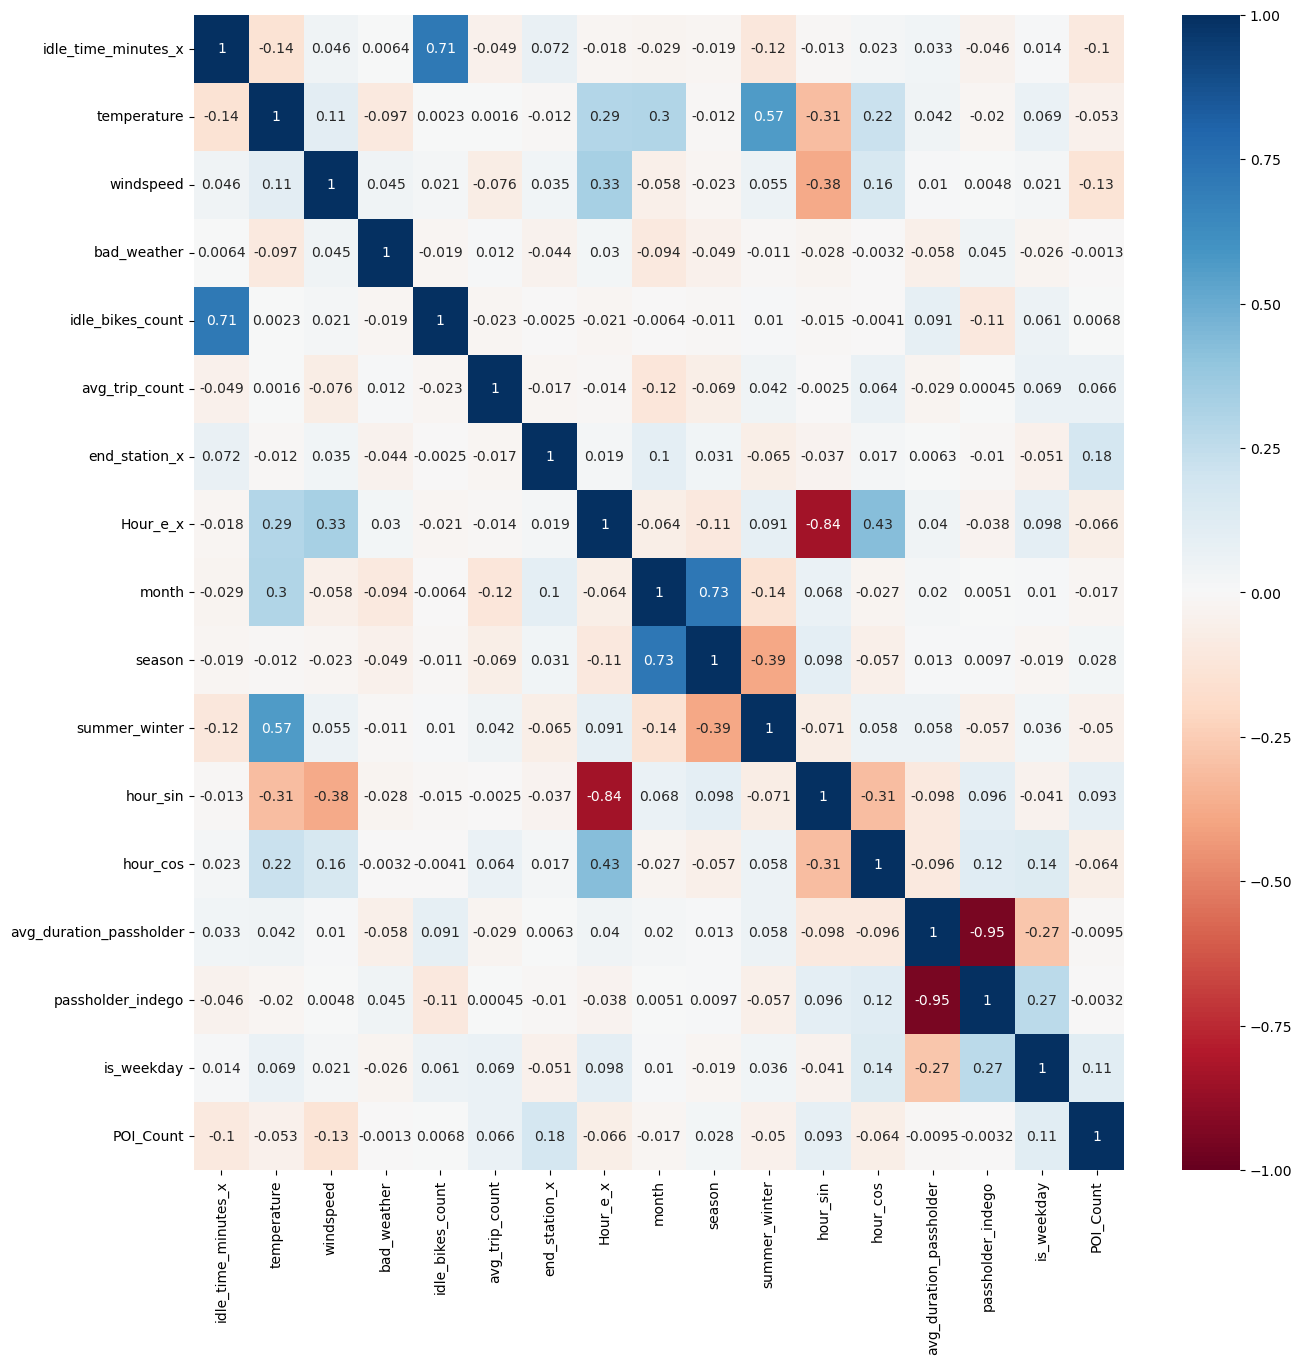

In [14]:
features = predict_bike[['idle_time_minutes_x','temperature', 'windspeed', 'bad_weather', 'idle_bikes_count', 'avg_trip_count',
                 'end_station_x', 'Hour_e_x', 'month', 'season', 'summer_winter',
                'hour_sin', 'hour_cos', 'avg_duration_passholder', 'passholder_indego','is_weekday','POI_Count']]
corr = features.corr()
# Create the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [16]:
predict_bike.rename(columns={
    'end_station_x': 'end_station',
    'Hour_e_x': 'hour',
    'idle_time_minutes_x': 'idle_time',
    'bad_weather': 'bad_weather_condition',
}, inplace=True)

In [17]:
predict_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 685
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   end_station              686 non-null    int64  
 1   hour                     686 non-null    int64  
 2   avg_trip_count           686 non-null    float64
 3   idle_time                686 non-null    float64
 4   idle_bikes_count         686 non-null    int64  
 5   temperature              686 non-null    float64
 6   windspeed                686 non-null    float64
 7   bad_weather_condition    686 non-null    int64  
 8   month                    686 non-null    int64  
 9   season                   686 non-null    float64
 10  hour_sin                 686 non-null    float64
 11  hour_cos                 686 non-null    float64
 12  avg_duration_passholder  686 non-null    float64
 13  passholder_indego        686 non-null    int32  
 14  is_weekday               6

In [19]:
predict_bike.to_csv('predict_bike.csv', index=False)

In [95]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
from collections import Counter
import folium #map
import matplotlib.pyplot as plt #color and graph
import matplotlib.cm as cm #color
import math
import random
import glob
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [96]:
data = pd.read_csv("predict_bike_small.csv", low_memory=False)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   end_station              686 non-null    int64  
 1   hour                     686 non-null    int64  
 2   avg_trip_count           686 non-null    float64
 3   idle_time                686 non-null    float64
 4   idle_bikes_count         686 non-null    int64  
 5   temperature              686 non-null    float64
 6   windspeed                686 non-null    float64
 7   bad_weather_condition    686 non-null    int64  
 8   month                    686 non-null    int64  
 9   season                   686 non-null    float64
 10  hour_sin                 686 non-null    float64
 11  hour_cos                 686 non-null    float64
 12  avg_duration_passholder  686 non-null    float64
 13  passholder_indego        686 non-null    int64  
 14  is_weekday               6

In [98]:
X = data.drop('idle_time', axis=1)  # Features
y = data['idle_time']  


In [99]:
# F-Test
f_scores, p_values = f_regression(X, y)

f_test_results = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores, 'p-value': p_values})

print(f_test_results)


                    Feature     F-Score        p-value
0               end_station    3.536423   6.045944e-02
1                      hour    0.213801   6.439512e-01
2            avg_trip_count    1.678521   1.955582e-01
3          idle_bikes_count  715.064900  2.198033e-108
4               temperature   14.430532   1.583689e-04
5                 windspeed    1.422146   2.334640e-01
6     bad_weather_condition    0.027666   8.679448e-01
7                     month    0.571777   4.498139e-01
8                    season    0.236207   6.271149e-01
9                  hour_sin    0.110855   7.392748e-01
10                 hour_cos    0.363189   5.469401e-01
11  avg_duration_passholder    0.758549   3.840885e-01
12        passholder_indego    1.435611   2.312658e-01
13               is_weekday    0.129413   7.191525e-01
14                POI_Count    6.920916   8.711149e-03
15            summer_winter    9.421320   2.229616e-03


We tried to drop some of the Features above but every time we tried to the values of MSE, MAE R2 got worse. 

In [100]:
drop_column = [] # we could use this to drop a Feature
X = data.drop(['idle_time'] + drop_column, axis=1)  # Features
y = data['idle_time'] / 60 

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



We tried to use grid for the best possible values of each parameter. But after some time it didn't compile in time so we used the last parameter for the following code.


param_grid = {
    'C': [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0],  # C values
    'kernel': ['linear', 'rbf', "poly"],  # kernel
    'epsilon': [0.1, 0.01, 0.001]  # epsilon
}

svr_model = SVR()
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train) 

print("Best Hyperparameter: ", grid_search.best_params_)

best_svr_model = grid_search.best_estimator_
y_pred = best_svr_model.predict(X_test_scaled) 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) with best parameter: ", mse)
print("R-squared (R2) with best parameter: ", r2)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
df = pd.DataFrame({"Actual" : y_test, "Predicted" : y_pred})
df

In [101]:
svr_model = SVR(kernel='linear', C=10000.0, epsilon=0.1)

# train model
svr_model.fit(X_train_scaled, y_train)

SVR(C=10000.0, kernel='linear')

In [102]:
# Prediction
y_pred = svr_model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean absolute Error (MAE): 15.331161804046353
Mean Squared Error (MSE): 1093.2741026562226
R-squared (R2): 0.7565873333786648


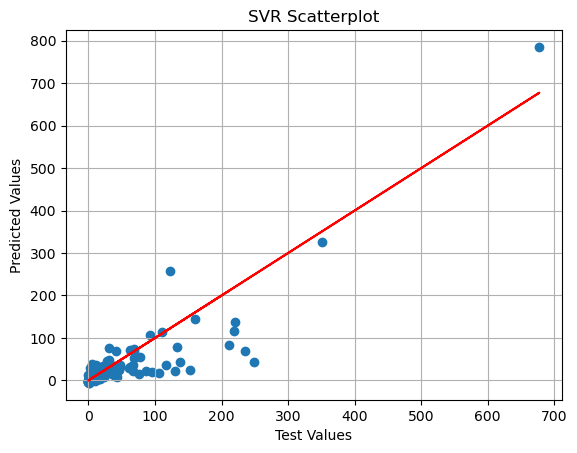

In [103]:
#Scatterplot SVR
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, c="r")
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.title('SVR Scatterplot')
plt.grid()
plt.savefig("SVR_Scatter.jpg")
plt.show()


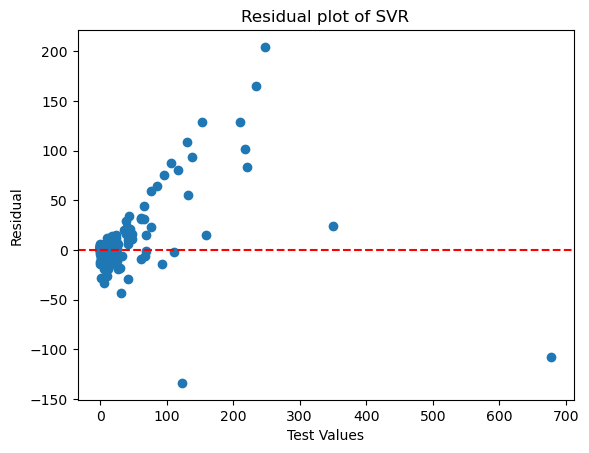

In [105]:
#Residual plot SVR
residuen = y_test - y_pred
plt.scatter(y_test, residuen)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Test Values')
plt.ylabel('Residual')
plt.title('Residual plot of SVR')
plt.savefig("SVR_Residual.jpg")
plt.show()



In [106]:
# cut of the outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


filtered_data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]


In [107]:
#new model without outliers
drop_column = []
X = filtered_data.drop(["idle_time"] + drop_column, axis=1)  # Features
y = filtered_data['idle_time']  

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svr_model = SVR(kernel='linear', C=10000.0, epsilon=0.1)

# training data
svr_model.fit(X_train_scaled, y_train)

# test data
y_pred = svr_model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 199165.77201645816
Mean absolute Error (MAE): 295.73337754847273
R-squared (R2): 0.48929478003313365


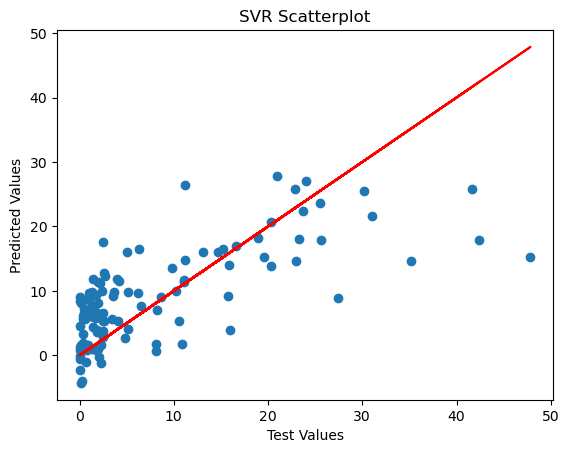

In [117]:
#Scatterplot SVR without outliers
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, c="r")
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.title('SVR Scatterplot')
plt.savefig("SVR_Scatter_wo_outliers.jpg")
plt.show()


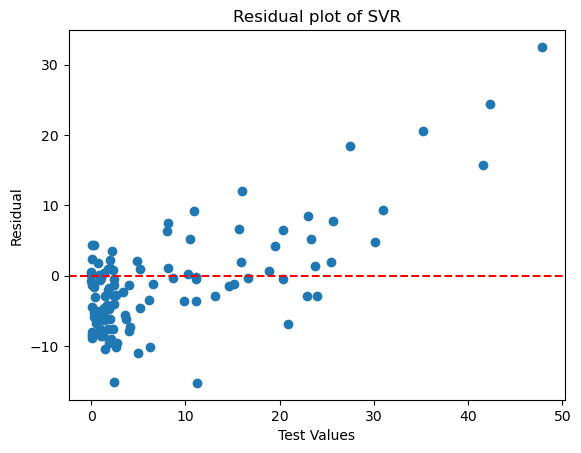

In [118]:
#Residual plot without outliers
residuen = y_test - y_pred
plt.scatter(y_test, residuen)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Test Values')
plt.ylabel('Residual')
plt.title('Residual plot of SVR')
plt.savefig("SVR_Residual_wo_outliers.jpg")
plt.show()



3940929.790102016
11586589.382894566
0.7562692581328925
0.2834157987043606
921.7773421994118
1352.9828586181413


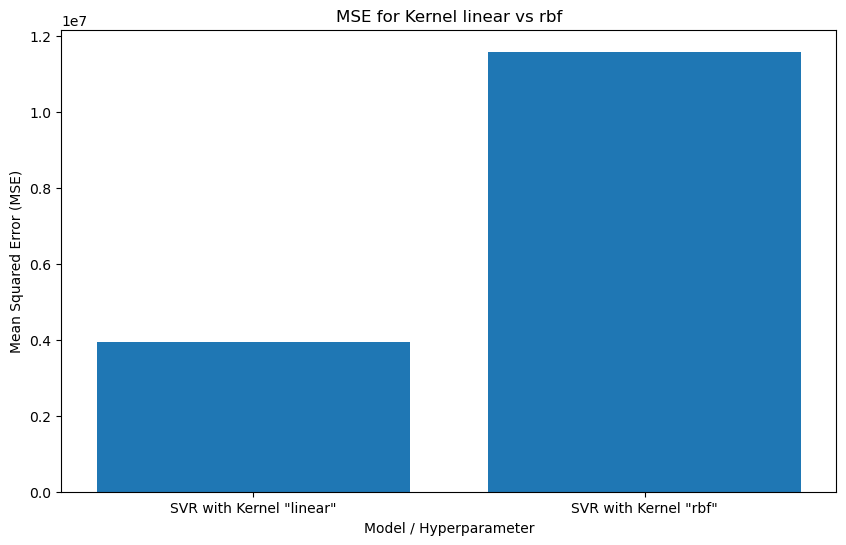

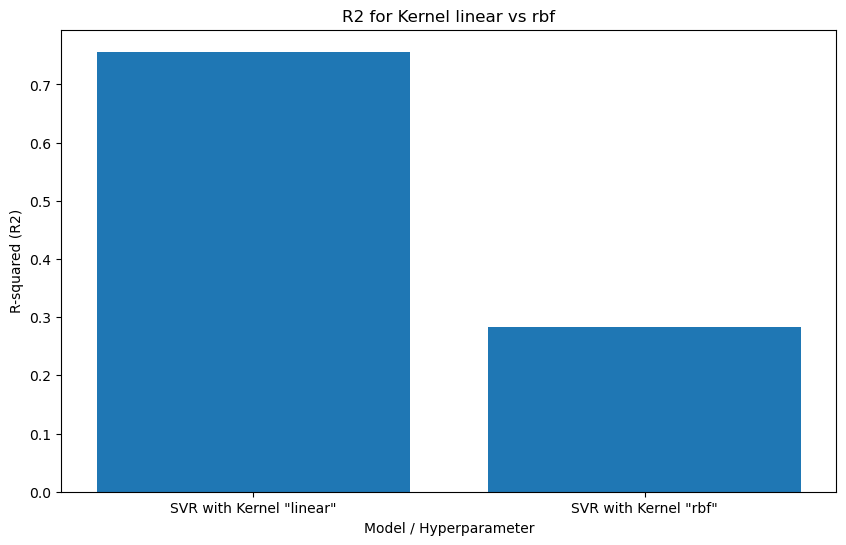

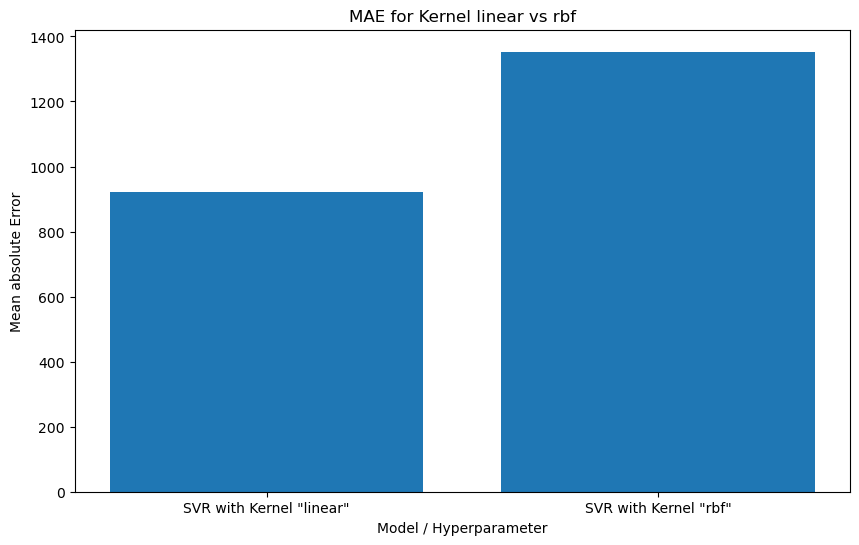

In [127]:
# model with two different kernel
drop_column = []
X = data.drop(['idle_time'] + drop_column, axis=1)  # Features
y = data['idle_time']  
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
svr_linear = SVR(kernel='linear', C=100000, epsilon=0.1)
svr_rbf = SVR(kernel='rbf', C=100000, epsilon=0.1)

# Train
svr_linear.fit(X_train_scaled, y_train)
svr_rbf.fit(X_train_scaled, y_train)
#svr_poly.fit(X_train_scaled, y_train)

# Prediction 
y_pred_linear = svr_linear.predict(X_test_scaled)
y_pred_rbf = svr_rbf.predict(X_test_scaled)

# mse
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rbf = mean_squared_error(y_test, y_pred_rbf)

print(mse_linear)
print(mse_rbf)

# r2
r2_linear = r2_score(y_test, y_pred_linear)
r2_rbf = r2_score(y_test, y_pred_rbf)

print(r2_linear)
print(r2_rbf)

#mae
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)

print(mae_linear)
print(mae_rbf)


model_names = ['SVR with Kernel "linear"', 'SVR with Kernel "rbf"']
mse_values = [mse_linear, mse_rbf ]
r2_values = [r2_linear, r2_rbf ]
mae_values = [mae_linear, mae_rbf]

#MSE
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values)
plt.xlabel("Model / Hyperparameter")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE for Kernel linear vs rbf")
plt.savefig("SVR_different_kernel_MSE.jpg")
plt.show()

#R2
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_values)
plt.xlabel("Model / Hyperparameter")
plt.ylabel("R-squared (R2)")
plt.title("R2 for Kernel linear vs rbf")
plt.savefig("SVR_different_kernel_R2.jpg")
plt.show()

#MAE
plt.figure(figsize=(10, 6))
plt.bar(model_names, mae_values)
plt.xlabel("Model / Hyperparameter")
plt.ylabel("Mean absolute Error")
plt.title("MAE for Kernel linear vs rbf")
plt.savefig("SVR_different_kernel_MAE.jpg")
plt.show()



In [158]:
#LASSO Regression
X = data.drop("idle_time", axis=1)  # Features
y = data["idle_time"] / 60 

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train LASSO model
lasso_model = Lasso(alpha=15.0)  # alpha could be changed
lasso_model.fit(X_train_scaled, y_train)

# Test-data
y_pred = lasso_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error: 18.06987446700896
Mean Squared Error (MSE): 1107.5634286740017
R-squared (R2): 0.7534058778390534


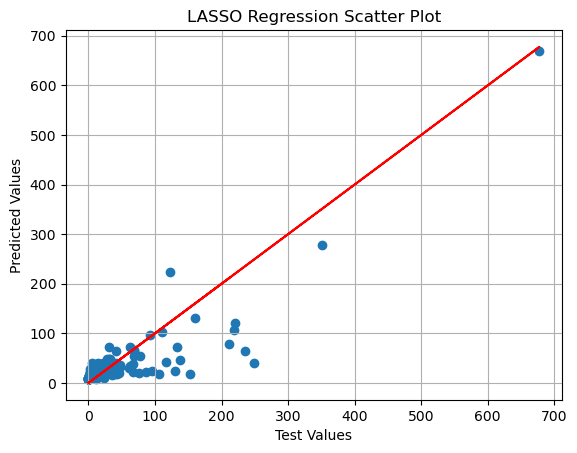

In [159]:
#Scatterplot LASSO
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, c="r")
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.title('LASSO Regression Scatter Plot')
plt.grid()
plt.savefig("LASSO_Scatter.jpg")
plt.show()


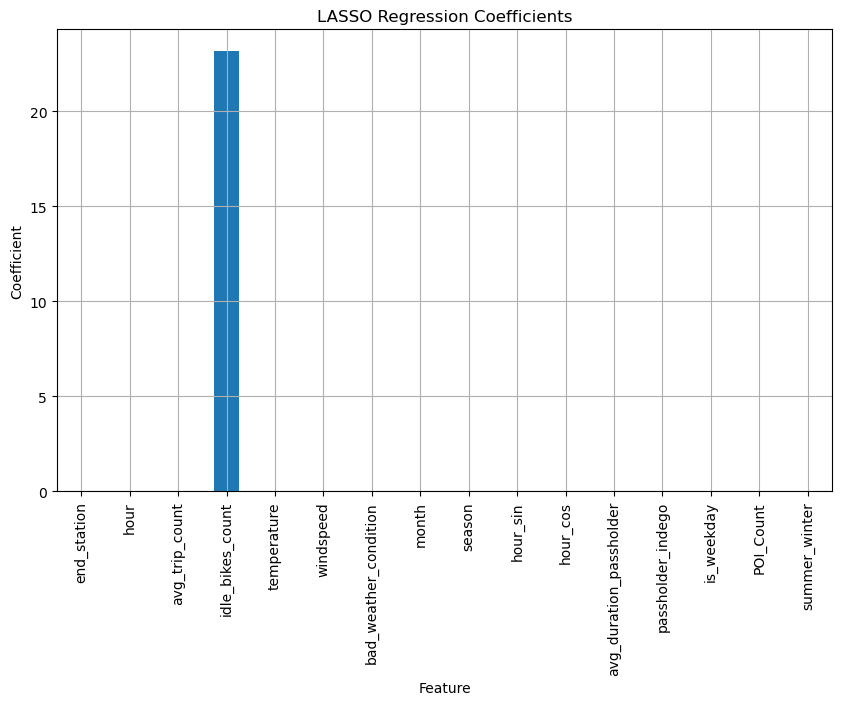

In [161]:
# Plot coefficients
coef = pd.Series(lasso_model.coef_, index=X.columns)
plt.figure(figsize=(10, 6))
coef.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('LASSO Regression Coefficients')
plt.grid()
plt.savefig("LASSO_Coeff.png",bbox_inches='tight')
plt.show()


In [151]:
# cut of the outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


filtered_data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

In [163]:
# LASSO without outliers
X = filtered_data.drop("idle_time", axis=1)  # Features
y = filtered_data["idle_time"] / 60 

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train LASSO model
lasso_model = Lasso(alpha=0.1)  # alpha could be changed
lasso_model.fit(X_train_scaled, y_train)

# Test-data
y_pred = lasso_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error: 5.6174685329369
Mean Squared Error (MSE): 57.773119739087235
R-squared (R2): 0.4666848590856053


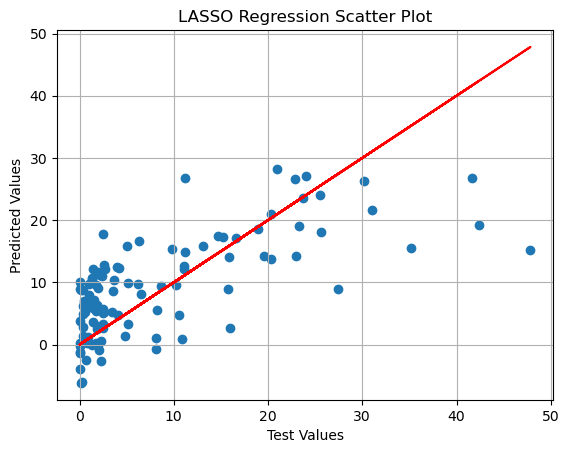

In [164]:
#Scatterplot LASSO without outliers
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, c="r")
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.title('LASSO Regression Scatter Plot')
plt.grid()
plt.savefig("LASSO_Scatter_wo_outliers.jpg")
plt.show()



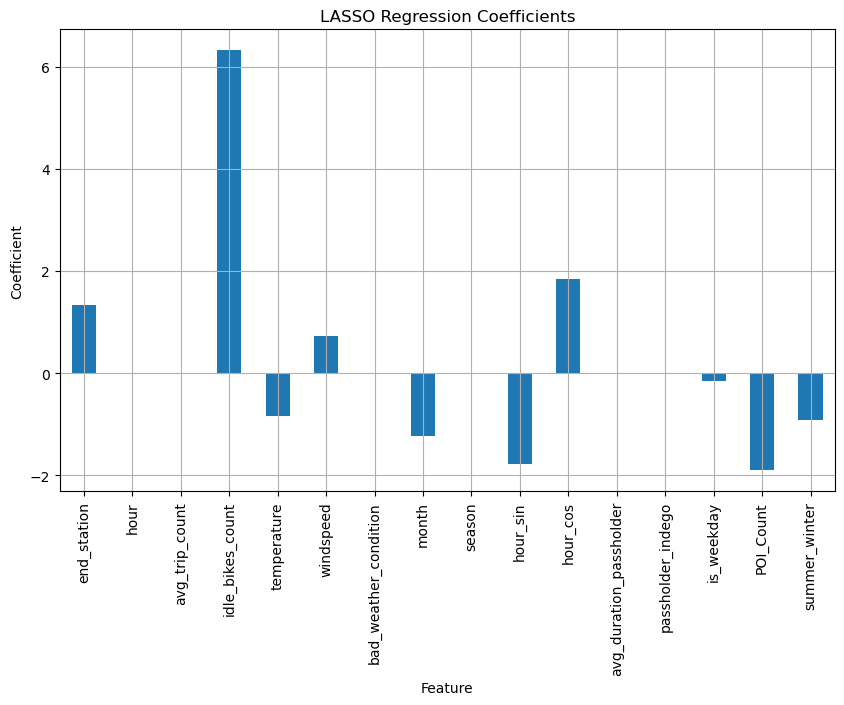

In [165]:
# Plot coefficients without outliers
coef = pd.Series(lasso_model.coef_, index=X.columns)
plt.figure(figsize=(10, 6))
coef.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('LASSO Regression Coefficients')
plt.grid()
plt.savefig("LASSO_Coeff_wo_outliers.png",bbox_inches='tight')
plt.show()
